<b><font size="6.5"> Budgeting For The Future</font></b>



# <b><font color='#7C8489'>Contents</font> <a class="anchor" id="toc"></a>

* [1 - Data Understanding](#dataunderstanding)
    * [1.1 - Connect to Google Colab](#colab)
    * [1.2 - Importing Libraries and Data](#import)
    * [1.3 -  Data Visualization](#datavisualization)
<br>

# <font color='#BED62F'>1. Data Understanding </font> <a class="anchor" id="colab"></a>

<font size="5" color='#7C8489'>Loading Prerequisites</font>

In [ ]:
## Allow Colab to see Google Drive files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path = '/content/drive/MyDrive/BudgetingForTheFuture/'

Mounted at /content/drive


In [ ]:
## Importing python packages

# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    r2_score, mean_absolute_error, mean_squared_error, f1_score,
    classification_report, roc_auc_score
)

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer

# Feature selection
from sklearn.feature_selection import RFE, f_classif, SelectKBest

# Statistical analysis
from scipy.stats import spearmanr, chi2_contingency

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
)

# Regression models
from sklearn.linear_model import LinearRegression, LassoCV

# Tree visualization
from sklearn import tree
import graphviz

# Miscellaneous
from datetime import datetime, date

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV

In [ ]:
## Load the csv file into a dataframe
training = pd.read_csv(path + 'train.csv')
training_copy = training.copy()

## <font color='#BED62F'>1.1. Data Exploration</font> <a class="anchor" id="colab"></a>

**Metadata**
- citizen_id - Unique identifier of the citizen.
- name - First name of each citizen.
- title - Title of each citizen.
- date_of_birth - Date of birth of each citizen.
- city - Name of citizen´s city.
- country - Name of citizen´s country.
- last_year_avg_monthly_charity_donations - The average of monthly charitable donations made by each citizen in the last year.
- environmental_awareness_rating - A rating [0, 10] of each individual's awareness of andengagement with environmental issues.
- financial_wellness_index - An index indicating each citizen´s overall financial health.
- investment_portfolio_value - The value, in thousands of units of currency, of each citizen´s investment portfolio.
- investments_risk_appetite - A measure of each individual's willingness to take risks in their investments.
- investments_risk_tolerance - A measure of each individual's tolerance for risk in their investment choices.
- tech_savviness_score - A score representing each citizen´s proficiency and comfort with technology.
- social_media_influence_score - A score representing each citizen´s influence and activity on social media platforms.
- entertainment_engagement_factor - A score representing each citizen´s engagement withentertainment activities.
- avg_monthly_entertainment_expenses - The monthly expenditure on entertainment for eachcitizen, in units of currency.
- avg_weekly_exercise_hours - The average number of hours each citizen spends onexercise weekly.
- health_consciousness_rating - A rating [0, 10] of each citizen´s awareness and proactive behavior towards their health.
- stress_management_score - A score indicating how effectively each citizen managesstress.
- overall_well_being - A score indicating each citizen overall status.
- lifestyle_type - A categorization of the predominant lifestyle choice for each citizen (Target Variable).

In [ ]:
## Know the values of our dataset by checking the first 5 rows
training.head()

citizen_id      name title date_of_birth         city    country  \
0           1   Stanley   Mr.    1992-01-03  Mining City  Data Land   
1           2  Višeslav   Mr.    2005-03-16  Mining City  Data Land   
2           3   Rogerio   Mr.    2005-04-04  Mining City  Data Land   
3           4     Jagat   Mr.    1981-09-25  Mining City  Data Land   
4           5  Virgínio   Mr.    1987-07-29  Mining City  Data Land   

   last_year_avg_monthly_charity_donations  environmental_awareness_rating  \
0                                      0.0                          1.9352   
1                                      0.0                          0.5672   
2                                      1.0                          0.5613   
3                                      0.0                          0.3543   
4                                      0.0                          0.5943   

   financial_wellness_index  investment_portfolio_value  ...  \
0                   99.6431                      9.7221  ...   
1                  125.1630                      5.4308  ...   
2                  105.2490                     15.0829  ...   
3                   95.2219                     16.3380  ...   
4                  255.8600                    148.2250  ...   

   investments_risk_tolerance  tech_savviness_score  \
0                         NaN               11.9772   
1                     13.6445               11.8776   
2                      5.8867               14.4247   
3                      9.1074               12.3668   
4                      4.0892               15.8389   

   social_media_influence_score  entertainment_engagement_factor  \
0                        9.9506                          1.75750   
1                        5.1521                          1.96770   
2                        3.6737                          3.69071   
3                        5.5798                          1.57690   
4                        3.7712                          1.95580   

   avg_monthly_entertainment_expenses  avg_weekly_exercise_hours  \
0                             23.0605                     0.1776   
1                                 NaN                     1.2782   
2                             37.5970                     0.0354   
3                              8.2142                     1.7763   
4                             14.3443                     0.0000   

   health_consciousness_rating  stress_management_score  overall_well_being  \
0                       0.6504                   2.8850             106.282   
1                       1.0190                   3.5777             132.121   
2                       3.0854                   5.1906             115.547   
3                       0.3677                      NaN             101.773   
4                       0.6718                   2.7076             264.451   

       lifestyle_type  
0   Travel Enthusiast  
1  Fitness Enthusiast  
2    Health-Conscious  
3  Fitness Enthusiast  
4    Adventure Seeker  

[5 rows x 21 columns]

In [ ]:
## Know the last values of the dataset to see if there are aggregated lines in the final 10 rows
training.tail(10)

citizen_id        name title date_of_birth         city    country  \
90155       90156      Gaurav   Mr.    1996-05-31  Mining City  Data Land   
90156       90157       Eemil   Mr.    2001-08-17  Mining City  Data Land   
90157       90158       Janet  Miss    1987-12-25  Mining City  Data Land   
90158       90159  Deusdedito   Mr.    1998-10-12  Mining City  Data Land   
90159       90160      Pamela  Mrs.    1958-08-23  Mining City  Data Land   
90160       90161      Salomé  Miss    1993-11-18  Mining City  Data Land   
90161       90162        امیر   Mr.    1982-02-02  Mining City  Data Land   
90162       90163       Murat   Mr.    1986-01-07  Mining City  Data Land   
90163       90164      Marius   Mr.    2003-04-20  Mining City  Data Land   
90164       90165      Yuhima   Ms.    1994-01-31  Mining City  Data Land   

       last_year_avg_monthly_charity_donations  \
90155                                      0.0   
90156                                      0.0   
90157                                      0.0   
90158                                      0.0   
90159                                      0.0   
90160                                      0.0   
90161                                      0.0   
90162                                      0.0   
90163                                      0.0   
90164                                      0.0   

       environmental_awareness_rating  financial_wellness_index  \
90155                          0.6154                  100.5820   
90156                          0.5882                  115.2230   
90157                          0.5821                  101.0370   
90158                          0.6032                   27.5741   
90159                          0.4698                  131.8810   
90160                          0.8188                  288.7790   
90161                          0.6033                   15.6433   
90162                          0.6710                   96.3212   
90163                          0.5735                  100.1350   
90164                             NaN                       NaN   

       investment_portfolio_value  ...  investments_risk_tolerance  \
90155                     16.8926  ...                      6.7063   
90156                     67.5249  ...                     12.0043   
90157                     13.6047  ...                     18.0670   
90158                      0.5000  ...                      6.0423   
90159                      3.9904  ...                     10.9369   
90160                      0.5000  ...                      9.5441   
90161                     20.1930  ...                      8.9811   
90162                     13.1624  ...                      5.1733   
90163                     16.2172  ...                      4.6034   
90164                      8.1635  ...                      5.6047   

       tech_savviness_score  social_media_influence_score  \
90155               13.8817                       15.8231   
90156               14.4602                        4.9503   
90157               12.8918                        7.1546   
90158               14.1858                           NaN   
90159               13.8177                        4.2767   
90160               12.9497                        5.0265   
90161               12.5240                        5.0200   
90162               13.4334                       12.9103   
90163               10.2272                       12.1893   
90164               13.7128                        3.0482   

       entertainment_engagement_factor  avg_monthly_entertainment_expenses  \
90155                          3.69071                              8.5041   
90156                          1.75160                             95.7594   
90157                          1.95420                             76.4022   
90158                          1.86170                              7.7415   
90159                          2.1462

In [ ]:
## Get the number of rows and columns of training dataset
training.shape

(90165, 21)

In [ ]:
## Get the columns of training dataset
training.columns

Index(['citizen_id', 'name', 'title', 'date_of_birth', 'city', 'country',
       'last_year_avg_monthly_charity_donations',
       'environmental_awareness_rating', 'financial_wellness_index',
       'investment_portfolio_value', 'investments_risk_appetite',
       'investments_risk_tolerance', 'tech_savviness_score',
       'social_media_influence_score', 'entertainment_engagement_factor',
       'avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours',
       'health_consciousness_rating', 'stress_management_score',
       'overall_well_being', 'lifestyle_type'],
      dtype='object')

In [ ]:
## Statistical measures of numeric columns
training.describe().T

count          mean           std  \
citizen_id                               90165.0  45083.000000  26028.537848   
last_year_avg_monthly_charity_donations  87911.0      0.196324      0.554079   
environmental_awareness_rating           86558.0      1.010520      0.914724   
financial_wellness_index                 88363.0    105.308175     50.667686   
investment_portfolio_value               88362.0     19.109577     35.481222   
investments_risk_appetite                88813.0      4.443178      2.677584   
investments_risk_tolerance               87009.0      7.151049      3.945640   
tech_savviness_score                     87009.0     13.459303      1.486830   
social_media_influence_score             87911.0      6.375599      4.258794   
entertainment_engagement_factor          89263.0      1.841974      0.343801   
avg_monthly_entertainment_expenses       89263.0     25.269609     19.353803   
avg_weekly_exercise_hours                87461.0      0.865667      1.258624   
health_consciousness_rating              89263.0      1.242936      1.223725   
stress_management_score                  86558.0      3.212604      1.138130   
overall_well_being                       89263.0    113.307251     50.766418   

                                            min           25%          50%  \
citizen_id                               1.0000  22542.000000  45083.00000   
last_year_avg_monthly_charity_donations -3.0000      0.000000      0.00000   
environmental_awareness_rating           0.0000      0.563925      0.66080   
financial_wellness_index                 0.0500     94.472800     99.89540   
investment_portfolio_value               0.5000      5.718225     10.48305   
investments_risk_appetite                0.0000      1.902400      4.93970   
investments_risk_tolerance               0.0000      4.659300      6.08060   
tech_savviness_score                     6.8615     12.495200     13.47790   
social_media_influence_score             0.0000      3.340800      4.80220   
entertainment_engagement_factor          0.2804      1.643000      1.86930   
avg_monthly_entertainment_expenses       0.0000      8.764950     18.16480   
avg_weekly_exercise_hours               -6.6016      0.022300      0.16100   
health_consciousness_rating              0.0000      0.656200      0.77030   
stress_management_score                  0.0000      2.457100      3.07675   
overall_well_being                       4.9976    102.103000    107.94400   

                                                  75%          max  
citizen_id                               67624.000000  90165.00000  
last_year_avg_monthly_charity_donations      0.000000      5.00000  
environmental_awareness_rating               0.972075     12.83600  
financial_wellness_index                   106.251000    593.84700  
investment_portfolio_value                  15.438725    446.86600  
investments_risk_appetite                    6.913400     12.07270  
investments_risk_tolerance                   8.391300     44.25620  
tech_savviness_score                        14.441400     30.43360  
social_media_influence_score                 8.807200     44.96590  
entertainment_engagement_factor              2.070800      3.69071  
avg_monthly_entertainment_expenses          40.732100    180.52900  
avg_weekly_exercise_hours                    1.404000      9.41680  
health_consciousness_rating                  1.232900     13.43160  
stress_management_score                      3.860700      9.31820  
overall_well_being                         115.111000    600.83000

Insights:
- Last_year_avg_monthly_charity_donations and avg_weekly_exercise_hours have null values and max value is far from the mean value
-financial_welness_index, overall_well_being, investment_portfolio_value and avg_monthly_entertainment_expenses have high standard deviation = dispersed data
- health_consciousness_rating has values > 10 (rating [0,10])

In [ ]:
## Statiscal measures of non-numeric columns
training.describe(include = ['O']).T

count unique               top   freq
name            90165   9946              Emma    246
title           90165      4               Mr.  45126
date_of_birth   90165  16878        1994-05-29     20
city            90165      1       Mining City  90165
country         90165      1         Data Land  90165
lifestyle_type  90165      5  Health-Conscious  18131

In [ ]:
# Check the values of city variable
training['city'].value_counts()

city
Mining City    90165
Name: count, dtype: int64

City only has Mining City value, as expected, so this variable will not add new information to the model -> should be dropped

In [ ]:
# Check the values of country variable
training['country'].value_counts()

country
Data Land    90165
Name: count, dtype: int64

Country only has Data Land value, as expected, so this variable will not add new information to the model -> should be dropped

In [ ]:
## Check data type of all columns
training.dtypes

citizen_id                                   int64
name                                        object
title                                       object
date_of_birth                               object
city                                        object
country                                     object
last_year_avg_monthly_charity_donations    float64
environmental_awareness_rating             float64
financial_wellness_index                   float64
investment_portfolio_value                 float64
investments_risk_appetite                  float64
investments_risk_tolerance                 float64
tech_savviness_score                       float64
social_media_influence_score               float64
entertainment_engagement_factor            float64
avg_monthly_entertainment_expenses         float64
avg_weekly_exercise_hours                  float64
health_consciousness_rating                float64
stress_management_score                    float64
overall_well_being             

In [ ]:
## Check count of NaN values
training.isna().sum()

citizen_id                                    0
name                                          0
title                                         0
date_of_birth                                 0
city                                          0
country                                       0
last_year_avg_monthly_charity_donations    2254
environmental_awareness_rating             3607
financial_wellness_index                   1802
investment_portfolio_value                 1803
investments_risk_appetite                  1352
investments_risk_tolerance                 3156
tech_savviness_score                       3156
social_media_influence_score               2254
entertainment_engagement_factor             902
avg_monthly_entertainment_expenses          902
avg_weekly_exercise_hours                  2704
health_consciousness_rating                 902
stress_management_score                    3607
overall_well_being                          902
lifestyle_type                          

All numeric variables have missing values

## <font color='#BED62F'>1.2. Data Visualization </font> <a class="anchor" id="colab"></a>

To facilitate variables plots, we will define a dataframe with acronyms

In [ ]:
# Assuming you have a DataFrame called df
# Define the function to generate acronyms
def generate_acronym(column_name):
    parts = column_name.split('_')
    acronym = ''.join(part[0] for part in parts)
    return acronym.lower()

# List of columns you want to apply the acronym function to
columns_to_apply_acronym = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                            'investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                            'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']

# Create a dictionary mapping original column names to new column names with acronyms
acronym_columns_mapping = {col: generate_acronym(col) for col in columns_to_apply_acronym}

# Rename the selected columns using the acronym columns mapping
training_acronyms = training.rename(columns=acronym_columns_mapping)

# Print the DataFrame with renamed columns
training_acronyms

citizen_id      name title date_of_birth         city    country  \
0               1   Stanley   Mr.    1992-01-03  Mining City  Data Land   
1               2  Višeslav   Mr.    2005-03-16  Mining City  Data Land   
2               3   Rogerio   Mr.    2005-04-04  Mining City  Data Land   
3               4     Jagat   Mr.    1981-09-25  Mining City  Data Land   
4               5  Virgínio   Mr.    1987-07-29  Mining City  Data Land   
...           ...       ...   ...           ...          ...        ...   
90160       90161    Salomé  Miss    1993-11-18  Mining City  Data Land   
90161       90162      امیر   Mr.    1982-02-02  Mining City  Data Land   
90162       90163     Murat   Mr.    1986-01-07  Mining City  Data Land   
90163       90164    Marius   Mr.    2003-04-20  Mining City  Data Land   
90164       90165    Yuhima   Ms.    1994-01-31  Mining City  Data Land   

       lyamcd     ear       fwi       ipv  ...      irt      tss     smis  \
0         0.0  1.9352   99.6431    9.7221  ...      NaN  11.9772   9.9506   
1         0.0  0.5672  125.1630    5.4308  ...  13.6445  11.8776   5.1521   
2         1.0  0.5613  105.2490   15.0829  ...   5.8867  14.4247   3.6737   
3         0.0  0.3543   95.2219   16.3380  ...   9.1074  12.3668   5.5798   
4         0.0  0.5943  255.8600  148.2250  ...   4.0892  15.8389   3.7712   
...       ...     ...       ...       ...  ...      ...      ...      ...   
90160     0.0  0.8188  288.7790    0.5000  ...   9.5441  12.9497   5.0265   
90161     0.0  0.6033   15.6433   20.1930  ...   8.9811  12.5240   5.0200   
90162     0.0  0.6710   96.3212   13.1624  ...   5.1733  13.4334  12.9103   
90163     0.0  0.5735  100.1350   16.2172  ...   4.6034  10.2272  12.1893   
90164     0.0     NaN       NaN    8.1635  ...   5.6047  13.7128   3.0482   

           eef     amee    aweh     hcr     sms       owb      lifestyle_type  
0      1.75750  23.0605  0.1776  0.6504  2.8850  106.2820   Travel Enthusiast  
1      1.96770      NaN  1.2782  1.0190  3.5777  132.1210  Fitness Enthusiast  
2      3.69071  37.5970  0.0354  3.0854  5.1906  115.5470    Health-Conscious  
3      1.57690   8.2142  1.7763  0.3677     NaN  101.7730  Fitness Enthusiast  
4      1.95580  14.3443  0.0000  0.6718  2.7076  264.4510    Adventure Seeker  
...        ...      ...     ...     ...     ...       ...                 ...  
90160  2.16390  44.7958     NaN  1.7052     NaN  296.9590            Investor  
90161  2.31650  95.1422  0.1997  0.7403  5.0756   22.6456            Investor  
90162  2.42090  48.7617  2.2265  2.4052  2.9948  105.4430  Fitness Enthusiast  
90163  1.50090  11.4332  2.9765  0.6275  2.1157  105.8760  Fitness Enthusiast  
90164      NaN   6.1003  1.0318  0.6875  1.9988  104.2980    Adventure Seeker  

[90165 rows x 21 columns]

<font size="5" color='#7C8489'>Histograms</font>

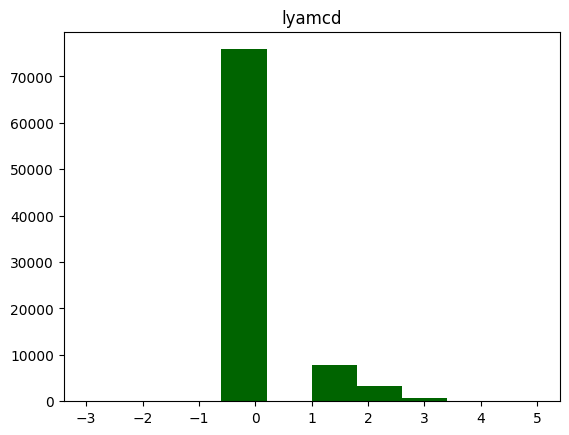

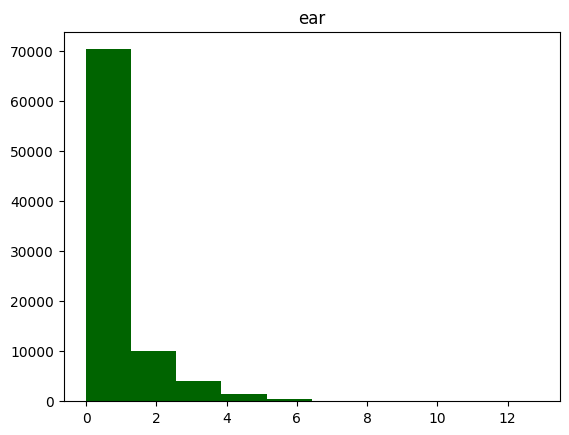

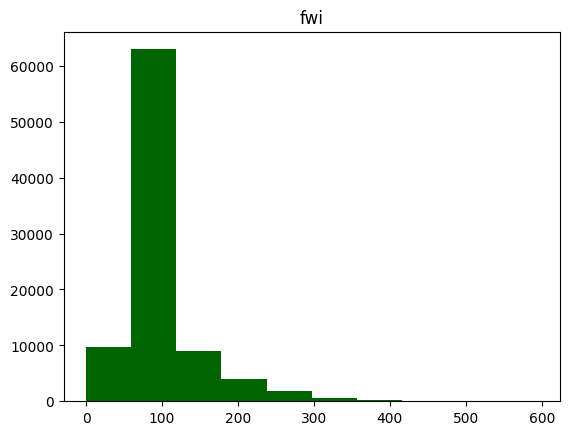

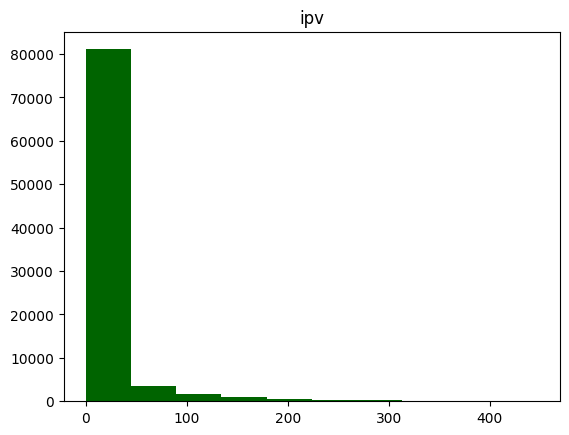

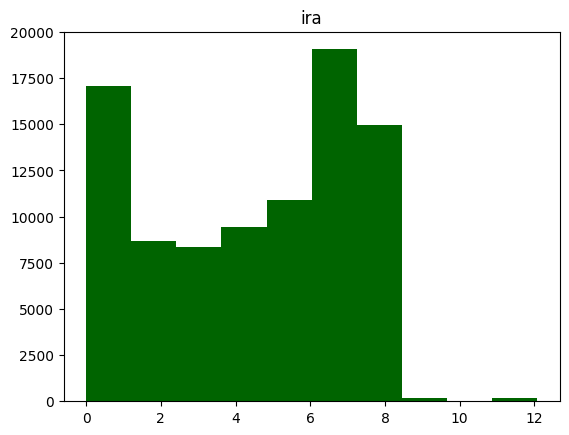

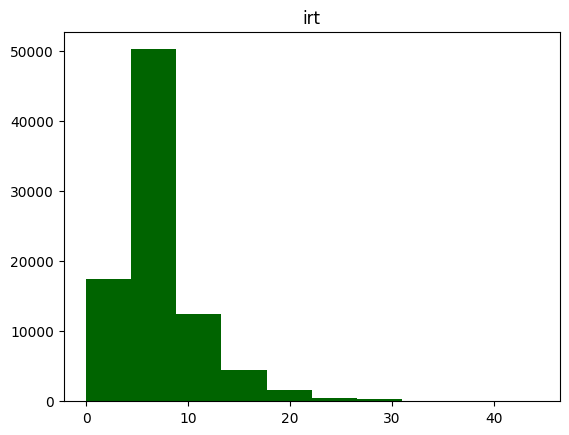

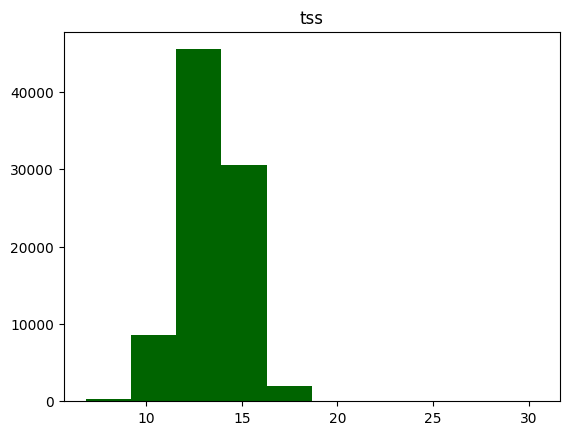

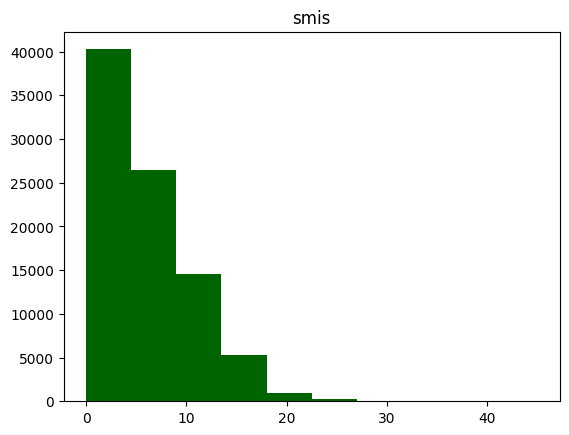

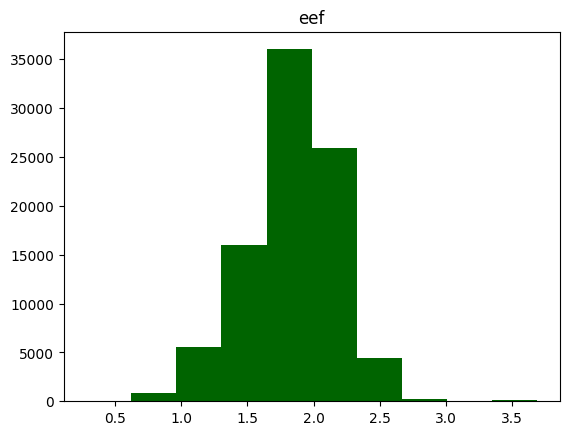

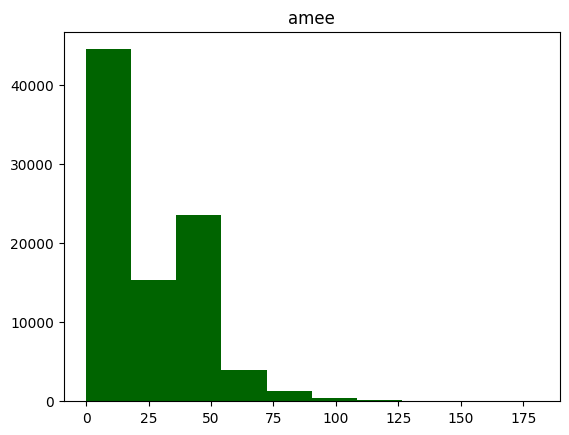

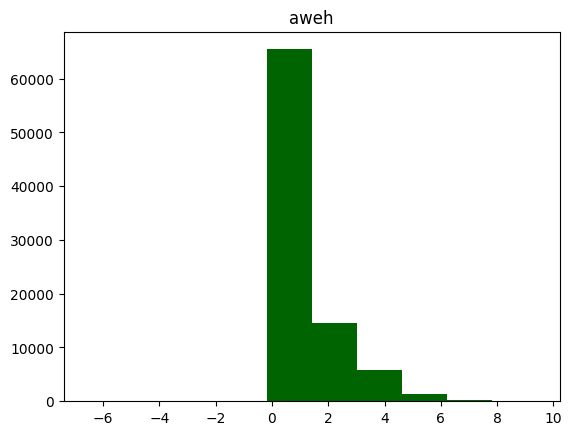

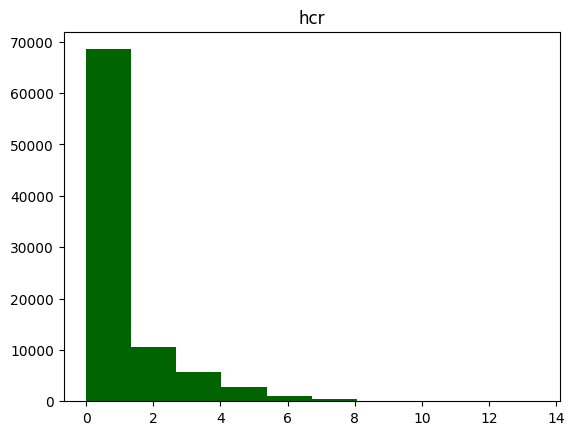

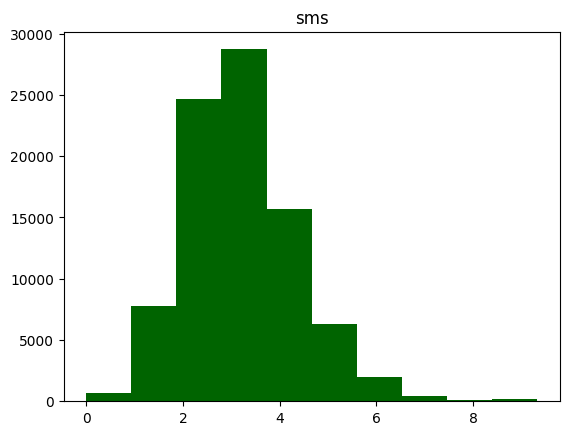

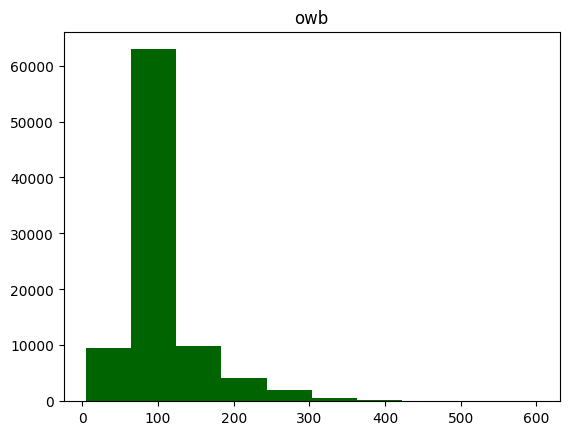

In [ ]:
## Check histogram of metric variables
histogram_df = training_acronyms[['lyamcd','ear','fwi','ipv','ira','irt','tss','smis','eef','amee','aweh','hcr','sms','owb']]

for i in histogram_df.columns:
    plt.hist(histogram_df[i],color='darkgreen')
    plt.title(i)
    plt.show()

<font size="5" color='#7C8489'>Boxplots</font>

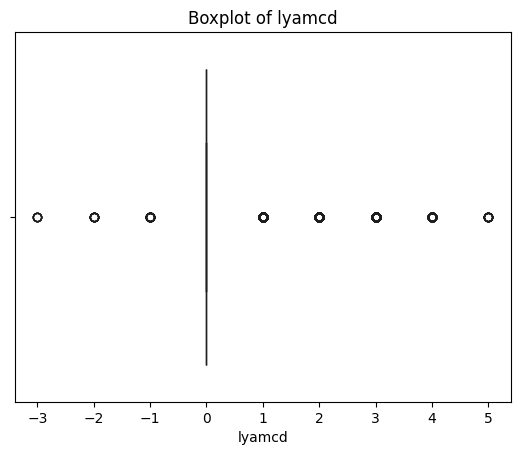

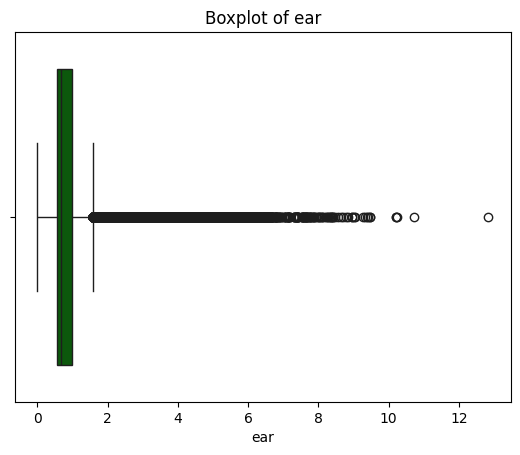

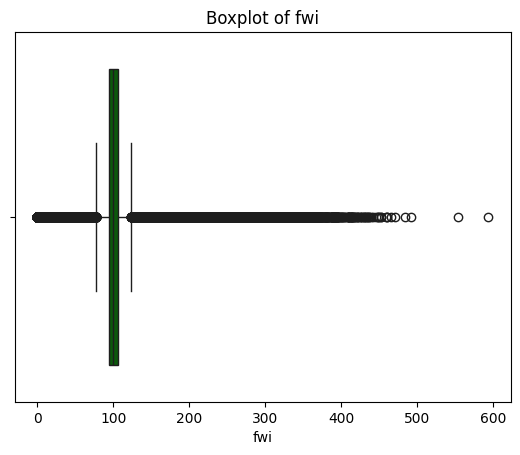

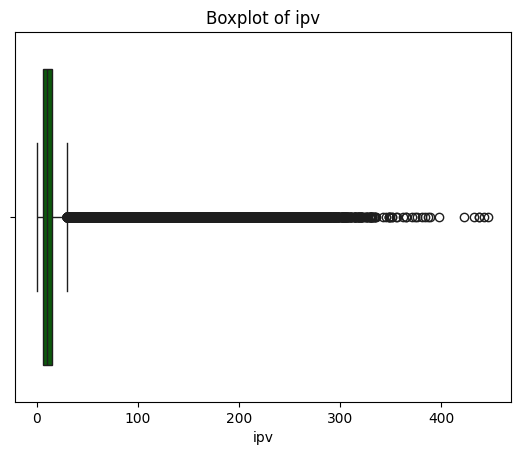

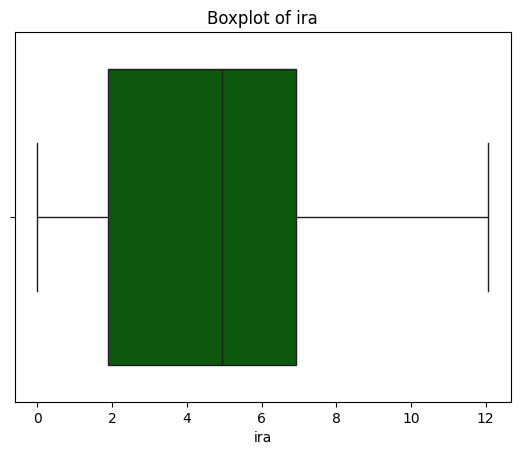

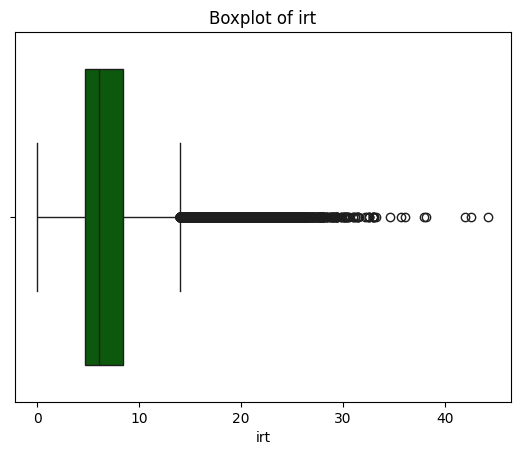

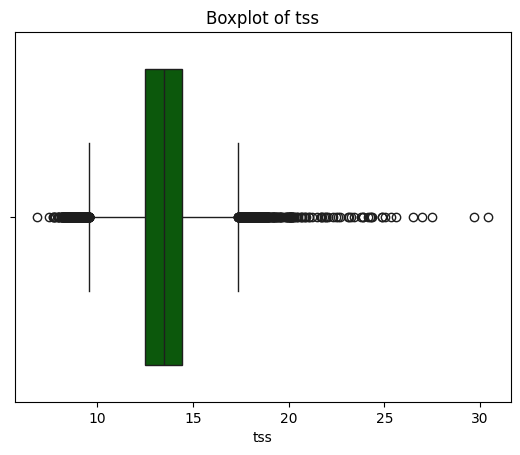

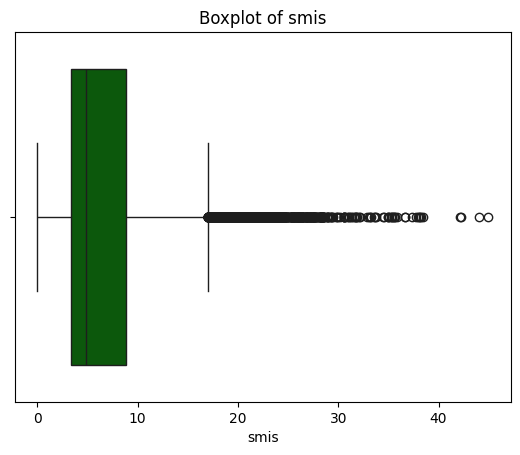

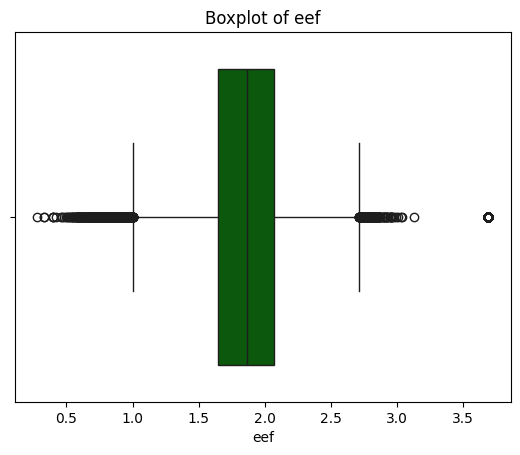

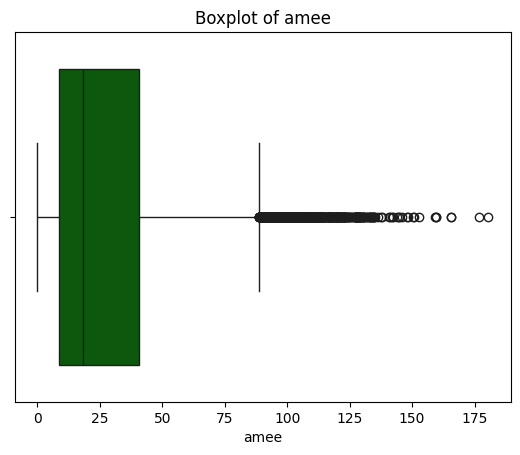

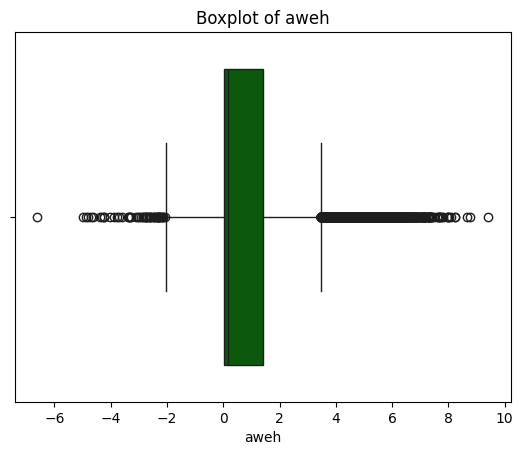

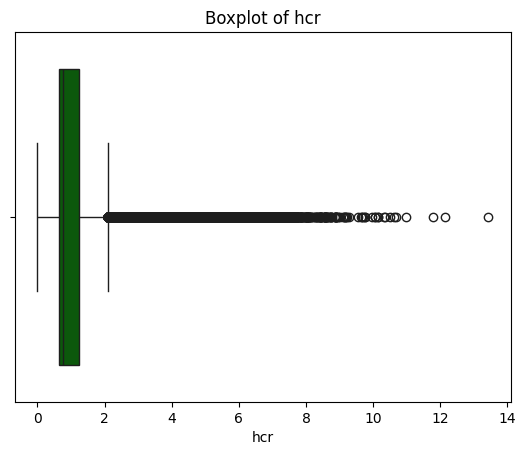

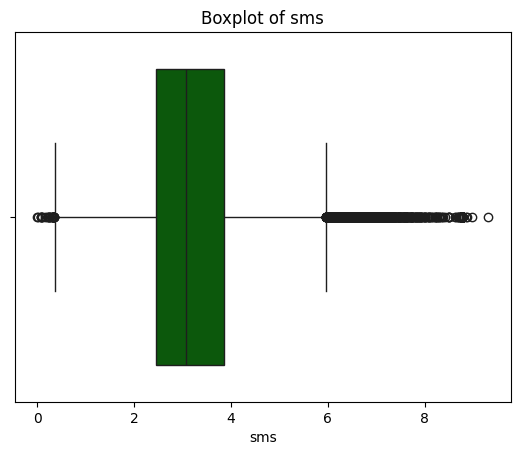

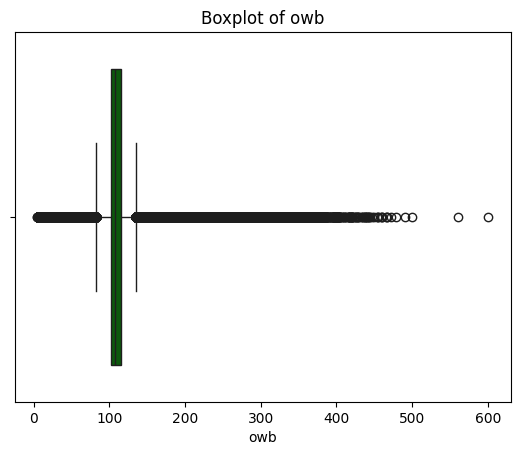

In [ ]:
## Check boxplot of metric variables
boxplot_df =  training_acronyms[['lyamcd','ear','fwi','ipv','ira','irt','tss','smis','eef','amee','aweh','hcr','sms','owb']]

for i in boxplot_df.columns:
    sns.boxplot(x=i, data=training_acronyms, color='darkgreen')
    plt.title(f'Boxplot of {i}')
    plt.show()

Only ira (investments_risk_appetite) variable seems to not have outliers

<font size="5" color='#7C8489'>Relationship between variables</font>

<Axes: xlabel='title', ylabel='count'>

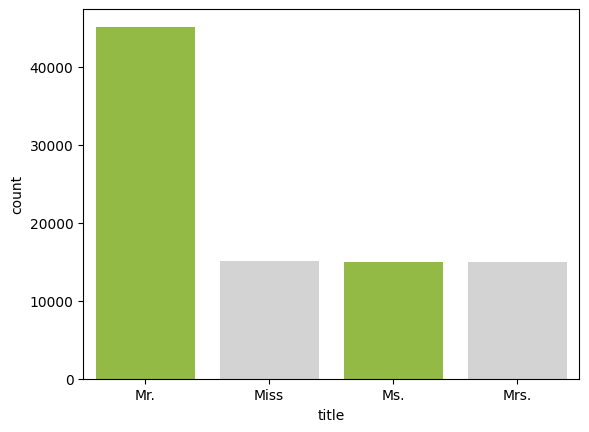

In [ ]:
sns.countplot(x='title', data=training_acronyms, hue='title', palette=["yellowgreen","lightgrey"], legend=False)

Mr. is male, Miss, Ms. and Mrs. are female, therefore the number of entries is roughly the same for both male and female and the number of entries for different female titles is the same.

<Axes: xlabel='lifestyle_type', ylabel='count'>

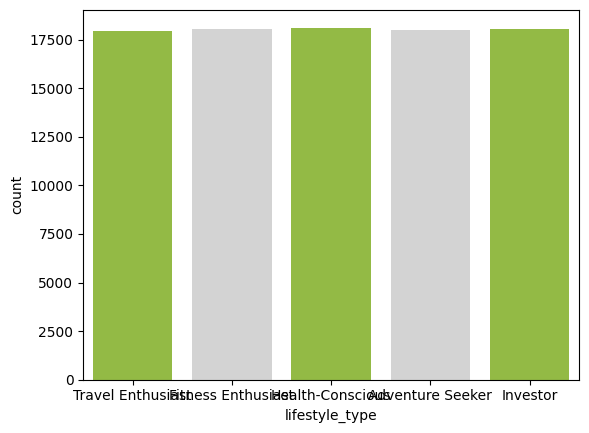

In [ ]:
sns.countplot(x='lifestyle_type', data=training_acronyms, hue='lifestyle_type', palette=["yellowgreen","lightgrey"], legend=False)

Understand the relation between Finantial Wellness index and the overall well being

<Axes: xlabel='fwi', ylabel='owb'>

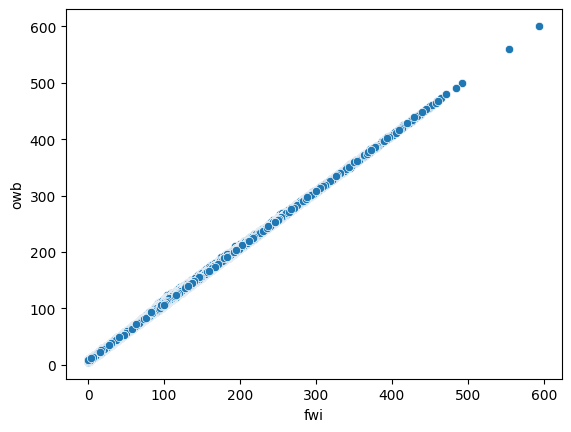

In [ ]:
sns.scatterplot(x='fwi', y='owb', data=training_acronyms, palette=["yellowgreen", "lightgrey"], legend=False)

Understand the relation between tech savviness score and overall well being

<Axes: xlabel='tss', ylabel='owb'>

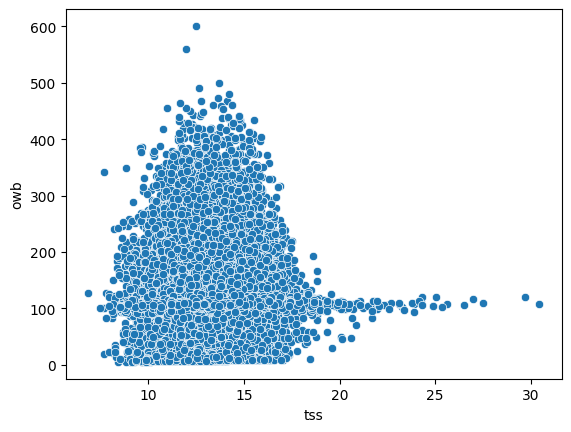

In [ ]:
sns.scatterplot(x='tss', y='owb', data=training_acronyms, palette=["yellowgreen", "lightgrey"], legend=False)

Understand the relation between investment risk appetite and investment risk tolerance

<Axes: xlabel='ira', ylabel='irt'>

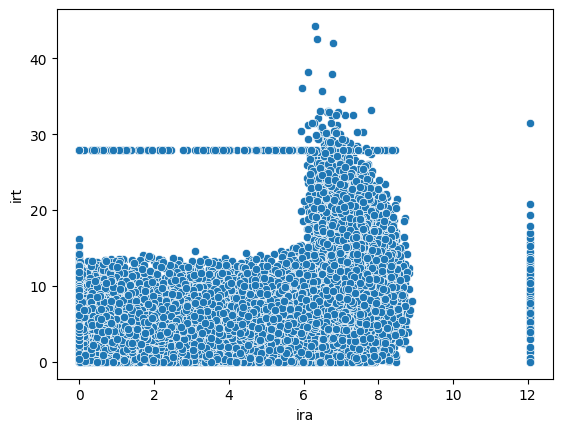

In [ ]:
sns.scatterplot(x='ira', y='irt', data=training_acronyms, palette=["yellowgreen", "lightgrey"], legend=False)

Understand the relation between investment portfolio value and overall well being

<Axes: xlabel='ipv', ylabel='owb'>

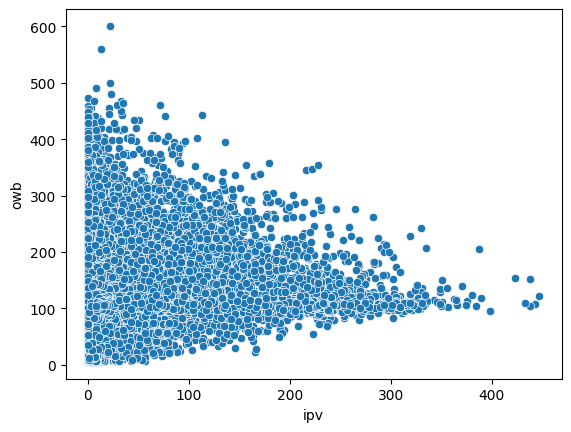

In [ ]:
sns.scatterplot(x='ipv', y='owb', data=training_acronyms, palette=["yellowgreen", "lightgrey"], legend=False)

Understand the relation between stress management socre and overall well being

<Axes: xlabel='sms', ylabel='owb'>

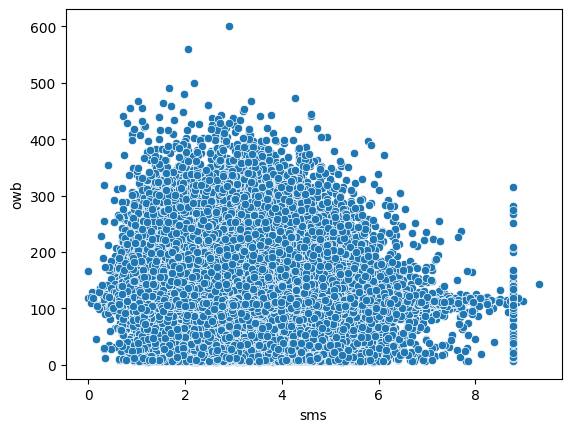

In [ ]:
sns.scatterplot(x='sms', y='owb', data=training_acronyms, palette=["yellowgreen", "lightgrey"], legend=False)

With the plots above, our objective was to check possible relations between attributes. For example, in the first plot we understood that finantial wellness index is directly correlated with overall well being, however as we saw above other monetary attributes like investment portfolio value do not have any direct correlation with the overall well being

Let's check now for example attributes about health(Physical and psycological)

Understand relation beetween avg weekly exercise hours and overall well being

<Axes: xlabel='aweh', ylabel='owb'>

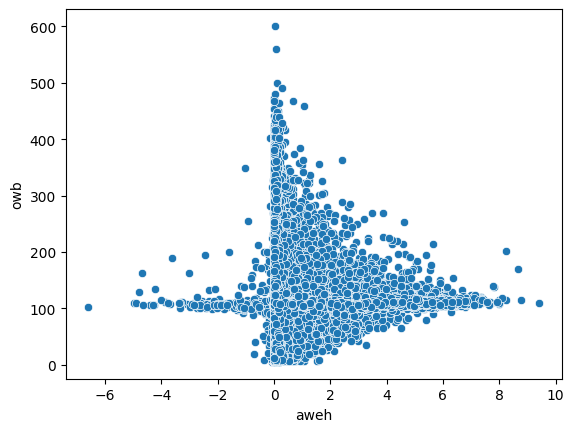

In [ ]:
sns.scatterplot(x='aweh', y='owb', data=training_acronyms, palette=["yellowgreen", "lightgrey"], legend=False)

Understand the relation between Health consciousness rating and overall well being

<Axes: xlabel='hcr', ylabel='owb'>

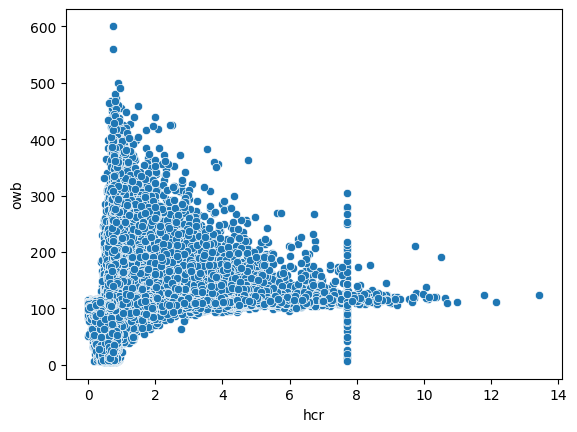

In [ ]:
sns.scatterplot(x='hcr', y='owb', data=training_acronyms, palette=["yellowgreen", "lightgrey"], legend=False)

In relation to the possible correlation between health attributes and overall well being, as you stated above, we did not see any correlation

#<b><font size="6" color="#BED62F">2. Data Preprocessing</font></b>


In [ ]:
data = training_acronyms.loc[:, training_acronyms.columns != 'lifestyle_type'] # independent variables
target = training_acronyms['lifestyle_type'] #target variable

## <font color='#BED62F'>2.1. Data partition </font> <a class="anchor" id="colab"></a>

In [ ]:
# Divide the Datasets into Training and Test. Since we will perform cross validation we will just partition our data into Training and Test
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size = 0.20,
                                                    random_state = 21,
                                                    shuffle = True,
                                                    stratify = target
                                                    )

In [ ]:
#Check training dataset
X_train.head(3)

citizen_id      name title date_of_birth         city    country  \
32006       32007  Danielle  Mrs.    1975-11-18  Mining City  Data Land   
69768       69769     Elias   Mr.    1976-03-07  Mining City  Data Land   
17670       17671     Luisa   Ms.    2005-01-18  Mining City  Data Land   

       lyamcd     ear      fwi      ipv     ira     irt      tss     smis  \
32006     0.0  0.5281  97.0230  10.1047  3.9765  0.0000  13.9159   8.0211   
69768     0.0  0.6586  93.7207  10.2911  3.5751  3.9967  13.8728  14.9286   
17670     0.0  0.5024  99.8961   8.9577  3.4136  5.3931  12.7790   4.7316   

          eef     amee    aweh     hcr     sms      owb  
32006  1.3902  14.0970  0.0000  0.6141  1.9055  104.595  
69768  1.8677  12.1106  0.2678  1.6247  2.7695  102.282  
17670  1.8388  16.9752  1.7114  0.7958  2.6763  107.081

In [ ]:
#Check test dataset
X_test.head(3)

citizen_id       name title date_of_birth         city    country  \
73846       73847     Claude   Mr.    1994-07-13  Mining City  Data Land   
63818       63819  Espartaco   Mr.    1978-07-07  Mining City  Data Land   
53189       53190      Lucas   Mr.    2000-01-18  Mining City  Data Land   

       lyamcd     ear       fwi      ipv      ira      irt      tss    smis  \
73846     0.0  2.5212   99.6645  15.2296  12.0727   9.0180  13.2433  3.4483   
63818     0.0  0.4237  103.8270  12.8016   0.0576      NaN  13.8882  4.2749   
53189     3.0  1.2715   85.2977   5.6105   6.5486  10.6262  12.6509  5.0063   

          eef     amee    aweh     hcr     sms      owb  
73846  1.9750  35.3218  1.8667  0.7326  3.6594  107.019  
63818  2.1194  41.8618  3.1214  0.9217  3.9177  111.693  
53189  2.3452  44.4738     NaN  1.0829  6.2327   92.706

In [ ]:
print(f'The shape of the train dataset is {X_train.shape}')
print(f'The shape of the target in train dataset is {y_train.shape}')
print(f'The shape of the test dataset is {X_test.shape}')
print(f'The shape of the target in test dataset is {y_test.shape}')

The shape of the train dataset is (72132, 20)
The shape of the target in train dataset is (72132,)
The shape of the test dataset is (18033, 20)
The shape of the target in test dataset is (18033,)


## <font color='#BED62F'>2.2. Coherence Check </font> <a class="anchor" id="colab"></a>

<font size="5" color='#7C8489'>Citizen ID</font>

Check for duplicates in the column we want as index

In [ ]:
## CitizenID must be unique for both train and test datasets
duplicates_train = X_train[X_train.duplicated('citizen_id')]
duplicates_test = X_test[X_test.duplicated('citizen_id')]


if duplicates_train.empty:
    print("There are no duplicated citizen id")
else:
    print("There are duplicated citizen id")

if duplicates_test.empty:
    print("There are no duplicated citizen id")
else:
    print("There are duplicated citizen id")

There are no duplicated citizen id
There are no duplicated citizen id


No duplicate citizen id, therefore we can set this column as dataframe index

In [ ]:
## Set citizen_id as index for easier queries and filters for both train and test datasets
X_train.set_index('citizen_id', inplace = True)
X_test.set_index('citizen_id', inplace = True)
X_train.head()

name title date_of_birth         city    country  lyamcd  \
citizen_id                                                                 
32007       Danielle  Mrs.    1975-11-18  Mining City  Data Land     0.0   
69769          Elias   Mr.    1976-03-07  Mining City  Data Land     0.0   
17671          Luisa   Ms.    2005-01-18  Mining City  Data Land     0.0   
82978        Marlene  Mrs.    2004-06-06  Mining City  Data Land     0.0   
5995           Norma   Ms.    1992-04-18  Mining City  Data Land     0.0   

               ear       fwi      ipv     ira     irt      tss     smis  \
citizen_id                                                                
32007       0.5281   97.0230  10.1047  3.9765  0.0000  13.9159   8.0211   
69769       0.6586   93.7207  10.2911  3.5751  3.9967  13.8728  14.9286   
17671       0.5024   99.8961   8.9577  3.4136  5.3931  12.7790   4.7316   
82978       0.7553  100.7100   1.8801  2.1914  3.2488  14.4767   8.9864   
5995        1.0915   95.0357  11.3491  1.5061  3.6774  12.9826  14.9299   

               eef     amee    aweh     hcr     sms      owb  
citizen_id                                                    
32007       1.3902  14.0970  0.0000  0.6141  1.9055  104.595  
69769       1.8677  12.1106  0.2678  1.6247  2.7695  102.282  
17671       1.8388  16.9752  1.7114  0.7958  2.6763  107.081  
82978       1.8725  18.7558  0.3410  2.2261  3.4046  110.175  
5995        1.9005  11.8693  3.0425  0.0000  2.6311  101.527

<font size="5" color='#7C8489'>Rating [0,10]</font>

In [ ]:
# Values range: environmental_awareness_rating and health_consciousness_rating  must have values [0,10]
below_0_ear_train = X_train[X_train['ear'] < 0]
above_10_ear_train = X_train[X_train['ear'] > 10]

below_0_hcr_train = X_train[X_train['hcr'] < 0]
above_10_hcr_train = X_train[X_train['hcr'] > 10]

print(f"There are {len(below_0_ear_train)} values below 0.")
print(f"There are {len(above_10_ear_train)} values above 10.") # 3 values
print(f"There are {len(below_0_hcr_train)} values below 0.")
print(f"There are {len(above_10_hcr_train)} values above 10.") # 9 values

There are 0 values below 0.
There are 3 values above 10.
There are 0 values below 0.
There are 9 values above 10.


There are 5 values above 10 for ear and 13 values above 10 for hcr, therefore we need to set an upper limit of 10 for those variables

In [ ]:
## Treat the values outside the ranking range
X_train['ear'] = X_train['ear'].clip(upper=10)
ear_invalid_train=(X_train['ear'] > 10).sum()

X_train['hcr'] = X_train['hcr'].clip(upper=10)
hcr_invalid_train=(X_train['hcr'] > 10).sum()

print("There are ", ear_invalid_train, "environmental_awareness_rating invalid values")
print("There are ", hcr_invalid_train, "health_consciousness_rating invalid values")

There are  0 environmental_awareness_rating invalid values
There are  0 health_consciousness_rating invalid values


In [ ]:
# Apply the same fixed range in test data
X_test['ear'] = X_test['ear'].clip(upper=10)
ear_invalid_test=(X_test['ear'] > 10).sum()

X_test['hcr'] = X_test['hcr'].clip(upper=10)
hcr_invalid_test=(X_test['hcr'] > 10).sum()

<font size="5" color='#7C8489'>Negative values</font>

In [ ]:
#According to statistical measures, lyamcd and aweh fields have negative Min measure
lyamcd_negative = X_train[X_train['lyamcd'] < 0]
aweh_negative = X_train[X_train['aweh'] < 0]

print(f"There are {len(lyamcd_negative)} values below 0.") # 30 values
print(f"There are {len(aweh_negative)} values below 0.") # 265 values

There are 30 values below 0.
There are 265 values below 0.


Since there are a lot of negative values, it is better to take a look at those records to have a better understanding of each case

In [ ]:
lyamcd_negative # values are always -1, -2 or -3, seems like a typo and should be the absolute value

name title date_of_birth         city    country  lyamcd  \
citizen_id                                                                 
33750       Valentín   Mr.    1980-08-12  Mining City  Data Land    -2.0   
1204         Tristan   Mr.    1993-05-07  Mining City  Data Land    -1.0   
49454         Brajko   Mr.    1999-10-13  Mining City  Data Land    -1.0   
1428          Birthe  Mrs.    1987-07-28  Mining City  Data Land    -2.0   
89702          Alice  Mrs.    1949-10-30  Mining City  Data Land    -1.0   
63532           Krin  Miss    1977-11-16  Mining City  Data Land    -3.0   
50263          Lauri   Mr.    1956-02-22  Mining City  Data Land    -2.0   
79577         پارمیس  Mrs.    1993-11-01  Mining City  Data Land    -3.0   
71418          Maura  Miss    1996-04-20  Mining City  Data Land    -1.0   
83703         Gustav   Mr.    1971-09-20  Mining City  Data Land    -1.0   
6825            Owen   Mr.    1989-05-13  Mining City  Data Land    -1.0   
38264          Milja   Ms.    1978-09-11  Mining City  Data Land    -1.0   
60670        Melissa  Miss    1963-10-20  Mining City  Data Land    -1.0   
78420          Ángel   Mr.    1966-03-26  Mining City  Data Land    -1.0   
32070            Eli   Mr.    1995-06-01  Mining City  Data Land    -1.0   
54547         Edvard   Mr.    1960-06-24  Mining City  Data Land    -2.0   
59385        Bastian   Mr.    1998-09-16  Mining City  Data Land    -2.0   
76135          Byron   Mr.    1984-10-03  Mining City  Data Land    -3.0   
37838        Russell   Mr.    1987-02-03  Mining City  Data Land    -1.0   
9323         Pauline  Miss    1994-05-17  Mining City  Data Land    -1.0   
70720        Eduardo   Mr.    1980-10-02  Mining City  Data Land    -1.0   
21600         Julian   Mr.    1990-12-21  Mining City  Data Land    -1.0   
71197        Miloduh   Mr.    1995-07-19  Mining City  Data Land    -2.0   
53885           Nico   Mr.    1973-04-04  Mining City  Data Land    -1.0   
16661          Sammy   Mr.    1991-01-01  Mining City  Data Land    -1.0   
85829         Mestan  Miss    1986-06-14  Mining City  Data Land    -1.0   
66231         Ivanna  Miss    1988-02-10  Mining City  Data Land    -1.0   
30260         Jelena  Mrs.    1988-04-02  Mining City  Data Land    -3.0   
76304        Kristin  Miss    2004-08-06  Mining City  Data Land    -1.0   
55410          Anton   Mr.    1991-08-09  Mining City  Data Land    -1.0   

               ear       fwi       ipv     ira      irt      tss    smis  \
citizen_id                                                                 
33750       0.6184  101.7960   12.1367  6.2528   5.0493  14.4671  2.8381   
1204        0.4779  179.0800    0.5000  0.0000   7.3515      NaN  2.7108   
49454       0.5433  102.1500    7.6236  0.0000   3.8328  12.1668  3.7161   
1428        0.6579   90.4980    9.8057  6.6669   5.9903  12.1560  3.7050   
89702       0.6126   94.4142   26.8332  7.5255  14.9626  15.6200  7.0922   
63532       1.4275  200.0980    0.5000  0.8686  10.3914  13.6644  1.8516   
50263       0.6488  127.2060    0.6630  7.2212  14.1746  11.5789  2.2544   
79577          NaN   98.4737   10.1980  7.1538      NaN      NaN  6.2884   
71418       1.1367   93.0986   95.3637  4.2262   4.7994  13.2271  4.6259   
83703       0.5706  100.6430   11.1371  2.0800   3.9263  13.8437  4.8824   
6825        0.6720  102.7400       NaN  3.6002   4.3219      NaN  4.2465   
38264       1.1703   90.8012   56.0437  5.9058   5.0240  11.0949  6.3511   
60670       0.6789   99.3099    9.1581     NaN   3.5939  14.5956  6.5490   
78420       0.5550  100.1720       NaN  4.0227   5.1809      NaN  2.7127   
32070       0.5954   97.0245    9.0434  7.3883  11.2961  12.3564  2.7099   
54547       0.5689  100.5040   11.1127  7.7832  11.7702  13.4722  3.0131   
59385       1.5012    6.1434    0.9437  2.4265   7.1075  14.4085  8.9473   
76135       2.7455   10.2622    4.3895  7.1991  11.3620  13.2548  6.0382   
37838       0.2952   17.6738   12.3115     NaN   8.9580  14.158

In [ ]:
aweh_negative # at a first glance, the absolute value of aweh seems quite good for the average and interstingly the target variable is in majority Health-Conscious or Fitness Enthusiast, so probably '-' was a typo and should be the absolute value

name title date_of_birth         city    country  lyamcd  \
citizen_id                                                                  
38445          Maxime   Mr.    1991-11-18  Mining City  Data Land     1.0   
24836       Korbinian   Mr.    1979-07-01  Mining City  Data Land     3.0   
59128        Isabelle  Miss    1984-06-26  Mining City  Data Land     0.0   
33209         William   Mr.    1979-06-07  Mining City  Data Land     0.0   
64114           Julio   Mr.    1982-09-07  Mining City  Data Land     1.0   
...               ...   ...           ...          ...        ...     ...   
83264          Andrej   Mr.    1997-07-19  Mining City  Data Land     0.0   
45735         Brielle   Ms.    2005-01-30  Mining City  Data Land     0.0   
51511         Lakshmi  Mrs.    1966-07-16  Mining City  Data Land     0.0   
64891            Amal  Miss    1979-07-12  Mining City  Data Land     1.0   
44156            Arin   Mr.    1994-02-06  Mining City  Data Land     0.0   

               ear       fwi      ipv     ira      irt      tss     smis  \
citizen_id                                                                 
38445       0.5446   97.2727  14.9604  7.1510  10.5283  12.7974   1.5641   
24836       1.3140  196.6750  16.7094  3.2952   8.0288  13.4989   2.1247   
59128       0.6012   97.5034  13.8072  0.9771   3.7556  11.4558  17.4031   
33209       0.5862  100.1540  12.3583  7.5754   6.2638  13.5464   7.9009   
64114       0.5683  116.5710   9.5590  1.1325   4.7519  14.9275   2.9169   
...            ...       ...      ...     ...      ...      ...      ...   
83264       0.7818  104.5450  13.6290  2.0946   4.1129  13.7848   7.3636   
45735       0.8450    1.9066   8.9450  0.0000   6.6907  13.5795  15.2467   
51511       2.8018   91.3321   7.4426  2.4697   6.1878  13.9481   2.1477   
64891       3.3263   10.8765   0.5000  7.2729  17.2483  12.8923      NaN   
44156       0.6412    4.4852   1.7833  7.7045   7.7396  13.5227   2.3937   

               eef     amee    aweh     hcr     sms        owb  
citizen_id                                                      
38445       1.4765   6.1073 -0.0207  1.2683  2.7090  104.94000  
24836       1.5080   5.9972 -0.0502  1.6230  2.6377  205.04700  
59128       1.8702  12.2749 -0.7888  2.1832  2.8638  105.41500  
33209       0.9505  11.3691 -0.8753  0.4170  1.2961  107.34400  
64114       1.8202  10.5825 -0.0248  3.4994  4.8741  127.53400  
...            ...      ...     ...     ...     ...        ...  
83264       2.0305  17.1132 -1.1984  3.5261  3.1210  114.96300  
45735       1.8440   7.9244 -0.3397  0.4918  2.5342    9.18815  
51511       1.4704   6.4832 -1.7772  0.8388  1.9633   99.14500  
64891       2.0427  30.0729 -0.0942  0.6537  3.9255   17.97640  
44156       1.6057   7.0323 -0.0461  0.7408  2.2090   11.98730  

[265 rows x 19 columns]

In [ ]:
# Filter the DataFrame where aweh < 0
filtered_acronyms = training_acronyms[training_acronyms['aweh'] < 0]

# Count the occurrences of each distinct value of lifestyle_type
lifestyle_type_counts = filtered_acronyms['lifestyle_type'].value_counts()

# Display the counts
print("Counts of each distinct value of lifestyle_type where 'aweh' < 0:")
print(lifestyle_type_counts)

Counts of each distinct value of lifestyle_type where 'aweh' < 0:
lifestyle_type
Fitness Enthusiast    81
Adventure Seeker      73
Health-Conscious      72
Investor              49
Travel Enthusiast     46
Name: count, dtype: int64


Almost 1/3 of records with negative value for variable aweh have lifestyle_type Fitness Enthusiast, so it does not make sense to set the variable value to 0 to correct this typo. Adventure Seeker and Health-Consious are usually also related to exercising, therefore assume a general treatment of setting the absolute value can be a solution

To be sure, we will filter the subset of data where 'aweh' < 0 by lifestyle_type to understand if 'Fitness Enthusiast'/ 'Adventure Seeker'/'Health-Conscious' have higher values in general so it makes sense to do the absolute value


In [ ]:
# Filter the subset of data where 'aweh' < 0 by lifestyle_type = 'Fitness Enthusiast'/ 'Adventure Seeker'/'Health-Conscious'

##filtered_data = training_acronyms[training_acronyms['lifestyle_type'] == 'Fitness Enthusiast'] #aweh around 1/4
##filtered_data = training_acronyms[training_acronyms['lifestyle_type'] == 'Adventure Seeker'] # aweh around 1/3
##filtered_data = training_acronyms[training_acronyms['lifestyle_type'] == 'Health-Conscious'] #aweh around 0/1
##filtered_data = training_acronyms[training_acronyms['lifestyle_type'] == 'Investor'] #aweh around 0/1
filtered_data = training_acronyms[training_acronyms['lifestyle_type'] == 'Travel Enthusiast'] #aweh around 0/1

filtered_data

citizen_id     name title date_of_birth         city    country  \
0               1  Stanley   Mr.    1992-01-03  Mining City  Data Land   
7               8   Ishita   Ms.    1979-01-25  Mining City  Data Land   
13             14   Andrea   Ms.    1997-08-05  Mining City  Data Land   
18             19    Milan   Mr.    1999-06-17  Mining City  Data Land   
21             22     Glen   Mr.    1971-11-03  Mining City  Data Land   
...           ...      ...   ...           ...          ...        ...   
90147       90148  Gabriel   Mr.    1989-10-16  Mining City  Data Land   
90150       90151   Istvan   Mr.    1980-11-28  Mining City  Data Land   
90154       90155    Isaac   Mr.    1994-06-08  Mining City  Data Land   
90156       90157    Eemil   Mr.    2001-08-17  Mining City  Data Land   
90157       90158    Janet  Miss    1987-12-25  Mining City  Data Land   

       lyamcd     ear       fwi      ipv  ...      irt      tss     smis  \
0         0.0  1.9352   99.6431   9.7221  ...      NaN  11.9772   9.9506   
7         0.0  0.7021   93.9746  22.1254  ...   5.3792  16.1002   7.9009   
13        0.0  0.5366   96.1173  12.6625  ...   7.0040  15.5810   6.2221   
18        0.0  0.6452  106.4720  11.9393  ...   1.2857  15.4223   8.6082   
21        0.0  0.7664   96.9222   3.8726  ...   1.7685  16.2180   6.4418   
...       ...     ...       ...      ...  ...      ...      ...      ...   
90147     0.0  0.6783   94.3324   8.2159  ...   8.2596      NaN      NaN   
90150     0.0  0.8501  102.9320   9.3222  ...   2.1355  14.7591  13.5461   
90154     0.0  0.6582   99.6976  12.0516  ...   5.1406      NaN  10.0766   
90156     0.0  0.5882  115.2230  67.5249  ...  12.0043  14.4602   4.9503   
90157     0.0  0.5821  101.0370  13.6047  ...  18.0670  12.8918   7.1546   

          eef     amee    aweh     hcr     sms      owb     lifestyle_type  
0      1.7575  23.0605  0.1776  0.6504  2.8850  106.282  Travel Enthusiast  
7      1.8428  18.7527  0.0524  1.8277  2.5485  103.852  Travel Enthusiast  
13     1.7105  44.6175  0.0000  0.6476  2.1730  104.555  Travel Enthusiast  
18     2.0522  65.9572  0.0000  0.6923  4.0047  114.876  Travel Enthusiast  
21     1.7083  20.7498  0.4033  0.4149  2.7188  105.446  Travel Enthusiast  
...       ...      ...     ...     ...     ...      ...                ...  
90147  0.9977  43.5839  0.1563  0.6593  1.0838  101.026  Travel Enthusiast  
90150  2.3586  32.9529  0.3782  0.3663  4.5455  110.678  Travel Enthusiast  
90154  1.7629  35.6596  0.0627  2.8570  2.9652  109.488  Travel Enthusiast  
90156  1.7516  95.7594  0.0275  0.6328  2.1766  123.086  Travel Enthusiast  
90157  1.9542  76.4022  0.2265  0.6107  3.4656  108.093  Travel Enthusiast  

[17939 rows x 21 columns]

Makes sense to set the absolute value since higher (absolute) values for aweh have lifestyle_type more related with exercise

In [ ]:
# Set lyamcd and aweh to their absolute value when their value is < 0
X_train.loc[X_train['lyamcd'] < 0, 'lyamcd'] = X_train['lyamcd'].abs()
X_train.loc[X_train['aweh'] < 0, 'aweh'] = X_train['aweh'].abs()

# Check the counts again after modifying the data
lyamcd_negative = X_train[X_train['lyamcd'] < 0]
aweh_negative = X_train[X_train['aweh'] < 0]

print(f"There are {len(lyamcd_negative)} values below 0 after setting to absolute value.")
print(f"There are {len(aweh_negative)} values below 0 after setting to absolute value.")

There are 0 values below 0 after setting to absolute value.
There are 0 values below 0 after setting to absolute value.


In [ ]:
# Set lyamcd and aweh to their absolute value for test dataset
X_test.loc[X_test['lyamcd'] < 0, 'lyamcd'] = X_test['lyamcd'].abs()
X_test.loc[X_test['aweh'] < 0, 'aweh'] = X_test['aweh'].abs()

# Check the counts again after modifying the data
lyamcd_negative = X_test[X_test['lyamcd'] < 0]
aweh_negative = X_test[X_test['aweh'] < 0]

<font size="5" color='#7C8489'>Date of birth accuracy</font>

In [ ]:
X_train['date_of_birth'].min(), X_train['date_of_birth'].max()

##date_invalid=(X_train['date_of_birth'] < '1934-01-01').sum() ## 50 persons with more than 90 years old
##date_invalid=(X_train['date_of_birth'] < '1924-01-01').sum() ## 50 persons with more than 100 years old
date_invalid=(X_train['date_of_birth'] < '1914-01-01').sum() ## 50 persons with more than 110 years old

invalid_date_rows = X_train[X_train['date_of_birth'] < '1914-01-01']
invalid_date_rows

## stores: 1990, erro digitaçao? OU [19xx - 19xx] below the 25% percentil

name title date_of_birth         city    country  lyamcd  \
citizen_id                                                                  
65550          Gayina  Miss    1900-10-29  Mining City  Data Land     0.0   
12702             Lou   Mr.    1900-11-24  Mining City  Data Land     0.0   
71888           Layla  Miss    1900-12-17  Mining City  Data Land     0.0   
27042         Antoine   Mr.    1900-07-12  Mining City  Data Land     0.0   
47451           Sarah  Miss    1900-10-05  Mining City  Data Land     0.0   
66723         Tristan   Mr.    1900-01-18  Mining City  Data Land     0.0   
80098          Miguel   Mr.    1900-05-30  Mining City  Data Land     0.0   
31316          Fátima  Miss    1900-09-23  Mining City  Data Land     0.0   
48026       Elizabeth  Miss    1900-06-10  Mining City  Data Land     NaN   
21182          دانیال   Mr.    1900-12-25  Mining City  Data Land     1.0   
49660            Jack   Mr.    1900-02-03  Mining City  Data Land     1.0   
38174         Brígido   Mr.    1900-03-01  Mining City  Data Land     0.0   
35147         Everett   Mr.    1900-12-26  Mining City  Data Land     0.0   
39375            Bill   Mr.    1900-02-24  Mining City  Data Land     0.0   
54557           Elsie  Mrs.    1900-10-18  Mining City  Data Land     0.0   
40370            Azra   Ms.    1900-04-15  Mining City  Data Land     0.0   
31133           پارسا   Mr.    1900-04-30  Mining City  Data Land     0.0   
76772            Önal   Mr.    1900-12-20  Mining City  Data Land     1.0   
10059         Gilbert   Mr.    1900-03-16  Mining City  Data Land     0.0   
55300       Slavoljub   Mr.    1900-04-05  Mining City  Data Land     0.0   
23846          Darren   Mr.    1900-02-24  Mining City  Data Land     0.0   
16873         Matteus   Mr.    1900-12-30  Mining City  Data Land     0.0   
74224         Blagoje   Mr.    1900-06-11  Mining City  Data Land     0.0   
42970        Antonida  Miss    1900-10-15  Mining City  Data Land     0.0   
64689           Malak  Mrs.    1900-06-14  Mining City  Data Land     0.0   
83687           Silva   Ms.    1900-12-10  Mining City  Data Land     0.0   
54628       Alexander   Mr.    1900-01-11  Mining City  Data Land     0.0   
60647            Ülkü   Ms.    1900-12-06  Mining City  Data Land     0.0   
9909            Caleb   Mr.    1900-07-23  Mining City  Data Land     0.0   
8816            Lydia  Miss    1900-06-14  Mining City  Data Land     0.0   
65886           Kelly  Mrs.    1900-02-27  Mining City  Data Land     1.0   
11679           Taara   Ms.    1900-08-21  Mining City  Data Land     1.0   
24508            Lado   Mr.    1900-06-30  Mining City  Data Land     0.0   
48720           Yanis   Mr.    1900-02-05  Mining City  Data Land     0.0   
31562             Arn   Mr.    1900-02-07  Mining City  Data Land     1.0   
82551           Avram   Mr.    1900-02-03  Mining City  Data Land     0.0   
17804           Mayya  Mrs.    1900-12-26  Mining City  Data Land     0.0   
29027            Erin  Miss    1900-06-22  Mining City  Data Land     0.0   
49089            Ojas   Mr.    1900-05-19  Mining City  Data Land     0.0   
74410        Domínico   Mr.    1900-05-21  Mining City  Data Land     0.0   

               ear       fwi       ipv     ira      irt      tss     smis  \
citizen_id                                                                  
65550       0.4835  102.1440   19.3070  5.4085   6.9019  12.6901   1.9046   
12702       0.9787  103.5190   17.5961  0.8993   5.6661  14.4150   3.5941   
71888       0.4988  105.9870   13.7964  6.1997   0.6264  15.6438   7.0152   
27042       0.5010  100.4550    9.3973  0.9718   0.0000  17.9185   6.0206   
47451       0.2069       NaN    1.3019  4.9809   7.7266  10.9167   2.5243   
66723       0.4211   99.4017    7.2059  7.6303  16.3309  15.8907   7.0606   
80098       0.4514  107.2620    5.7442  0.8621   5.3804  12.6205   5.5004   
31316          NaN   90.2651       NaN  4.0908   7.1835  13.5825   3.3531   
48026       

All the unreal date_of_birth are set to year 1900. Seems like a typo.
Furthermore, we know from data type check that date_of_birth is not set to datetime type, so we will adjust to have more insights before adjusting the data

In [ ]:
X_train['date_of_birth'] = pd.to_datetime(X_train['date_of_birth'])
X_train

name title date_of_birth         city    country  lyamcd  \
citizen_id                                                                  
32007        Danielle  Mrs.    1975-11-18  Mining City  Data Land     0.0   
69769           Elias   Mr.    1976-03-07  Mining City  Data Land     0.0   
17671           Luisa   Ms.    2005-01-18  Mining City  Data Land     0.0   
82978         Marlene  Mrs.    2004-06-06  Mining City  Data Land     0.0   
5995            Norma   Ms.    1992-04-18  Mining City  Data Land     0.0   
...               ...   ...           ...          ...        ...     ...   
40074       Annabelle  Miss    1999-05-13  Mining City  Data Land     3.0   
86086            Jimi   Mr.    1969-02-05  Mining City  Data Land     1.0   
15737           آیلین  Mrs.    1999-10-24  Mining City  Data Land     0.0   
32029        محمدطاها   Mr.    1956-11-01  Mining City  Data Land     0.0   
25616        Brooklyn  Mrs.    2001-12-13  Mining City  Data Land     0.0   

               ear       fwi       ipv     ira      irt      tss     smis  \
citizen_id                                                                  
32007       0.5281   97.0230   10.1047  3.9765   0.0000  13.9159   8.0211   
69769       0.6586   93.7207   10.2911  3.5751   3.9967  13.8728  14.9286   
17671       0.5024   99.8961    8.9577  3.4136   5.3931  12.7790   4.7316   
82978       0.7553  100.7100    1.8801  2.1914   3.2488  14.4767   8.9864   
5995        1.0915   95.0357   11.3491  1.5061   3.6774  12.9826  14.9299   
...            ...       ...       ...     ...      ...      ...      ...   
40074       0.9102   89.3397    8.8001  7.2269   9.5356  13.7751   1.7134   
86086       1.5576  157.2500  117.7930  4.5572   7.1675  14.9393   3.1116   
15737       0.6971  136.5910   41.8082  0.0000   8.6868  15.1683   1.8697   
32029       1.1577  110.5350   84.1082  6.9766   8.2769  13.1910   1.8164   
25616       0.6343  243.5410   14.4293  8.2408  15.7084  15.2835   4.7050   

               eef     amee    aweh     hcr     sms       owb  
citizen_id                                                     
32007       1.3902  14.0970  0.0000  0.6141  1.9055  104.5950  
69769       1.8677  12.1106  0.2678  1.6247  2.7695  102.2820  
17671       1.8388  16.9752  1.7114  0.7958  2.6763  107.0810  
82978       1.8725  18.7558  0.3410  2.2261  3.4046  110.1750  
5995        1.9005  11.8693  3.0425  0.0000  2.6311  101.5270  
...            ...      ...     ...     ...     ...       ...  
40074       1.4574   7.1009  0.0357  1.2534  2.8446   97.4806  
86086       1.8121   5.7402  0.0104  0.7062  3.0779  165.4260  
15737       1.4700   8.9022     NaN  0.8153  1.7397  144.9900  
32029       1.5811   8.0355  2.3259  0.8991  2.3428  118.0290  
25616       2.1459  44.9626  0.0000  0.8067  4.3619  251.9890  

[72132 rows x 19 columns]

In [ ]:
# Convert date of birth do datetime also in test dataset
X_test['date_of_birth'] = pd.to_datetime(X_test['date_of_birth'])

In [ ]:
#Check the data type again
X_train.dtypes

name                     object
title                    object
date_of_birth    datetime64[ns]
city                     object
country                  object
lyamcd                  float64
ear                     float64
fwi                     float64
ipv                     float64
ira                     float64
irt                     float64
tss                     float64
smis                    float64
eef                     float64
amee                    float64
aweh                    float64
hcr                     float64
sms                     float64
owb                     float64
dtype: object

In [ ]:
X_train.describe().T

count                           mean                  min  \
date_of_birth    72132  1987-07-27 19:09:02.006321728  1900-01-11 00:00:00   
lyamcd         70330.0                       0.199118                  0.0   
ear            69230.0                       1.011234                  0.0   
fwi            70715.0                     105.308738                 0.05   
ipv            70683.0                      19.086456                  0.5   
ira            71065.0                       4.443445                  0.0   
irt            69639.0                       7.156924                  0.0   
tss            69604.0                      13.456593               6.8615   
smis           70344.0                       6.366308                  0.0   
eef            71420.0                       1.842279               0.2804   
amee           71412.0                      25.259339                  0.0   
aweh           69992.0                       0.872379                  0.0   
hcr            71400.0                       1.239503                  0.0   
sms            69244.0                        3.21449               0.0031   
owb            71415.0                      113.31965               4.9976   

                               25%                  50%                  75%  \
date_of_birth  1980-02-21 00:00:00  1989-01-01 00:00:00  1996-09-03 06:00:00   
lyamcd                         0.0                  0.0                  0.0   
ear                          0.564               0.6609               0.9713   
fwi                       94.47135              99.8871              106.273   
ipv                         5.7122              10.4962             15.45905   
ira                         1.9023               4.9422               6.9168   
irt                         4.6613               6.0764               8.4046   
tss                      12.493375              13.4744            14.440725   
smis                        3.3387              4.79385              8.78595   
eef                         1.6422               1.8694               2.0712   
amee                       8.76375              18.1649            40.721525   
aweh                        0.0236               0.1636               1.4136   
hcr                          0.656               0.7698             1.225575   
sms                         2.4571               3.0773                3.863   
owb                        102.071              107.934             115.1325   

                               max        std  
date_of_birth  2023-08-20 00:00:00        NaN  
lyamcd                         5.0   0.556285  
ear                           10.0   0.916817  
fwi                        593.847  50.599109  
ipv                        446.866  35.412527  
ira                        12.0727   2.678271  
irt                        44.2562    3.95903  
tss                        30.4336    1.48759  
smis                       44.9659   4.254344  
eef                        3.69071   0.344457  
amee                       180.529   19.34309  
aweh                        9.4168   1.254139  
hcr                           10.0   1.217919  
sms                         9.3182   1.140411  
owb                         600.83  50.722583

To avoid messing with data distribution, we should distribute this data over the dataset

In [ ]:
# Get the minimum date_of_birth (excluding 1900)
filtered_dates = X_train[X_train['date_of_birth'].dt.year != 1900]

min_date = filtered_dates['date_of_birth'].min()

print("Minimum date of birth is:", min_date) # use this minumum for the new distirbution of 1900 entries

Minimum date of birth is: 1942-06-19 00:00:00


In [ ]:
# Get the maximum date_of_birth (to be dynamic, altough we could use the statistic measure)
max_dob = X_train['date_of_birth'].max()

In [ ]:
# Identify dates of birth below 1940
date_adjusted = X_train['date_of_birth'] < '1940-01-01'

# Calculate the number of rows to adjust
num_adjusted = sum(date_adjusted)

# Generate random dates between '1942-06-19' and '1980-03-04'
replacement_dates = pd.to_datetime(np.random.randint(pd.Timestamp('1942-06-19').value, max_dob.value, size=num_adjusted))

# Replace dates below 1940 with random dates in the desired range
X_train.loc[date_adjusted, 'date_of_birth'] = replacement_dates

X_train

name title date_of_birth         city    country  lyamcd  \
citizen_id                                                                  
32007        Danielle  Mrs.    1975-11-18  Mining City  Data Land     0.0   
69769           Elias   Mr.    1976-03-07  Mining City  Data Land     0.0   
17671           Luisa   Ms.    2005-01-18  Mining City  Data Land     0.0   
82978         Marlene  Mrs.    2004-06-06  Mining City  Data Land     0.0   
5995            Norma   Ms.    1992-04-18  Mining City  Data Land     0.0   
...               ...   ...           ...          ...        ...     ...   
40074       Annabelle  Miss    1999-05-13  Mining City  Data Land     3.0   
86086            Jimi   Mr.    1969-02-05  Mining City  Data Land     1.0   
15737           آیلین  Mrs.    1999-10-24  Mining City  Data Land     0.0   
32029        محمدطاها   Mr.    1956-11-01  Mining City  Data Land     0.0   
25616        Brooklyn  Mrs.    2001-12-13  Mining City  Data Land     0.0   

               ear       fwi       ipv     ira      irt      tss     smis  \
citizen_id                                                                  
32007       0.5281   97.0230   10.1047  3.9765   0.0000  13.9159   8.0211   
69769       0.6586   93.7207   10.2911  3.5751   3.9967  13.8728  14.9286   
17671       0.5024   99.8961    8.9577  3.4136   5.3931  12.7790   4.7316   
82978       0.7553  100.7100    1.8801  2.1914   3.2488  14.4767   8.9864   
5995        1.0915   95.0357   11.3491  1.5061   3.6774  12.9826  14.9299   
...            ...       ...       ...     ...      ...      ...      ...   
40074       0.9102   89.3397    8.8001  7.2269   9.5356  13.7751   1.7134   
86086       1.5576  157.2500  117.7930  4.5572   7.1675  14.9393   3.1116   
15737       0.6971  136.5910   41.8082  0.0000   8.6868  15.1683   1.8697   
32029       1.1577  110.5350   84.1082  6.9766   8.2769  13.1910   1.8164   
25616       0.6343  243.5410   14.4293  8.2408  15.7084  15.2835   4.7050   

               eef     amee    aweh     hcr     sms       owb  
citizen_id                                                     
32007       1.3902  14.0970  0.0000  0.6141  1.9055  104.5950  
69769       1.8677  12.1106  0.2678  1.6247  2.7695  102.2820  
17671       1.8388  16.9752  1.7114  0.7958  2.6763  107.0810  
82978       1.8725  18.7558  0.3410  2.2261  3.4046  110.1750  
5995        1.9005  11.8693  3.0425  0.0000  2.6311  101.5270  
...            ...      ...     ...     ...     ...       ...  
40074       1.4574   7.1009  0.0357  1.2534  2.8446   97.4806  
86086       1.8121   5.7402  0.0104  0.7062  3.0779  165.4260  
15737       1.4700   8.9022     NaN  0.8153  1.7397  144.9900  
32029       1.5811   8.0355  2.3259  0.8991  2.3428  118.0290  
25616       2.1459  44.9626  0.0000  0.8067  4.3619  251.9890  

[72132 rows x 19 columns]

In [ ]:
X_train.describe().T # min value is corrected

count                        mean                  min  \
date_of_birth    72132  1987-08-12 20:59:21.142064  1942-06-19 00:00:00   
lyamcd         70330.0                    0.199118                  0.0   
ear            69230.0                    1.011234                  0.0   
fwi            70715.0                  105.308738                 0.05   
ipv            70683.0                   19.086456                  0.5   
ira            71065.0                    4.443445                  0.0   
irt            69639.0                    7.156924                  0.0   
tss            69604.0                   13.456593               6.8615   
smis           70344.0                    6.366308                  0.0   
eef            71420.0                    1.842279               0.2804   
amee           71412.0                   25.259339                  0.0   
aweh           69992.0                    0.872379                  0.0   
hcr            71400.0                    1.239503                  0.0   
sms            69244.0                     3.21449               0.0031   
owb            71415.0                   113.31965               4.9976   

                               25%                  50%                  75%  \
date_of_birth  1980-02-25 00:00:00  1989-01-03 00:00:00  1996-09-05 06:00:00   
lyamcd                         0.0                  0.0                  0.0   
ear                          0.564               0.6609               0.9713   
fwi                       94.47135              99.8871              106.273   
ipv                         5.7122              10.4962             15.45905   
ira                         1.9023               4.9422               6.9168   
irt                         4.6613               6.0764               8.4046   
tss                      12.493375              13.4744            14.440725   
smis                        3.3387              4.79385              8.78595   
eef                         1.6422               1.8694               2.0712   
amee                       8.76375              18.1649            40.721525   
aweh                        0.0236               0.1636               1.4136   
hcr                          0.656               0.7698             1.225575   
sms                         2.4571               3.0773                3.863   
owb                        102.071              107.934             115.1325   

                               max        std  
date_of_birth  2023-08-20 00:00:00        NaN  
lyamcd                         5.0   0.556285  
ear                           10.0   0.916817  
fwi                        593.847  50.599109  
ipv                        446.866  35.412527  
ira                        12.0727   2.678271  
irt                        44.2562    3.95903  
tss                        30.4336    1.48759  
smis                       44.9659   4.254344  
eef                        3.69071   0.344457  
amee                       180.529   19.34309  
aweh                        9.4168   1.254139  
hcr                           10.0   1.217919  
sms                         9.3182   1.140411  
owb                         600.83  50.722583

In [ ]:
#Do the same thing now for test dataset

# Identify dates of birth below 1940
date_adjusted_test = X_test['date_of_birth'] < '1940-01-01'

# Calculate the number of rows to adjust
num_adjusted_test = sum(date_adjusted_test)

# Generate random dates between '1942-06-19' and '1980-03-04'
replacement_dates_test = pd.to_datetime(np.random.randint(pd.Timestamp('1942-06-19').value, max_dob.value, size=num_adjusted_test))

# Replace dates below 1940 with random dates in the desired range
X_test.loc[date_adjusted_test, 'date_of_birth'] = replacement_dates_test

<font size="5" color='#7C8489'>Drop City, Country and Name</font>

From the statistical measures, we confirmed that columns city and country have 1 unique value only that is Mining City and Data Land, respectively, therefore these columns do not appear to add any meaning in the dataframe since we are dealing with a specific population only.

Furthermore, having the first name of the citizen doe not add value in our predictive model, therefore we will drop it and add only at the end to enrich the information for the council.

Drop the columns city, country and name

In [ ]:
columns_to_drop = ['city', 'country', 'name']

X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

In [ ]:
X_train

title date_of_birth  lyamcd     ear       fwi       ipv     ira  \
citizen_id                                                                   
32007       Mrs.    1975-11-18     0.0  0.5281   97.0230   10.1047  3.9765   
69769        Mr.    1976-03-07     0.0  0.6586   93.7207   10.2911  3.5751   
17671        Ms.    2005-01-18     0.0  0.5024   99.8961    8.9577  3.4136   
82978       Mrs.    2004-06-06     0.0  0.7553  100.7100    1.8801  2.1914   
5995         Ms.    1992-04-18     0.0  1.0915   95.0357   11.3491  1.5061   
...          ...           ...     ...     ...       ...       ...     ...   
40074       Miss    1999-05-13     3.0  0.9102   89.3397    8.8001  7.2269   
86086        Mr.    1969-02-05     1.0  1.5576  157.2500  117.7930  4.5572   
15737       Mrs.    1999-10-24     0.0  0.6971  136.5910   41.8082  0.0000   
32029        Mr.    1956-11-01     0.0  1.1577  110.5350   84.1082  6.9766   
25616       Mrs.    2001-12-13     0.0  0.6343  243.5410   14.4293  8.2408   

                irt      tss     smis     eef     amee    aweh     hcr  \
citizen_id                                                               
32007        0.0000  13.9159   8.0211  1.3902  14.0970  0.0000  0.6141   
69769        3.9967  13.8728  14.9286  1.8677  12.1106  0.2678  1.6247   
17671        5.3931  12.7790   4.7316  1.8388  16.9752  1.7114  0.7958   
82978        3.2488  14.4767   8.9864  1.8725  18.7558  0.3410  2.2261   
5995         3.6774  12.9826  14.9299  1.9005  11.8693  3.0425  0.0000   
...             ...      ...      ...     ...      ...     ...     ...   
40074        9.5356  13.7751   1.7134  1.4574   7.1009  0.0357  1.2534   
86086        7.1675  14.9393   3.1116  1.8121   5.7402  0.0104  0.7062   
15737        8.6868  15.1683   1.8697  1.4700   8.9022     NaN  0.8153   
32029        8.2769  13.1910   1.8164  1.5811   8.0355  2.3259  0.8991   
25616       15.7084  15.2835   4.7050  2.1459  44.9626  0.0000  0.8067   

               sms       owb  
citizen_id                    
32007       1.9055  104.5950  
69769       2.7695  102.2820  
17671       2.6763  107.0810  
82978       3.4046  110.1750  
5995        2.6311  101.5270  
...            ...       ...  
40074       2.8446   97.4806  
86086       3.0779  165.4260  
15737       1.7397  144.9900  
32029       2.3428  118.0290  
25616       4.3619  251.9890  

[72132 rows x 16 columns]

## <font color='#BED62F'>2.2. Outliers </font> <a class="anchor" id="colab"></a>

In [ ]:
df_outliers_train=X_train.copy()
df_outliers_test=X_test.copy()

<font size="3" color='#7C8489'>last_year_avg_monthly_charity_donations</font>

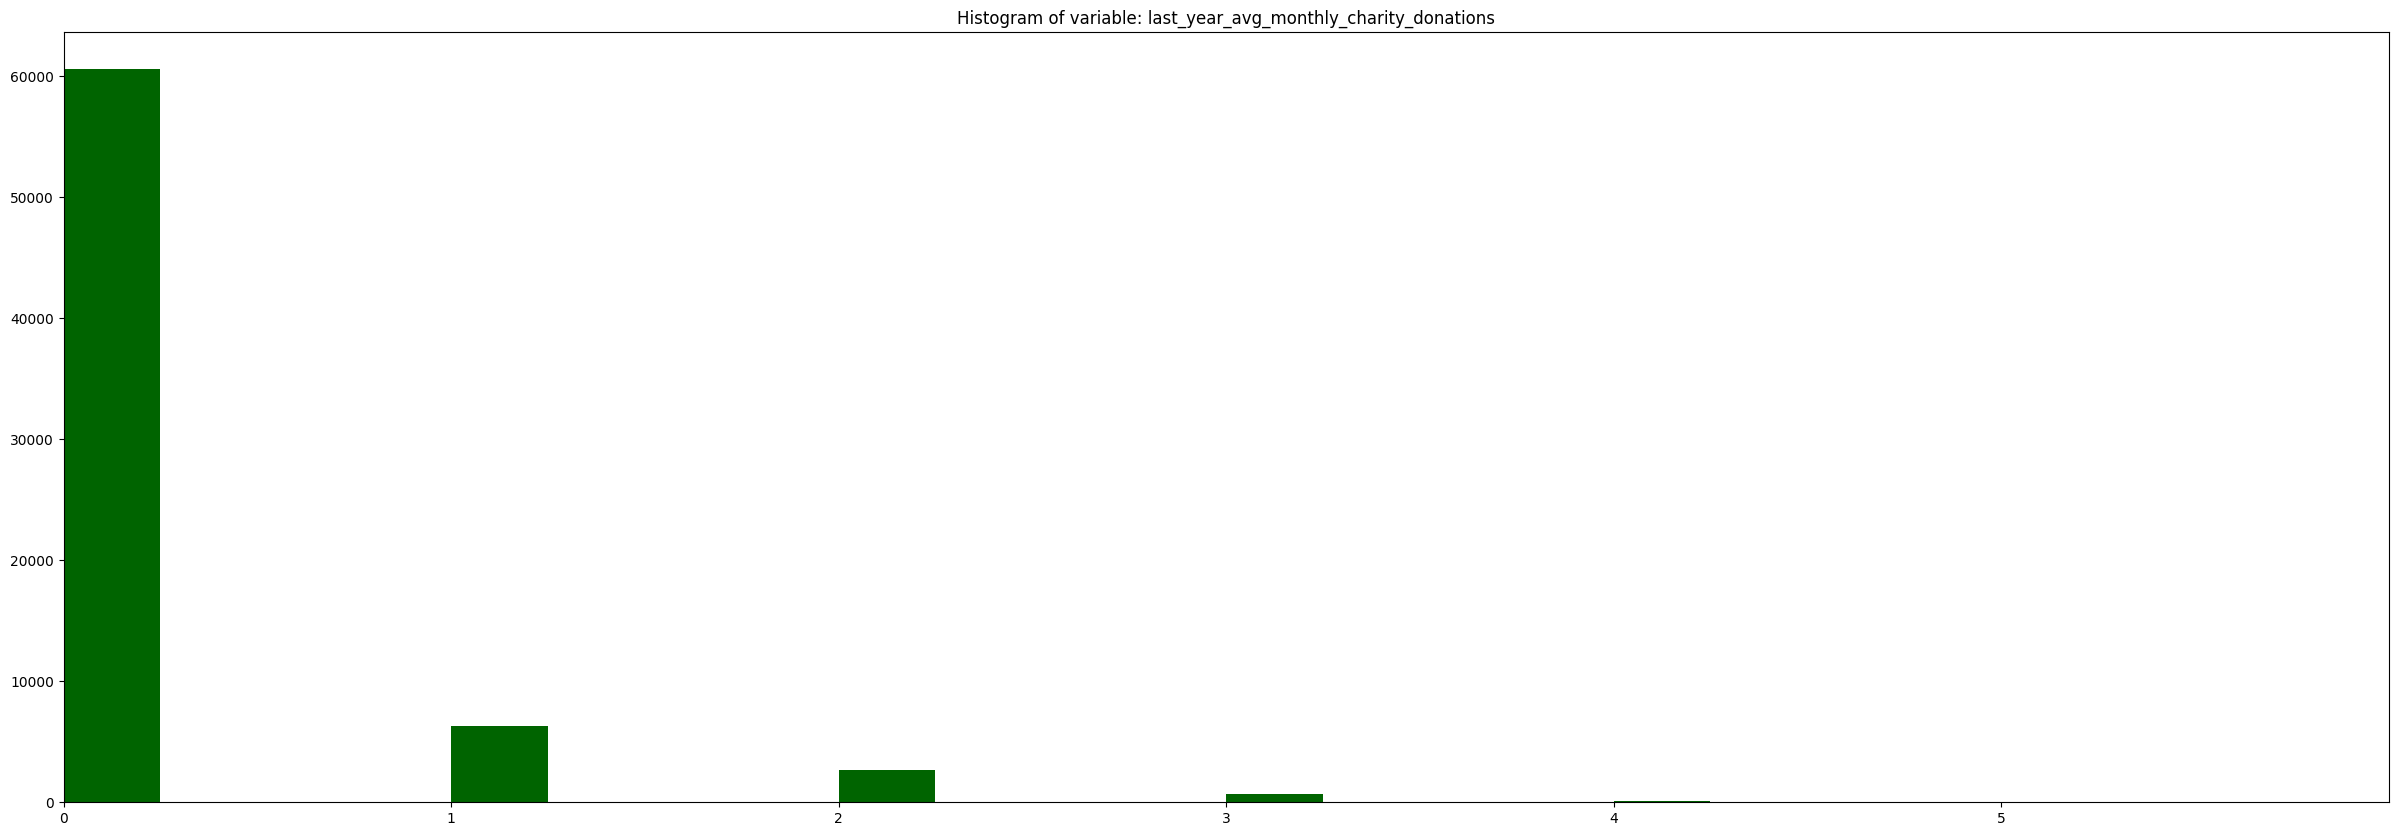

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# lyamcd Histogram
plt.hist(df_outliers_train["lyamcd"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: last_year_avg_monthly_charity_donations")

# Set the x-axis limits according to your desired scale. We know by statistical measures that the max value is 5 and after incoherence treatment min is 0
plt.xlim(0, 6)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 6, 1))

# Show the plot
plt.show()

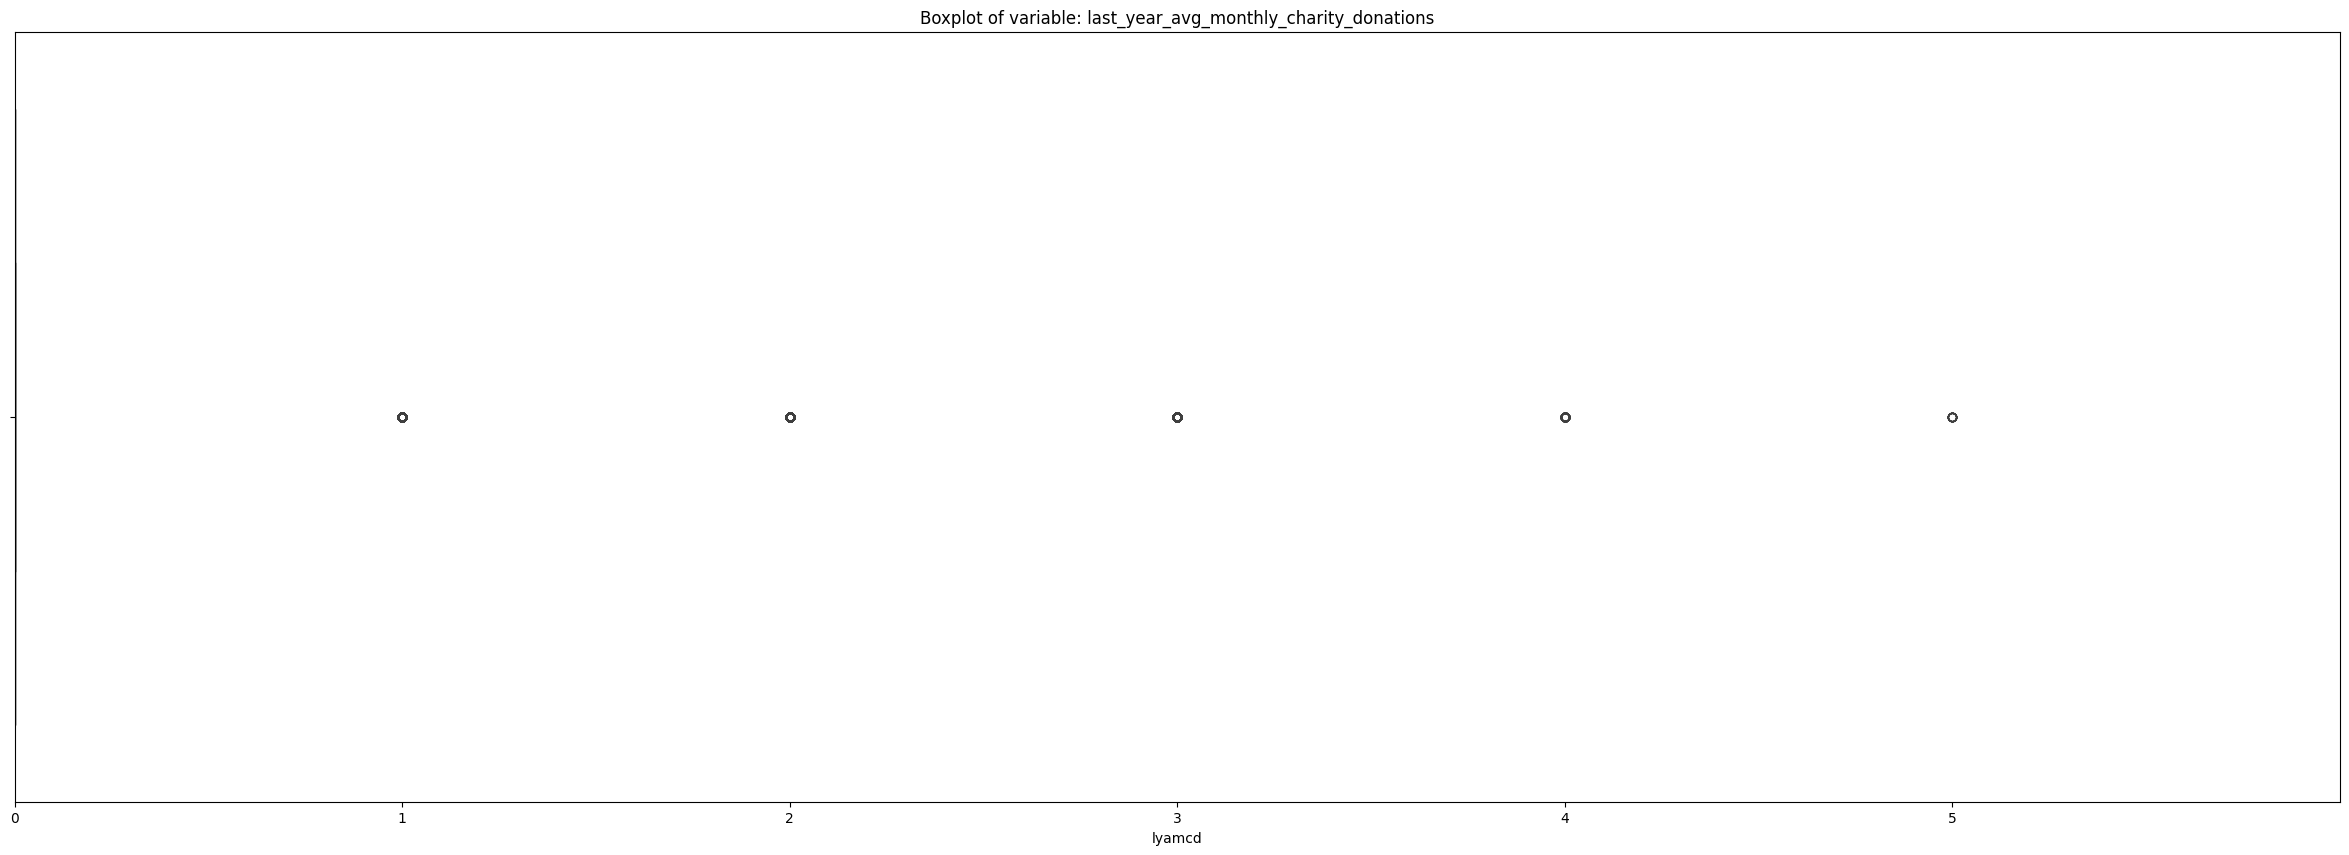

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for lyamcd
sns.boxplot(x=df_outliers_train["lyamcd"])

# Set the title of the plot
plt.title("Boxplot of variable: last_year_avg_monthly_charity_donations")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 6)

# Set x-axis ticks in increments of 1
plt.xticks(range(0,6, 1))

# Show the plot
plt.show()

In [ ]:
count_lyamcd = df_outliers_train[df_outliers_train['lyamcd'] > 5].shape[0]
print(f"Count of 'lyamcd' observations above 5: {count_lyamcd}") # there are no values

count_lyamcd = df_outliers_train[df_outliers_train['lyamcd'] ==0].shape[0]
print(f"Count of 'lyamcd' observations equal to 0: {count_lyamcd}")

count_lyamcd = df_outliers_train[df_outliers_train['lyamcd']  ==1].shape[0]
print(f"Count of 'lyamcd' observations equal to 1: {count_lyamcd}")

count_lyamcd = df_outliers_train[df_outliers_train['lyamcd']  ==2].shape[0]
print(f"Count of 'lyamcd' observations equal to 2: {count_lyamcd}")

count_lyamcd = df_outliers_train[df_outliers_train['lyamcd']  ==3].shape[0]
print(f"Count of 'lyamcd' observations equal to 3: {count_lyamcd}")

count_lyamcd = df_outliers_train[df_outliers_train['lyamcd']  ==4].shape[0]
print(f"Count of 'lyamcd' observations equal to 4: {count_lyamcd}")

count_lyamcd = df_outliers_train[df_outliers_train['lyamcd']  ==5].shape[0]
print(f"Count of 'lyamcd' observations equal to 5: {count_lyamcd}") # Only 10 records, can be considered outliers, set to 4 can be a good solution

Count of 'lyamcd' observations above 5: 0
Count of 'lyamcd' observations equal to 0: 60621
Count of 'lyamcd' observations equal to 1: 6276
Count of 'lyamcd' observations equal to 2: 2678
Count of 'lyamcd' observations equal to 3: 658
Count of 'lyamcd' observations equal to 4: 87
Count of 'lyamcd' observations equal to 5: 10


In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['lyamcd'] > 4

# Set them = to 4 since it is the nearest value
replacement_values = 4
# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'lyamcd'] = replacement_values

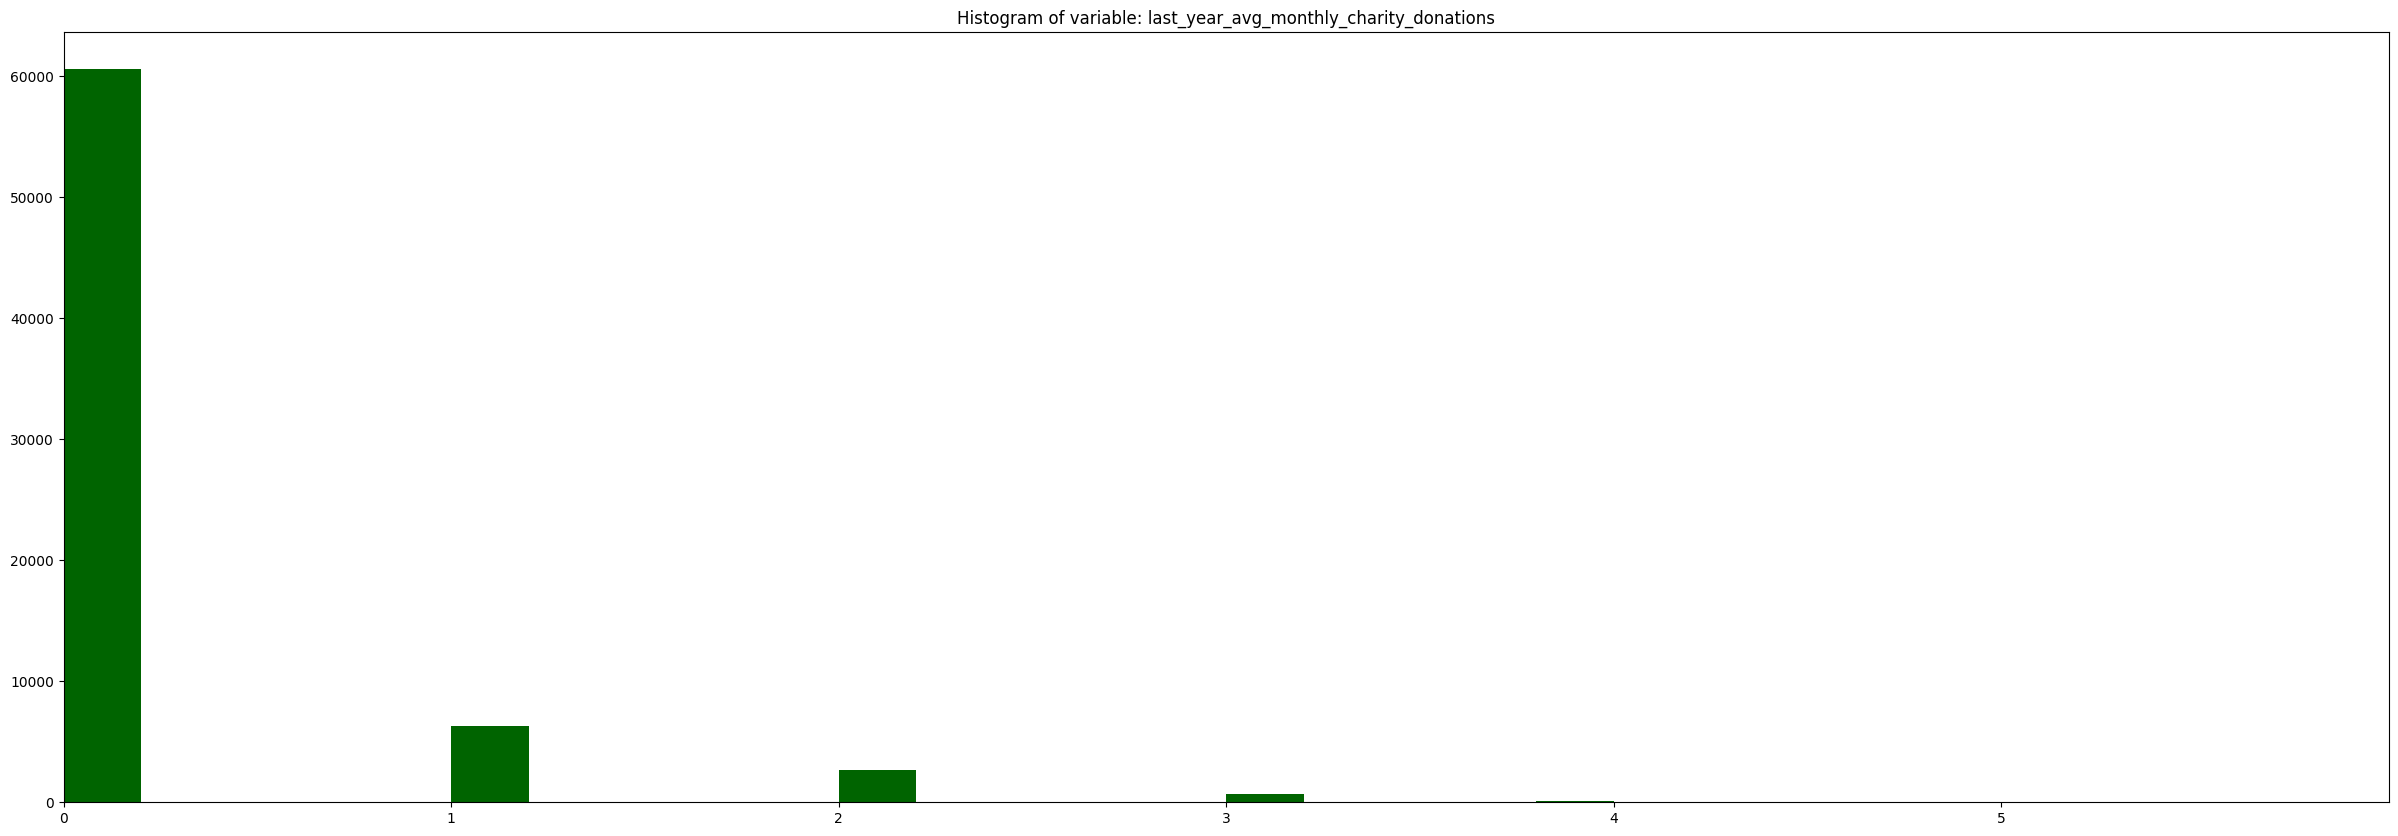

In [ ]:
#Check the lyamcd histogram again

plt.figure(figsize=(30, 10))

# lyamcd Histogram
plt.hist(df_outliers_train["lyamcd"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: last_year_avg_monthly_charity_donations")

# Set the x-axis limits according to your desired scale. We know by statistical measures that the max value is 5 and after incoherence treatment min is 0
plt.xlim(0, 6)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 6, 1))

# Show the plot
plt.show()

Everything seems okay, therefore perform the same for test dataset

In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['lyamcd'] > 4

# Set them = to 4 since it is the nearest value
replacement_values = 4
# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'lyamcd'] = replacement_values

<font size="3" color='#7C8489'>environmental_awareness_rating</font>

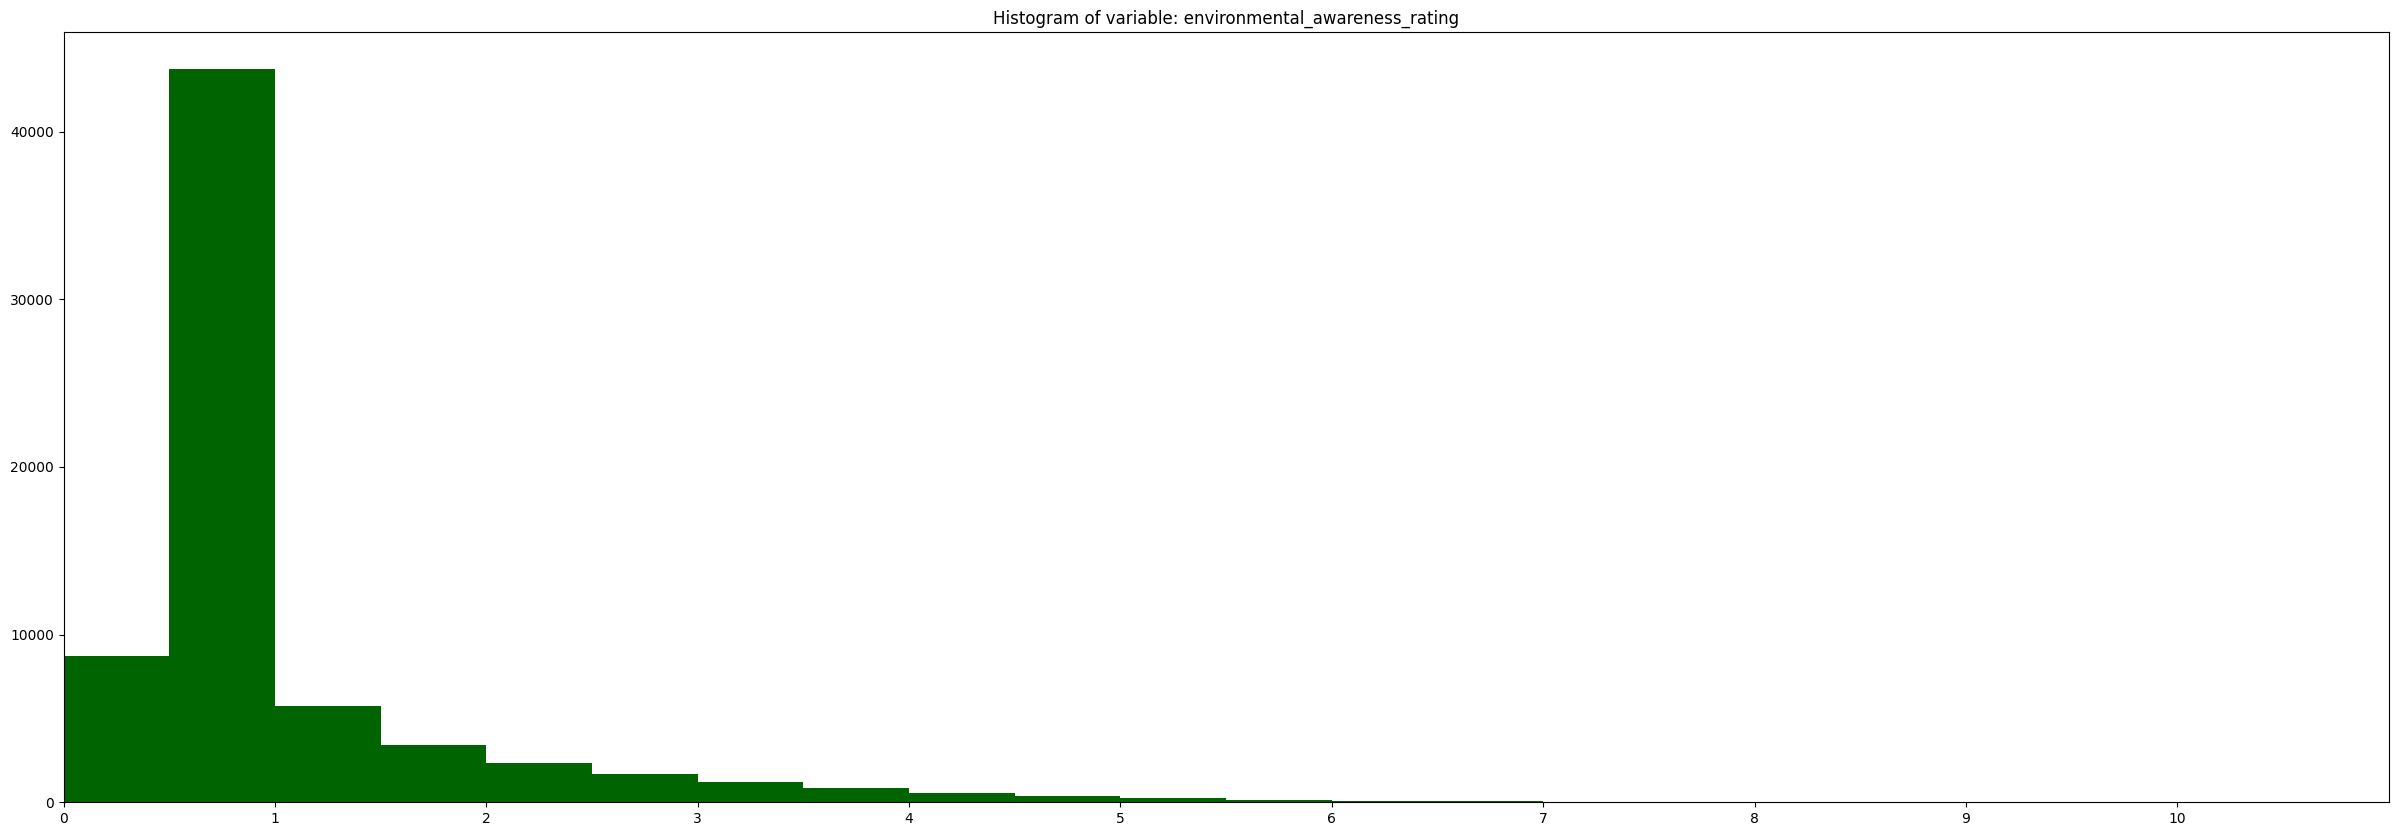

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# ear Histogram
plt.hist(df_outliers_train["ear"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: environmental_awareness_rating")

# Set the x-axis limits according to your desired scale. We know that, after incoherence treatment, these variable has values between 0 and 10
plt.xlim(0, 11)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 11, 1))

# Show the plot
plt.show()

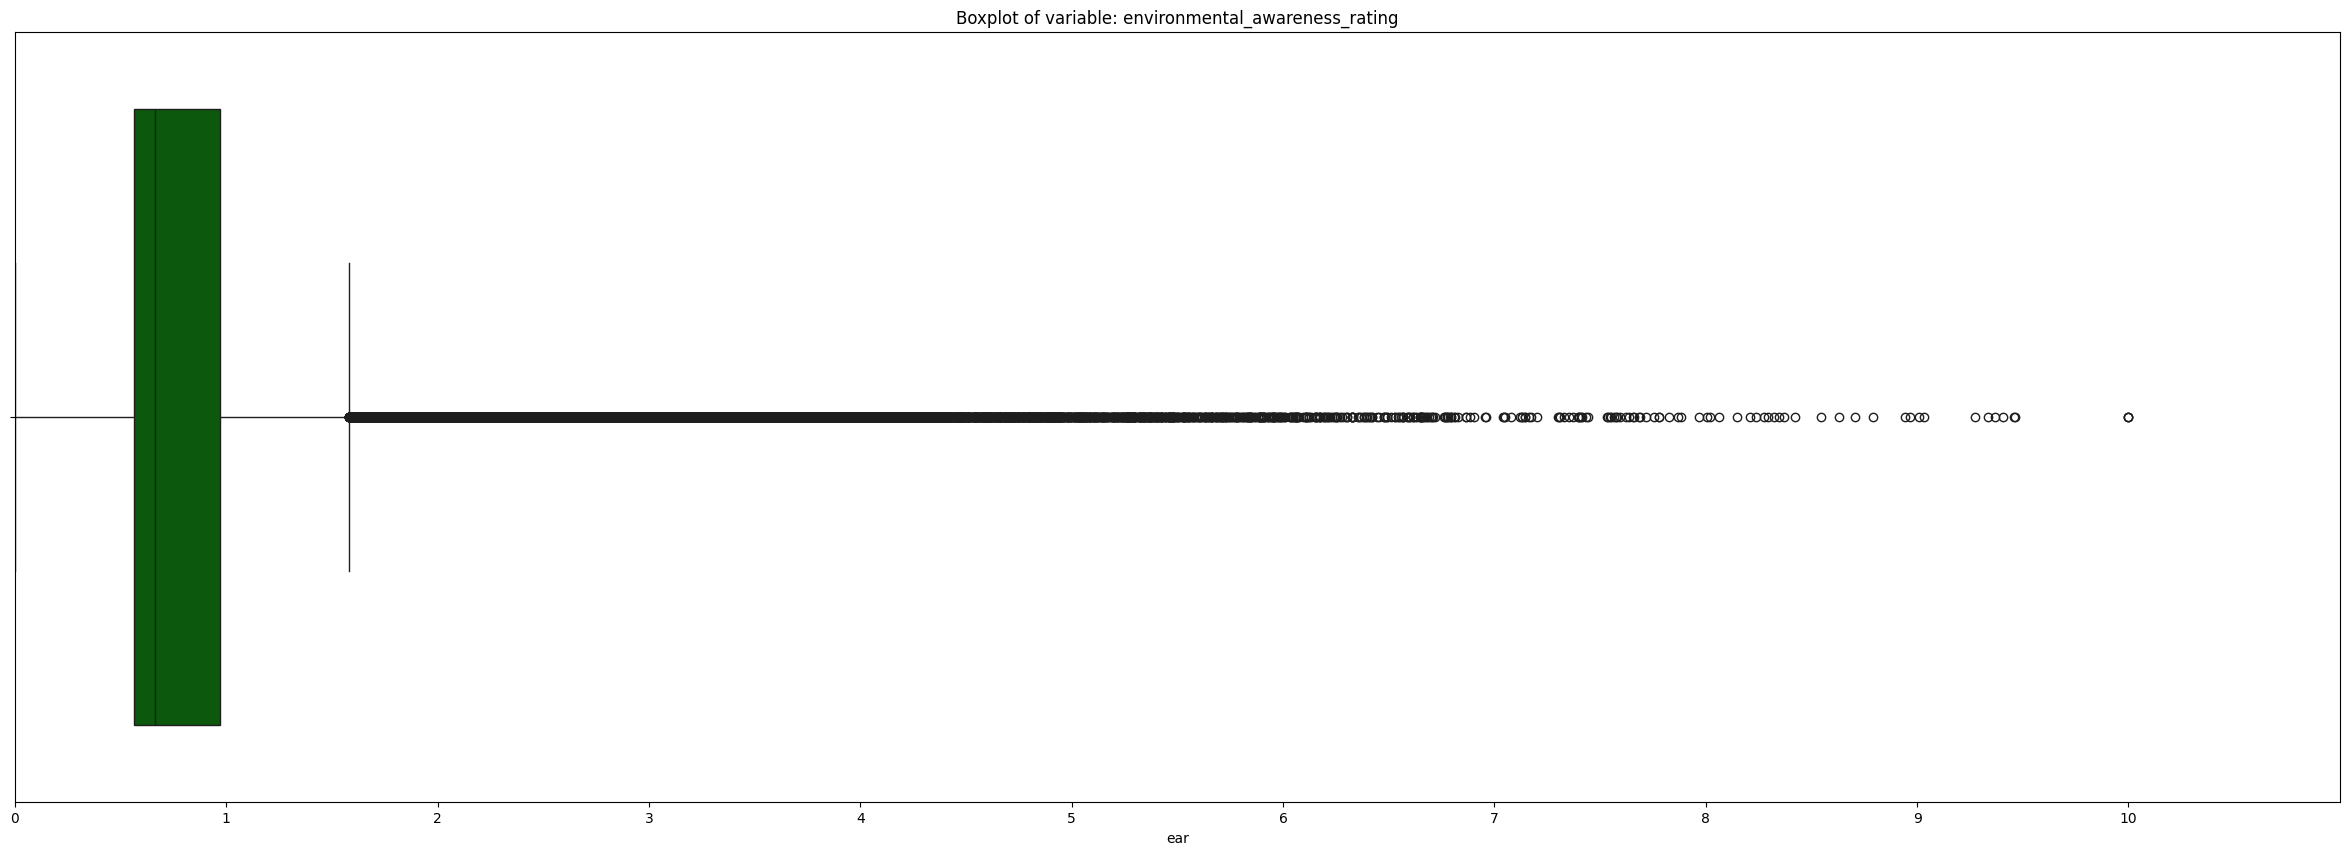

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for ear
sns.boxplot(x=df_outliers_train["ear"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: environmental_awareness_rating")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 11)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 11, 1))

# Show the plot
plt.show()

In [ ]:
count_ear = df_outliers_train[df_outliers_train['ear'] >1.7].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ear}")

count_ear = df_outliers_train[df_outliers_train['ear'] >= 7].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ear}")

count_ear = df_outliers_train[df_outliers_train['ear'] > 8.5].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ear}")

count_ear = df_outliers_train[df_outliers_train['ear'] >9].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ear}")

count_ear = df_outliers_train[df_outliers_train['ear']==10].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ear}")

count_ear = df_outliers_train[df_outliers_train['ear'] >10].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ear}")

Count of 'last_year_avg_monthly_charity_donations' observations: 9446
Count of 'last_year_avg_monthly_charity_donations' observations: 76
Count of 'last_year_avg_monthly_charity_donations' observations: 17
Count of 'last_year_avg_monthly_charity_donations' observations: 11
Count of 'last_year_avg_monthly_charity_donations' observations: 3
Count of 'last_year_avg_monthly_charity_donations' observations: 0


In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = (df_outliers_train['ear'] > 8.5) & (df_outliers_train['ear'] < 10)

# Generate random values between 6 and 8.5
replacement_values = np.random.uniform(7, 8.5, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'ear'] = replacement_values

#Replace extreme outliers
df_outliers_train.loc[df_outliers_train['ear'] >= 10, 'ear'] = 8.5

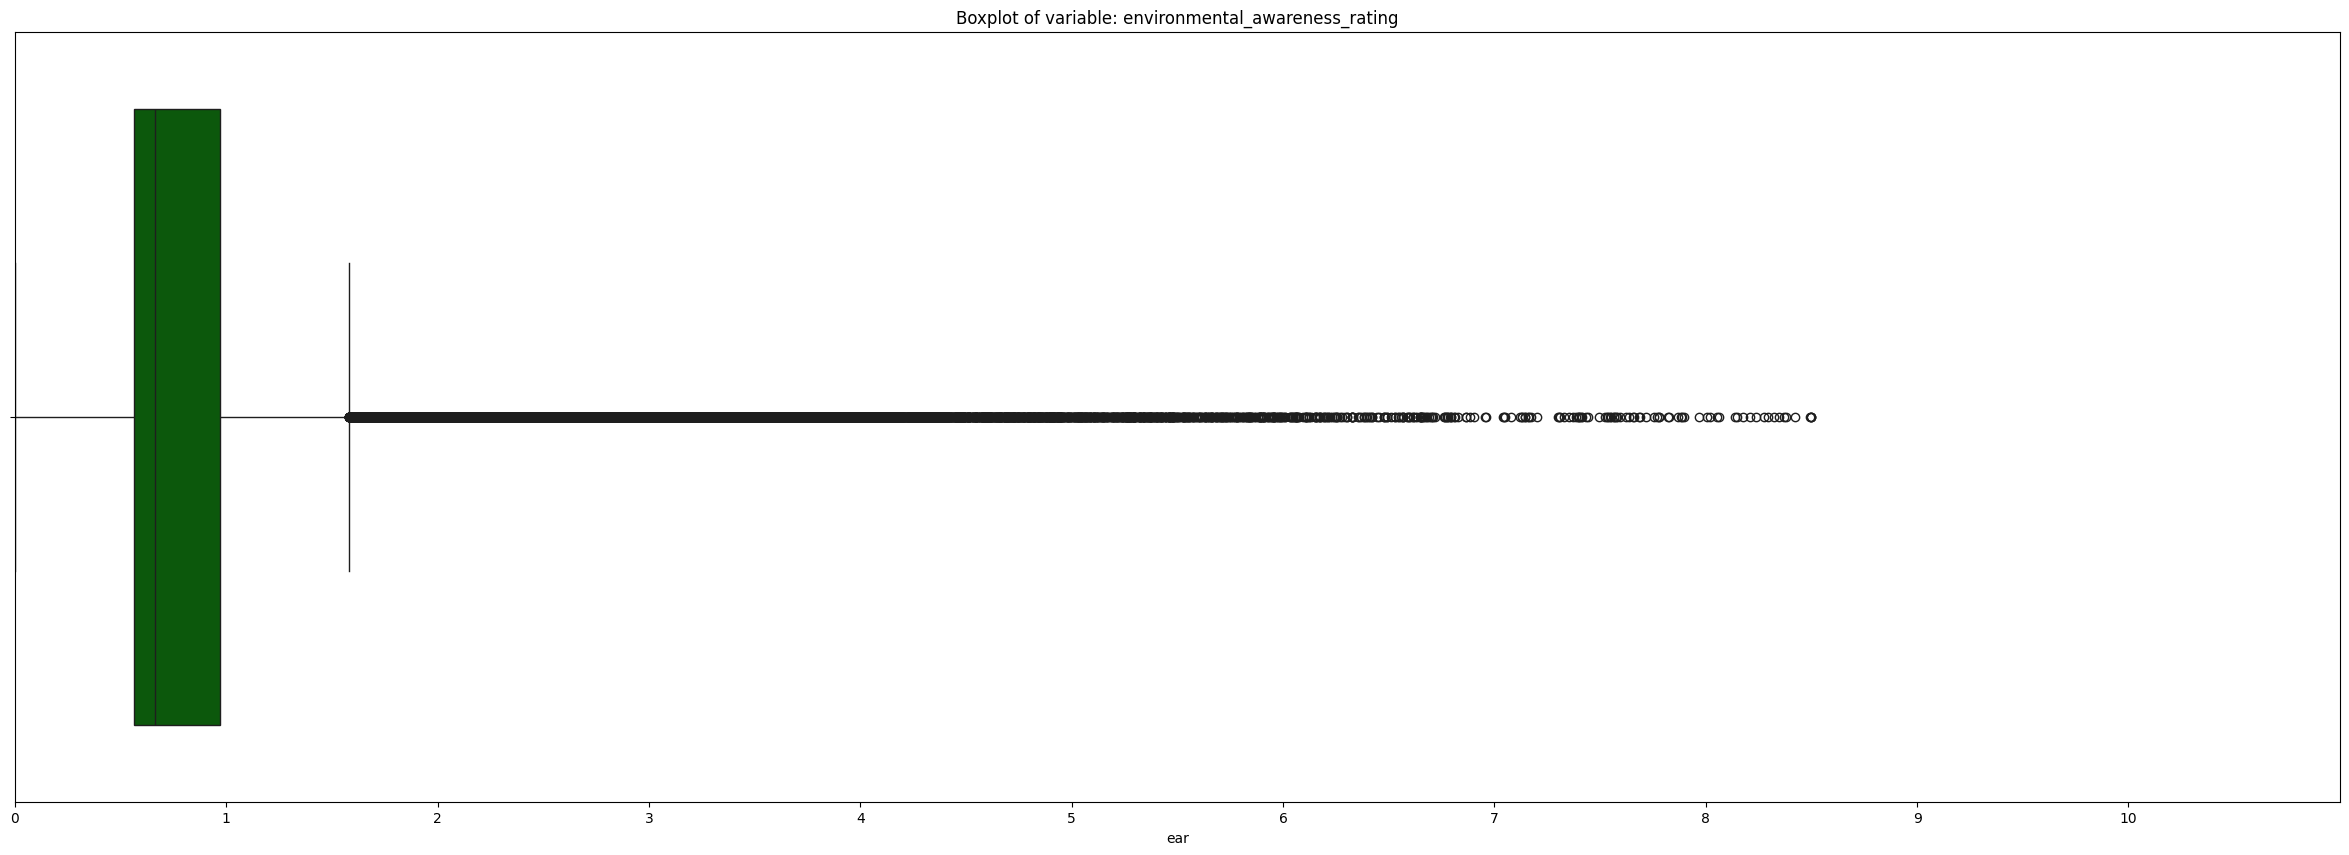

In [ ]:
#Check the ear boxplot again

# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for ear
sns.boxplot(x=df_outliers_train["ear"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: environmental_awareness_rating")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 11)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 11, 1))

# Show the plot
plt.show()

Everything seems okay, therefore perform the same for test dataset

In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = (df_outliers_test['ear'] > 8.5) & (df_outliers_test['ear'] < 10)

# Generate random values between 6 and 8.5
replacement_values = np.random.uniform(7, 8.5, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'ear'] = replacement_values

#Replace extreme outliers
df_outliers_test.loc[df_outliers_test['ear'] >= 10, 'ear'] = 8.5

<font size="3" color='#7C8489'>financial_wellness_index</font>

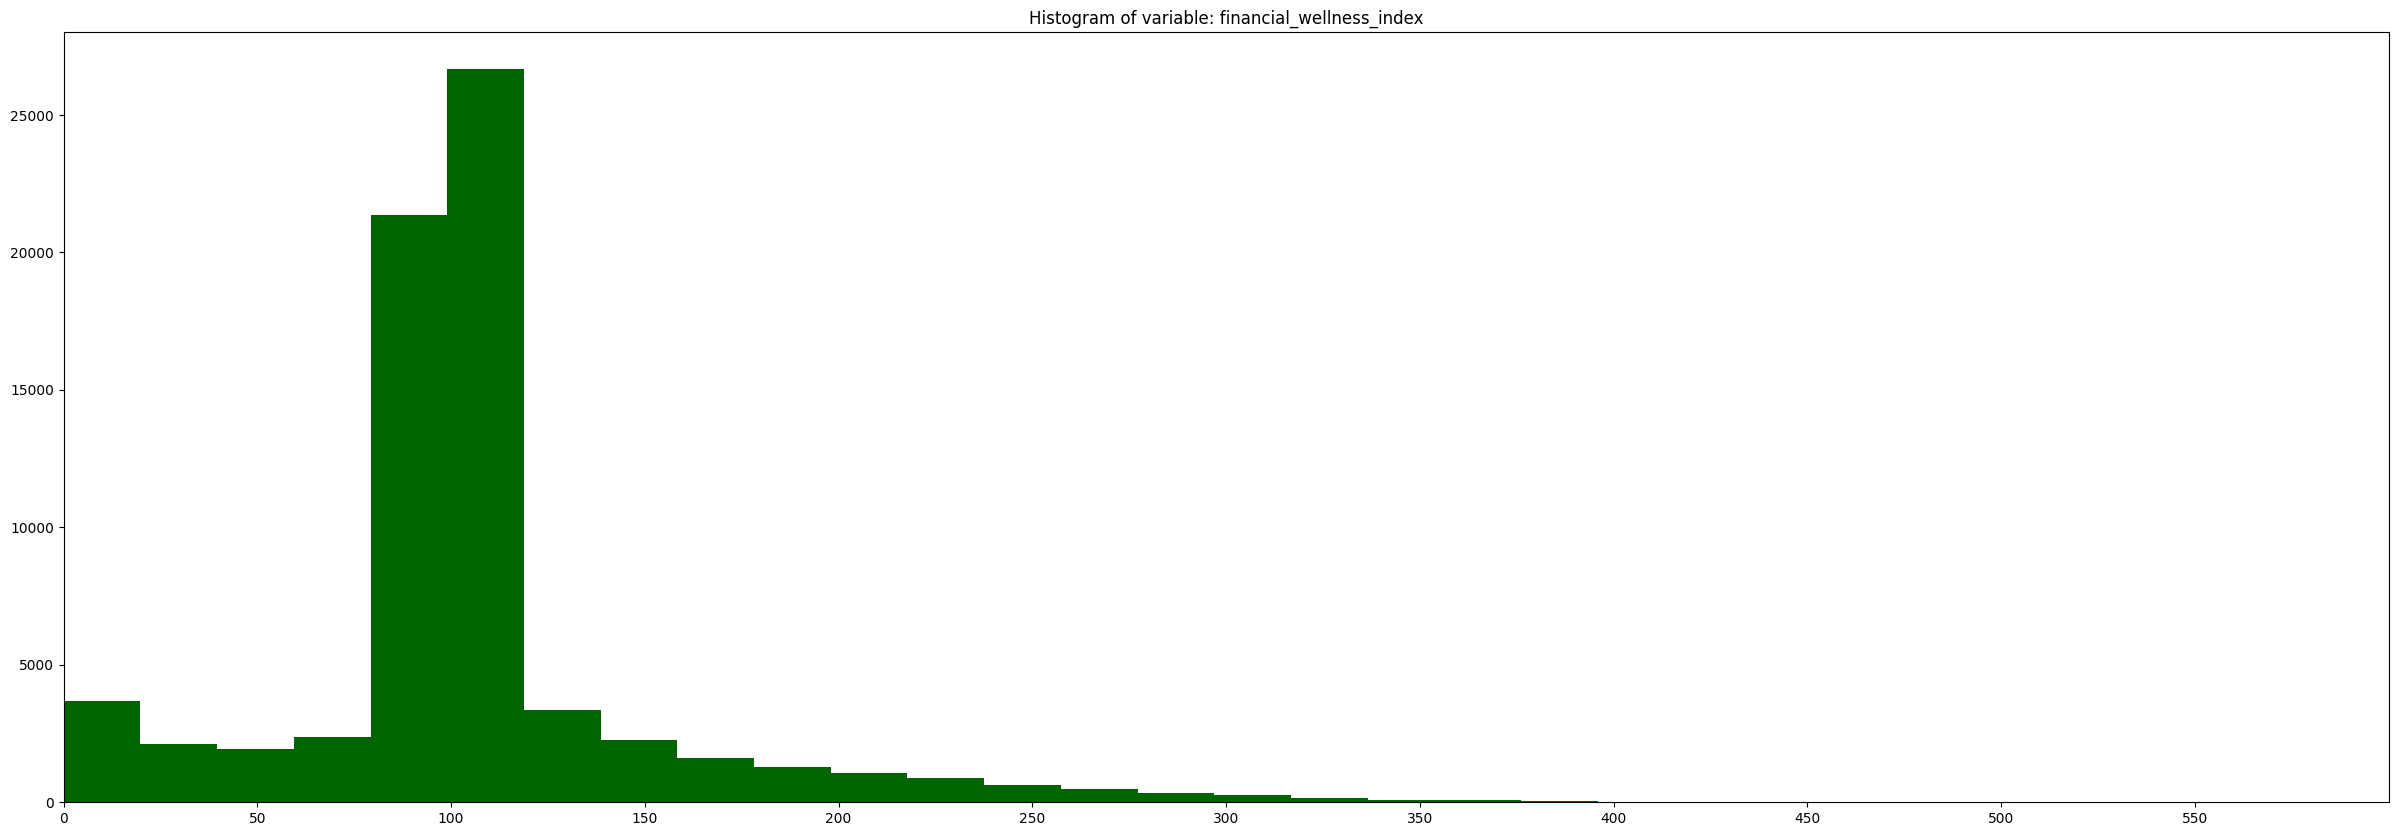

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# fwi Histogram
plt.hist(df_outliers_train["fwi"], bins=30,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: financial_wellness_index")

# Set the x-axis limits according to your desired scale. We know by the statistical measure that the max value if 593
plt.xlim(0, 600)

# Set x-axis ticks in increments of 50
plt.xticks(range(0, 600, 50))

# Show the plot
plt.show()

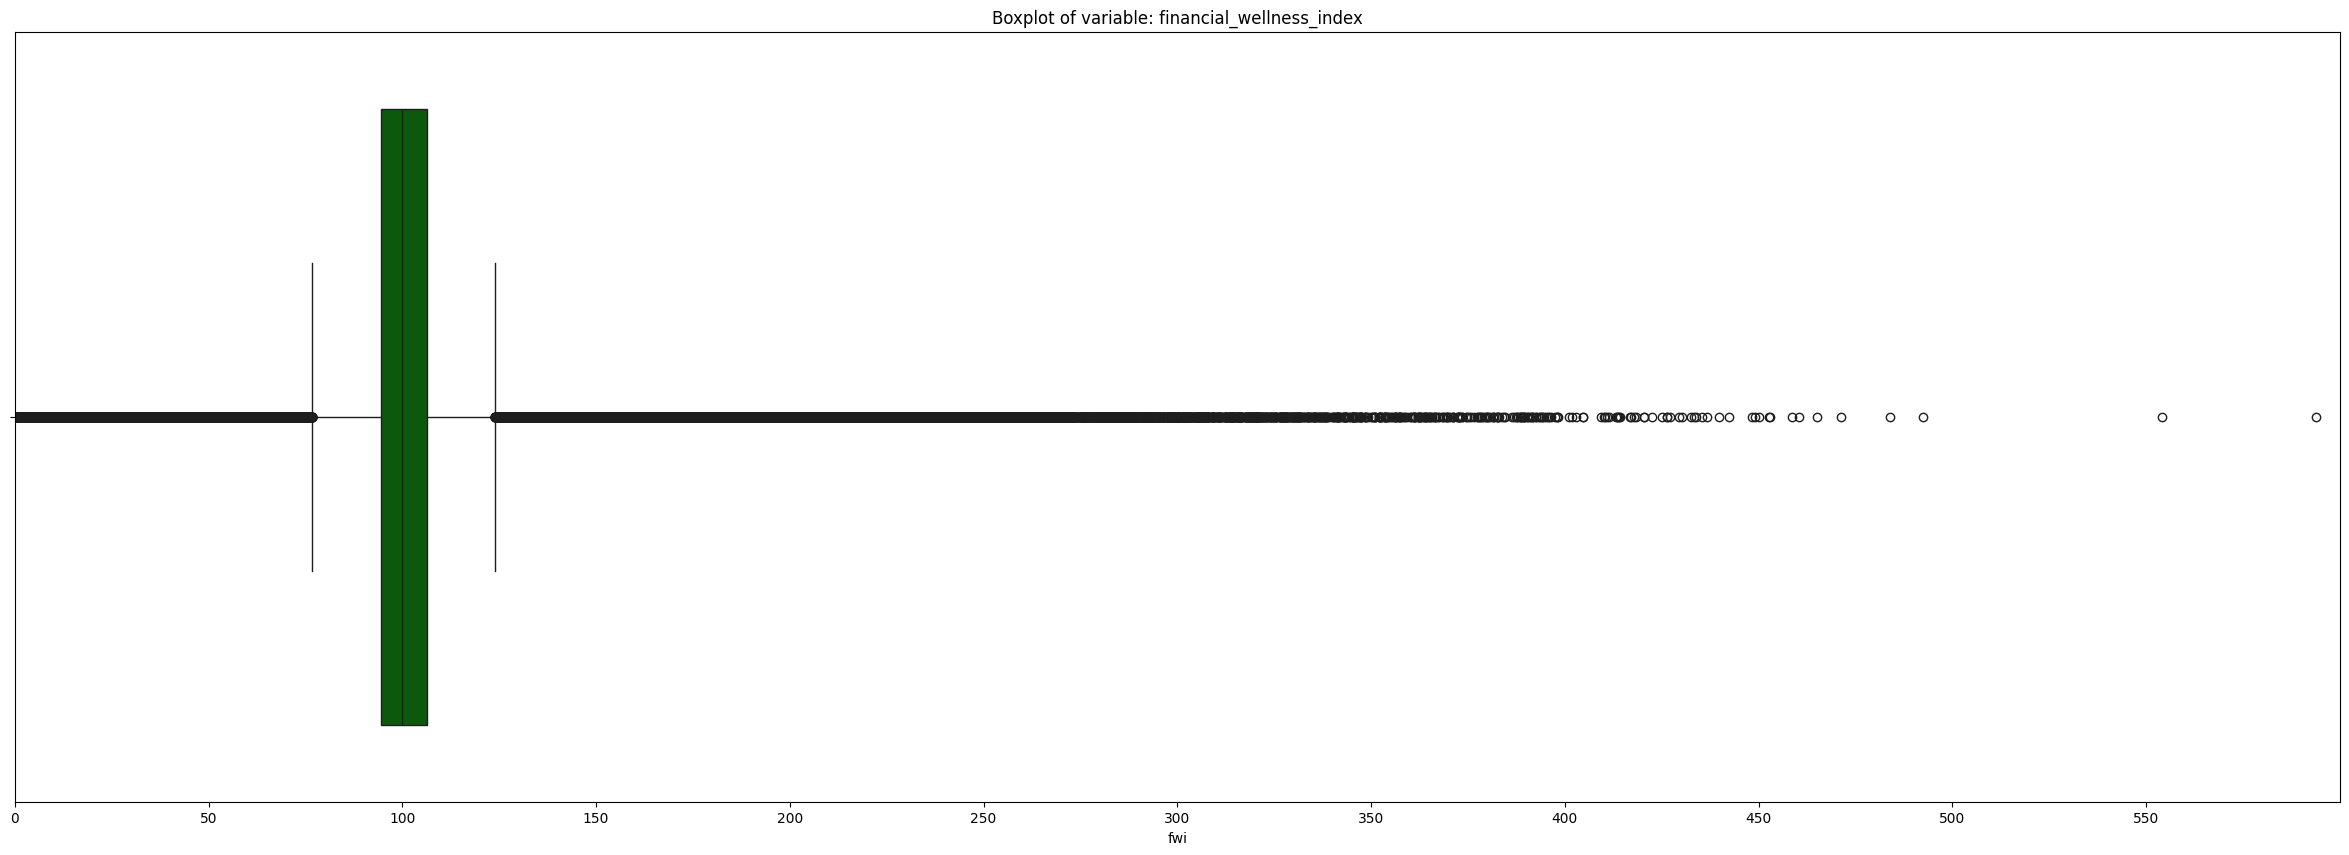

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for fwi
sns.boxplot(x=df_outliers_train["fwi"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: financial_wellness_index")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 600)

# Set x-axis ticks in increments of 50
plt.xticks(range(0, 600, 50))

# Show the plot
plt.show()

In [ ]:
count_fwi = df_outliers_train[df_outliers_train['fwi'] > 125].shape[0]
print(f"Count of 'financial_wellness_index' observations: {count_fwi}")

count_fwi = df_outliers_train[df_outliers_train['fwi'] > 400].shape[0]
print(f"Count of 'financial_wellness_index' observations: {count_fwi}")

count_fwi = df_outliers_train[df_outliers_train['fwi'] > 450].shape[0]
print(f"Count of 'financial_wellness_index' observations: {count_fwi}") # due to frequency, should not consider outliers

count_fwi = df_outliers_train[df_outliers_train['fwi'] >= 500].shape[0]
print(f"Count of 'financial_wellness_index' observations: {count_fwi}")

Count of 'financial_wellness_index' observations: 11314
Count of 'financial_wellness_index' observations: 48
Count of 'financial_wellness_index' observations: 11
Count of 'financial_wellness_index' observations: 2


In [ ]:
## The idea is to not remove extreme values, but instead keep them as the max of observations but in a more distributed way,and transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['fwi'] > 500

# Generate random values between 400 and 450
replacement_values = np.random.uniform(450, 500, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'fwi'] = replacement_values

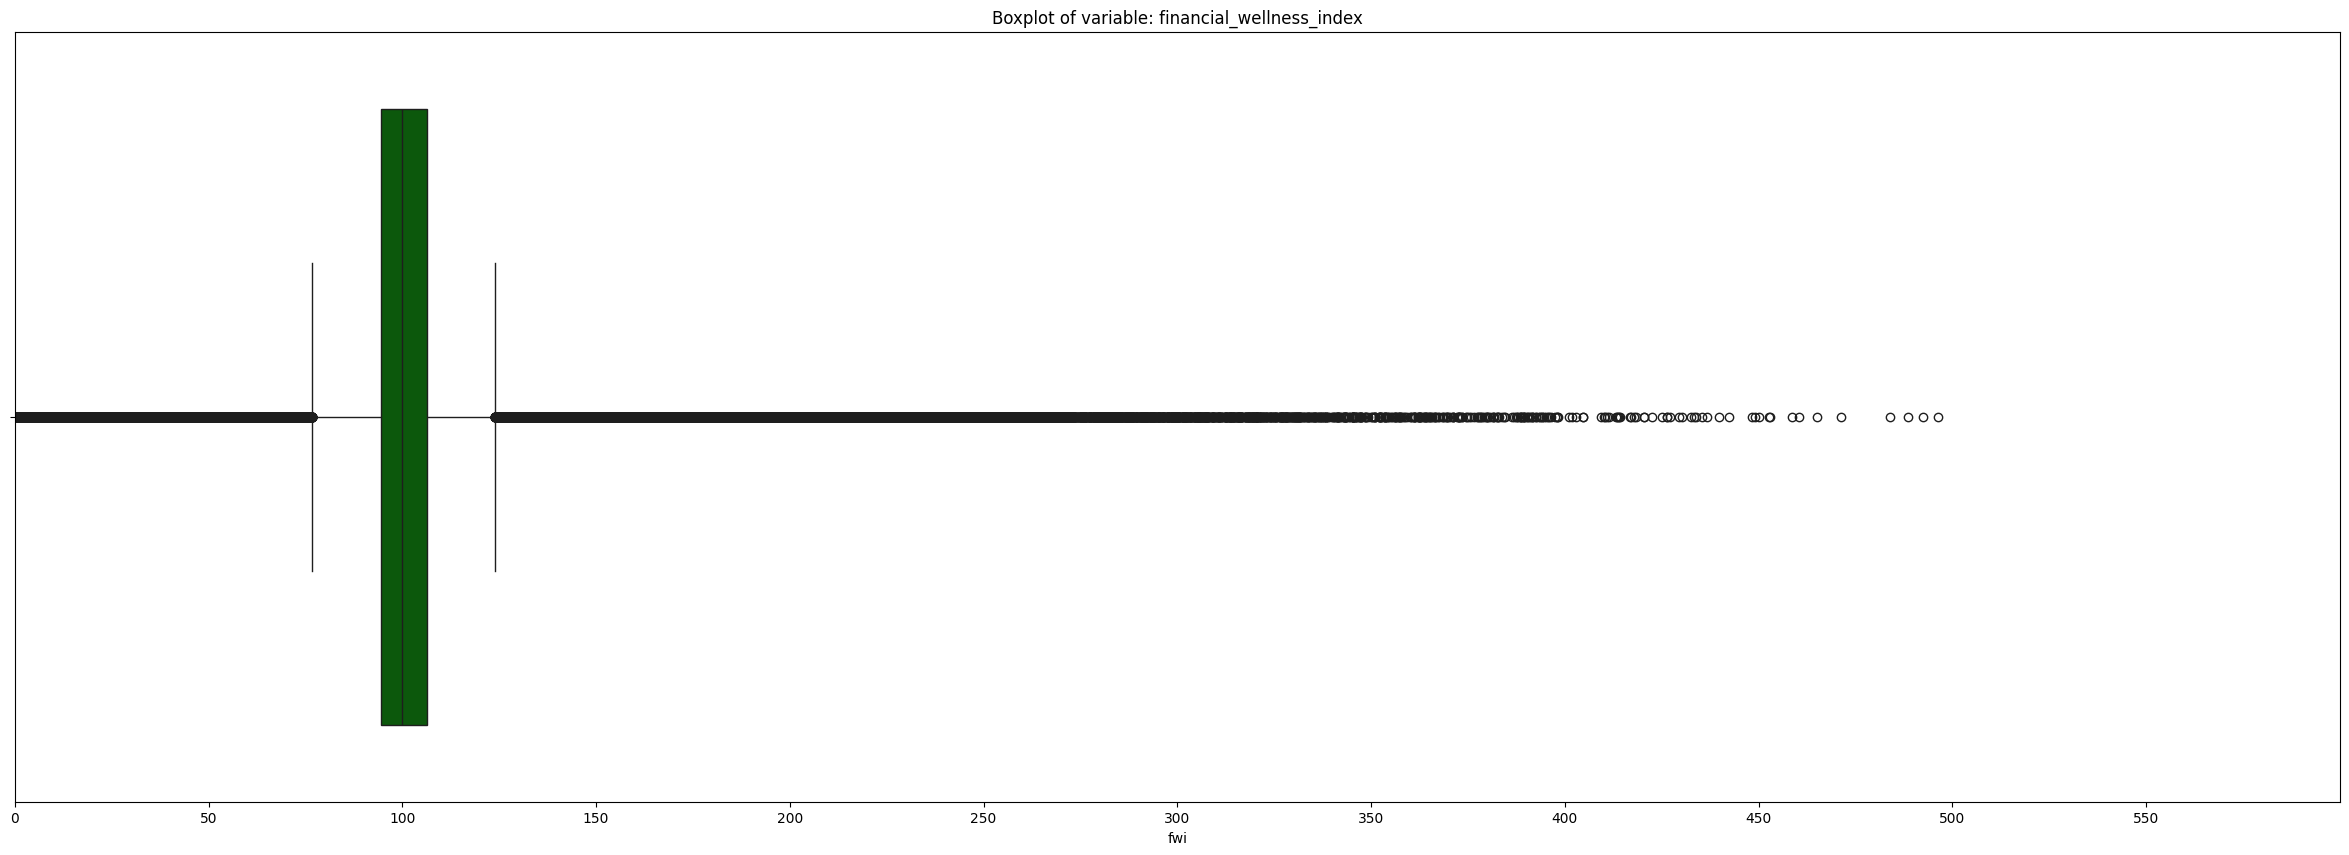

In [ ]:
#Check the fwi boxplot again

plt.figure(figsize=(30, 10))

# BoxPlot for fwi
sns.boxplot(x=df_outliers_train["fwi"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: financial_wellness_index")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 600)

# Set x-axis ticks in increments of 50
plt.xticks(range(0, 600, 50))

# Show the plot
plt.show()

Everything seems okay, therefore perform the same for test dataset

In [ ]:
## The idea is to not remove extreme values, but instead keep them as the max of observations but in a more distributed way,and transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['fwi'] > 500

# Generate random values between 400 and 450
replacement_values = np.random.uniform(450, 500, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'fwi'] = replacement_values

<font size="3" color='#7C8489'>investment_portfolio_value</font>

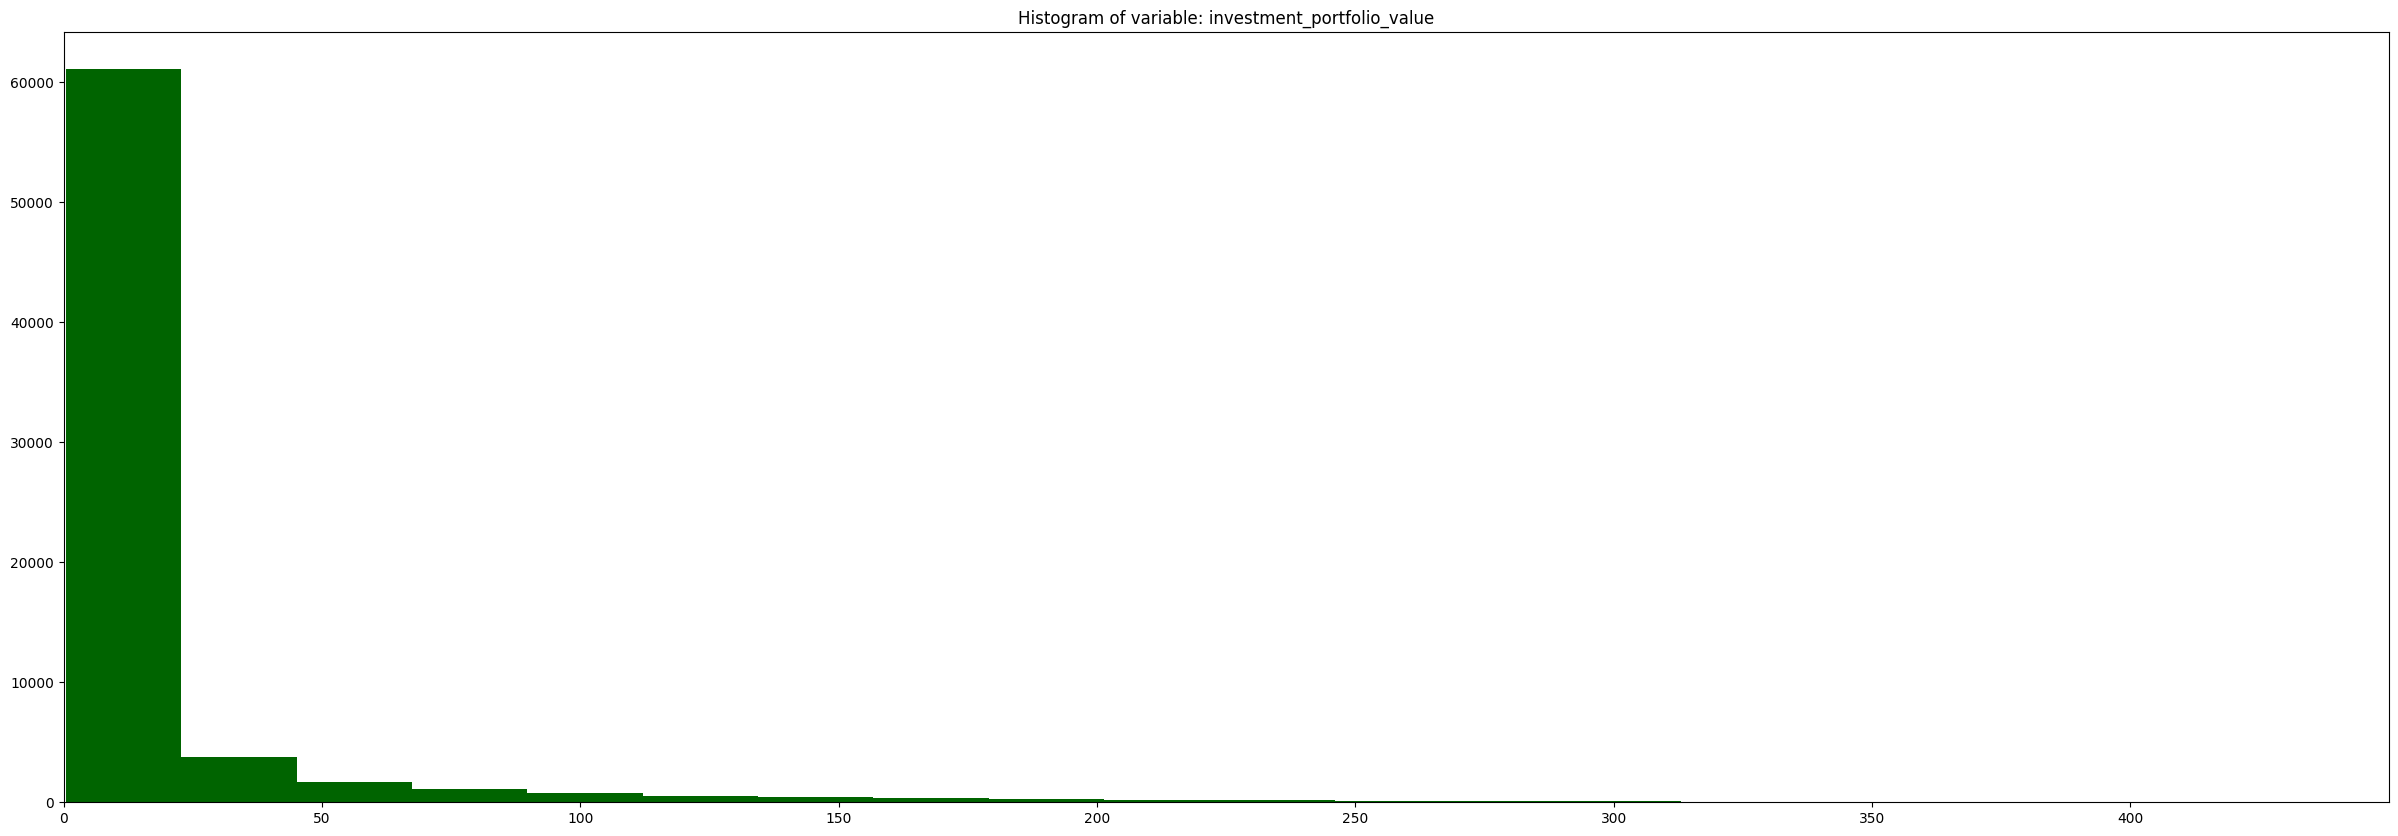

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["ipv"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: investment_portfolio_value")

# Set the x-axis limits according to your desired scale. We know by the statistical measure that the max value if 447
plt.xlim(0, 450)

# Set x-axis ticks in increments of 50
plt.xticks(range(0, 450, 50))

# Show the plot
plt.show()

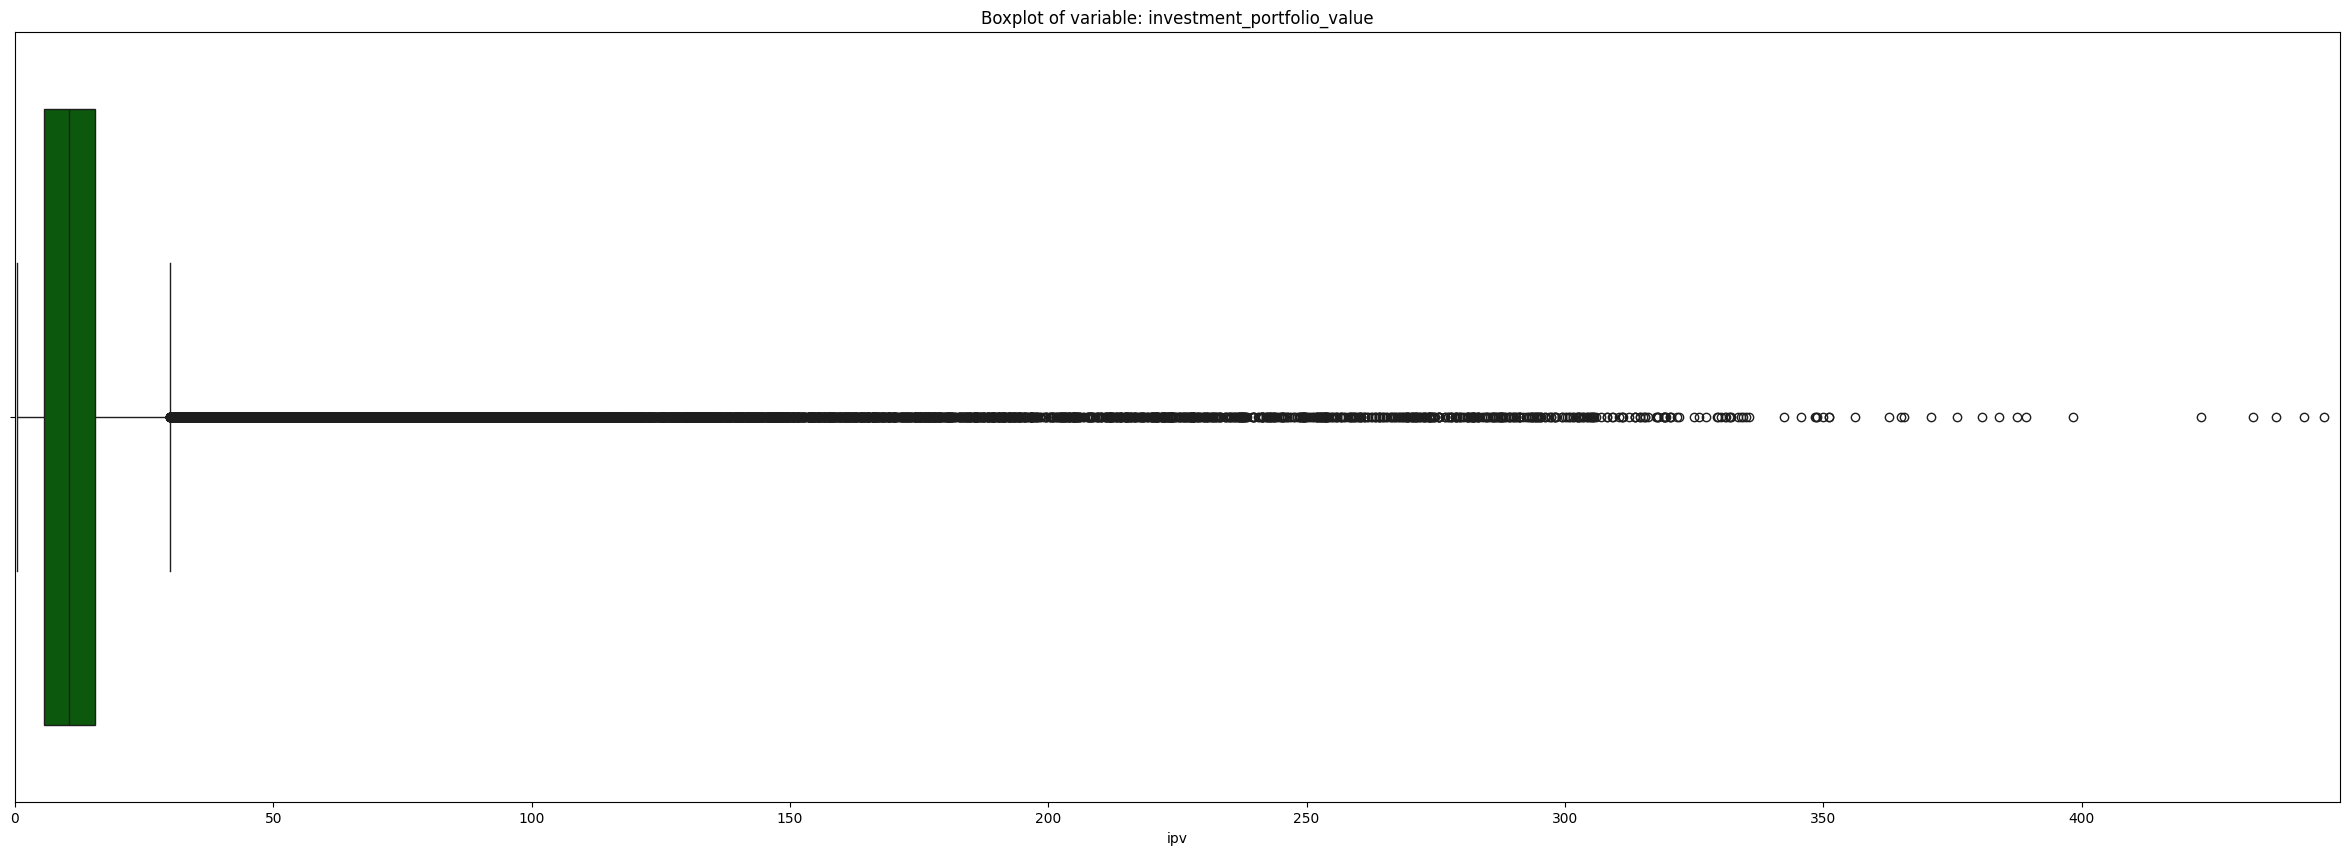

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["ipv"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: investment_portfolio_value")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 450)

# Set x-axis ticks in increments of 50
plt.xticks(range(0, 450, 50))

# Show the plot
plt.show()

In [ ]:
count_ipv = df_outliers_train[df_outliers_train['ipv'] > 30].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ipv}")

count_ipv = df_outliers_train[df_outliers_train['ipv'] > 340].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ipv}") # less records > 340

count_ipv = df_outliers_train[df_outliers_train['ipv'] > 400].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_ipv}") # do not drop because there are 5 records above 400, frequency high and close to neighbors

Count of 'last_year_avg_monthly_charity_donations' observations: 7737
Count of 'last_year_avg_monthly_charity_donations' observations: 24
Count of 'last_year_avg_monthly_charity_donations' observations: 5


In [ ]:
## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['ipv'] > 400

# Generate random values between 350 and 340
replacement_values = np.random.uniform(350, 400, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'ipv'] = replacement_values

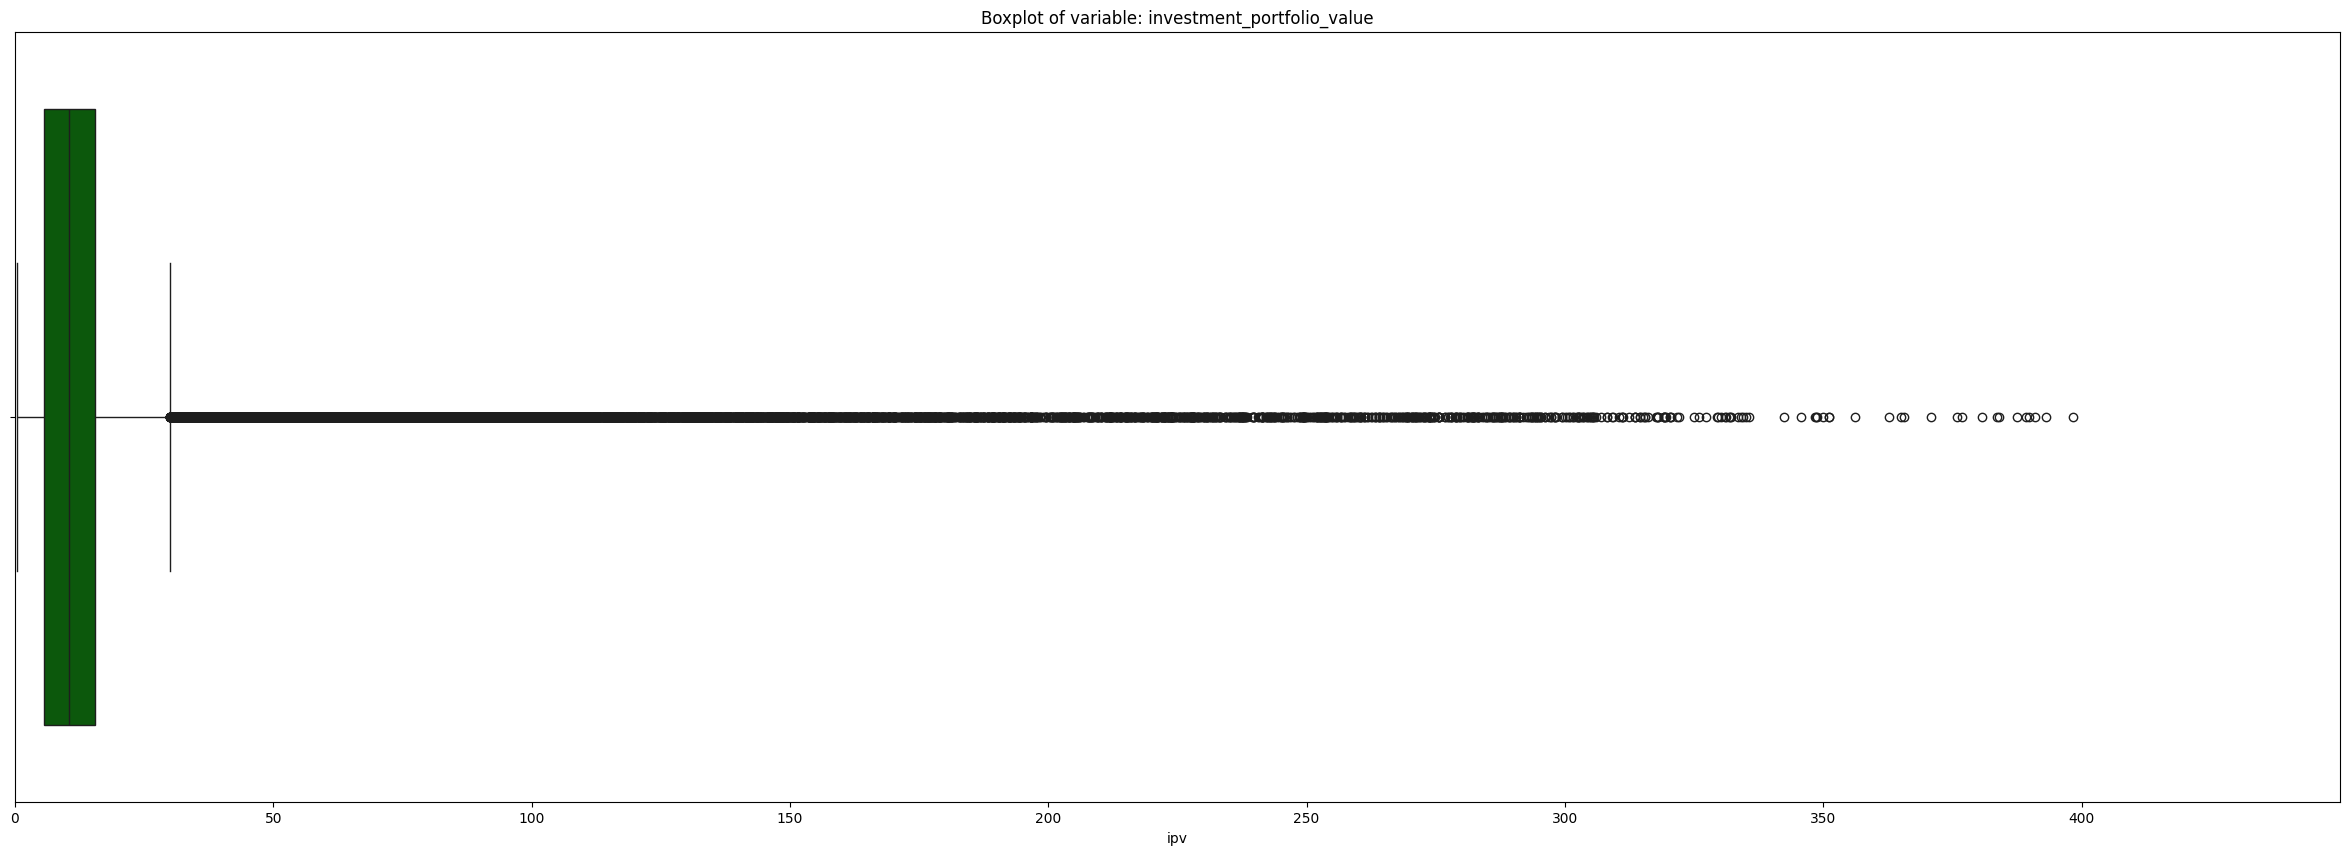

In [ ]:
#Check the ipv boxplot again

# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["ipv"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: investment_portfolio_value")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 450)

# Set x-axis ticks in increments of 50
plt.xticks(range(0, 450, 50))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['ipv'] > 400

# Generate random values between 300 and 340
replacement_values = np.random.uniform(350, 400, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'ipv'] = replacement_values

<font size="3" color='#7C8489'>investments_risk_appetite</font>

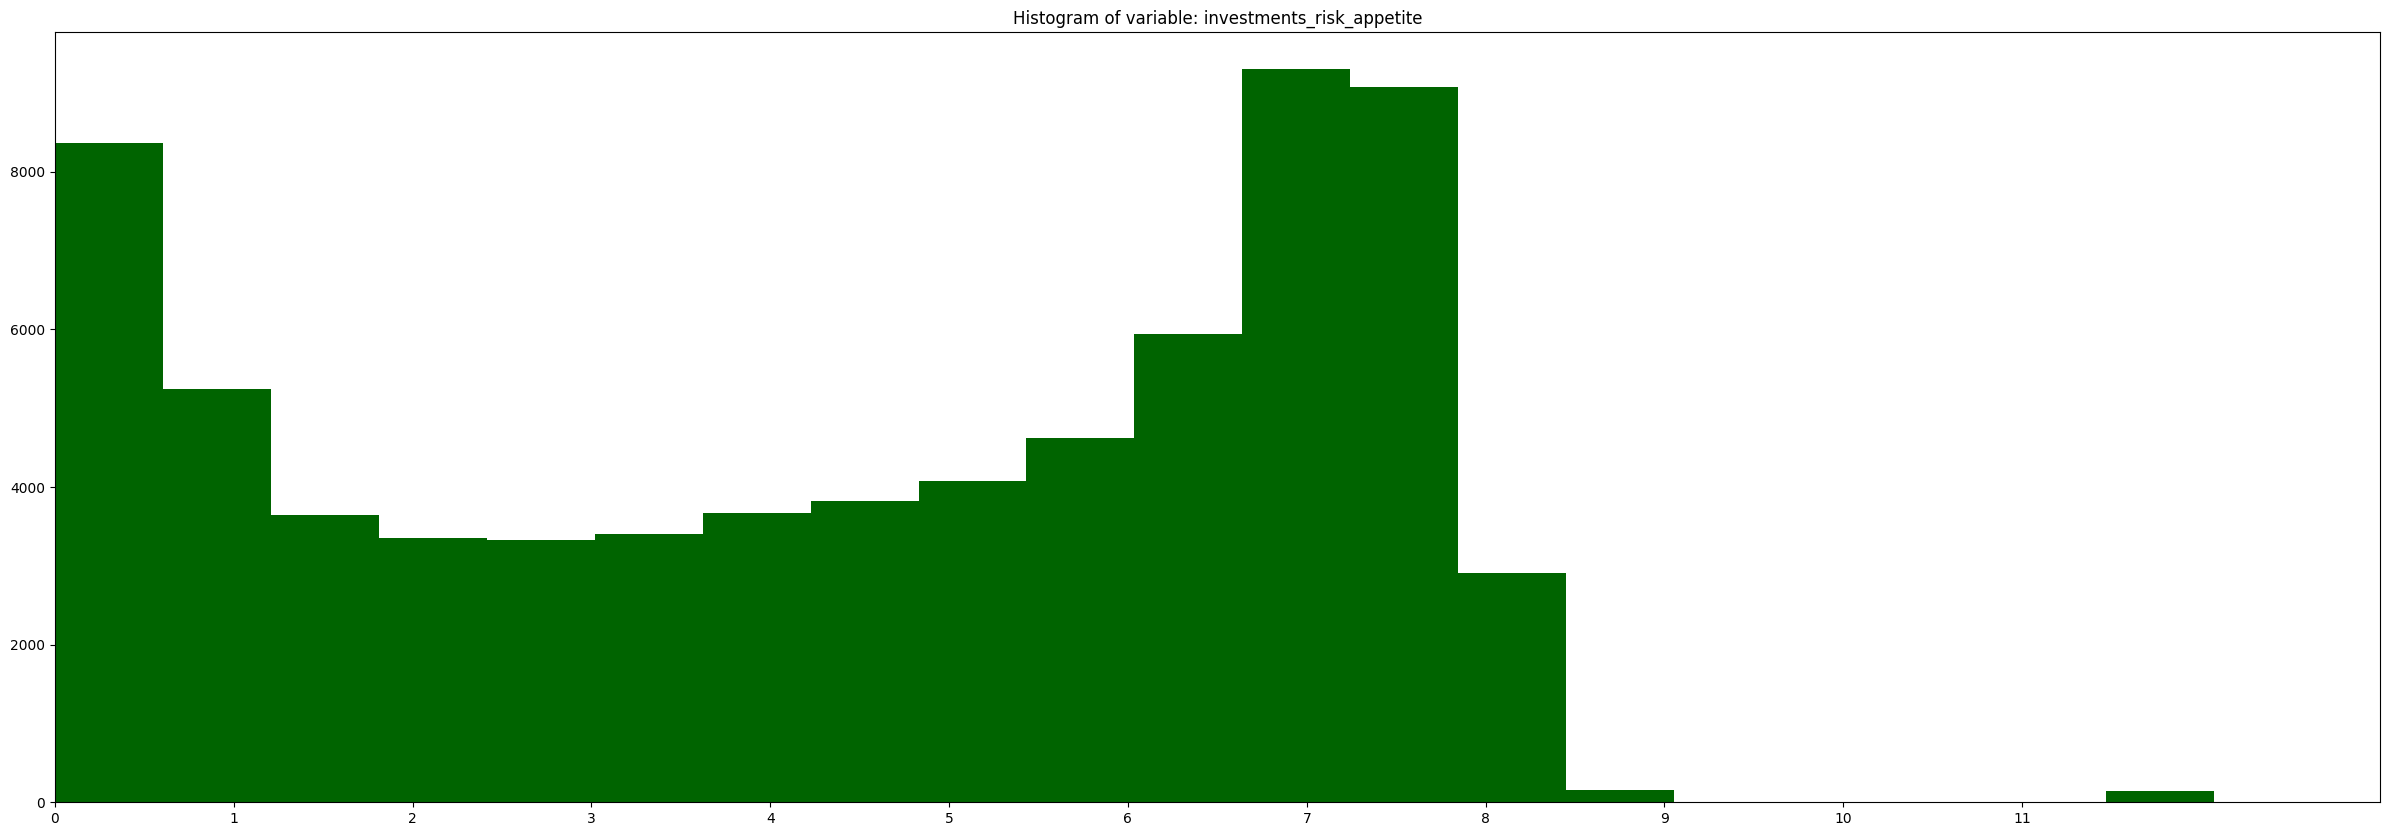

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["ira"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: investments_risk_appetite")

# Set the x-axis limits according to your desired scale. We know by the statistical measure that the max value if 12
plt.xlim(0, 13)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 12, 1))

# Show the plot
plt.show()

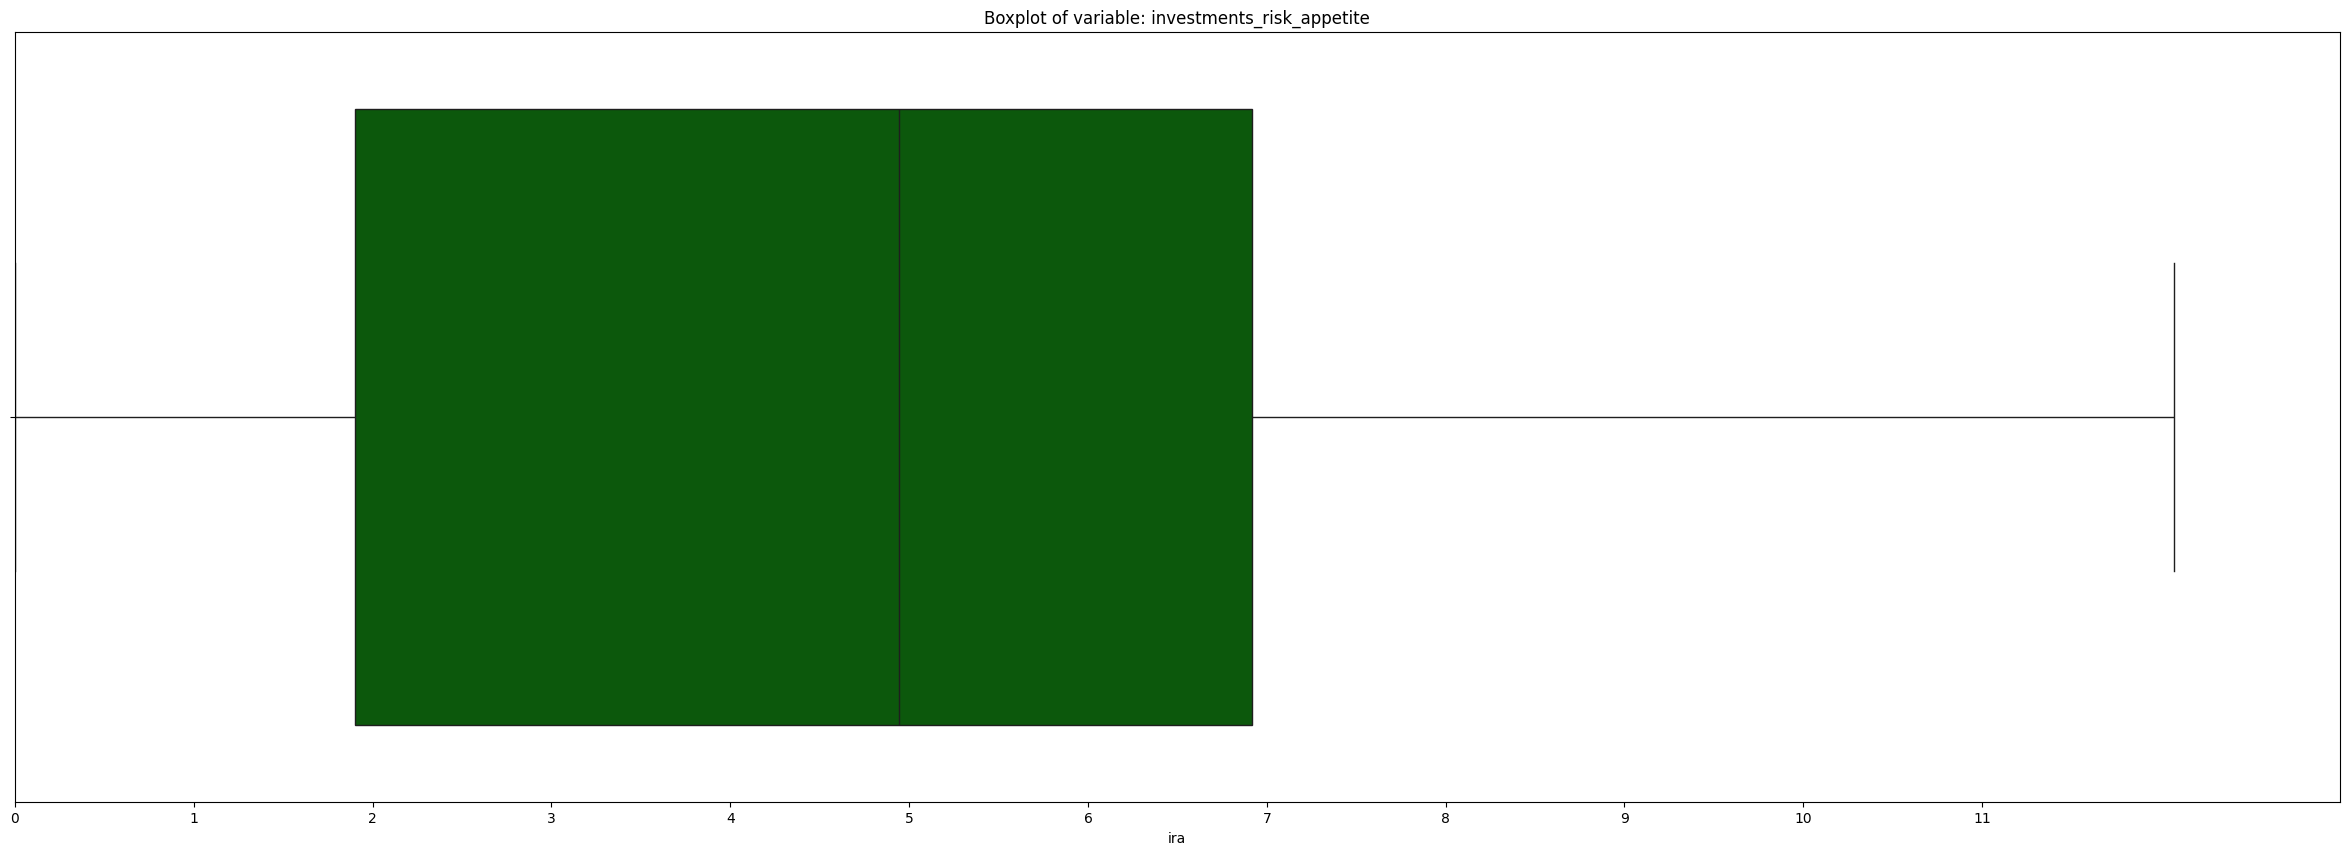

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["ira"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: investments_risk_appetite")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 13)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 12, 1))

# Show the plot
plt.show()

There are no outliers

<font size="3" color='#7C8489'>investments_risk_tolerance</font>

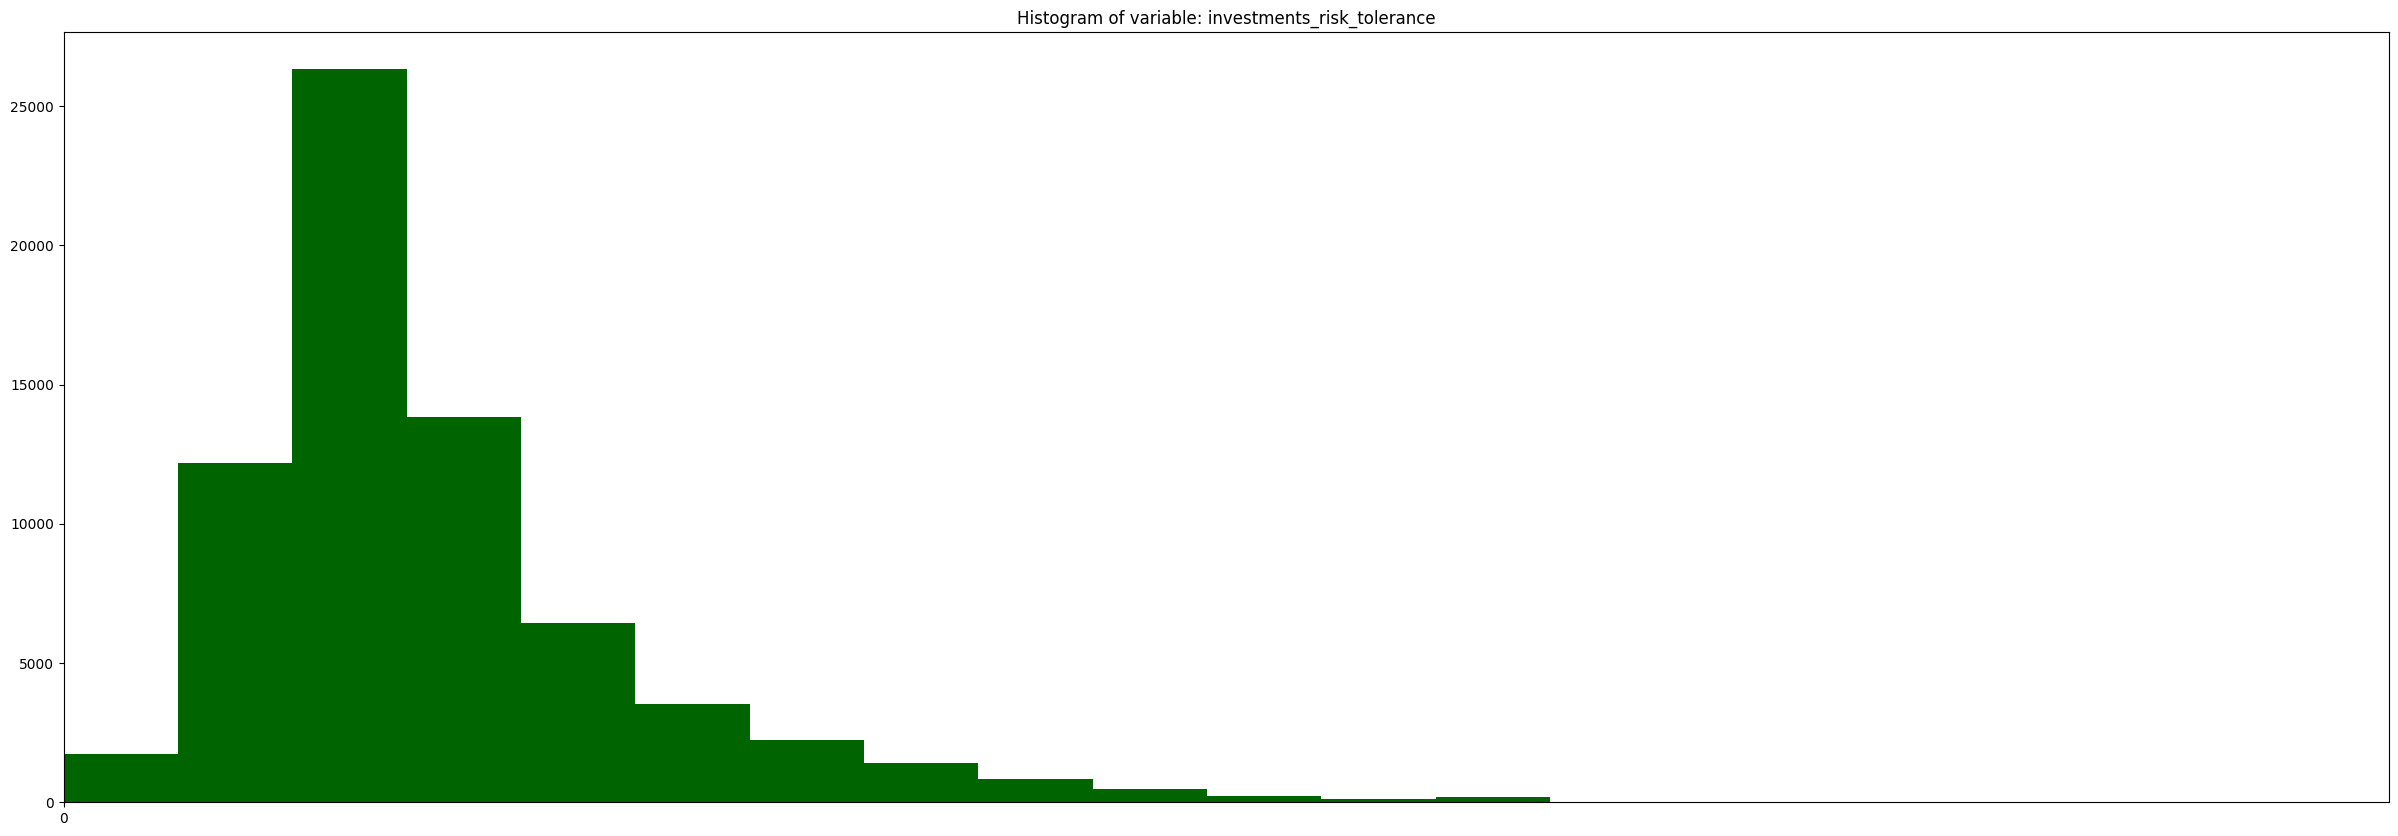

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["irt"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: investments_risk_tolerance")

# Set the x-axis limits according to your desired scale. We know by the statistical measure that the max value if 44
plt.xlim(0, 45)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 45, 50))

# Show the plot
plt.show()

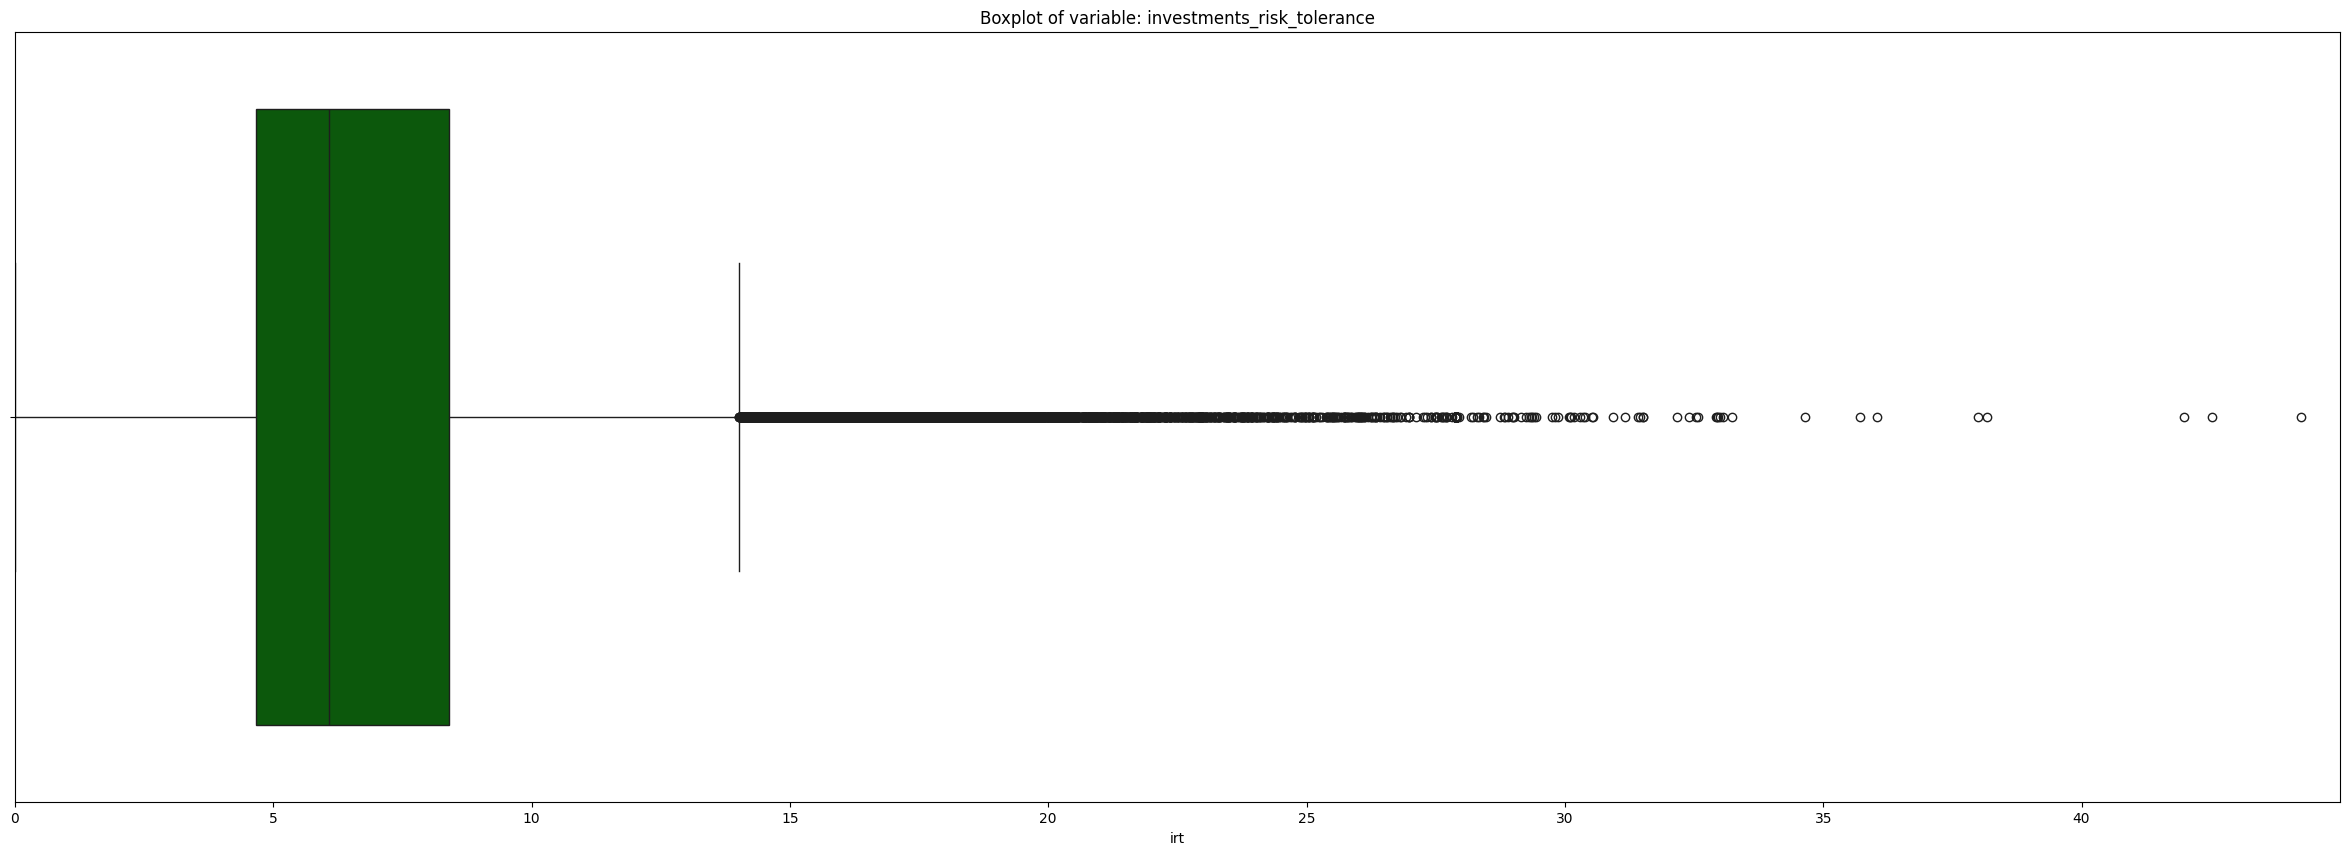

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["irt"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: investments_risk_tolerance")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 45)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 45, 5))

# Show the plot
plt.show()

In [ ]:
count_irt = df_outliers_train[df_outliers_train['irt'] > 14].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_irt}")

count_irt = df_outliers_train[df_outliers_train['irt'] > 30].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_irt}")

count_irt = df_outliers_train[df_outliers_train['irt'] > 34].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_irt}")

count_irt = df_outliers_train[df_outliers_train['irt'] > 40].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_irt}")

Count of 'last_year_avg_monthly_charity_donations' observations: 4701
Count of 'last_year_avg_monthly_charity_donations' observations: 33
Count of 'last_year_avg_monthly_charity_donations' observations: 8
Count of 'last_year_avg_monthly_charity_donations' observations: 3


In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = (df_outliers_train['irt'] > 34) & (df_outliers_train['irt'] < 40)

# Generate random values between 6 and 8.5
replacement_values = np.random.uniform(25, 30, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'irt'] = replacement_values

In [ ]:
#Replace extreme outliers
outliers_mask = df_outliers_train['irt'] > 40

# Generate random values between 30 and 35
replacement_values = np.random.uniform(30, 35, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'irt'] = replacement_values

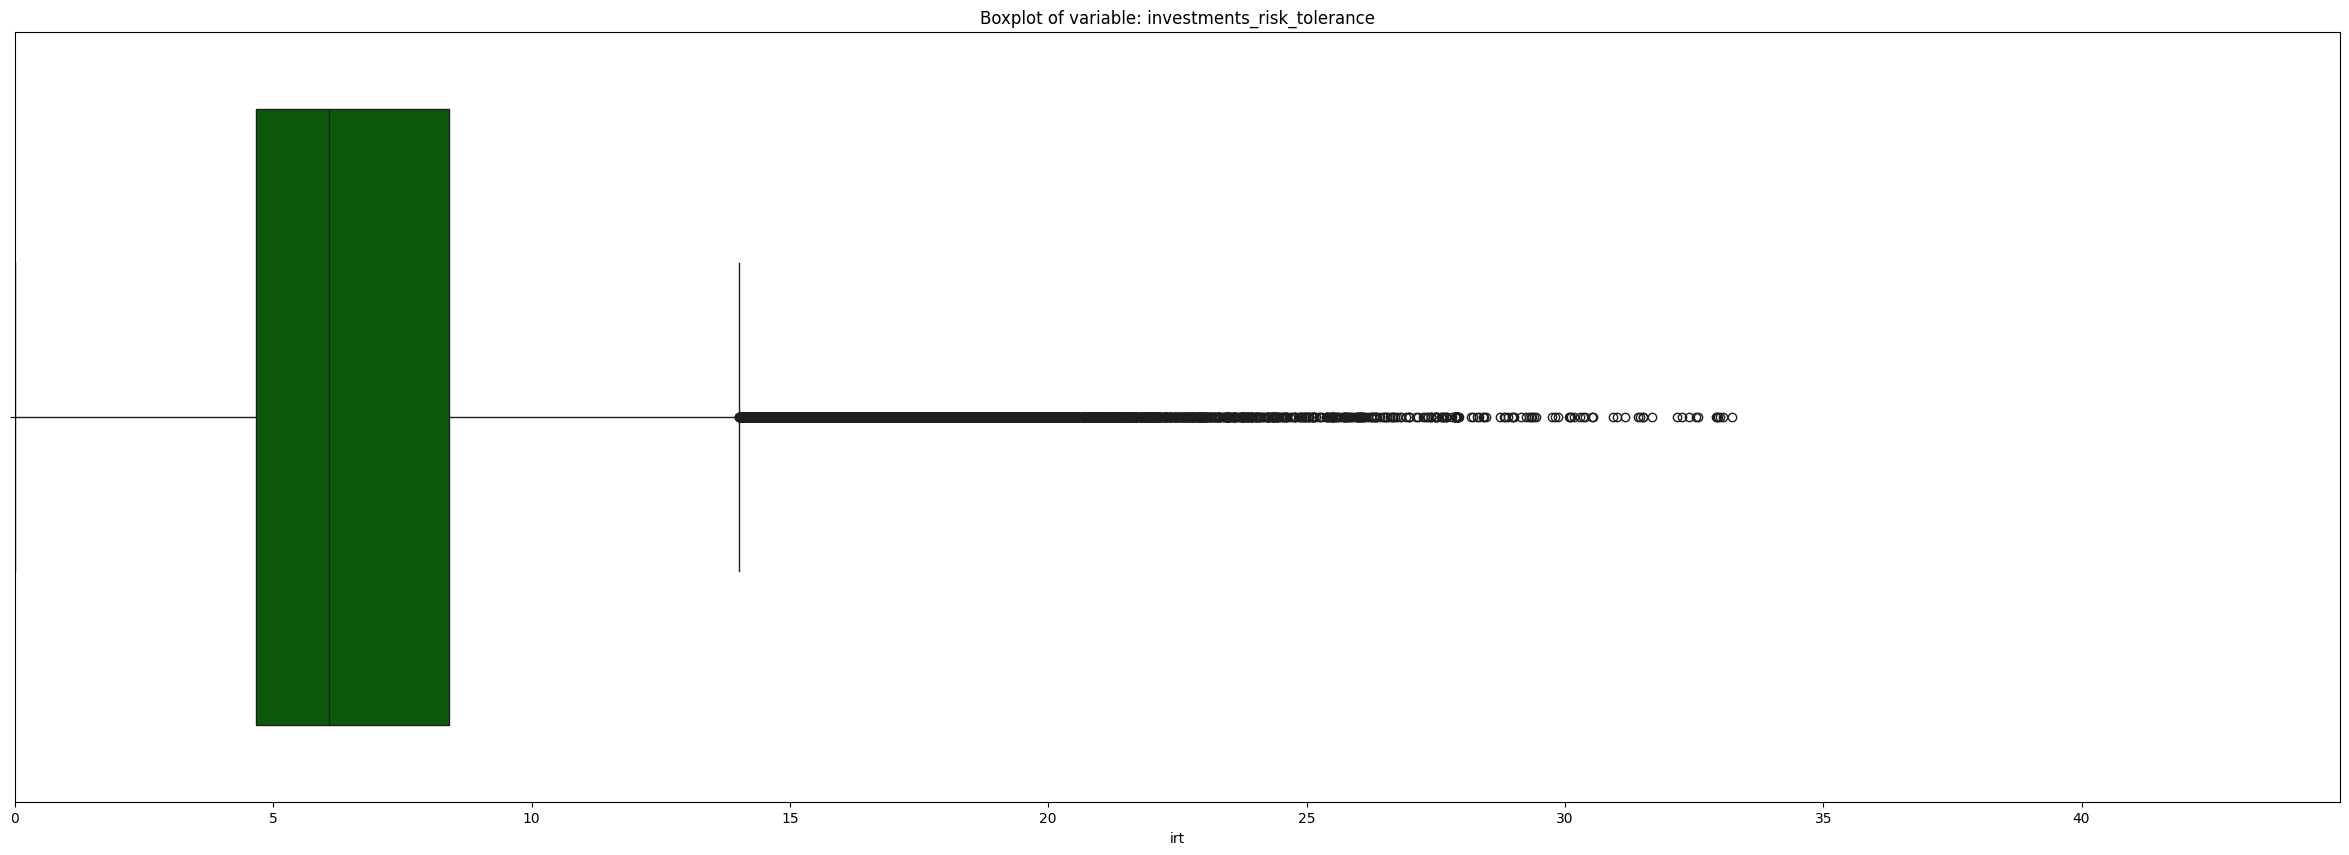

In [ ]:
#Check the irt boxplot again

# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["irt"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: investments_risk_tolerance")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 45)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 45, 5))

# Show the plot
plt.show()

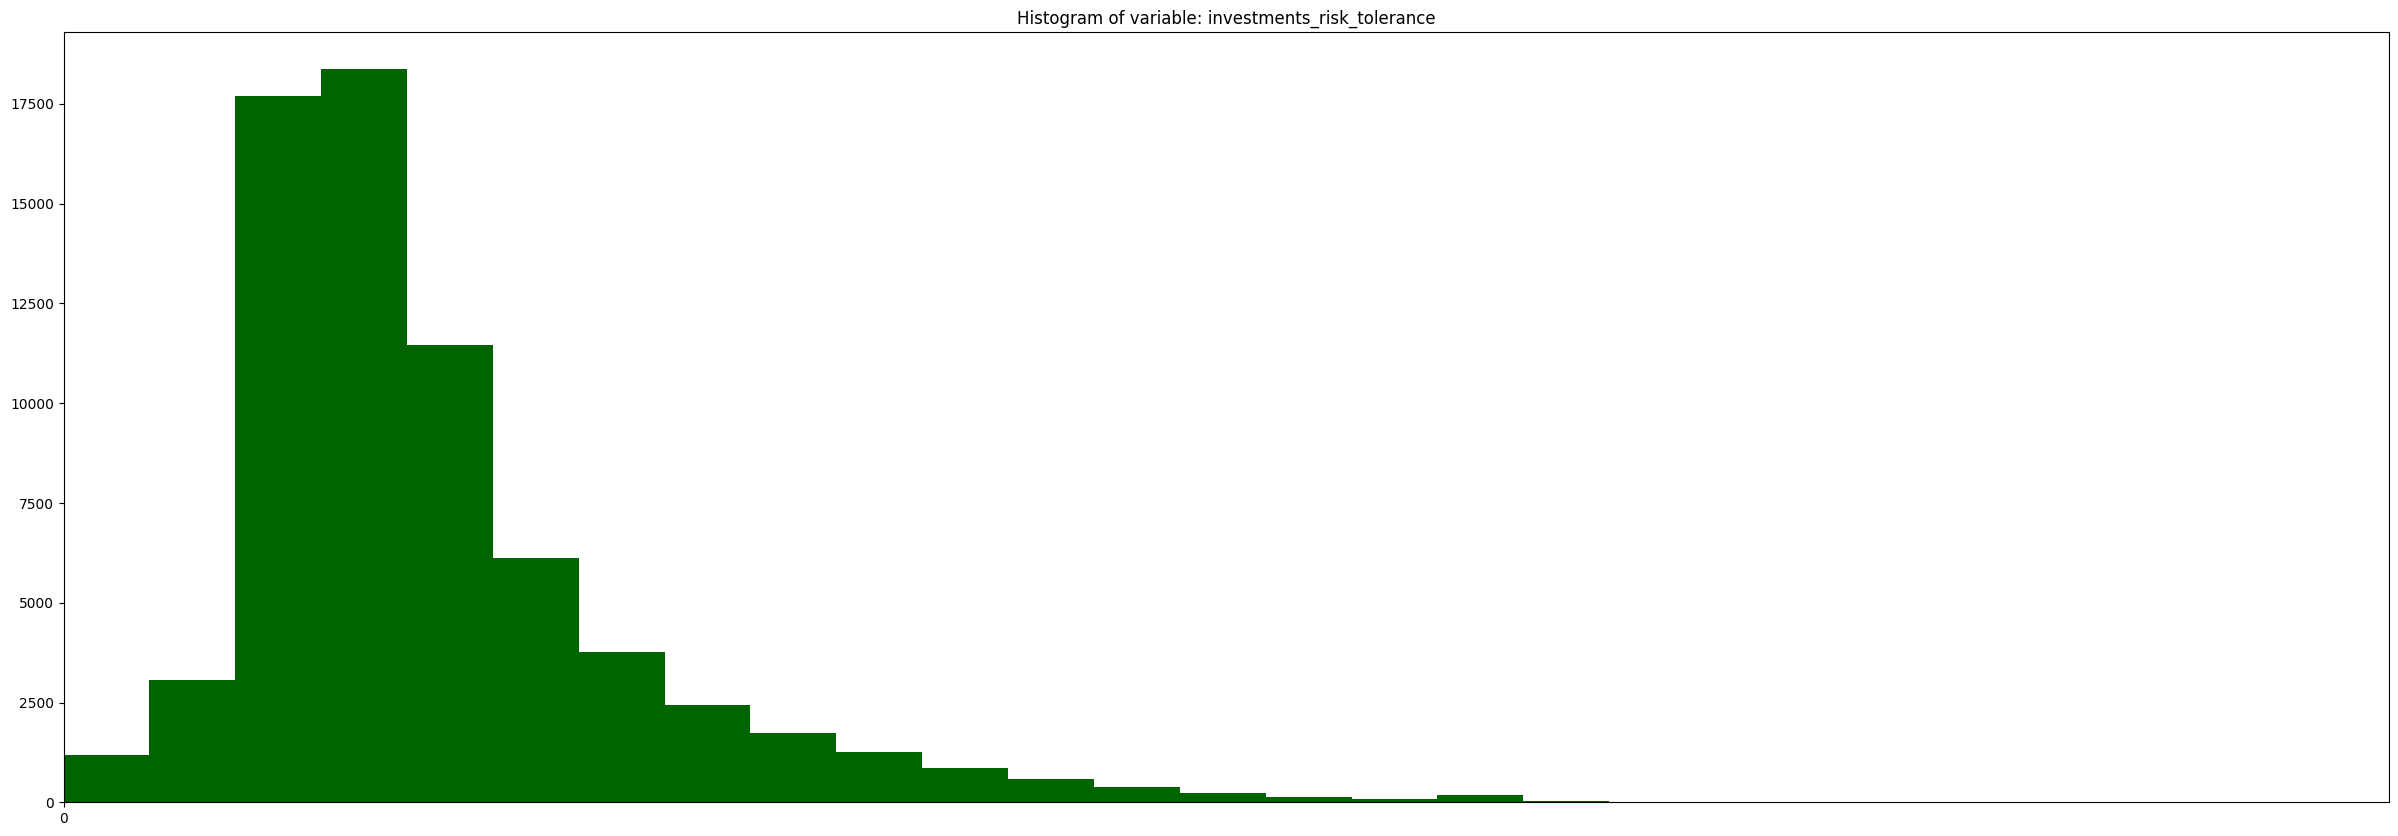

In [ ]:
#Check the histogram again
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["irt"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: investments_risk_tolerance")

# Set the x-axis limits according to your desired scale. We know by the statistical measure that the max value if 44
plt.xlim(0, 45)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 45, 50))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = (df_outliers_train['irt'] > 34) & (df_outliers_train['irt'] < 40)

# Generate random values between 6 and 8.5
replacement_values = np.random.uniform(25, 30, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'irt'] = replacement_values

In [ ]:
#Replace extreme outliers
outliers_mask = df_outliers_train['irt'] > 40

# Generate random values between 38 and 42
replacement_values = np.random.uniform(30, 35, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'irt'] = replacement_values

<font size="3" color='#7C8489'>tech_savviness_score</font>

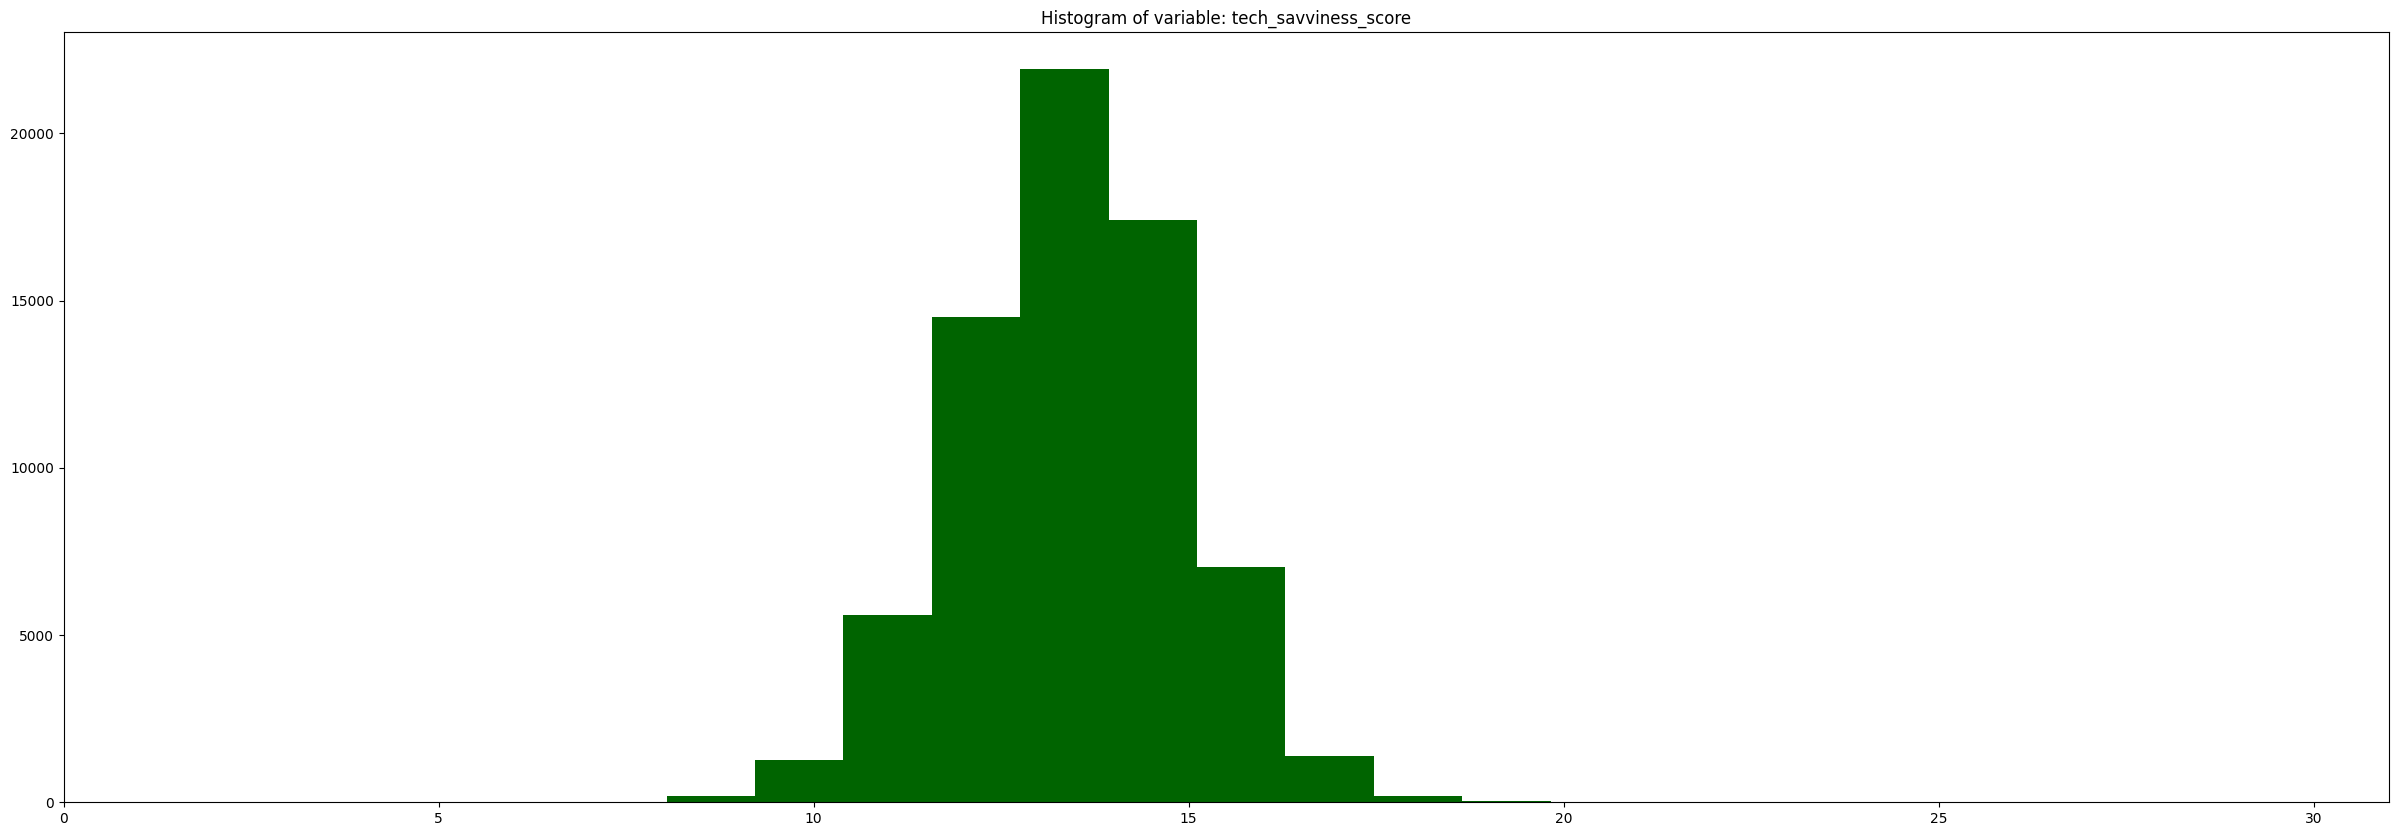

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["tss"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: tech_savviness_score")

# Set the x-axis limits according to your desired scale. We know by the statistical measure that the max value if 30
plt.xlim(0, 31)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 31, 5))

# Show the plot
plt.show()

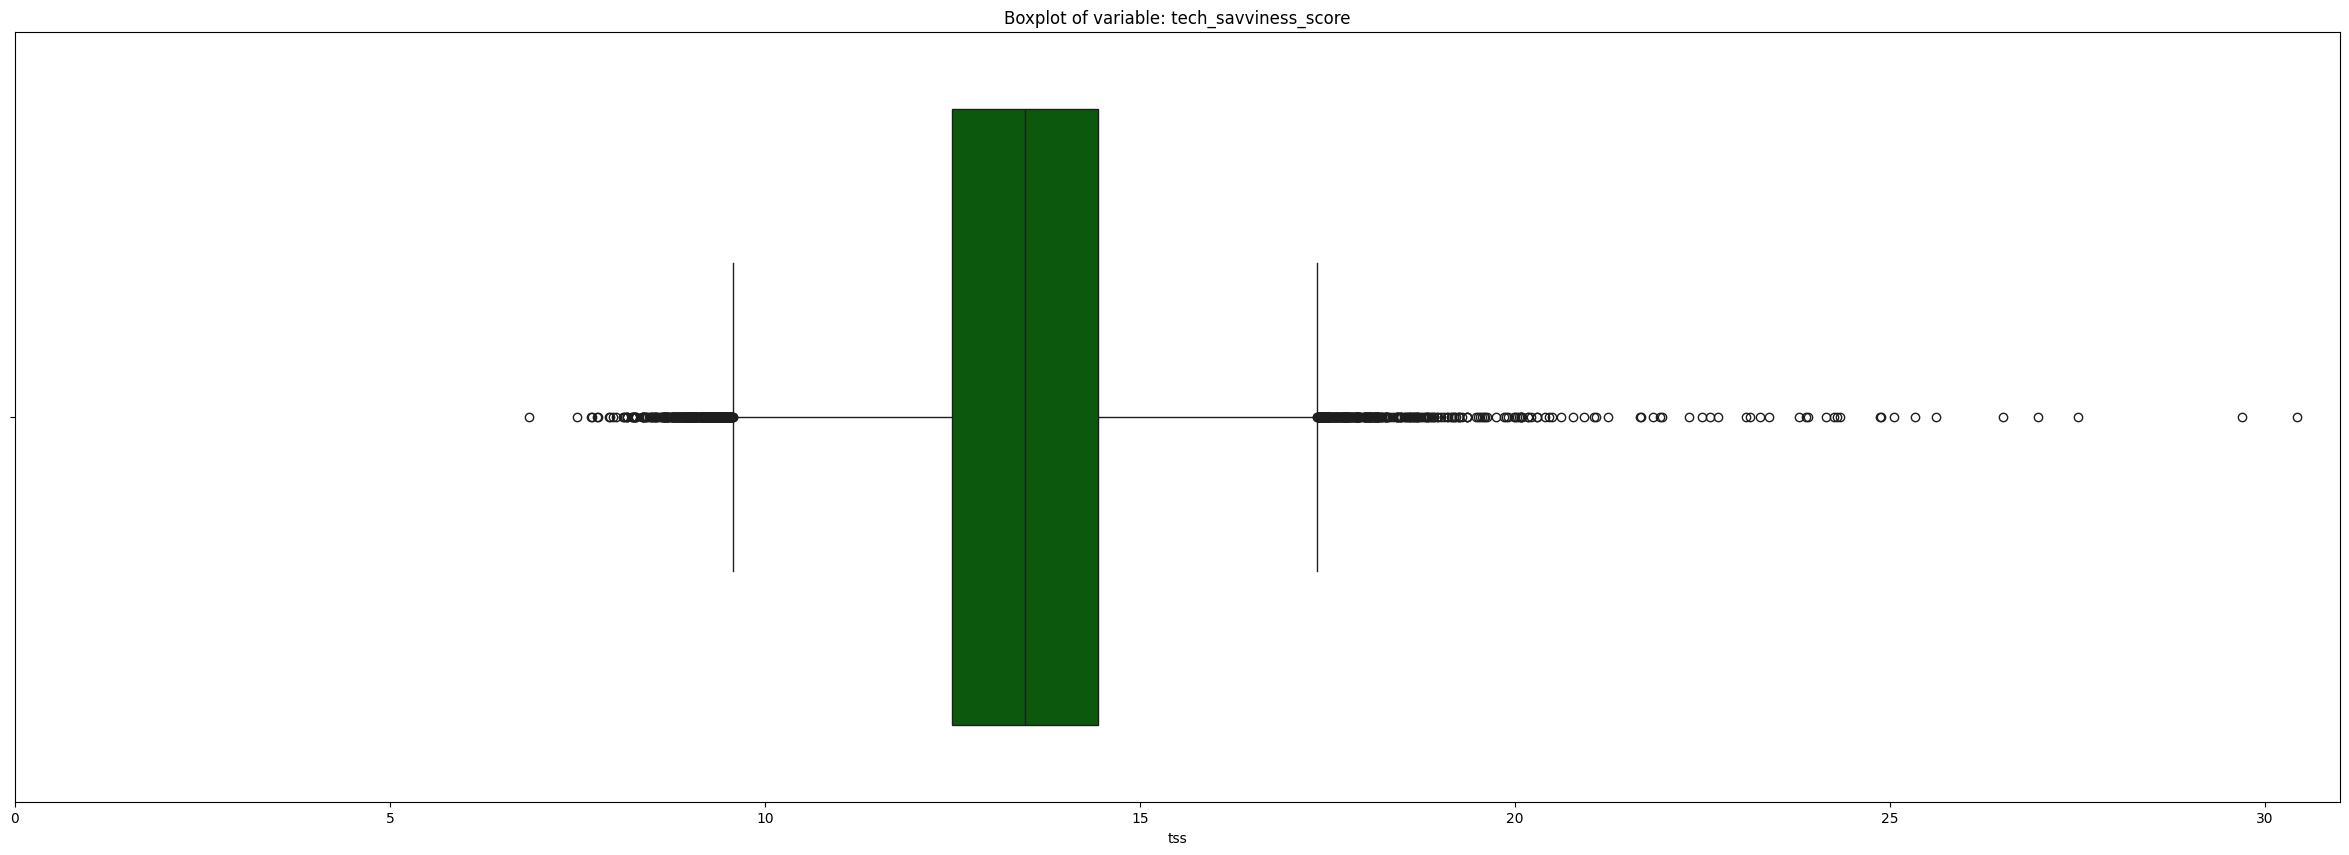

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["tss"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: tech_savviness_score")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 31)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 31, 5))

# Show the plot
plt.show()

In [ ]:
## Lower limit outliers
count_tss = df_outliers_train[df_outliers_train['tss'] < 10].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_tss}")

count_tss = df_outliers_train[df_outliers_train['tss'] < 9].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_tss}")

count_tss = df_outliers_train[df_outliers_train['tss'] < 8].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_tss}") # values < 8 must be readjusted

count_tss = df_outliers_train[df_outliers_train['tss'] < 7].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_tss}")

Count of 'last_year_avg_monthly_charity_donations' observations: 804
Count of 'last_year_avg_monthly_charity_donations' observations: 129
Count of 'last_year_avg_monthly_charity_donations' observations: 9
Count of 'last_year_avg_monthly_charity_donations' observations: 1


In [ ]:
## Upper limit outliers
count_tss = df_outliers_train[df_outliers_train['tss'] > 18].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_tss}")

count_tss = df_outliers_train[df_outliers_train['tss'] > 23].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_tss}")

count_tss = df_outliers_train[df_outliers_train['tss'] >= 25].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_tss}")

Count of 'last_year_avg_monthly_charity_donations' observations: 176
Count of 'last_year_avg_monthly_charity_donations' observations: 21
Count of 'last_year_avg_monthly_charity_donations' observations: 8


In [ ]:
## Transform the lower outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['tss'] < 8

# Generate random values between 8 and 10
replacement_values = np.random.uniform(8, 10, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'tss'] = replacement_values


## Transform the upper outliers in more appropriate values

### Identify outliers
outliers_mask = df_outliers_train['tss'] >26
##
### Generate random values between 20 and 25
replacement_values = np.random.uniform(20, 25, size=sum(outliers_mask))
##
### Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'tss'] = replacement_values

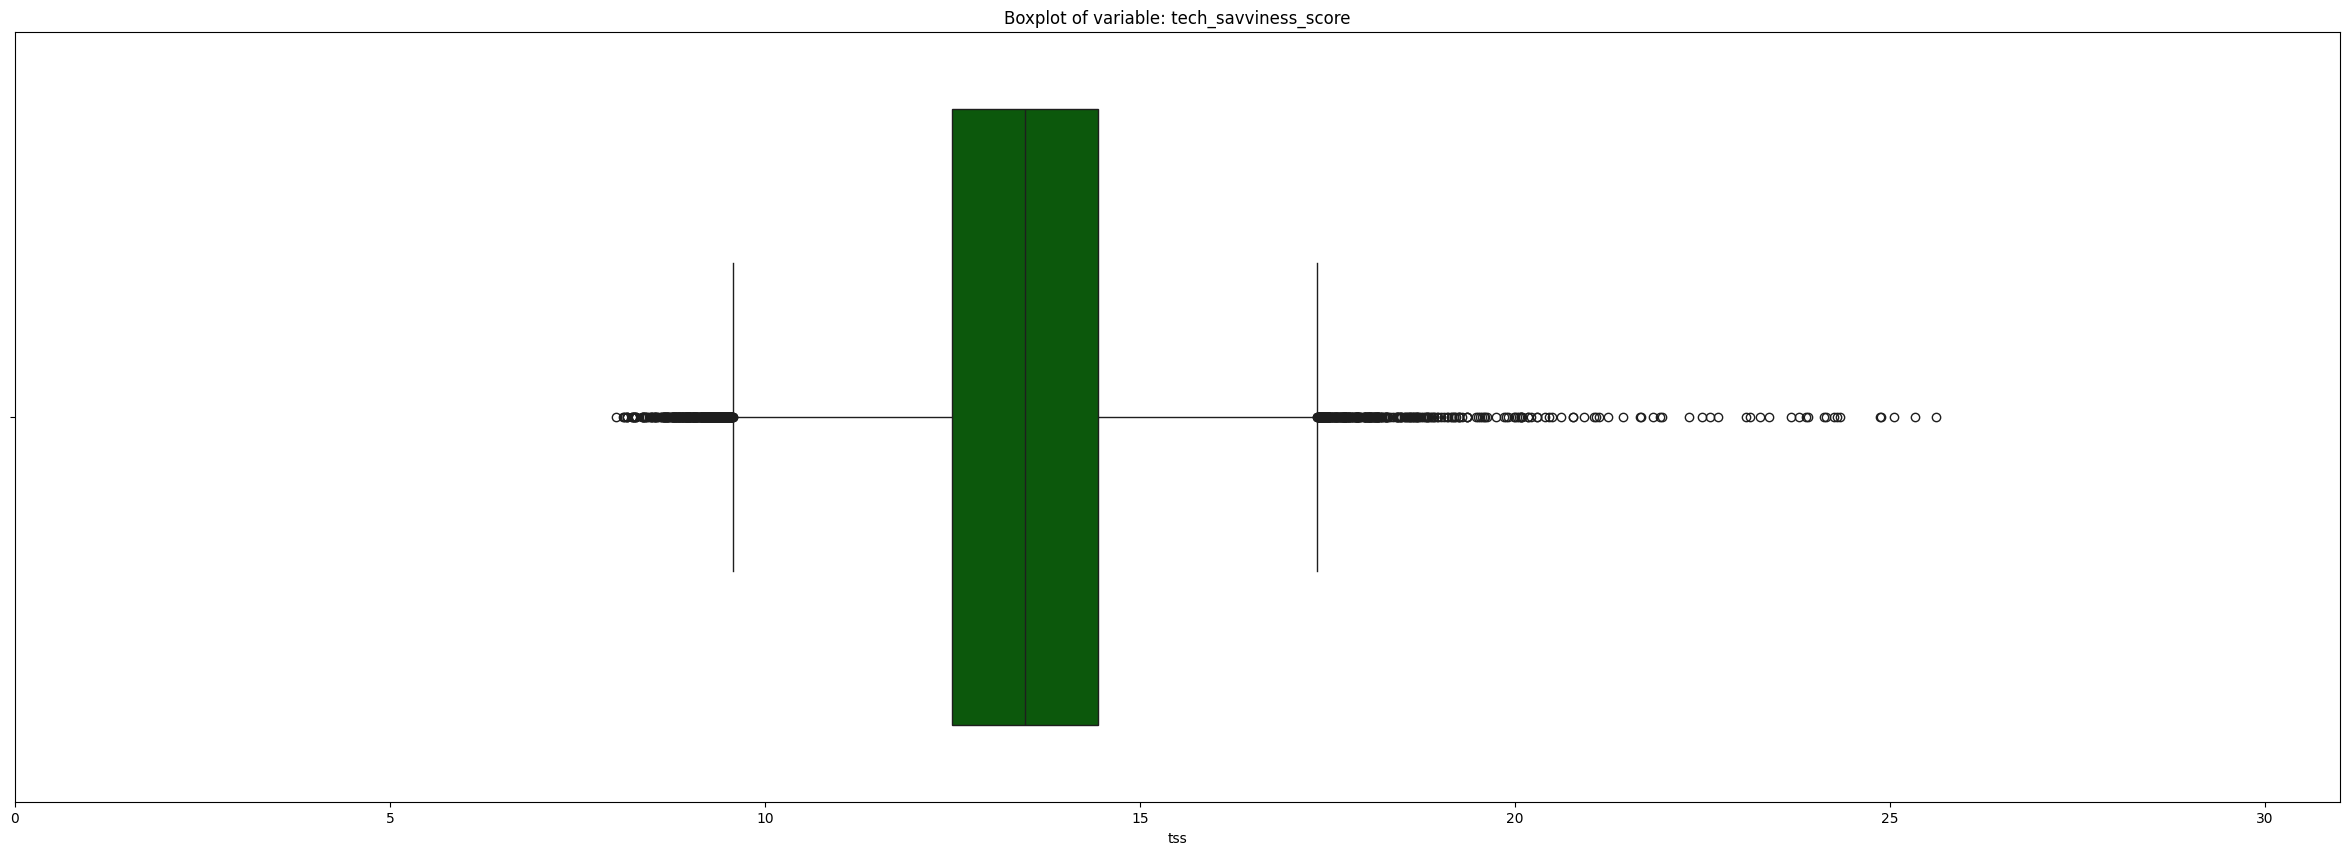

In [ ]:
#Check the tss boxplot again
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["tss"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: tech_savviness_score")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 31)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 31, 5))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
## Transform the lower outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['tss'] < 8

# Generate random values between 8 and 10
replacement_values = np.random.uniform(8, 10, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'tss'] = replacement_values


## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['tss'] >26

# Generate random values between 20 and 25
replacement_values = np.random.uniform(20, 25, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'tss'] = replacement_values

<font size="3" color='#7C8489'>social_media_influence_score</font>

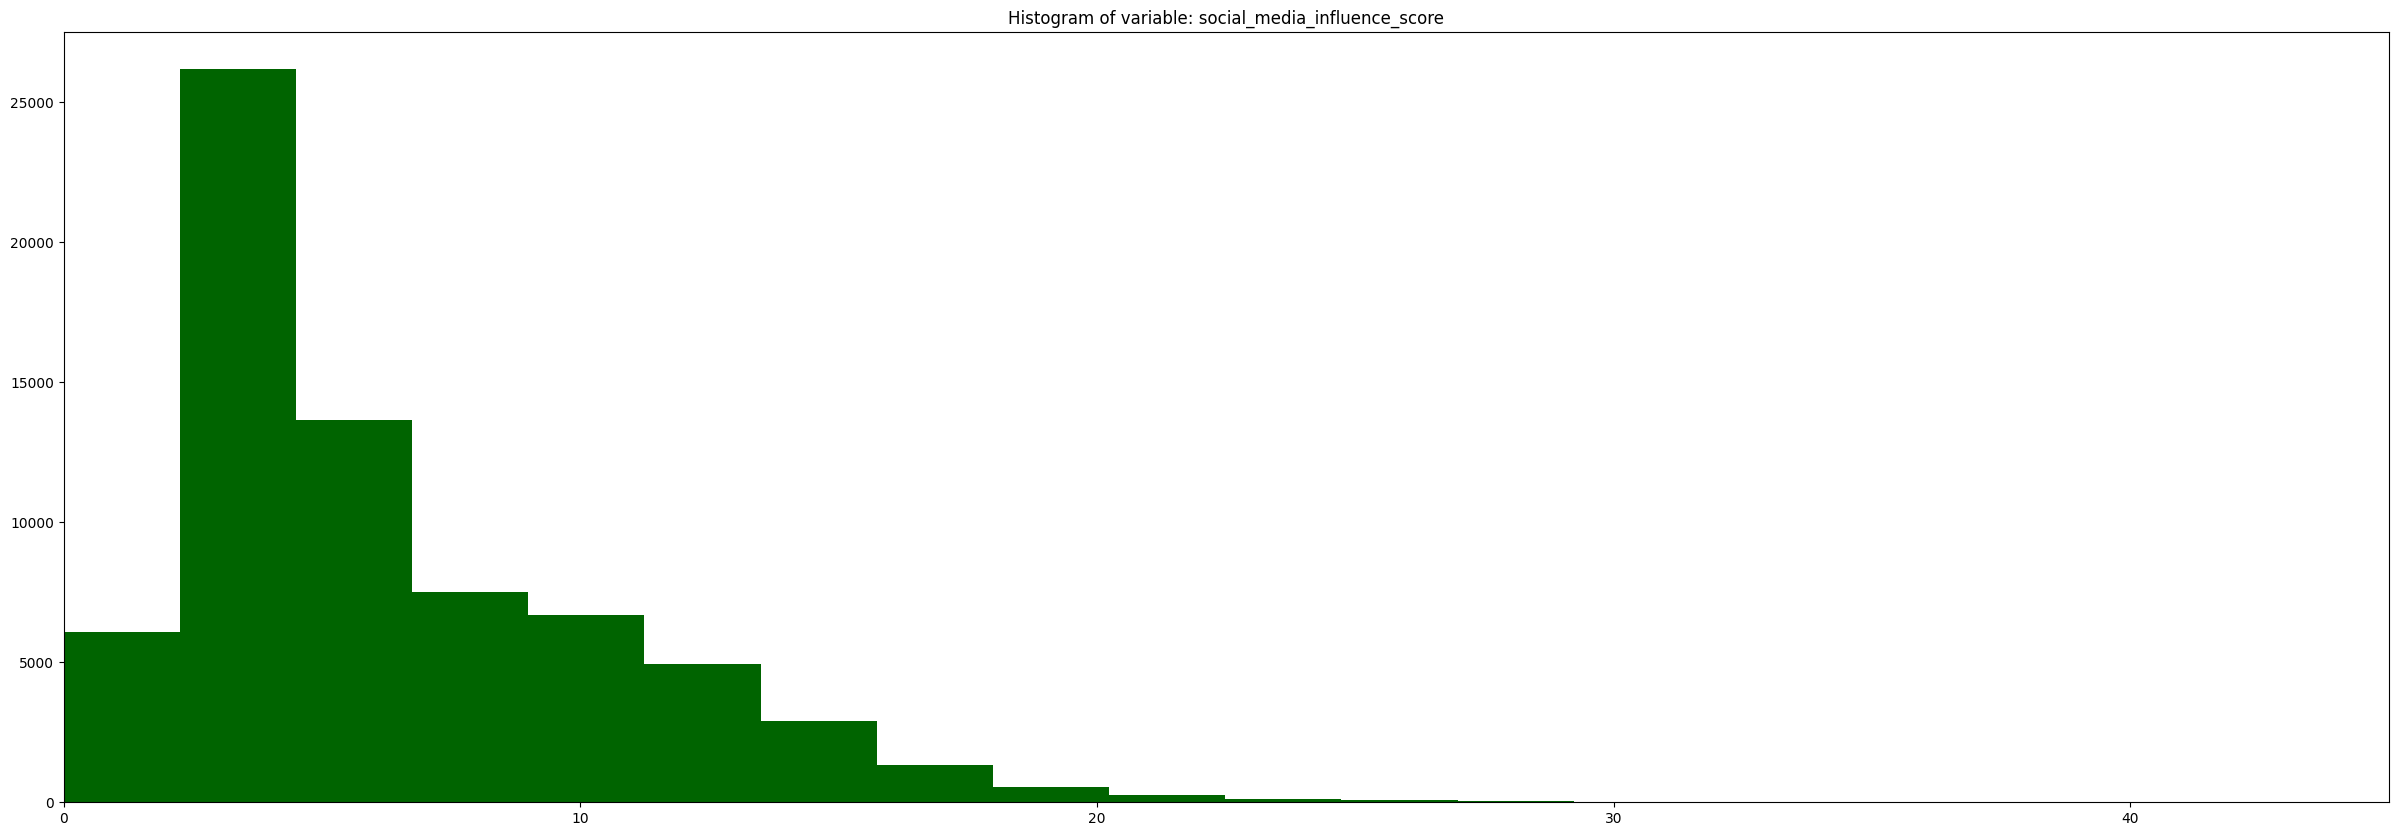

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["smis"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: social_media_influence_score")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 45)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 45, 10))

# Show the plot
plt.show()

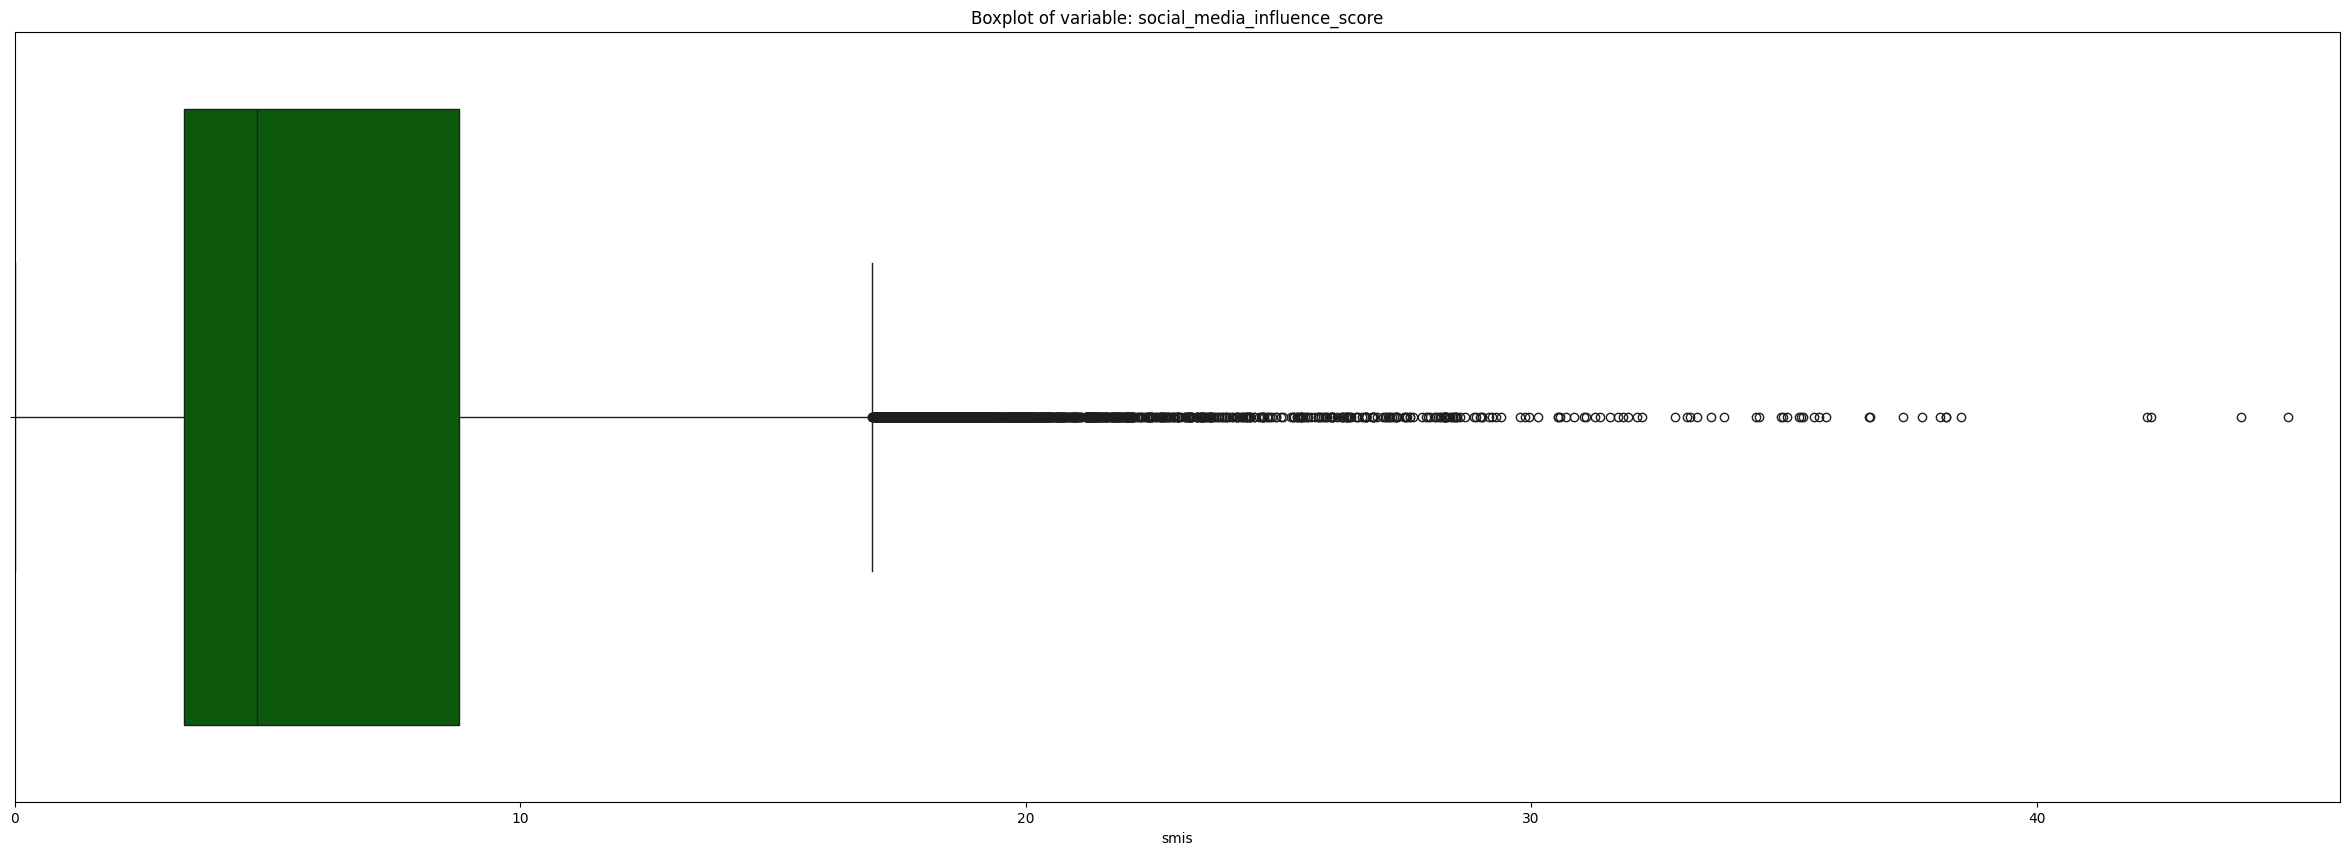

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["smis"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: social_media_influence_score")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 46)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 46, 10))

# Show the plot
plt.show()

In [ ]:
## Upper limit outliers

count_smis = df_outliers_train[df_outliers_train['smis'] > 17].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_smis}")

count_smis = df_outliers_train[df_outliers_train['smis'] > 33].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_smis}")

count_smis = df_outliers_train[df_outliers_train['smis'] > 37].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_smis}") # readjust values > 37

count_smis = df_outliers_train[df_outliers_train['smis'] > 40].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_smis}")

Count of 'last_year_avg_monthly_charity_donations' observations: 1488
Count of 'last_year_avg_monthly_charity_donations' observations: 28
Count of 'last_year_avg_monthly_charity_donations' observations: 10
Count of 'last_year_avg_monthly_charity_donations' observations: 4


In [ ]:
## Remove extreme value and ransform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['smis'] > 40

# Generate random values between 30 and 37
replacement_values = np.random.uniform(30, 40, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'smis'] = replacement_values

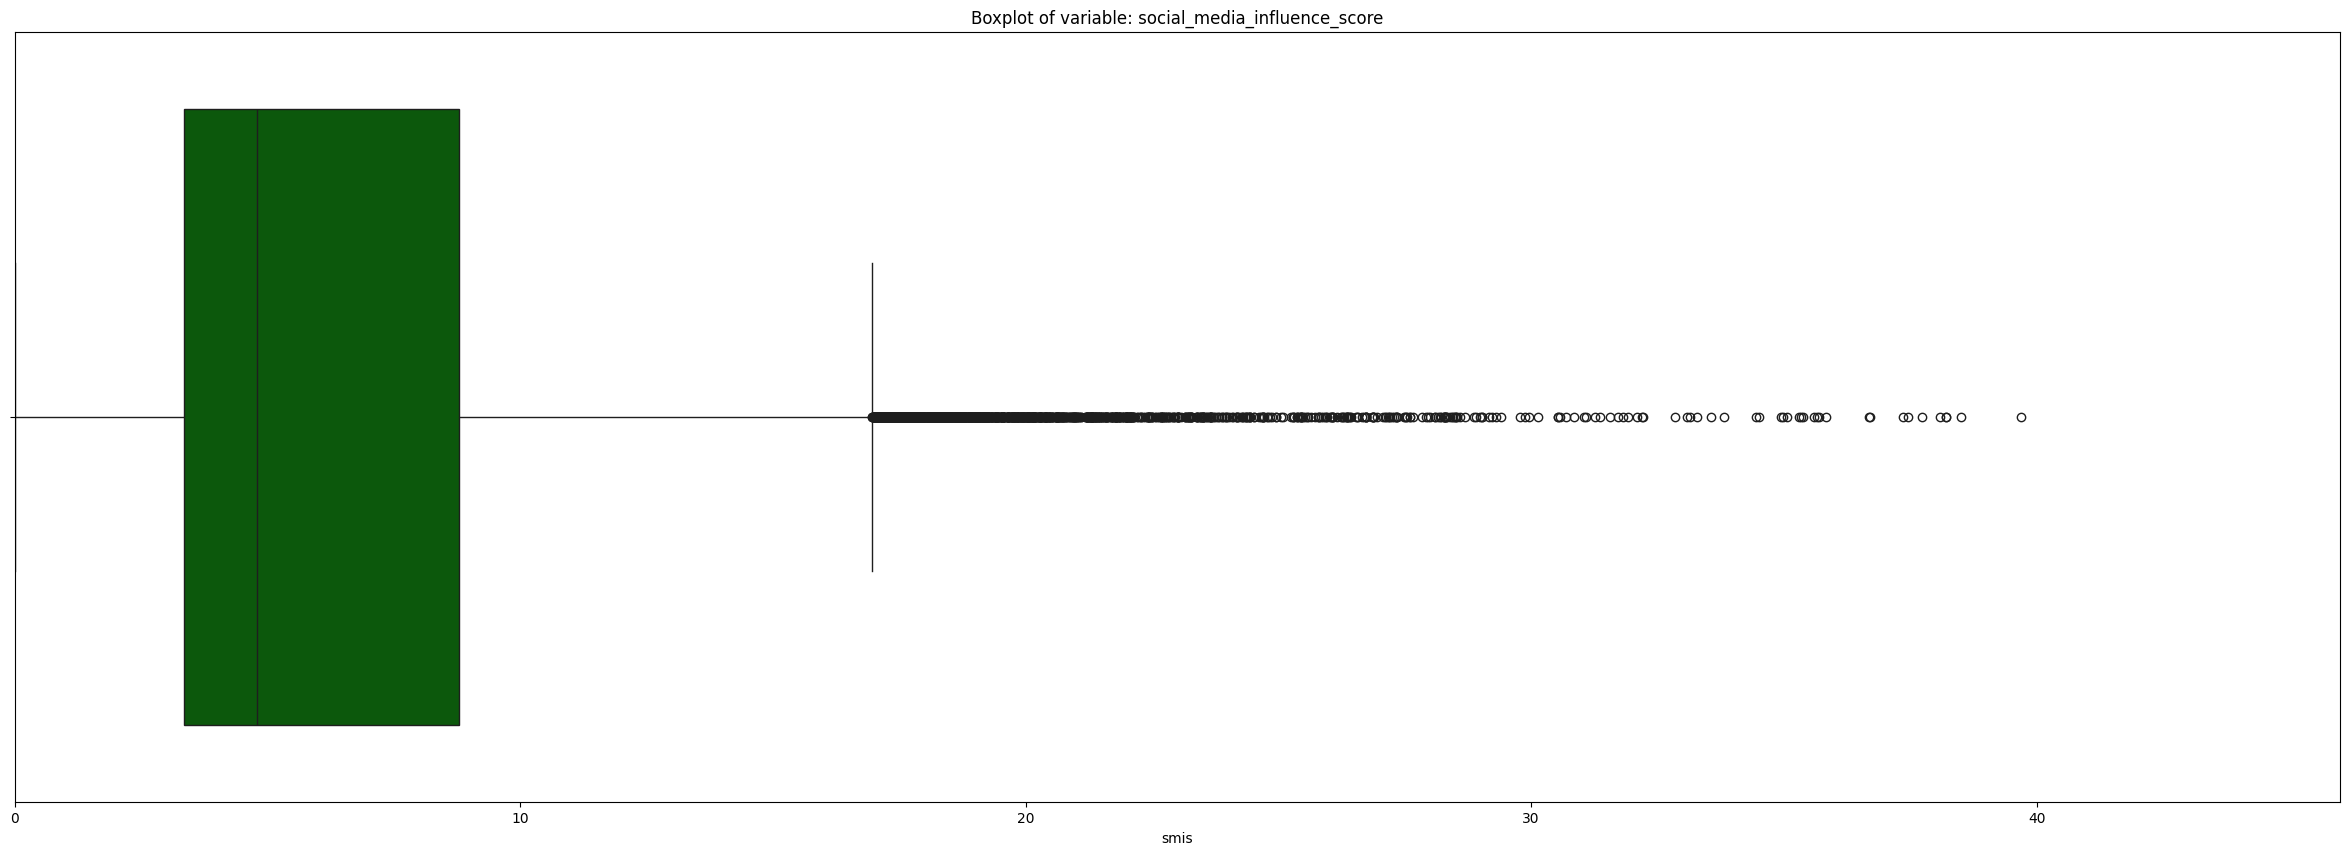

In [ ]:
#Check the irt boxplot again
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["smis"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: social_media_influence_score")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 46)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 46, 10))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
## Remove extreme value and ransform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['smis'] > 40

# Generate random values between 30 and 37
replacement_values = np.random.uniform(30, 40, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'smis'] = replacement_values

<font size="3" color='#7C8489'>entertainment_engagement_factor</font>

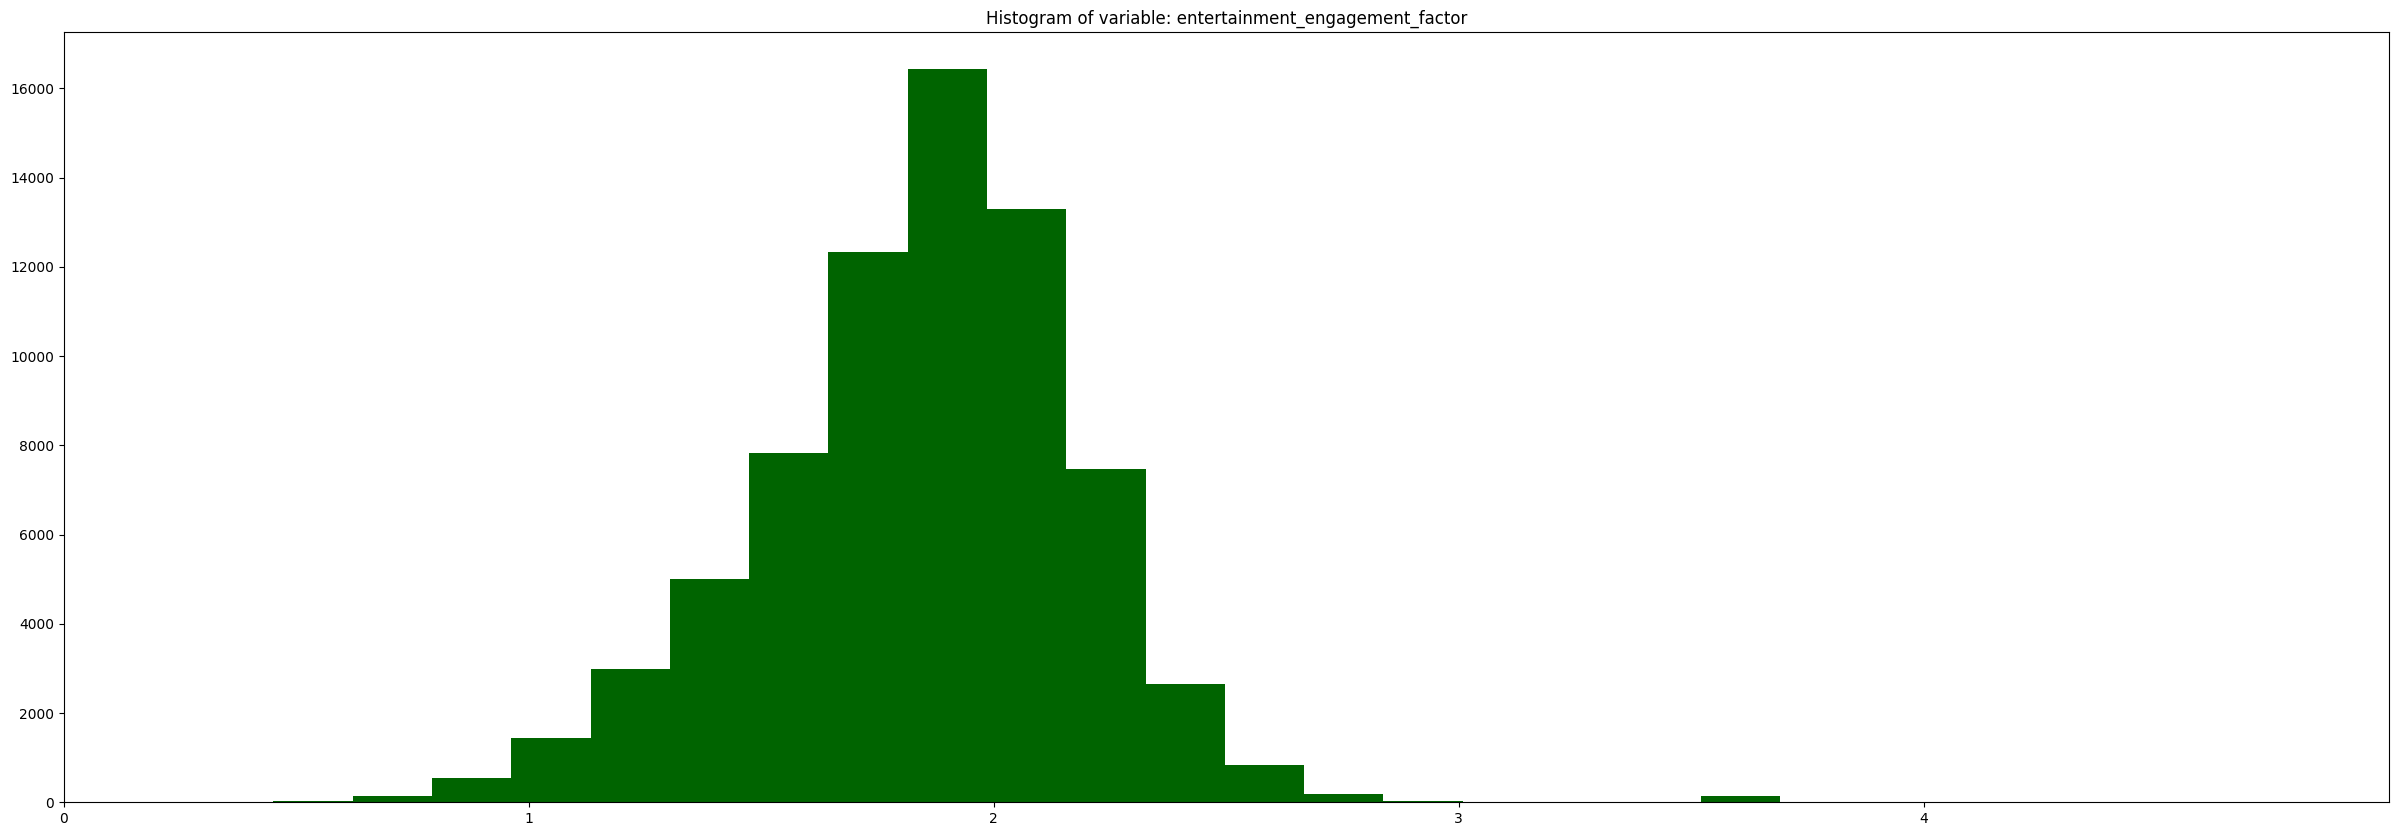

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["eef"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: entertainment_engagement_factor")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 5)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 5, 1))

# Show the plot
plt.show()

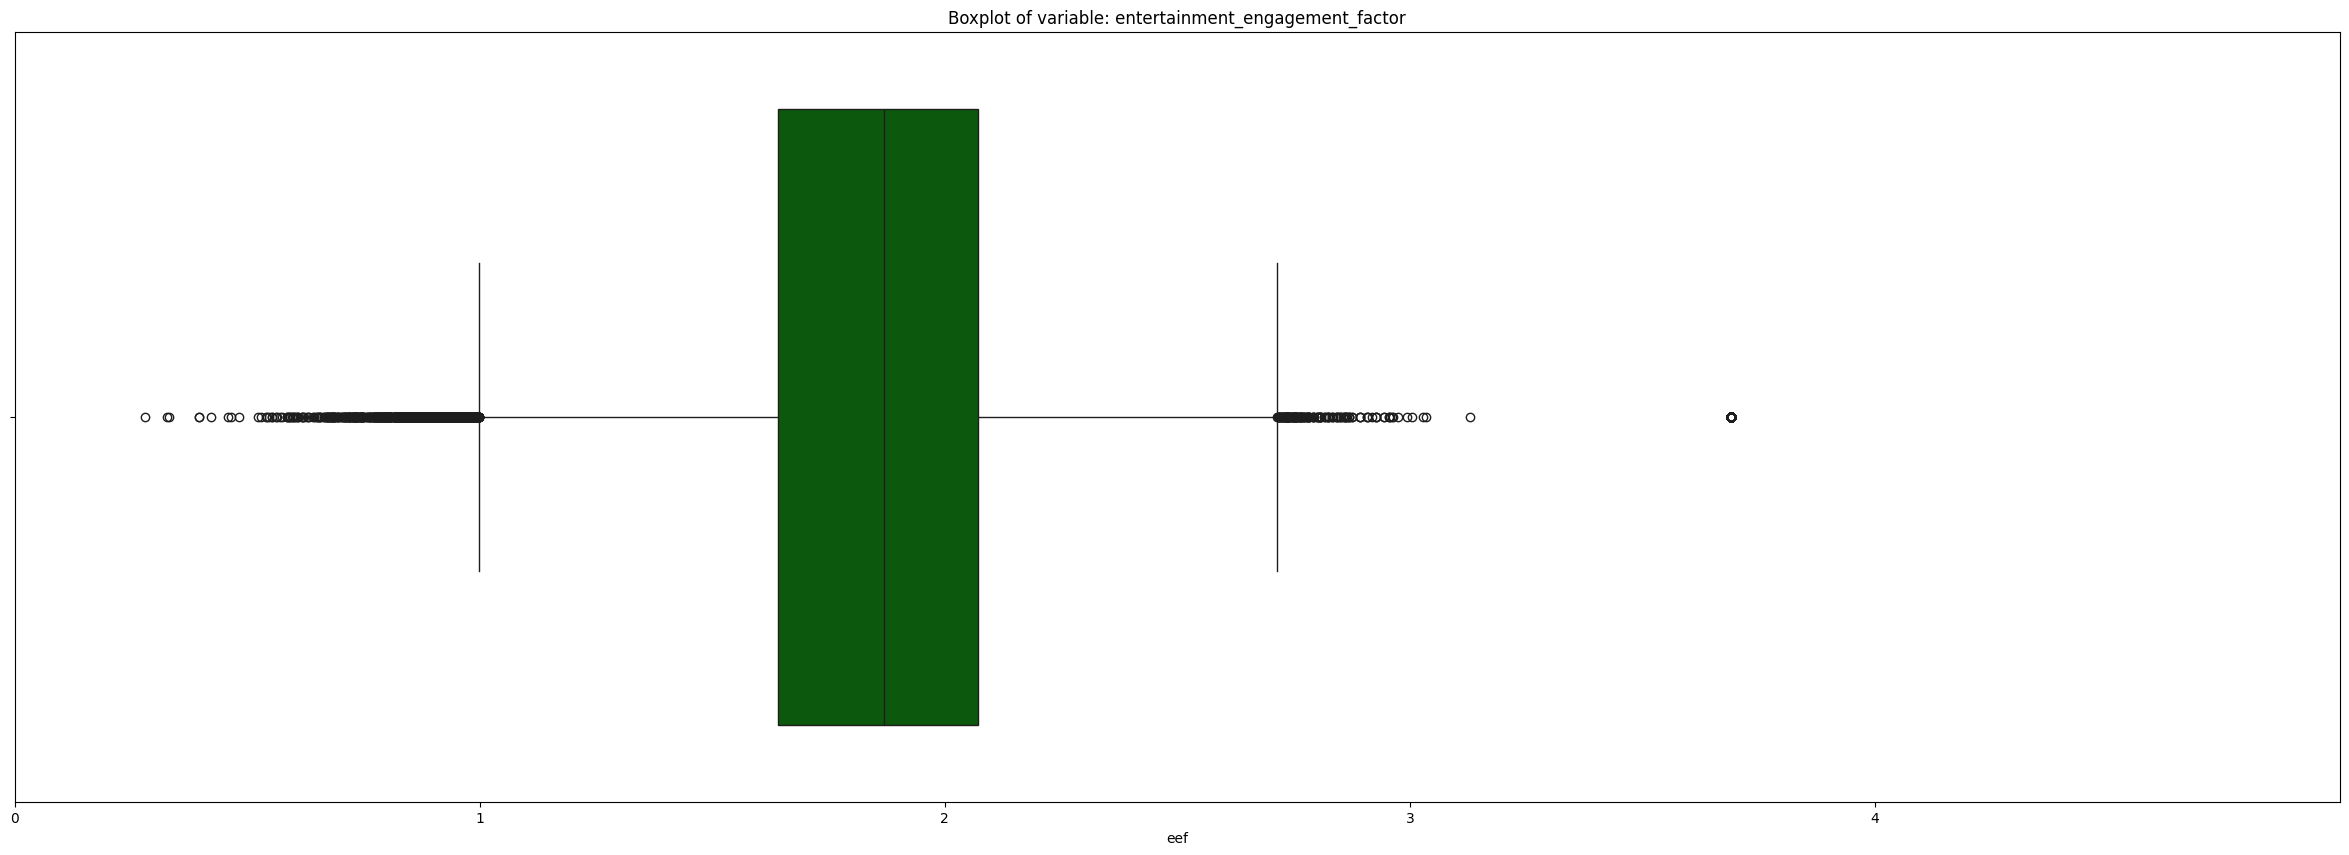

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["eef"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: entertainment_engagement_factor")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 5)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 5, 1))

# Show the plot
plt.show()

In [ ]:
## Lower limit outliers
count_eef = df_outliers_train[df_outliers_train['eef'] < 1].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_eef}")

count_eef = df_outliers_train[df_outliers_train['eef'] < 0.7].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_eef}")

count_eef = df_outliers_train[df_outliers_train['eef'] < 0.5].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_eef}") # values < 0.5 must be readjusted

count_eef = df_outliers_train[df_outliers_train['eef'] < 0.4].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_eef}")

count_eef = df_outliers_train[df_outliers_train['eef'] < 0.3].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_eef}") # drop

Count of 'last_year_avg_monthly_charity_donations' observations: 936
Count of 'last_year_avg_monthly_charity_donations' observations: 80
Count of 'last_year_avg_monthly_charity_donations' observations: 9
Count of 'last_year_avg_monthly_charity_donations' observations: 5
Count of 'last_year_avg_monthly_charity_donations' observations: 1


In [ ]:
## Upper limit outliers
count_eef = df_outliers_train[df_outliers_train['eef'] > 2.8].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_eef}")

count_eef = df_outliers_train[df_outliers_train['eef'] > 3.5].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_eef}") # do not drop because there is a high frequency of values despite far from neighbors

Count of 'last_year_avg_monthly_charity_donations' observations: 211
Count of 'last_year_avg_monthly_charity_donations' observations: 149


In [ ]:
#Lower

## Remove extreme value and ransform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['eef'] < 0.5

# Generate random values between 0.5 and 1
replacement_values = np.random.uniform(0.5, 1, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'eef'] = replacement_values


#upper

## Transform the lower outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['eef'] > 3.5

# Generate random values between 3 and 3.5
replacement_values = np.random.uniform(3, 3.5, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'eef'] = replacement_values

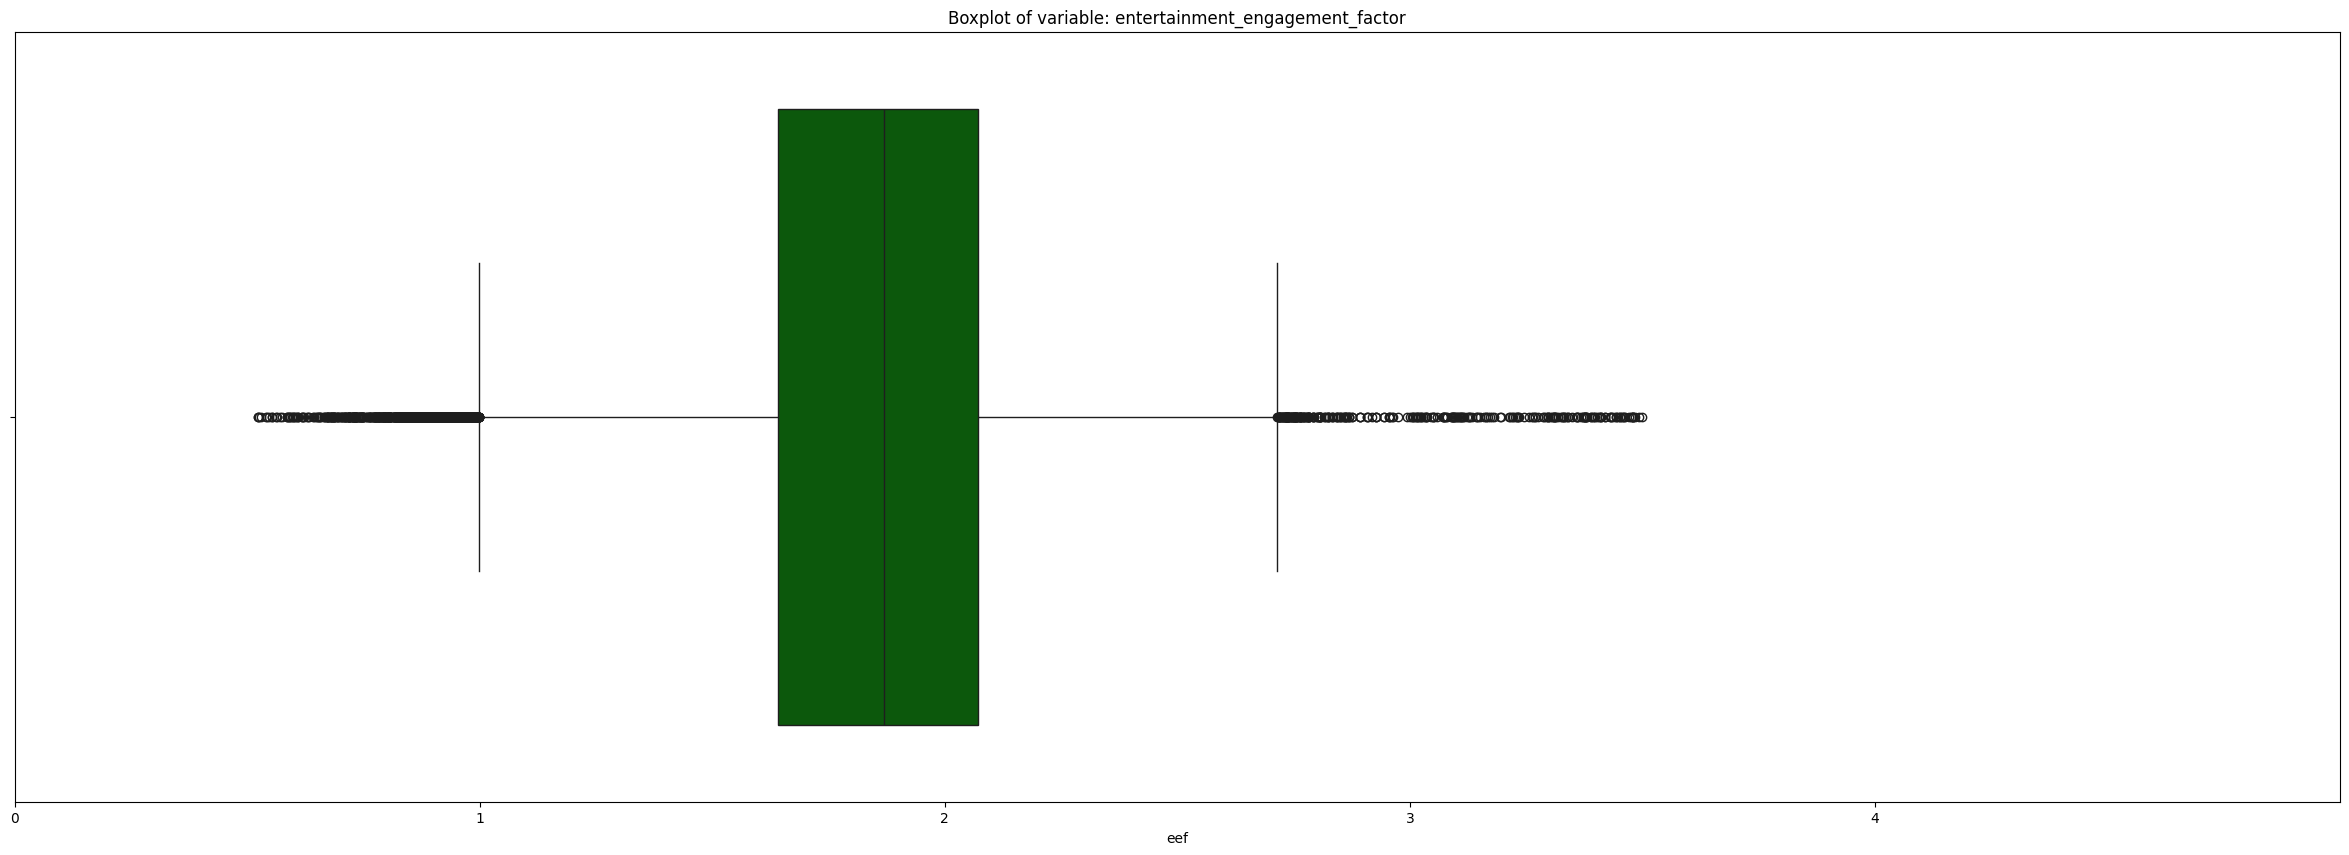

In [ ]:
#Check the irt boxplot again

# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["eef"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: entertainment_engagement_factor")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 5)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 5, 1))

# Show the plot
plt.show()

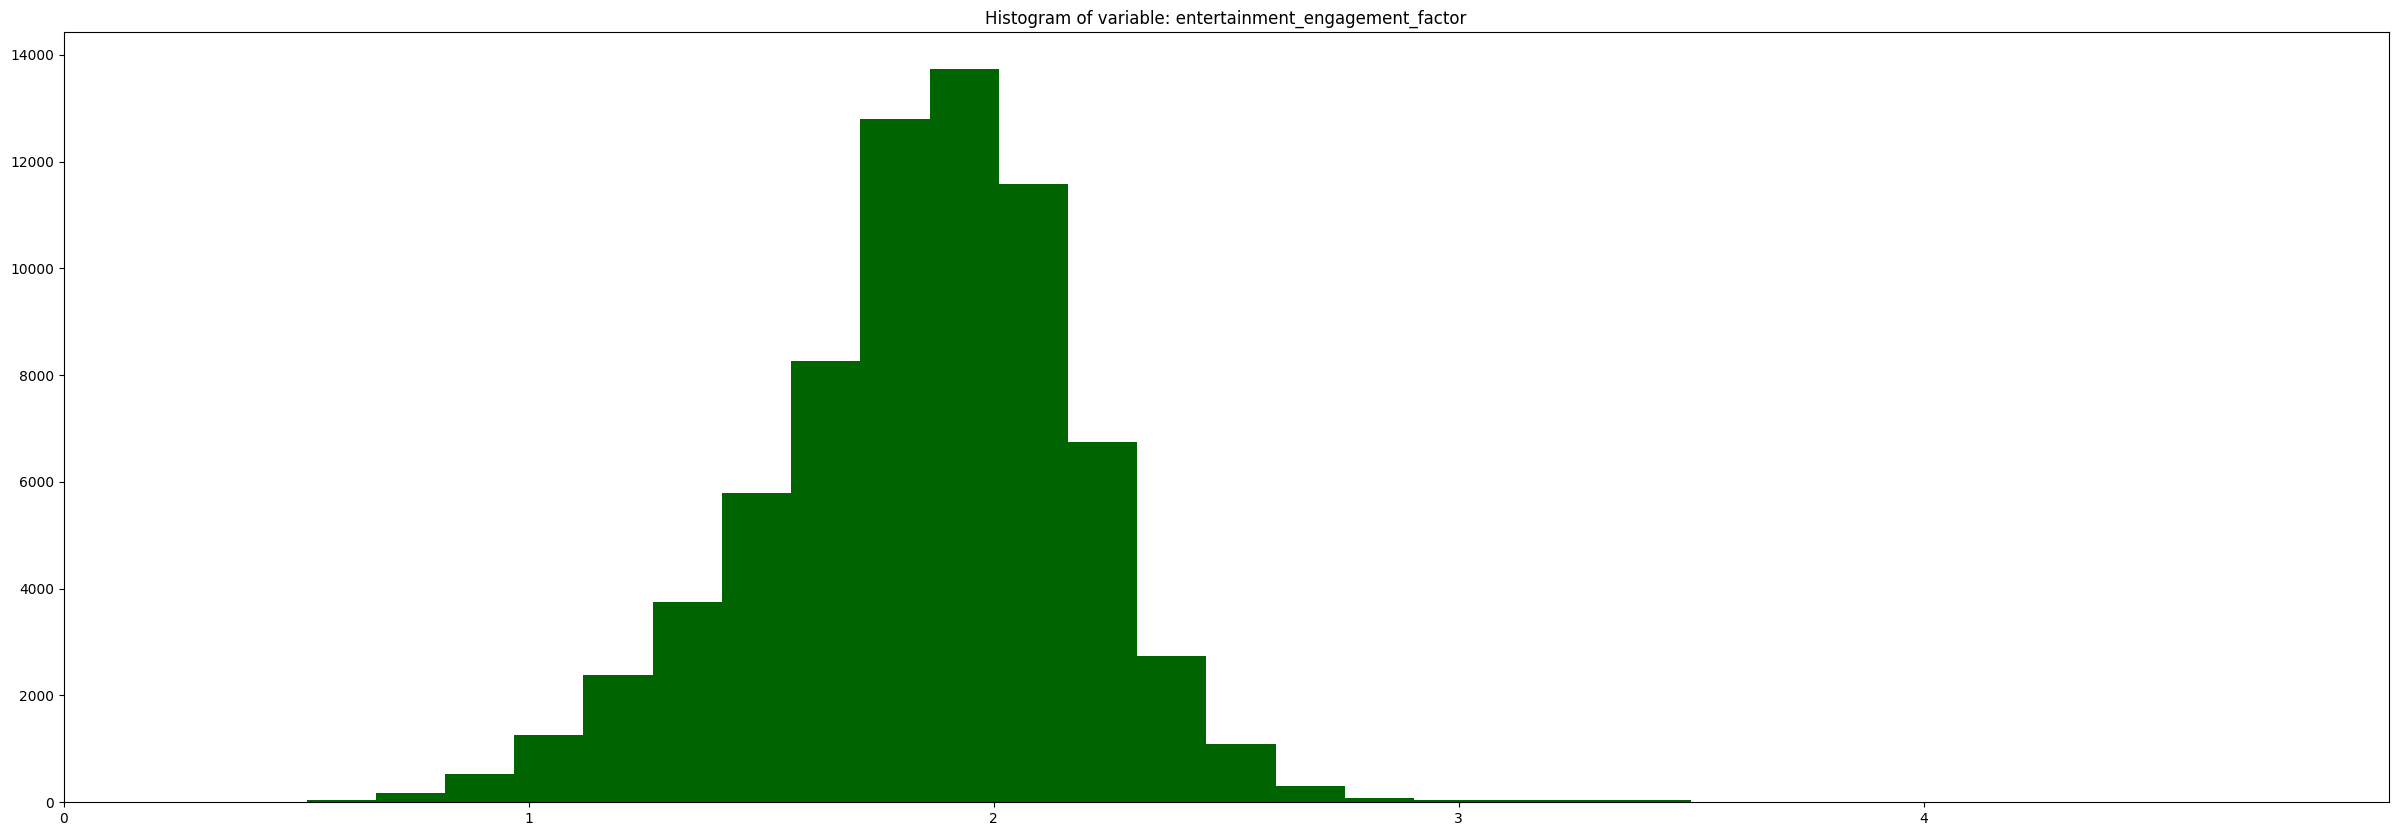

In [ ]:
#Check the histogram again
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["eef"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: entertainment_engagement_factor")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 5)

# Set x-axis ticks in increments of 1
plt.xticks(range(0, 5, 1))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
#Lower

## Remove extreme value and ransform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['eef'] < 0.5

# Generate random values between 0.5 and 1
replacement_values = np.random.uniform(0.5, 1, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'eef'] = replacement_values


#upper

## Transform the lower outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['eef'] > 3.5

# Generate random values between 3 and 3.5
replacement_values = np.random.uniform(3, 3.5, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'eef'] = replacement_values

<font size="3" color='#7C8489'>avg_monthly_entertainment_expenses</font>

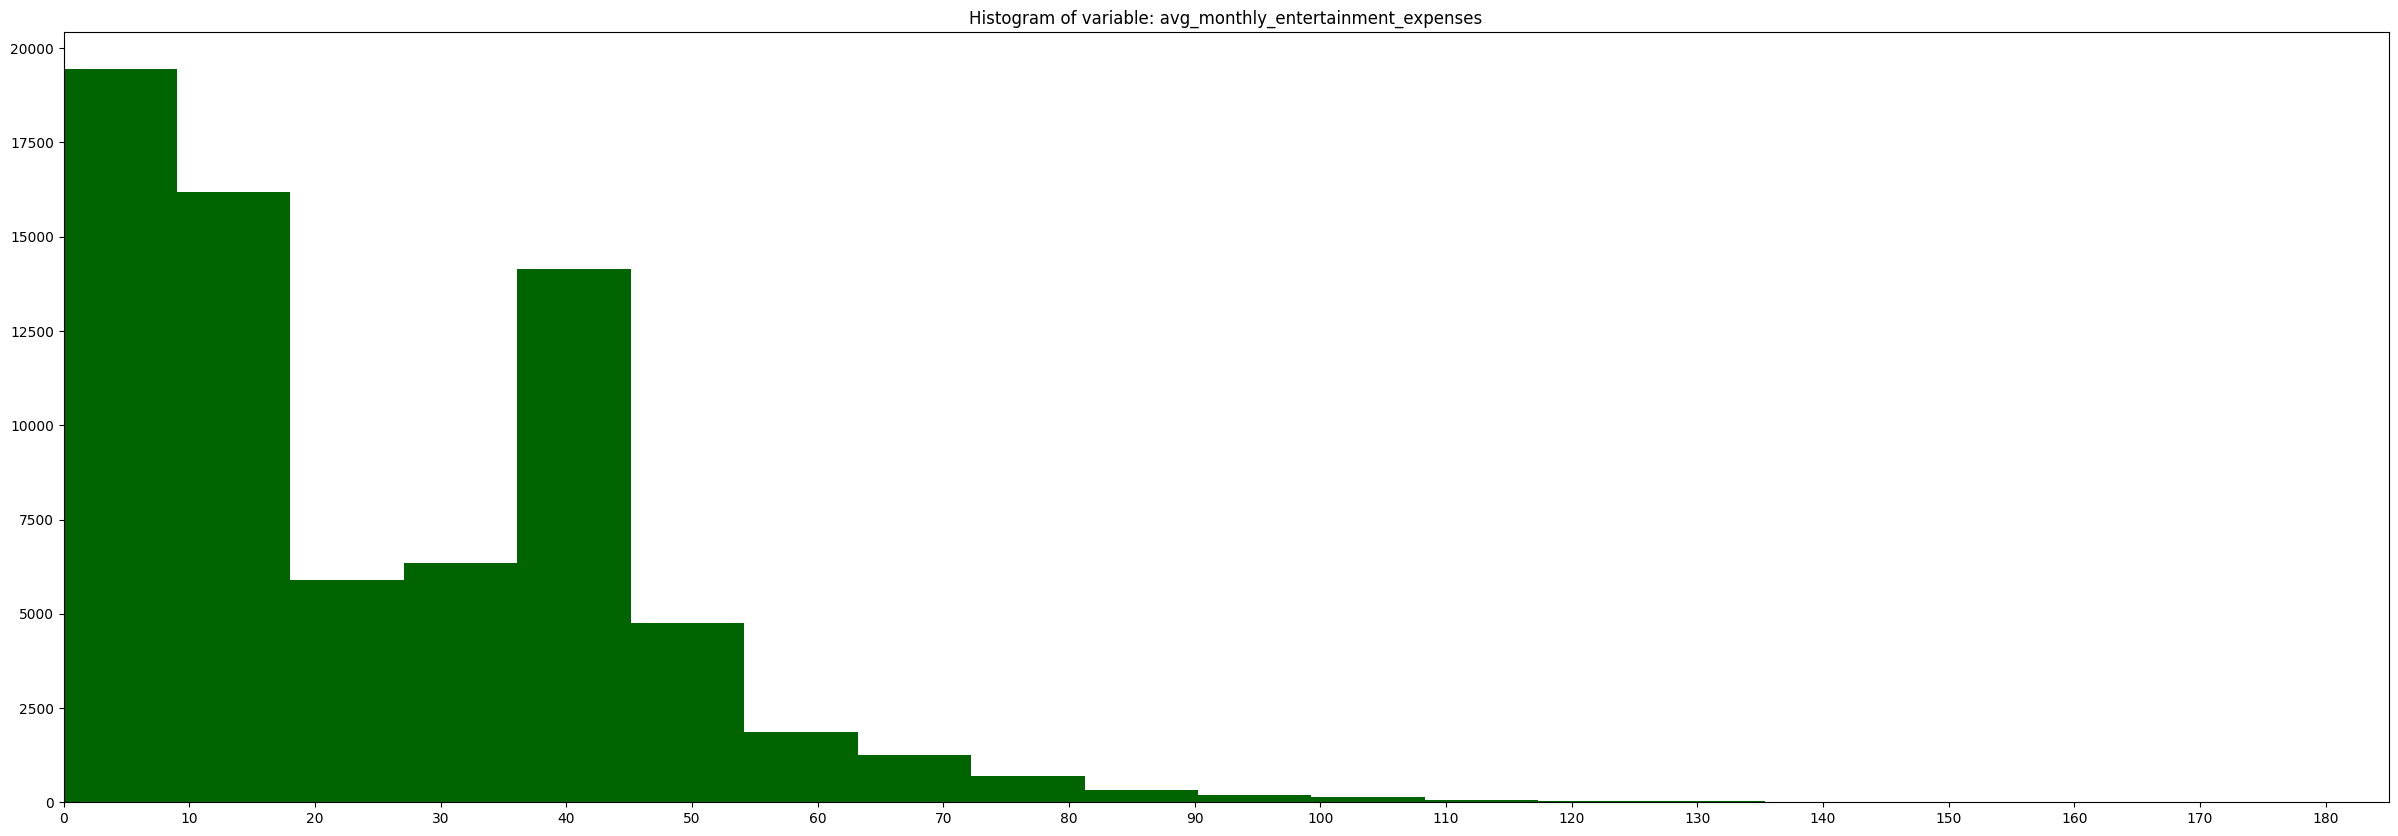

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["amee"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: avg_monthly_entertainment_expenses")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 185)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 185, 10))

# Show the plot
plt.show()

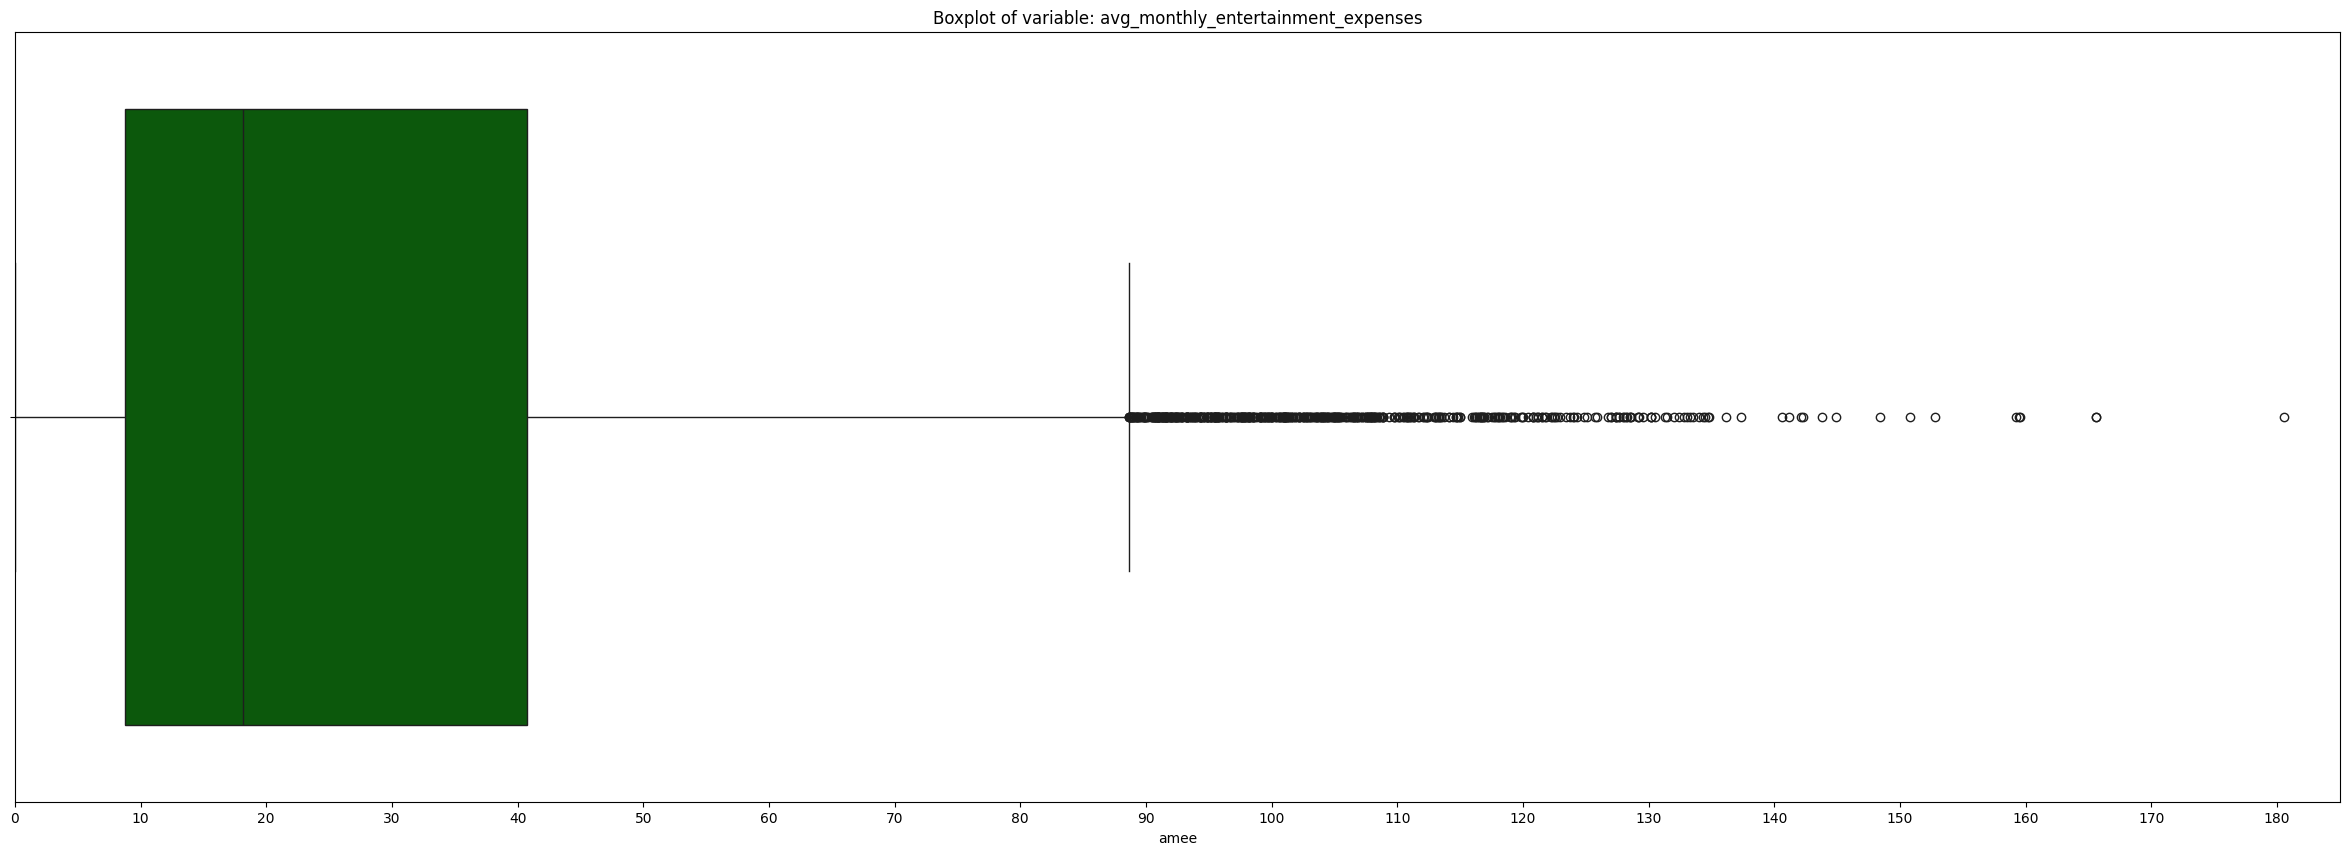

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["amee"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: avg_monthly_entertainment_expenses")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 185)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 185, 10))

# Show the plot
plt.show()

In [ ]:
## Upper limit outliers
count_amee = df_outliers_train[df_outliers_train['amee'] > 90].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_amee}")

count_amee = df_outliers_train[df_outliers_train['amee'] > 139].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_amee}")

count_amee = df_outliers_train[df_outliers_train['amee'] > 155].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_amee}") # values > 155 readjust

count_amee = df_outliers_train[df_outliers_train['amee'] > 170].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_amee}")

Count of 'last_year_avg_monthly_charity_donations' observations: 493
Count of 'last_year_avg_monthly_charity_donations' observations: 15
Count of 'last_year_avg_monthly_charity_donations' observations: 6
Count of 'last_year_avg_monthly_charity_donations' observations: 1


In [ ]:
## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['amee'] > 155

# Generate random values between 135 and 155

replacement_values = np.random.uniform(135, 155, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'amee'] = replacement_values

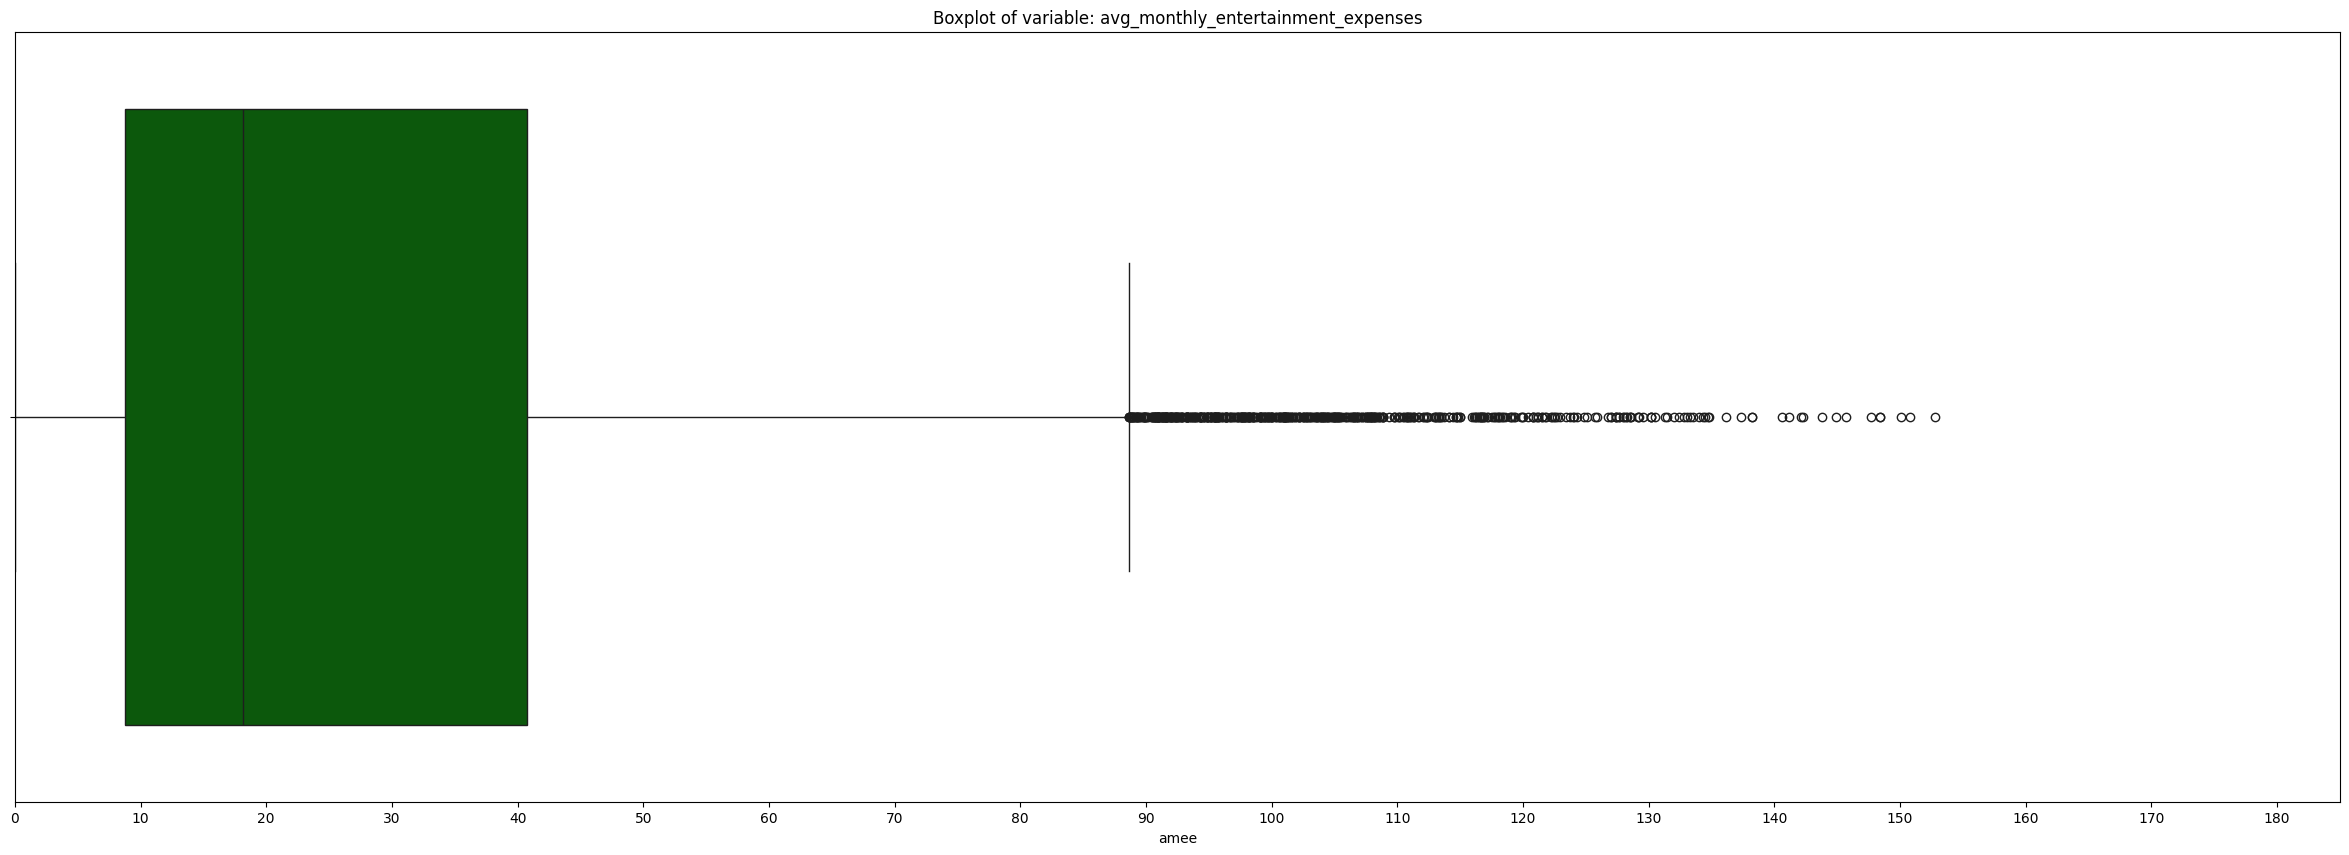

In [ ]:
#Check the irt boxplot again
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["amee"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: avg_monthly_entertainment_expenses")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 185)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 185, 10))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['amee'] > 155

# Generate random values between 135 and 155

replacement_values = np.random.uniform(135, 155, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'amee'] = replacement_values

<font size="3" color='#7C8489'>avg_weekly_exercise_hours</font>

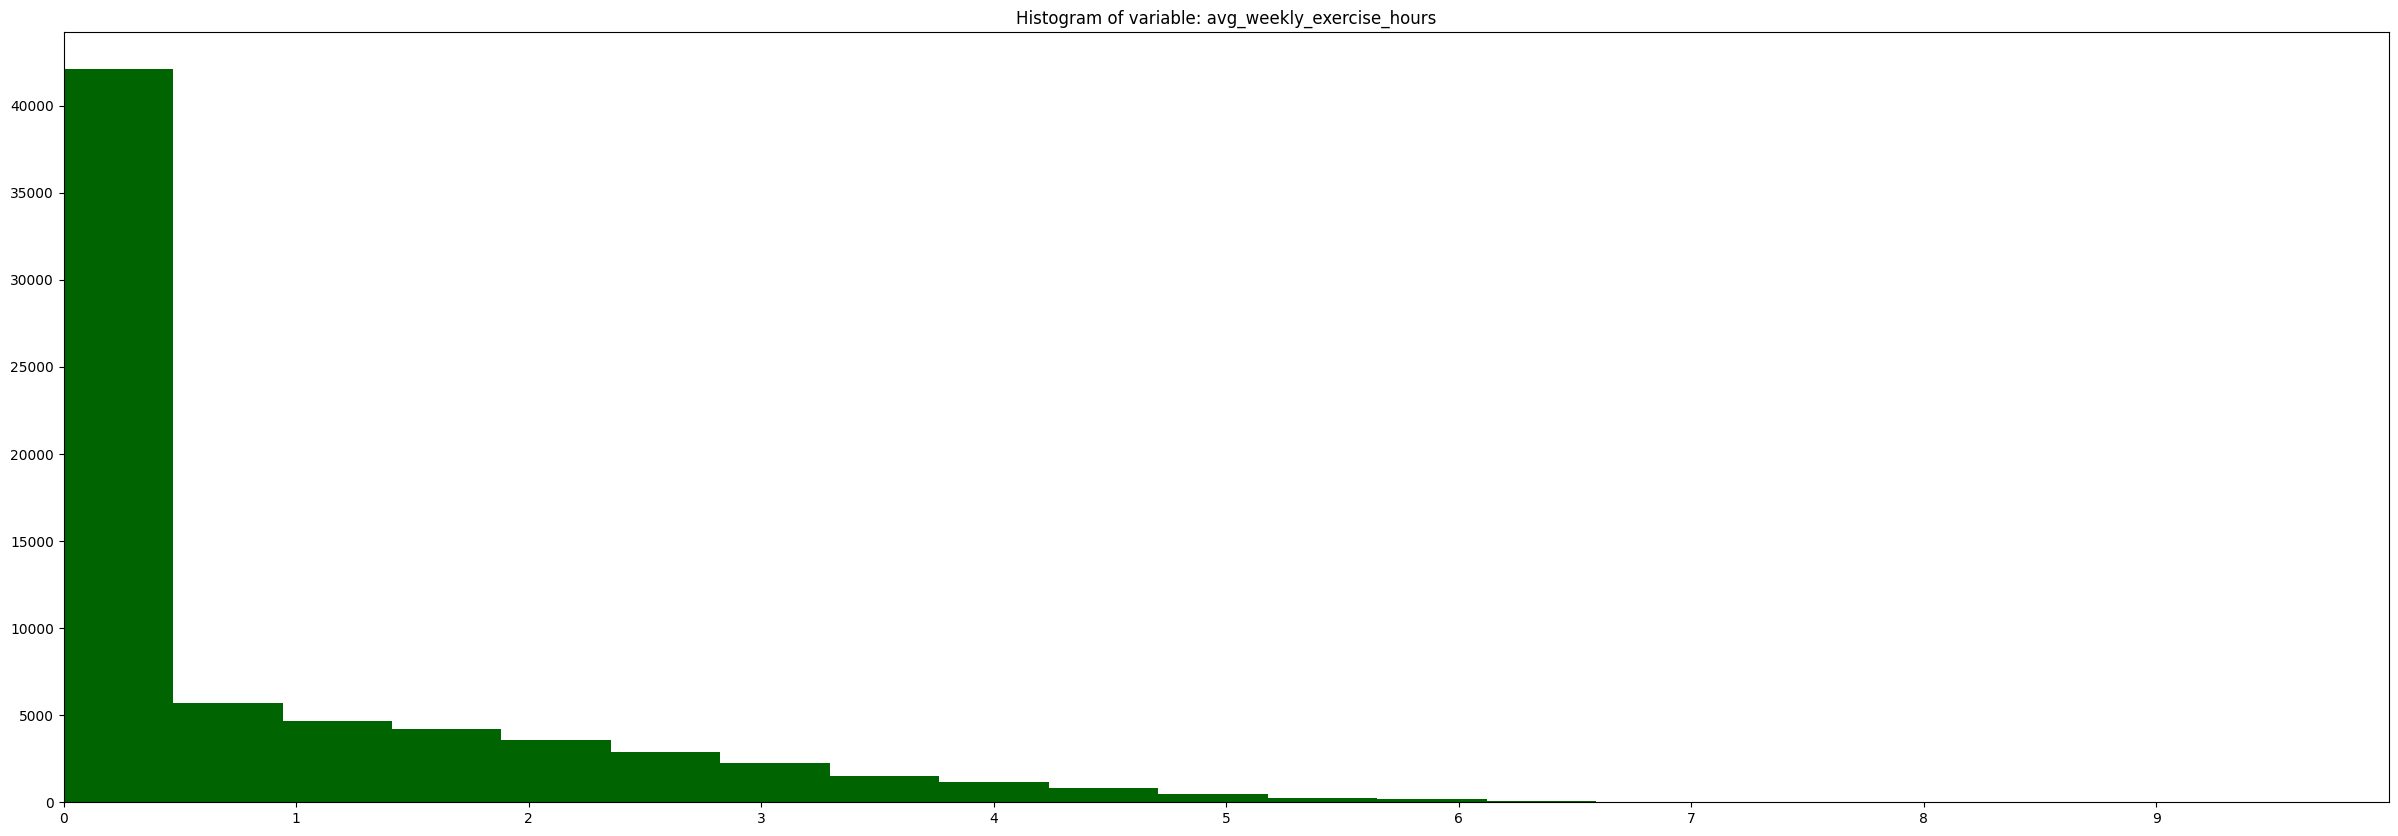

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["aweh"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: avg_weekly_exercise_hours")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 10)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 10, 1))

# Show the plot
plt.show()

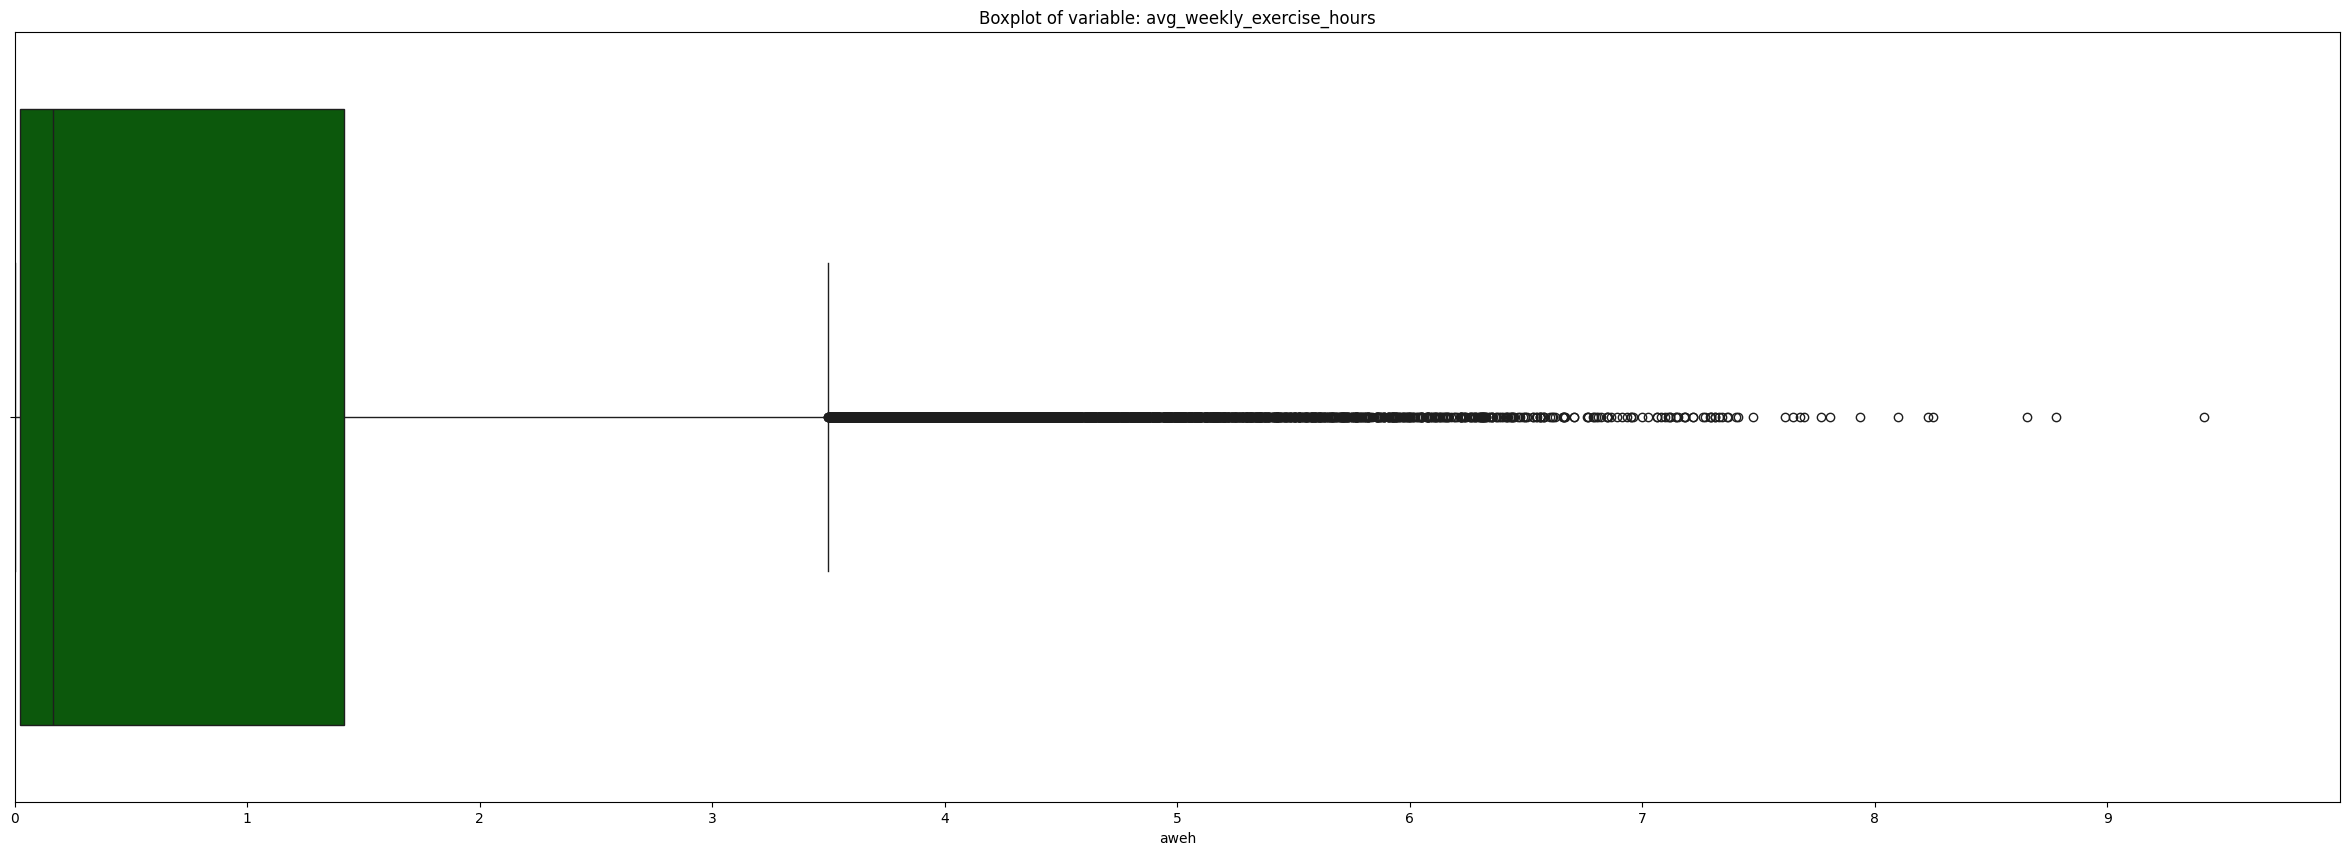

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["aweh"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: avg_weekly_exercise_hours")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 10)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 10, 1))

# Show the plot
plt.show()

In [ ]:
## Upper limit outliers
count_aweh = df_outliers_train[df_outliers_train['aweh'] > 3.5].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_aweh}")

count_aweh = df_outliers_train[df_outliers_train['aweh'] > 7.5].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_aweh}")

count_aweh = df_outliers_train[df_outliers_train['aweh'] > 8.5].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_aweh}")

Count of 'last_year_avg_monthly_charity_donations' observations: 3871
Count of 'last_year_avg_monthly_charity_donations' observations: 13
Count of 'last_year_avg_monthly_charity_donations' observations: 3


In [ ]:
## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['aweh'] > 8.5

# Generate random values between 7 and 8.5
replacement_values = np.random.uniform(7, 8, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'aweh'] = replacement_values

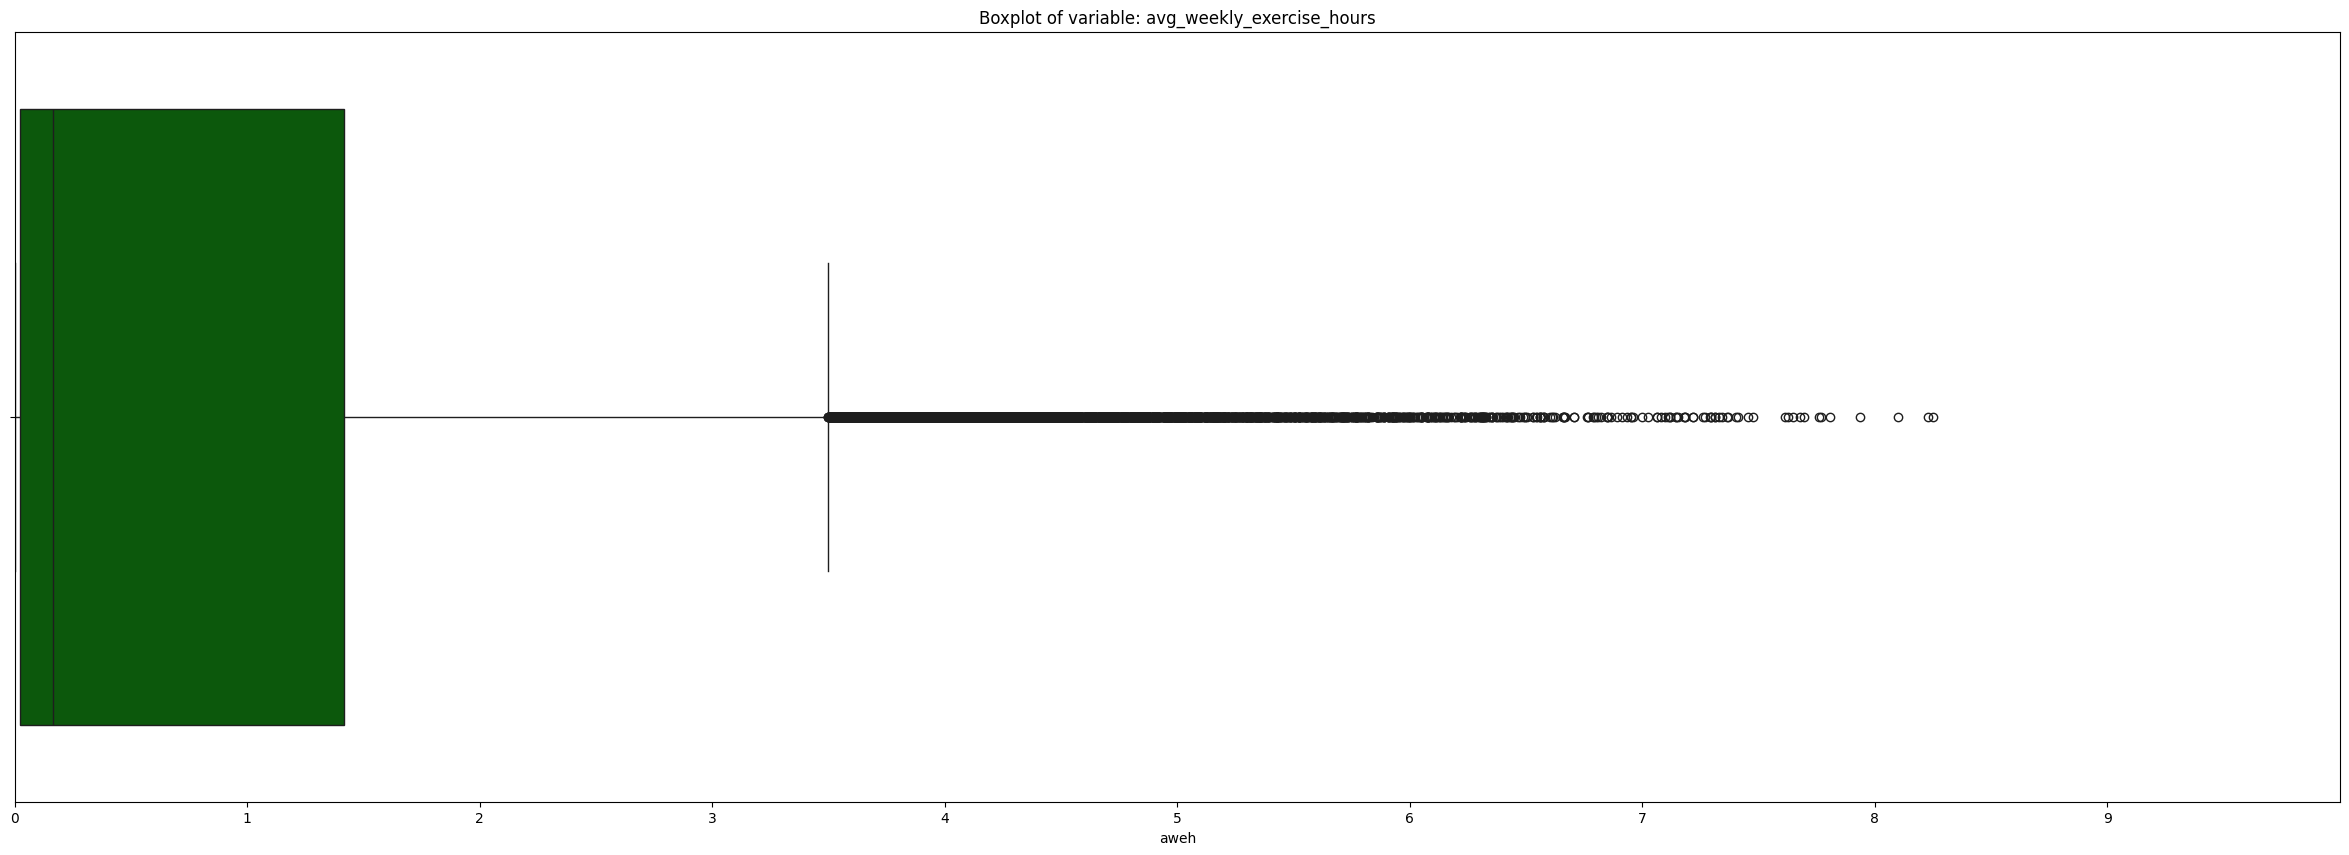

In [ ]:
#Check the irt boxplot again

# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["aweh"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: avg_weekly_exercise_hours")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 10)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 10, 1))

# Show the plot
plt.show()

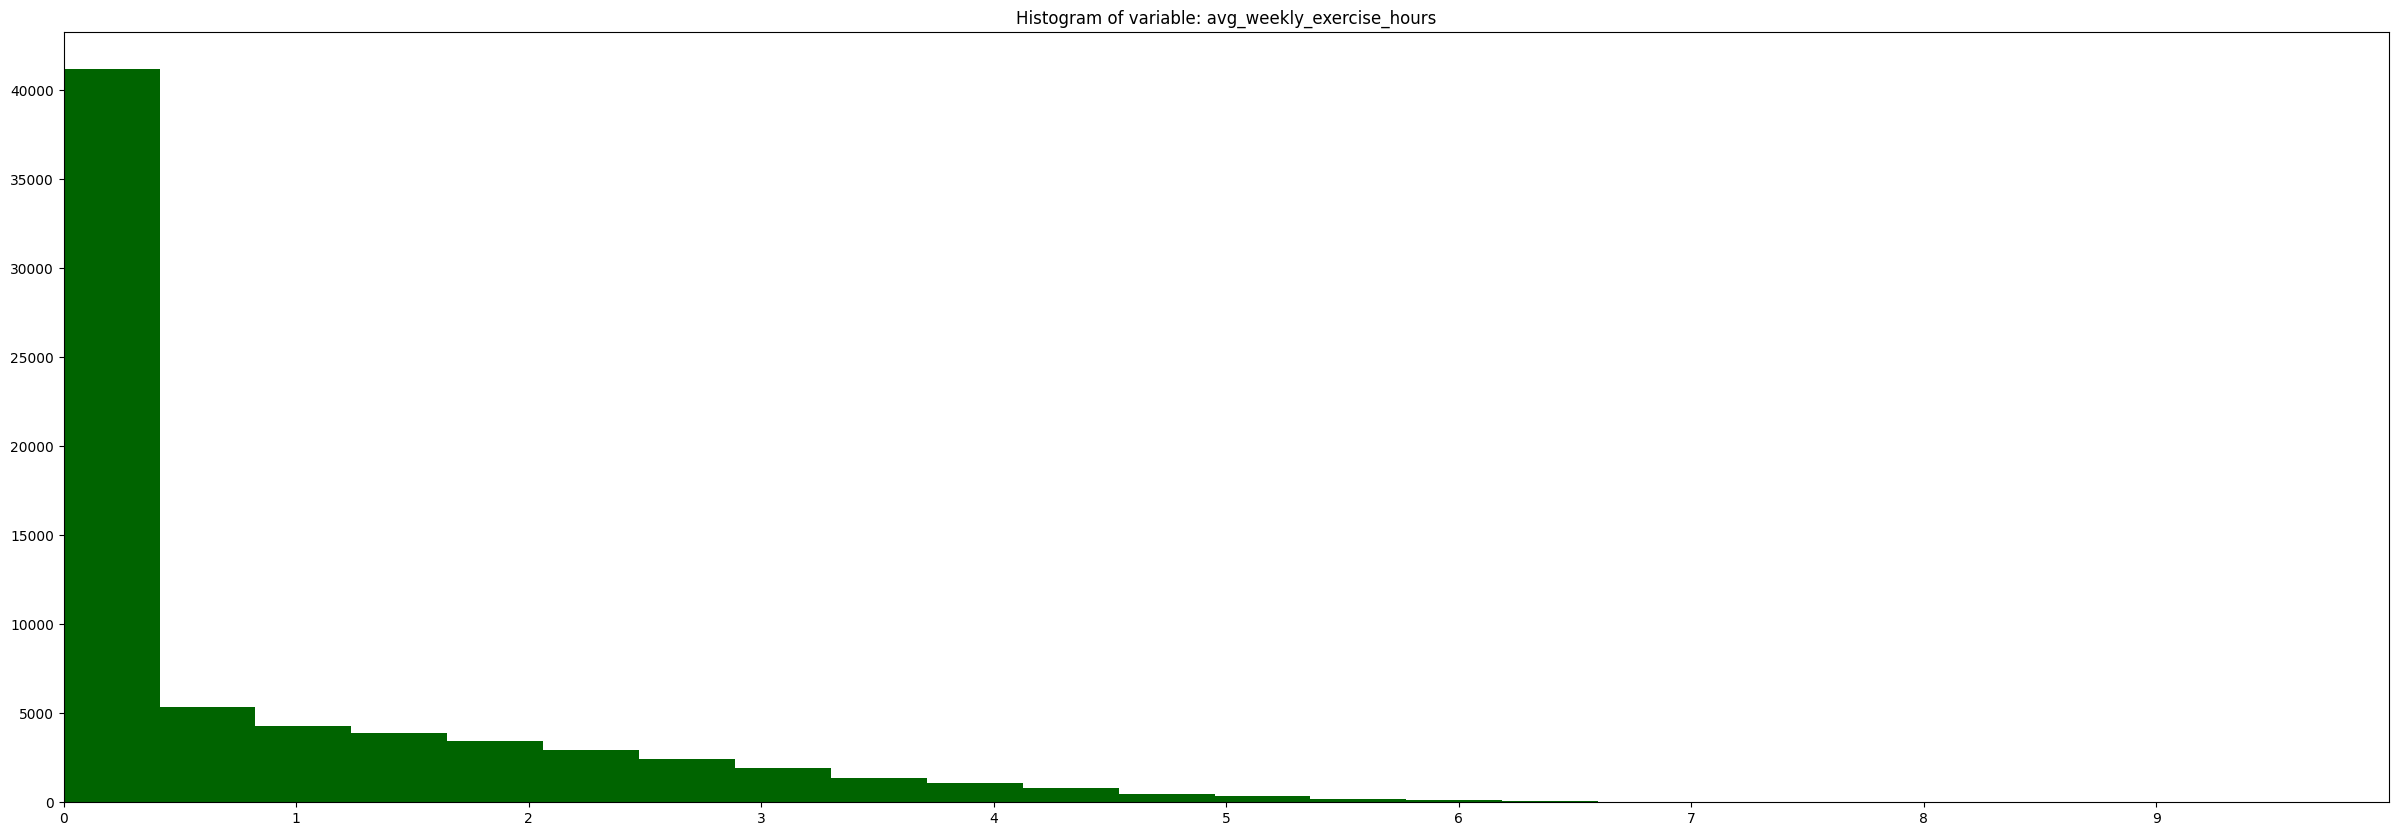

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["aweh"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: avg_weekly_exercise_hours")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 10)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 10, 1))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['aweh'] > 8.5

# Generate random values between 7 and 8.5
replacement_values = np.random.uniform(7, 8, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'aweh'] = replacement_values

<font size="3" color='#7C8489'>health_consciousness_rating</font>

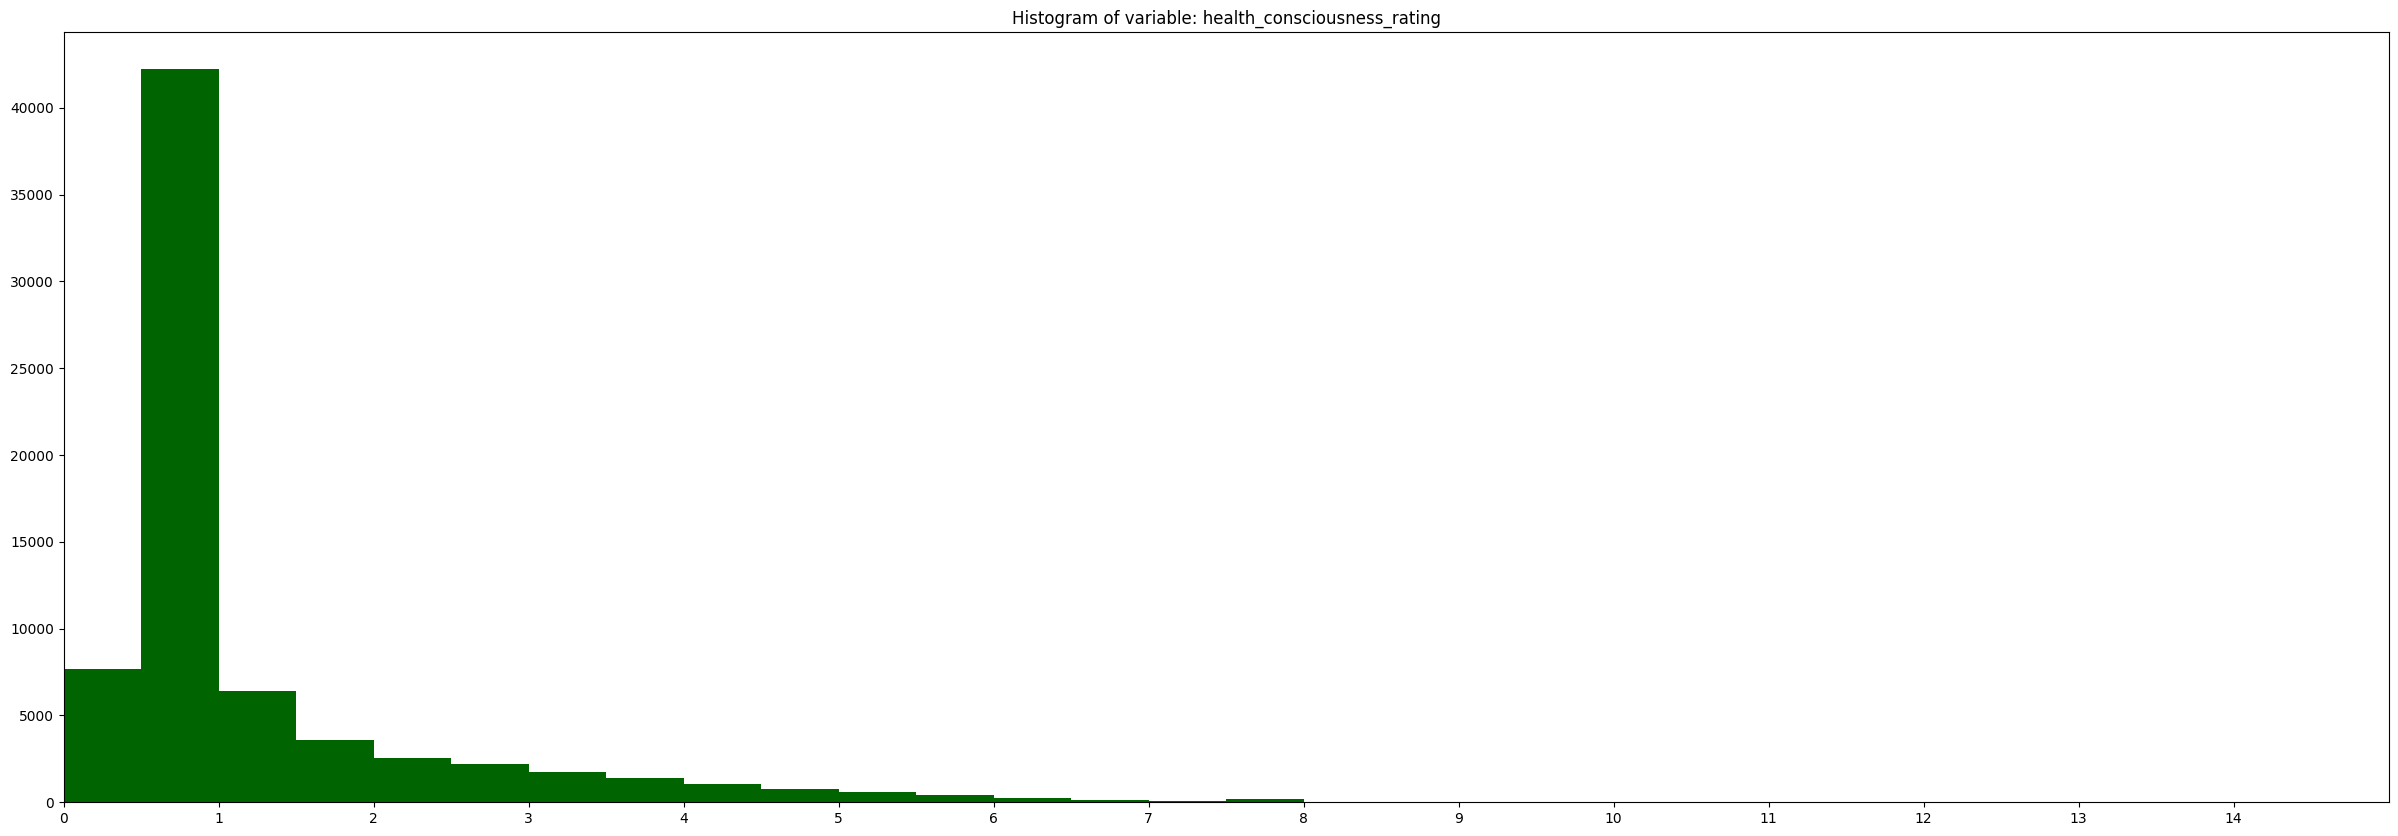

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["hcr"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: health_consciousness_rating")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 15)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 15, 1))

# Show the plot
plt.show()

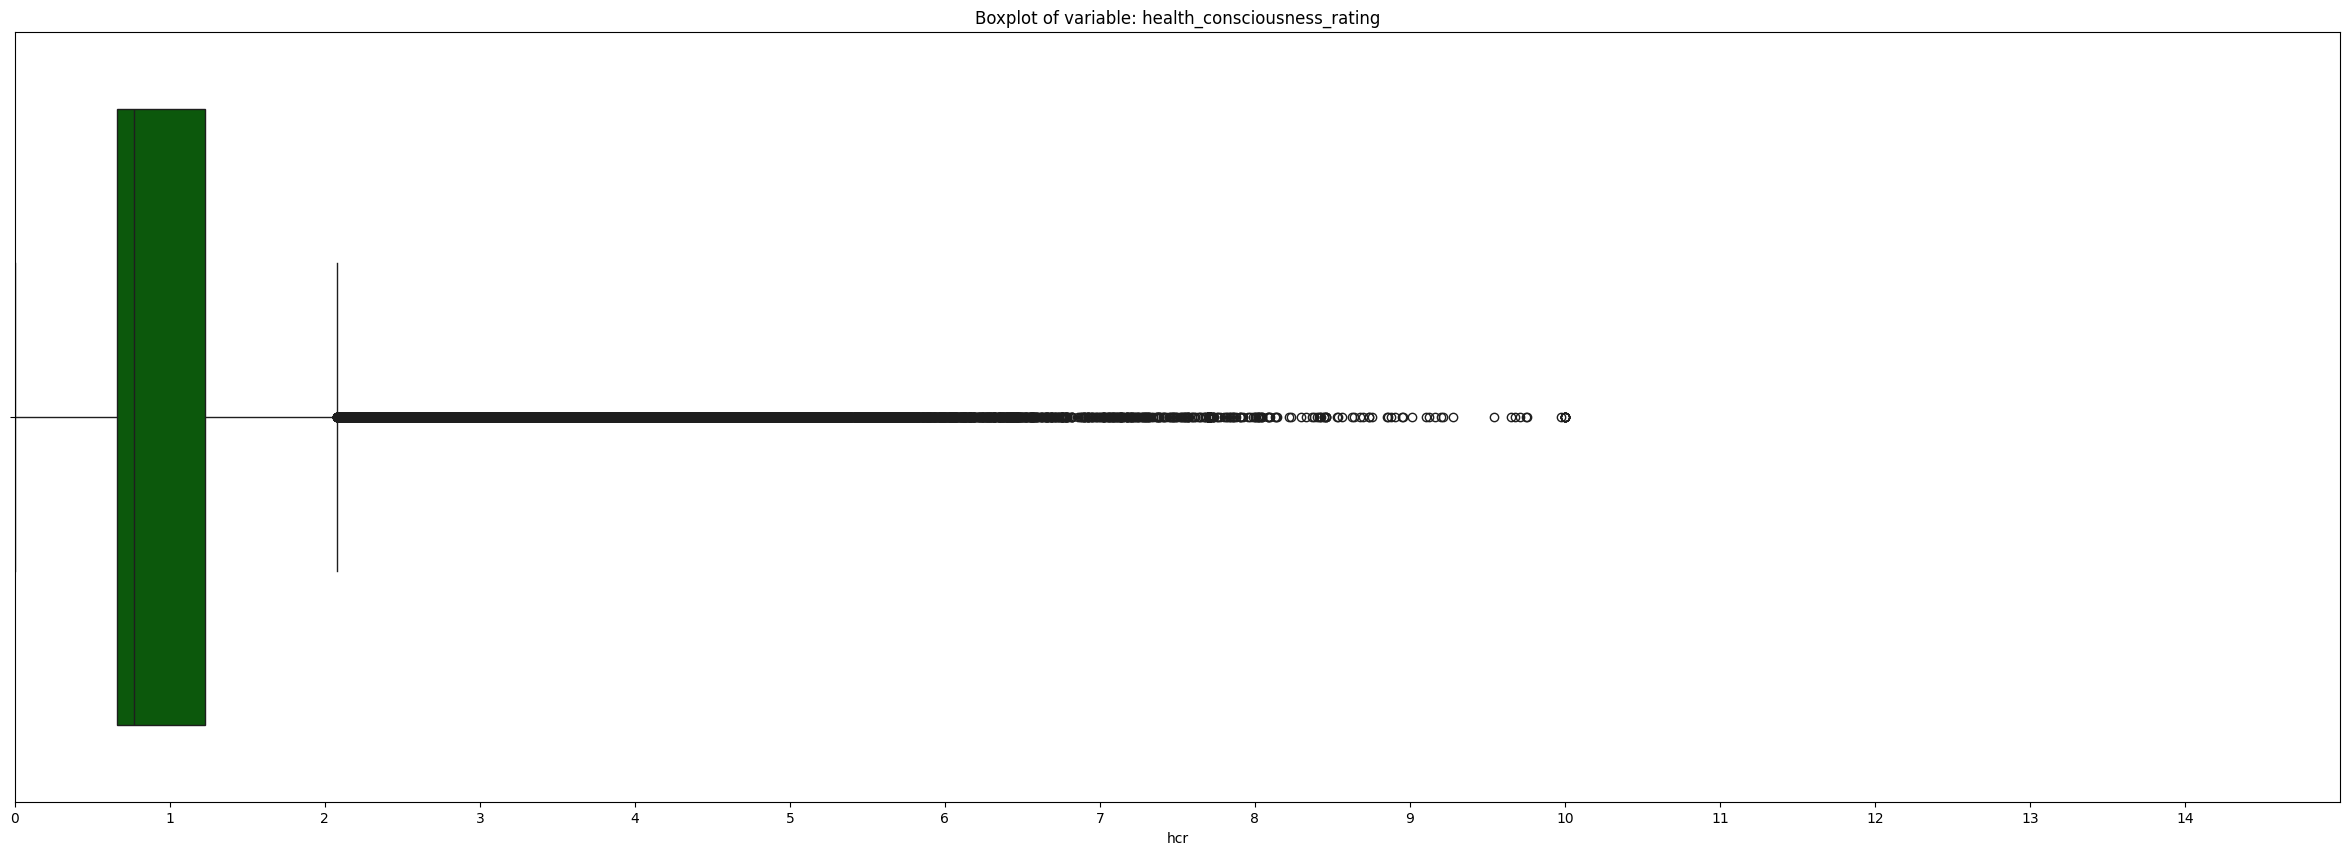

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["hcr"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: health_consciousness_rating")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 15)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 15, 1))

# Show the plot
plt.show()

No outliers since high frequency and closeness to neighbors

<font size="3" color='#7C8489'>stress_management_score</font>

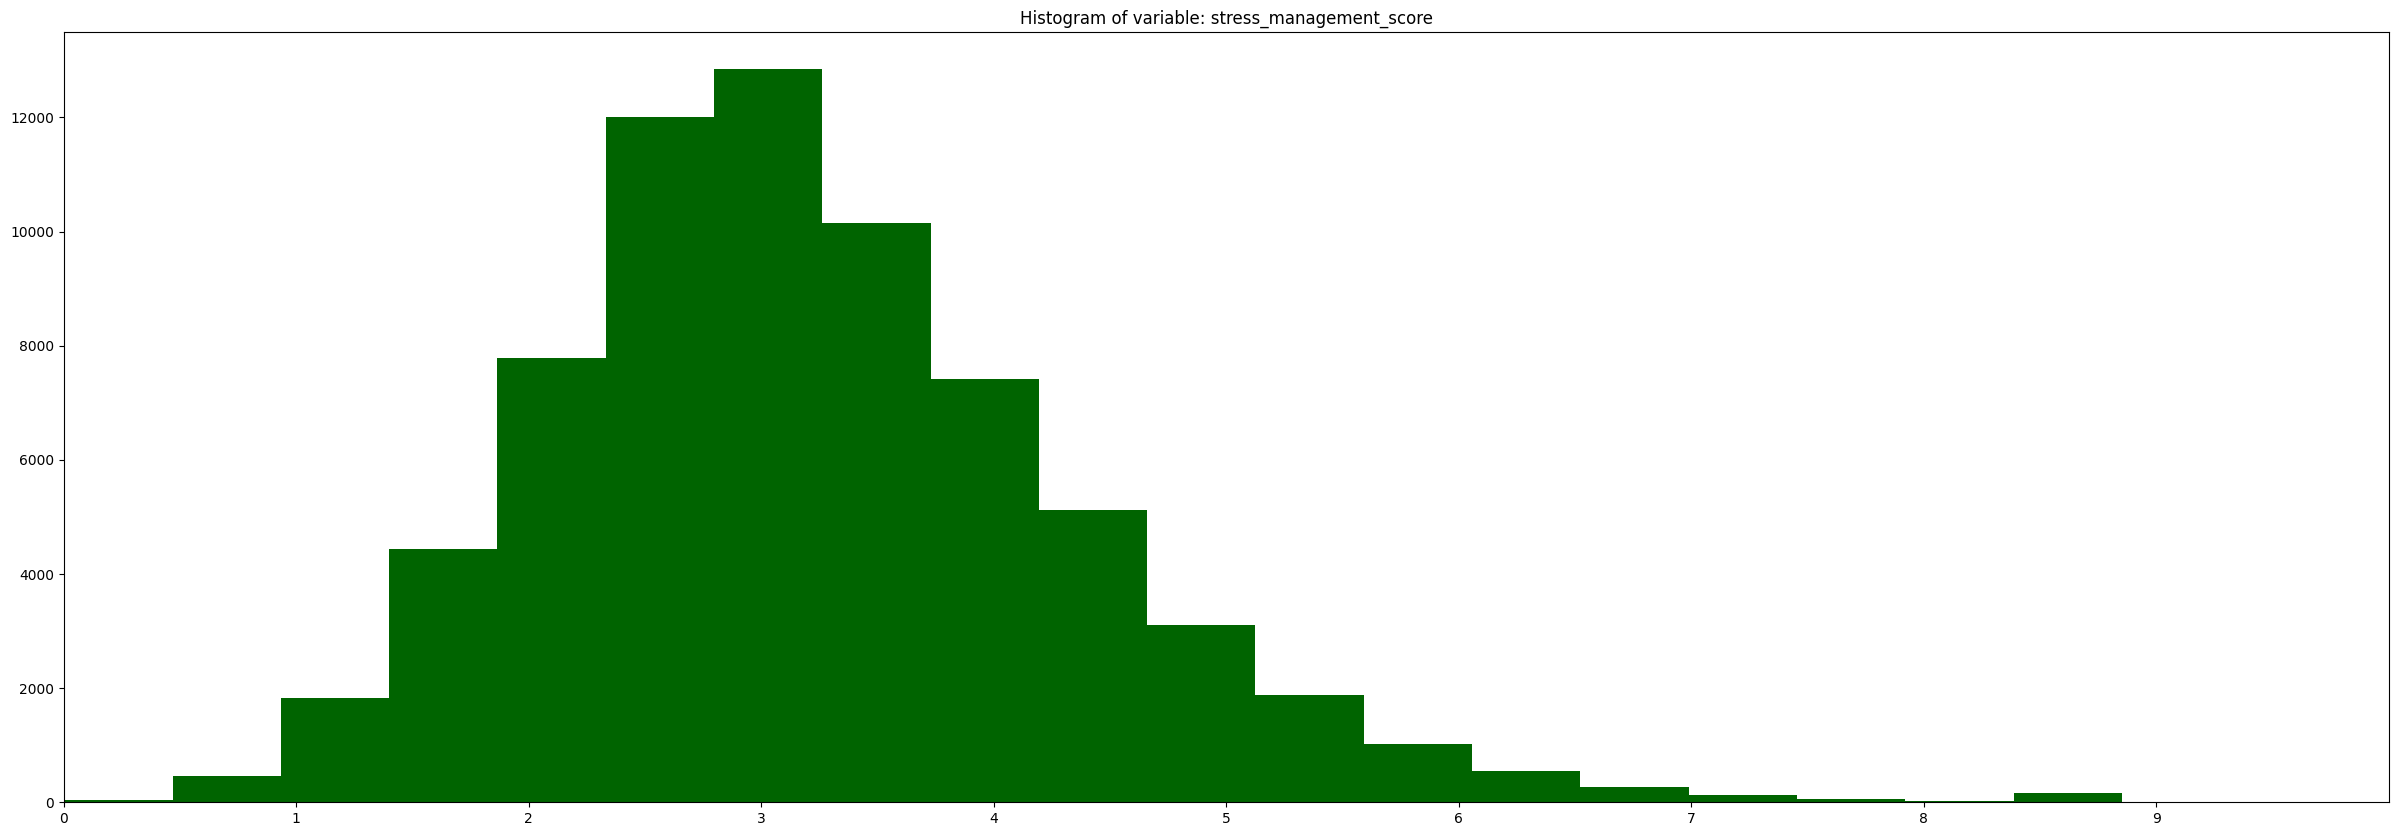

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["sms"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: stress_management_score")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 10)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 10, 1))

# Show the plot
plt.show()

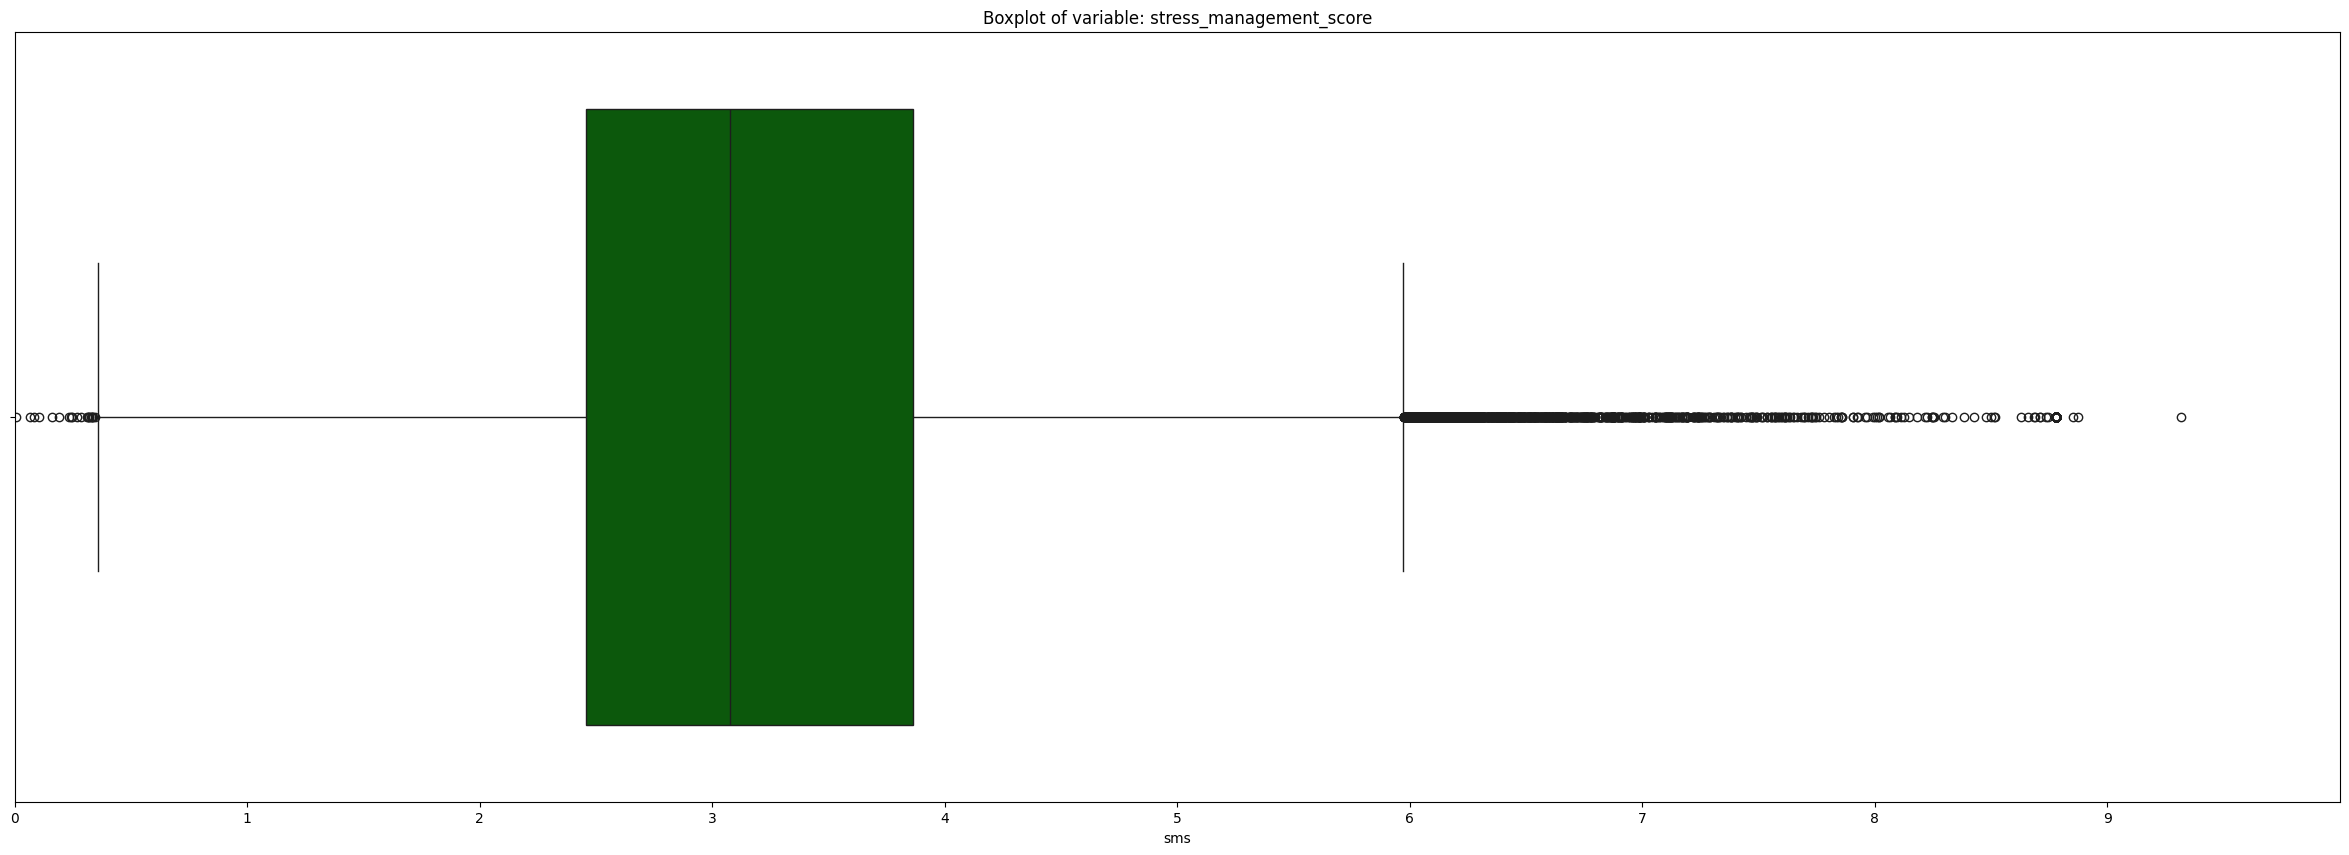

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["sms"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: stress_management_score")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 10)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 10, 1))

# Show the plot
plt.show()

In [ ]:
## Upper limit outliers
count_sms = df_outliers_train[df_outliers_train['sms'] <0.3].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_sms}")

count_sms = df_outliers_train[df_outliers_train['sms'] <0.2].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_sms}")

count_sms = df_outliers_train[df_outliers_train['sms'] <0.1].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_sms}")

Count of 'last_year_avg_monthly_charity_donations' observations: 11
Count of 'last_year_avg_monthly_charity_donations' observations: 6
Count of 'last_year_avg_monthly_charity_donations' observations: 3


No lower outliers due to frequency and closeness to neighbors

In [ ]:
## Upper limit outliers
count_sms = df_outliers_train[df_outliers_train['sms'] > 6].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_sms}")

count_sms = df_outliers_train[df_outliers_train['sms'] > 8.5].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_sms}")

count_sms = df_outliers_train[df_outliers_train['sms'] >9].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_sms}") # just one ocurrence, since it is close to high frequency of close neighbors, adjust

Count of 'last_year_avg_monthly_charity_donations' observations: 1283
Count of 'last_year_avg_monthly_charity_donations' observations: 155
Count of 'last_year_avg_monthly_charity_donations' observations: 1


In [ ]:
#Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['sms'] > 9

# Generate random values between 8 and 8.5
replacement_values = np.random.uniform(8.5, 9, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'sms'] = replacement_values

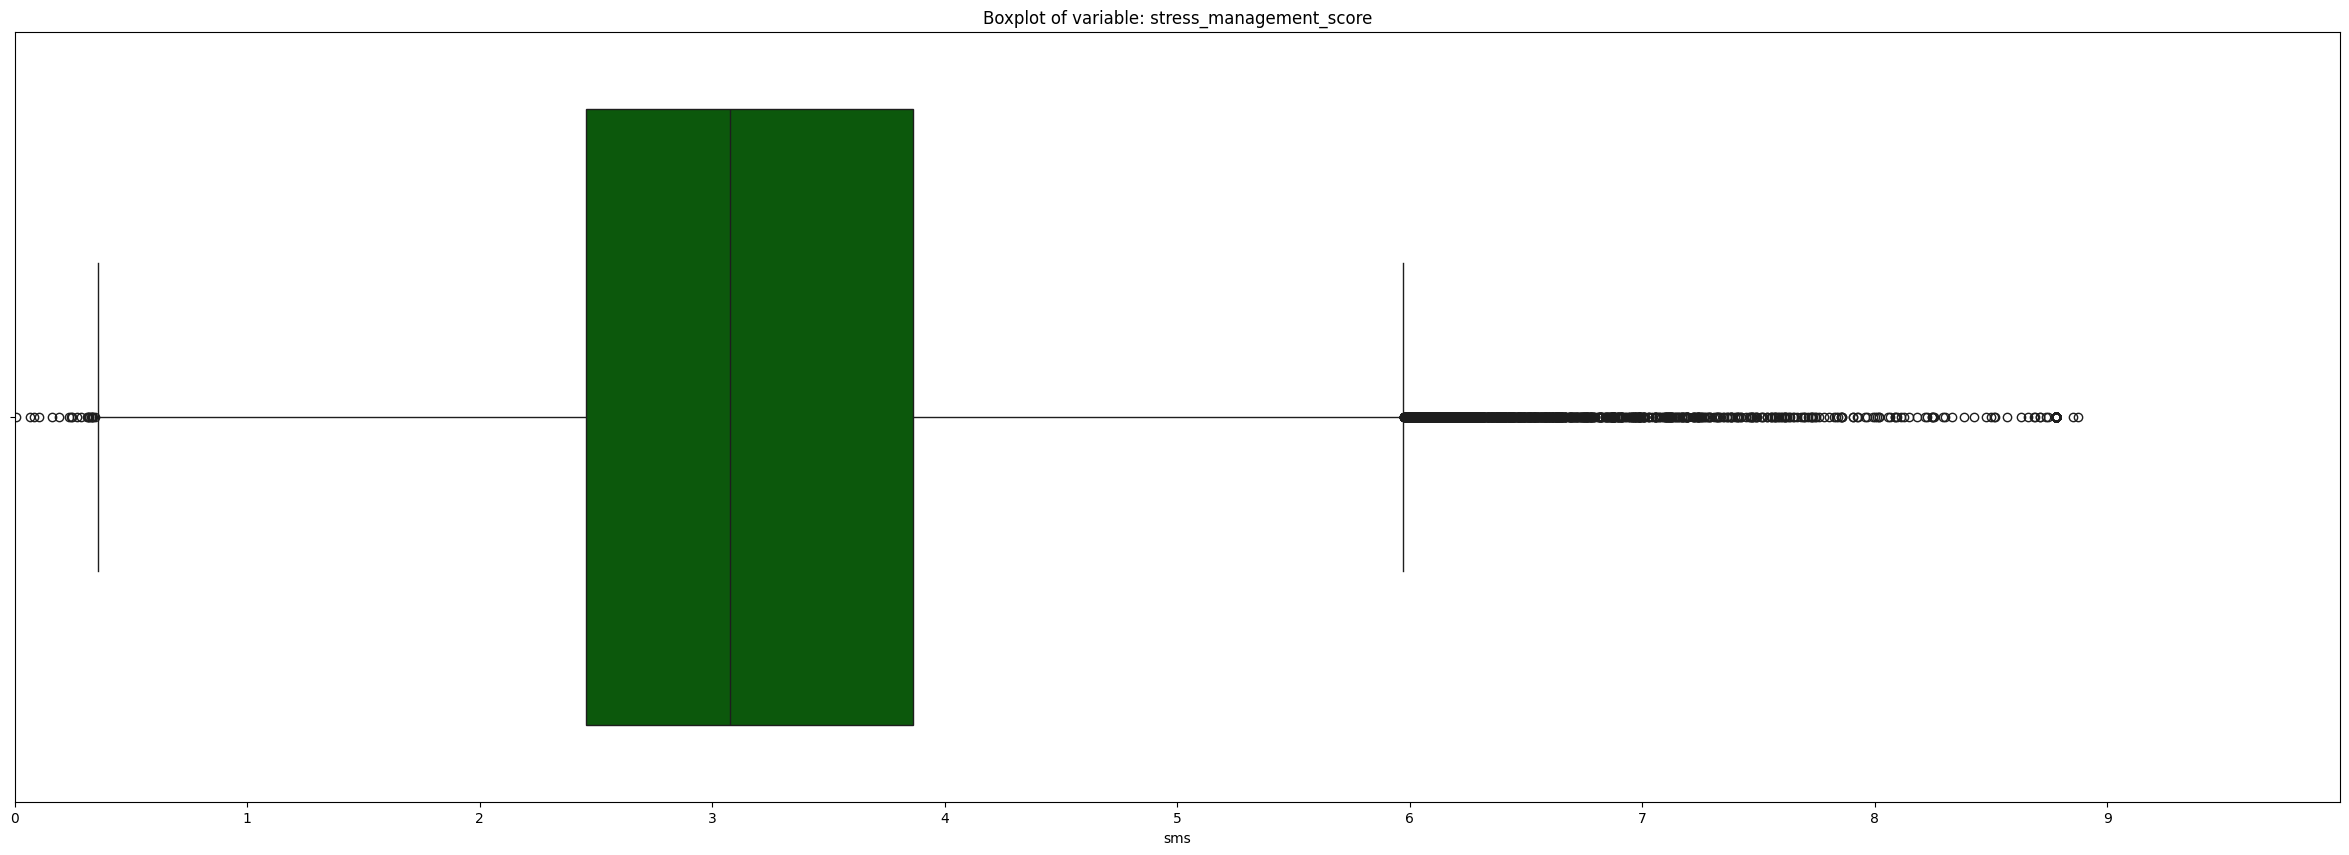

In [ ]:
#Check the irt boxplot again
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["sms"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: stress_management_score")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 10)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 10, 1))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
#Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['sms'] > 9

# Generate random values between 8 and 8.5
replacement_values = np.random.uniform(8.5, 9, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'sms'] = replacement_values

<font size="3" color='#7C8489'>overall_well_being</font>

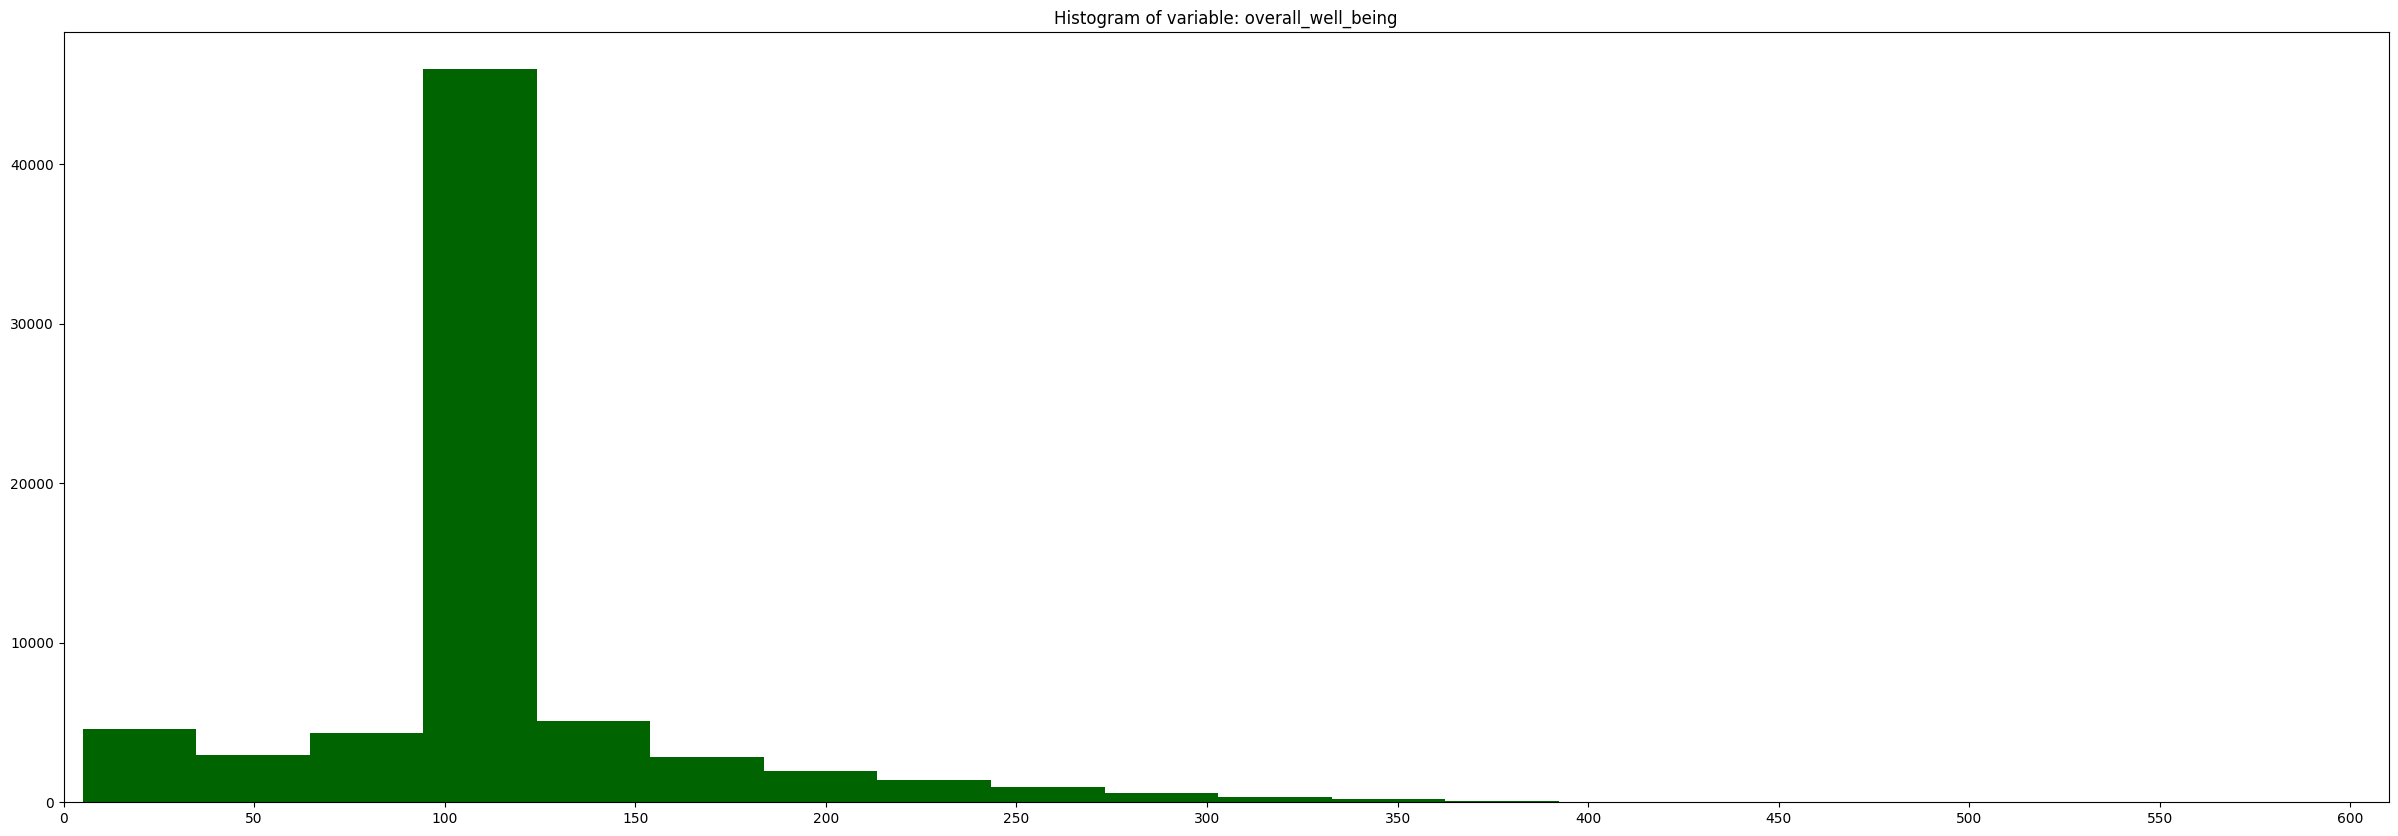

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# Single Metric Variable Histogram
plt.hist(df_outliers_train["owb"], bins=20,color='darkgreen')

# Set the title of the plot
plt.title("Histogram of variable: overall_well_being")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 610)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 610, 50))

# Show the plot
plt.show()

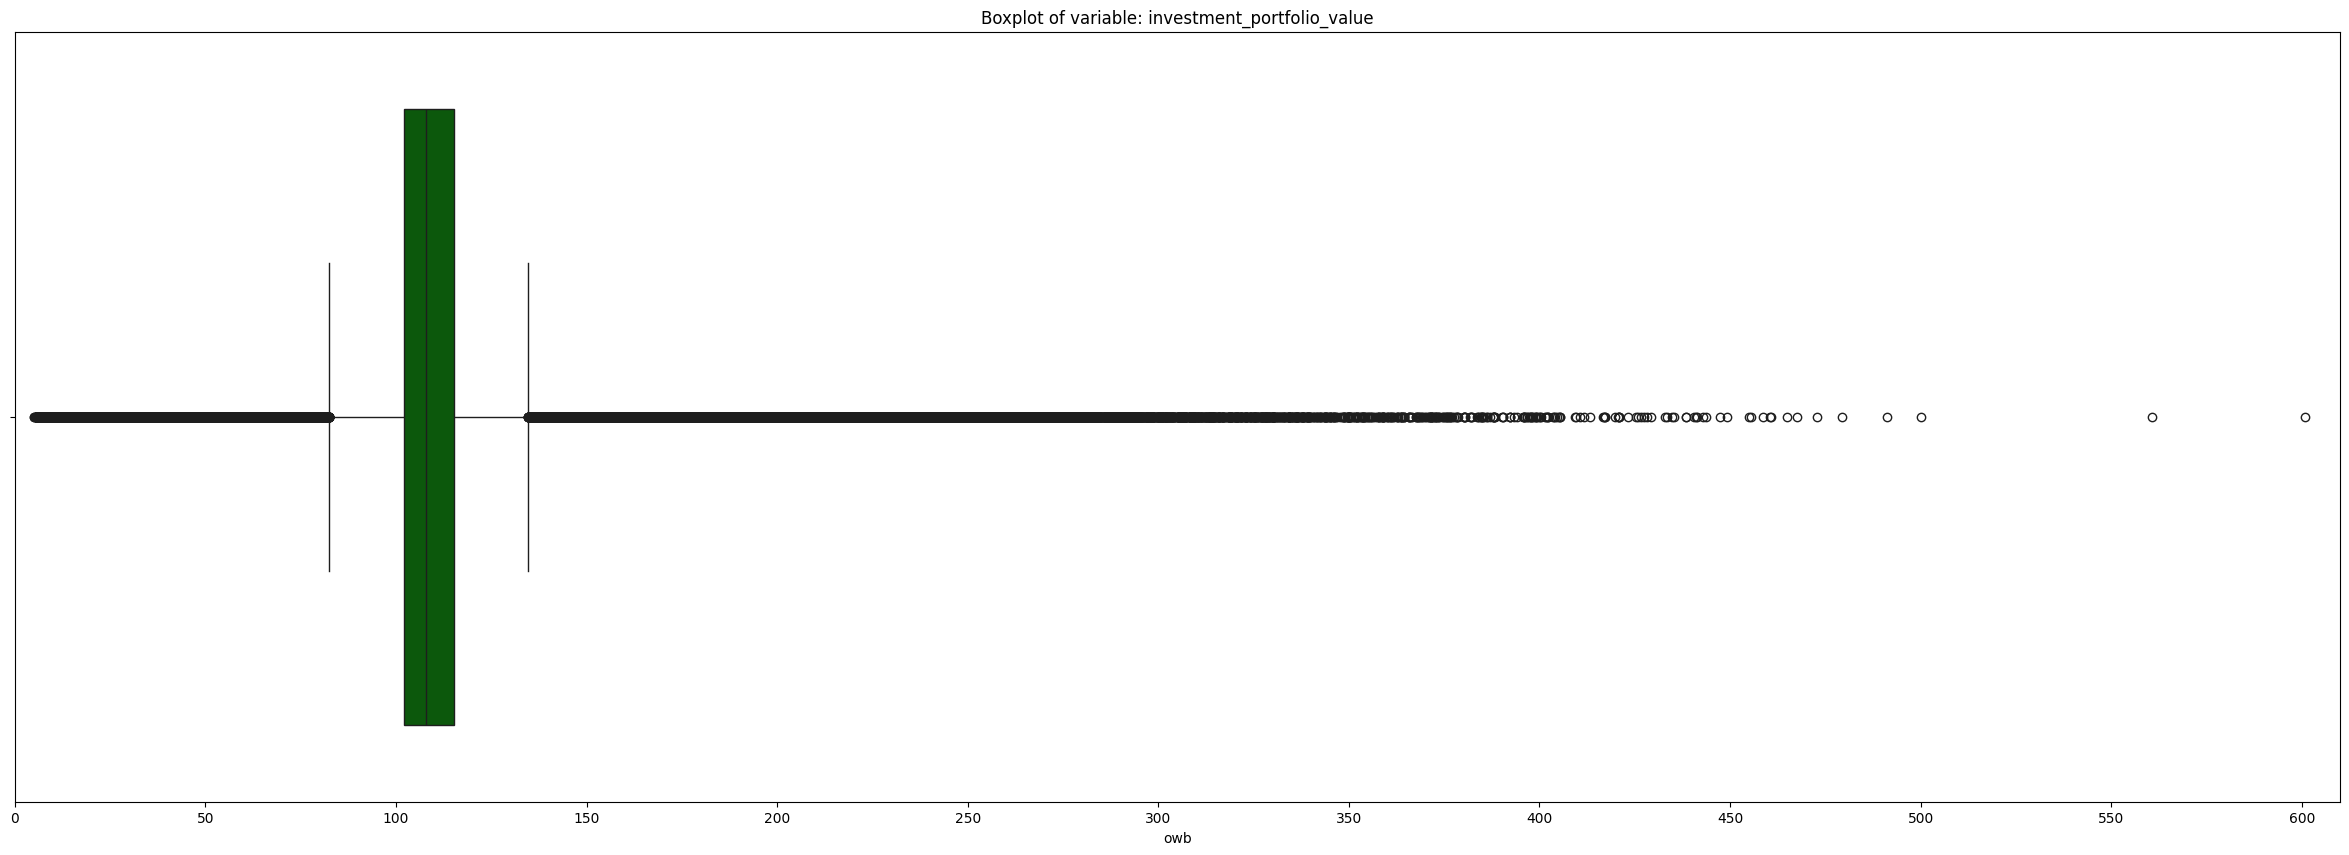

In [ ]:
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["owb"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: investment_portfolio_value")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 610)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 610, 50))

# Show the plot
plt.show()

In [ ]:
## Upper limit outliers
count_owb = df_outliers_train[df_outliers_train['owb'] > 400].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_owb}")

count_owb = df_outliers_train[df_outliers_train['owb'] > 450].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_owb}") # readjust

count_owb = df_outliers_train[df_outliers_train['owb'] > 500].shape[0]
print(f"Count of 'last_year_avg_monthly_charity_donations' observations: {count_owb}")

Count of 'last_year_avg_monthly_charity_donations' observations: 61
Count of 'last_year_avg_monthly_charity_donations' observations: 13
Count of 'last_year_avg_monthly_charity_donations' observations: 3


In [ ]:
#Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_train['owb'] > 500

# Generate random values between 400 and 450
replacement_values = np.random.uniform(450,500, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_train.loc[outliers_mask, 'owb'] = replacement_values

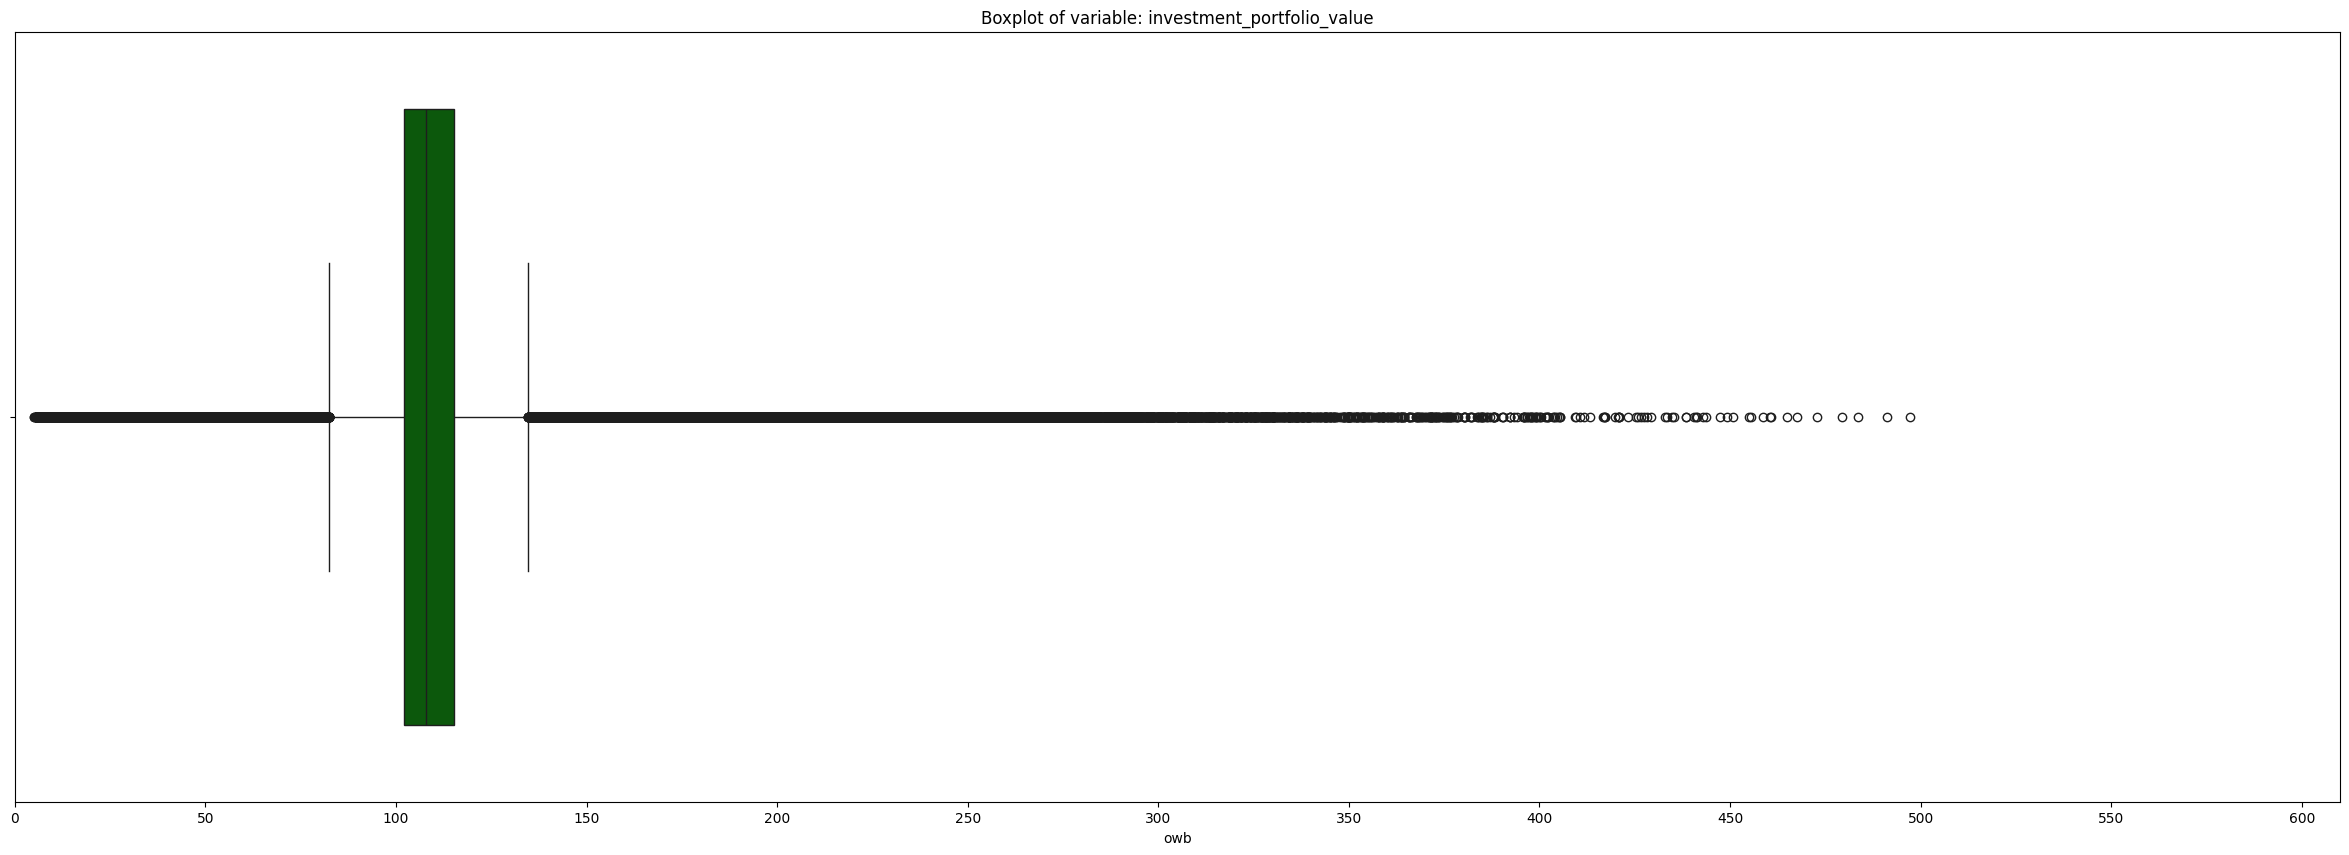

In [ ]:
#Check the irt boxplot again
# Set the figure size
plt.figure(figsize=(30, 10))

# BoxPlot for Income
sns.boxplot(x=df_outliers_train["owb"],color='darkgreen')

# Set the title of the plot
plt.title("Boxplot of variable: investment_portfolio_value")

# Set the x-axis limits according to your desired scale
plt.xlim(0, 610)

# Set x-axis ticks in increments of 5
plt.xticks(range(0, 610, 50))

# Show the plot
plt.show()

Repeat for test dataset

In [ ]:
#Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test['owb'] > 500

# Generate random values between 400 and 450
replacement_values = np.random.uniform(450,500, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test.loc[outliers_mask, 'owb'] = replacement_values

## <font color='#BED62F'>2.3. Missing Values </font> <a class="anchor" id="colab"></a>

From data exploration we concluded that all metric variables have missing values

Try imputation with KNN Imputer

In [ ]:
# Replace empty strings with NaN values
df_outliers_train.replace('', np.nan, inplace=True)
df_outliers_test.replace('', np.nan, inplace=True)

In [ ]:
# Check the weight of those missing values in the overall dataset
df_outliers_train.isna().sum()/len(training)*100

title            0.000000
date_of_birth    0.000000
lyamcd           1.998558
ear              3.218544
fwi              1.571563
ipv              1.607054
ira              1.183386
irt              2.764931
tss              2.803749
smis             1.983031
eef              0.789663
amee             0.798536
aweh             2.373426
hcr              0.811845
sms              3.203017
owb              0.795209
dtype: float64

In [ ]:
df_knn_train = df_outliers_train.copy(deep=True)
df_knn_test = df_outliers_test.copy(deep=True)

# List of columns to impute
columns_to_impute = ['lyamcd', 'ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']

# Create the KNN imputer
knn_imputer = KNNImputer(n_neighbors=15, weights="uniform")

df_knn_train[columns_to_impute] = knn_imputer.fit_transform(df_knn_train[columns_to_impute])

# Check for any remaining missing values
print(df_knn_train.isnull().sum())

title            0
date_of_birth    0
lyamcd           0
ear              0
fwi              0
ipv              0
ira              0
irt              0
tss              0
smis             0
eef              0
amee             0
aweh             0
hcr              0
sms              0
owb              0
dtype: int64


In [ ]:
#Repeat for test dataset
df_knn_test[columns_to_impute] = knn_imputer.transform(df_knn_test[columns_to_impute])

# Check for any remaining missing values
print(df_knn_test.isnull().sum())

title            0
date_of_birth    0
lyamcd           0
ear              0
fwi              0
ipv              0
ira              0
irt              0
tss              0
smis             0
eef              0
amee             0
aweh             0
hcr              0
sms              0
owb              0
dtype: int64


Try imputation with mean - lead to worse scores

In [ ]:
# # Replace empty strings with NaN values
# df_outliers_train.replace('', np.nan, inplace=True)
# df_outliers_test.replace('', np.nan, inplace=True)

In [ ]:
# Check the weight of those missing values in the overall dataset
# df_outliers_train.isna().sum()/len(training)*100

In [ ]:
# df_mean_train = df_outliers_train.copy(deep=True)
# df_mean_test = df_outliers_test.copy(deep=True)

In [ ]:
# columns_to_inpute_mean = ['lyamcd', 'ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']
# for column in columns_to_inpute_mean:
#     df_mean_train[column] = df_mean_train[column].mean()

In [ ]:
#Repeat for test dataset
#for column in columns_to_impute_mean:
#    df_mean_test[[column]] = df_mean_test[column].mean()

## <font color='#BED62F'>2.4. Feature Engineering </font> <a class="anchor" id="colab"></a>

In [ ]:
df_cleaned_train=df_knn_train.copy()
df_cleaned_test=df_knn_test.copy()

In [ ]:
# df_cleaned_train=df_mean_train.copy()
# df_cleaned_test=df_mean_test.copy()

<font size="4" color='#7C8489'>Create variable Gender</font>

In [ ]:
df_cleaned_train['gender'] = df_cleaned_train['title']
df_cleaned_train['gender'].replace('Mr.', 'M', inplace = True)
df_cleaned_train['gender'].replace('Miss', 'F', inplace = True)
df_cleaned_train['gender'].replace('Mrs.', 'F', inplace = True)
df_cleaned_train['gender'].replace('Ms.', 'F', inplace = True)
df_cleaned_train.head(3)

#Repeat for test dataset
df_cleaned_test['gender'] = df_cleaned_test['title']
df_cleaned_test['gender'].replace('Mr.', 'M', inplace = True)
df_cleaned_test['gender'].replace('Miss', 'F', inplace = True)
df_cleaned_test['gender'].replace('Mrs.', 'F', inplace = True)
df_cleaned_test['gender'].replace('Ms.', 'F', inplace = True)

In [ ]:
df_cleaned_train.drop(columns=['title'], inplace=True)
df_cleaned_test.drop(columns=['title'], inplace=True)

<font size="4" color='#7C8489'>Create variable Age</font>

Creation of the variable age for a better understanding of the attribute date of birth

In [ ]:
#https://www.geeksforgeeks.org/convert-birth-date-to-age-in-pandas/

def age(date):
    today = date.today()
    return today.year - date.year - ((today.month, today.day) < (date.month, date.day))

# Assuming df_cleaned is your DataFrame
df_cleaned_train['age'] = df_cleaned_train['date_of_birth'].apply(age)

display(df_cleaned_train)

#Repeat for test dataset
df_cleaned_test['age'] = df_cleaned_test['date_of_birth'].apply(age)

date_of_birth  lyamcd     ear       fwi       ipv     ira      irt  \
citizen_id                                                                      
32007         1975-11-18     0.0  0.5281   97.0230   10.1047  3.9765   0.0000   
69769         1976-03-07     0.0  0.6586   93.7207   10.2911  3.5751   3.9967   
17671         2005-01-18     0.0  0.5024   99.8961    8.9577  3.4136   5.3931   
82978         2004-06-06     0.0  0.7553  100.7100    1.8801  2.1914   3.2488   
5995          1992-04-18     0.0  1.0915   95.0357   11.3491  1.5061   3.6774   
...                  ...     ...     ...       ...       ...     ...      ...   
40074         1999-05-13     3.0  0.9102   89.3397    8.8001  7.2269   9.5356   
86086         1969-02-05     1.0  1.5576  157.2500  117.7930  4.5572   7.1675   
15737         1999-10-24     0.0  0.6971  136.5910   41.8082  0.0000   8.6868   
32029         1956-11-01     0.0  1.1577  110.5350   84.1082  6.9766   8.2769   
25616         2001-12-13     0.0  0.6343  243.5410   14.4293  8.2408  15.7084   

                tss     smis     eef     amee      aweh     hcr     sms  \
citizen_id                                                                
32007       13.9159   8.0211  1.3902  14.0970  0.000000  0.6141  1.9055   
69769       13.8728  14.9286  1.8677  12.1106  0.267800  1.6247  2.7695   
17671       12.7790   4.7316  1.8388  16.9752  1.711400  0.7958  2.6763   
82978       14.4767   8.9864  1.8725  18.7558  0.341000  2.2261  3.4046   
5995        12.9826  14.9299  1.9005  11.8693  3.042500  0.0000  2.6311   
...             ...      ...     ...      ...       ...     ...     ...   
40074       13.7751   1.7134  1.4574   7.1009  0.035700  1.2534  2.8446   
86086       14.9393   3.1116  1.8121   5.7402  0.010400  0.7062  3.0779   
15737       15.1683   1.8697  1.4700   8.9022  0.524953  0.8153  1.7397   
32029       13.1910   1.8164  1.5811   8.0355  2.325900  0.8991  2.3428   
25616       15.2835   4.7050  2.1459  44.9626  0.000000  0.8067  4.3619   

                 owb gender  age  
citizen_id                        
32007       104.5950      F   48  
69769       102.2820      M   48  
17671       107.0810      F   19  
82978       110.1750      F   20  
5995        101.5270      F   32  
...              ...    ...  ...  
40074        97.4806      F   25  
86086       165.4260      M   55  
15737       144.9900      F   24  
32029       118.0290      M   67  
25616       251.9890      F   22  

[72132 rows x 17 columns]

In [ ]:
#Drop the collumn date of birth
df_cleaned_train.drop(columns=['date_of_birth'], inplace=True)

In [ ]:
#Repeat for test dataset
df_cleaned_test.drop(columns=['date_of_birth'], inplace=True)

Creation of the variable cea, related to the engagement of people in charity events

In [ ]:
# #charity engagement awareness
# #this new feature will how engaged are the people in charity events related with environment
# df_cleaned_train['cea'] = (df_cleaned_train['lyamcd'] * df_cleaned_train['ear']) / 10
# df_cleaned_train.head(3)

# #Repeat for test dataset
# df_cleaned_test['cea'] = (df_cleaned_test['lyamcd'] * df_cleaned_test['ear']) / 10

drop of the old columns

In [ ]:
# df_cleaned_train.drop(columns=['lyamcd', 'ear'], inplace=True)

# #Repeat for test dataset
# df_cleaned_test.drop(columns=['lyamcd', 'ear'], inplace=True)

Conclusion: the cea was tested in the models, but the models performed better without cea

<font size="5" color='#7C8489'>One-Hot Encoding</font>

In [ ]:
onehot_data_train = df_cleaned_train[['gender']].copy()
onehot_data_test = df_cleaned_test[['gender']].copy()

In [ ]:
dummy = pd.get_dummies(onehot_data_train, drop_first = True)
dummy.head()

#Repeat for test dataset
dummy_test = pd.get_dummies(onehot_data_test, drop_first = True)

In [ ]:
df_encoded_train = pd.concat([onehot_data_train, dummy], axis=1)
df_encoded_train

#Repeat for test dataset
df_encoded_test = pd.concat([onehot_data_test, dummy_test], axis=1)

In [ ]:
df_cleaned_encoded_train = df_encoded_train.drop(columns=['gender'])
df_cleaned_encoded_train

#Repeat for test dataset
df_cleaned_encoded_test = df_encoded_test.drop(columns=['gender'])

## <font color='#BED62F'>2.5. Scaling </font> <a class="anchor" id="colab"></a>

<font size="5" color='#7C8489'>MinMax Scaling</font>

In [ ]:
minmax_scaler = MinMaxScaler()

In [ ]:
# from sklearn.preprocessing import RobustScaler
#robust_scaler = RobustScaler()

In [ ]:
#check the encoded test dataset
df_cleaned_encoded_test

gender_M
citizen_id          
73847           True
63819           True
53190           True
54223           True
19947           True
...              ...
77929          False
65386          False
46470           True
70589          False
12410          False

[18033 rows x 1 columns]

In [ ]:
#check the encoded train dataset
df_cleaned_encoded_train

gender_M
citizen_id          
32007          False
69769           True
17671          False
82978          False
5995           False
...              ...
40074          False
86086           True
15737          False
32029           True
25616          False

[72132 rows x 1 columns]

In [ ]:
final_data_train = df_cleaned_train[['age', 'lyamcd', 'ear','fwi', 'ipv', 'ira','irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']]
final_data_test = df_cleaned_test[['age', 'lyamcd', 'ear', 'fwi', 'ipv', 'ira','irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']]

#with cea instead of lyamcd and ear
# final_data_train = df_cleaned_train[['age', 'cea', 'fwi', 'ipv', 'ira','irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']]
# final_data_test = df_cleaned_test[['age', 'cea', 'fwi', 'ipv', 'ira','irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']]

In [ ]:
categorical_enc_train = df_cleaned_encoded_train[['gender_M']]
categorical_enc_test = df_cleaned_encoded_test[['gender_M']]

In [ ]:
minmax_scaler = minmax_scaler.fit(final_data_train)
minmax_data_train = minmax_scaler.transform(final_data_train)

#Repeat for test dataset
#Without the fit
minmax_data_test = minmax_scaler.transform(final_data_test)

In [ ]:
# robust_scaler = robust_scaler.fit(final_data_train)
# robust_data_train = robust_scaler.transform(final_data_train)

# #Repeat for test dataset without fit
# robust_data_test = robust_scaler.transform(final_data_test)

In [ ]:
minmax_data_train = pd.DataFrame(minmax_data_train, columns = final_data_train.columns, index = final_data_train.index)
minmax_data_train.head()

#Repeat for test dataset
minmax_data_test = pd.DataFrame(minmax_data_test, columns = final_data_test.columns, index = final_data_test.index)

In [ ]:
# robust_data_train = pd.DataFrame(robust_data_train, columns = final_data_train.columns, index = final_data_train.index)
# robust_data_train.head()

# #Repeat for test dataset
# robust_data_test = pd.DataFrame(robust_data_test, columns = final_data_test.columns, index = final_data_test.index)

## <font color='#BED62F'>2.6. Target Label Encoding </font> <a class="anchor" id="colab"></a>

In [ ]:
# Rename the train and test dataframes and merge with the MinMax and One-Hot Enconding data
X_train = pd.concat([minmax_data_train, categorical_enc_train], axis=1)
X_test = pd.concat([minmax_data_test, categorical_enc_test], axis=1)

In [ ]:
# # Rename the train and test dataframes and merge with the Robust and One-Hot Enconding data
# X_train = pd.concat([robust_data_train, categorical_enc_train], axis=1)
# X_test = pd.concat([robust_data_test, categorical_enc_test], axis=1)

In [ ]:
# Check the shape of the train dataset to ensure the split and preprocessing ran accordingly
X_train.shape

(72132, 16)

In [ ]:
#Do the same for test data
X_test.shape

(18033, 16)

In [ ]:
label_encoder = LabelEncoder()

# Apply label encoding directly to the train target dataset
y_train = pd.Series(label_encoder.fit_transform(y_train), name=y_train.name + '_encoded')

# Display the encoded target of the train dataset
print(y_train)

0        4
1        2
2        1
3        1
4        0
        ..
72127    2
72128    3
72129    3
72130    0
72131    0
Name: lifestyle_type_encoded, Length: 72132, dtype: int64


In [ ]:
original_labels = label_encoder.classes_

# Create a DataFrame to display the mapping
mapping_df = pd.DataFrame({'Encoded': range(len(original_labels)), 'Original_Label': original_labels})

# Display the DataFrame
print(mapping_df)

   Encoded      Original_Label
0        0    Adventure Seeker
1        1  Fitness Enthusiast
2        2    Health-Conscious
3        3            Investor
4        4   Travel Enthusiast


In [ ]:
# Do the same for the target of test dataset
y_test = pd.Series(label_encoder.fit_transform(y_test), name=y_test.name + '_encoded')

# Display the encoded Series
print(y_test)

0        0
1        0
2        2
3        3
4        1
        ..
18028    3
18029    0
18030    3
18031    4
18032    1
Name: lifestyle_type_encoded, Length: 18033, dtype: int64


# <font color='#BED62F'>3. Feature Selection </font> <a class="anchor" id="colab"></a>

## <font color='#BED62F'>3.1. Filter Methods </font> <a class="anchor" id="colab">

### <font color='#BFD72F'>3.1.1. Spearman Correlation</font> <a class="anchor" id="reg"></a>


In [ ]:
# Define the Spearman Correlation function
#cor_spearman = X_train[['age','cea', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']].corr(method ='spearman')
cor_spearman = X_train[['age','lyamcd','ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']].corr(method ='spearman')

<Axes: >

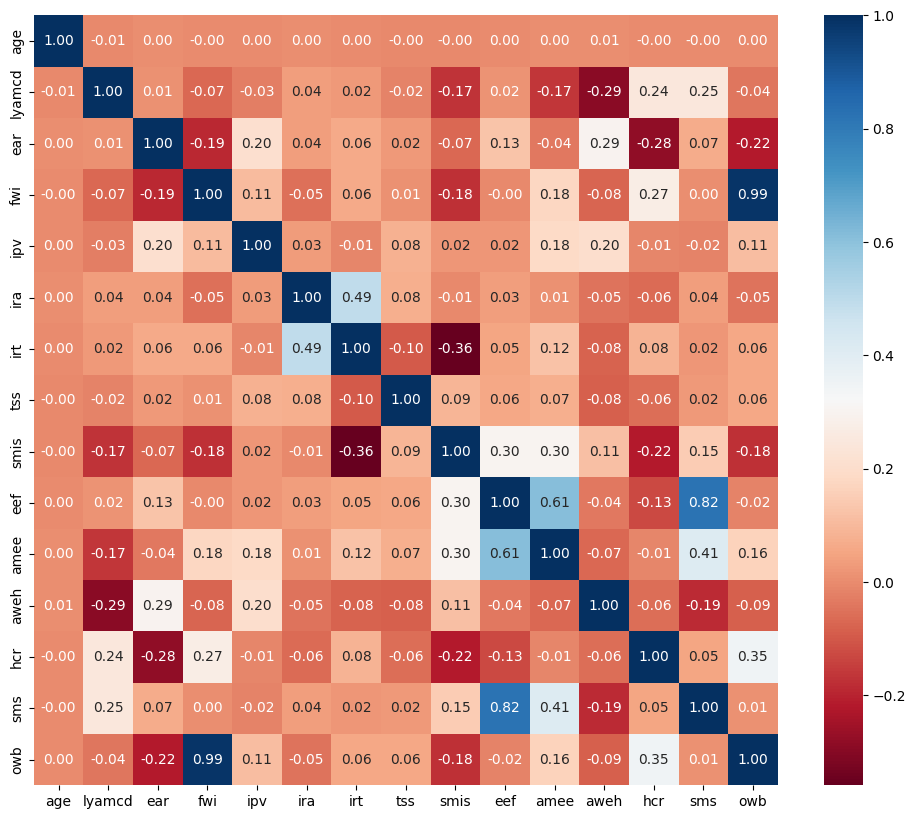

In [ ]:
#Plot the Spearman Correlation
plt.figure(figsize=(12,10))
sns.heatmap(data=cor_spearman, annot=True, cmap = plt.cm.RdBu, fmt='.2f')

In [ ]:
# - Spearman Correlation states that:
# owb and fwi are higly correlated (0.99)
# sms and eef are also higly correlated (0.82)

### <font color='#BFD72F'>3.1.2. ANOVA</font> <a class="anchor" id="reg"></a>

In [ ]:
# Define the Anova function
#the group ran the code with k=1, K=2 until K=n in order to create a ranking of variables
anova = SelectKBest(f_classif, k=8)

In [ ]:
# Fit to the numeric variables
# X_anova = anova.fit_transform(X_train[['age','cea', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']], y_train)~
X_anova = anova.fit_transform(X_train[['age','lyamcd','ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']], y_train)

In [ ]:
# Create a pd.series with the selected features
# selected_features = pd.Series(anova.get_support(), index = X_train[['age','cea', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']].columns)
selected_features = pd.Series(anova.get_support(), index = X_train[['age','lyamcd','ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']].columns)

selected_features

age       False
lyamcd     True
ear        True
fwi       False
ipv       False
ira       False
irt       False
tss        True
smis       True
eef       False
amee       True
aweh       True
hcr        True
sms        True
owb       False
dtype: bool

In [ ]:
#ANOVA states that:
# #ANOVA states that:
# 1 aweh      # 2 smis    # 3 ear
# 4 lyamcd    # 5 amee    # 6 hcr
# 7 sms       # 8 tss     # 9 ipv
# 10 irt      # 11 eef    # 12 ira
# 13 owb      # 14 fwi    # 15 age
#--->> these is the ranking acording to anova

### <font color='#BFD72F'>3.1.3. Chi-Squared Score</font> <a class="anchor" id="reg"></a>


In [ ]:
##Define X_Chi with the categorical variables and y_Chi with the target
X_chi = X_train[['gender_M']]
y_chi = y_train

In [ ]:
#check the results for 'gender_M.'
chi2_contingency(pd.crosstab(y_chi, X_chi['gender_M']))[1]

0.020243978278258586

In [ ]:
#For Loop and If condition to define if we should keep the variable or not based on their probabilities
chi2_check = []

for i in X_chi.columns:
    # chi2 statistic

    if chi2_contingency(pd.crosstab(y_chi, X_chi[i]))[1] < 0.05: # if p-value < 0.05, reject H0, keep feature
        chi2_check.append('Keep Feature')
    else:
        chi2_check.append('Discard Feature')

res = pd.DataFrame(data = [X_chi.columns, chi2_check]).T
res.columns = ['Column', 'Suggestion']
res

Column    Suggestion
0  gender_M  Keep Feature

## <font color='#BED62F'>3.2. Wrapper Methods </font> <a class="anchor" id="colab">

### <font color='#BFD72F'>3.2.1. RFE</font> <a class="anchor" id="reg"></a>

In [ ]:
# model = LogisticRegression()
model = RandomForestClassifier()

In [ ]:
# using nr of features to select as 1, in order to make the ranking in next step
rfe = RFE(estimator = model, n_features_to_select = 1)

In [ ]:
# Step 21
# X_rfe = rfe.fit_transform(X = X_train[['age','cea', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']], y = y_train)

X_rfe = rfe.fit_transform(X = X_train[['age','lyamcd','ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']], y = y_train)
X_rfe

array([[0.19540693],
       [0.18875258],
       [0.20119642],
       ...,
       [0.27513904],
       [0.2226345 ],
       [0.49065028]])

In [ ]:
# Step 22
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
# Step 23
rfe.ranking_

array([14, 15,  6,  1,  9, 13,  8, 12,  3, 11,  7,  2,  4, 10,  5])

In [ ]:
# selected_features = pd.Series(rfe.support_, index = X_train[['age','cea', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']].columns)
selected_features = pd.Series(rfe.support_, index = X_train[['age','lyamcd','ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']].columns)
selected_features

age       False
lyamcd    False
ear       False
fwi        True
ipv       False
ira       False
irt       False
tss       False
smis      False
eef       False
amee      False
aweh      False
hcr       False
sms       False
owb       False
dtype: bool

In [ ]:
#RFE for Random Forest states that:
# 1 fwi       # 2 aweh      # 3 smis
# 4 hcr       # 5 owb       # 6 ear
# 7 amee      # 8 irt       # 9 ipv
# 10 sms      # 11 eef      # 12 tss
# 13 ira      # 14 age      # 15 lyamcd

## <font color='#BED62F'>3.3. Embedded Methods </font> <a class="anchor" id="colab">

### <font color='#BFD72F'>3.3.1. Lasso Regression</font> <a class="anchor" id="reg"></a>

In [ ]:
#Step 25
reg = LassoCV(cv=10, random_state=21)

In [ ]:
# #Step 26
# reg.fit(X_train[['age','cea', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']], y_train)
#Step 26
reg.fit(X_train[['age','lyamcd','ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']], y_train)

LassoCV(cv=10, random_state=21)

In [ ]:
# coef = pd.Series(reg.coef_, index = X_train[['age','cea', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']].columns)

coef = pd.Series(reg.coef_, index = X_train[['age','lyamcd','ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']].columns)
coef.sort_values()

aweh     -4.799573
eef      -2.501403
ear      -1.503200
fwi      -0.702110
sms      -0.509714
ira      -0.334814
hcr      -0.297437
age      -0.029542
owb      -0.000000
lyamcd    0.322415
irt       0.572845
ipv       0.844253
smis      1.084779
tss       2.377709
amee      3.109185
dtype: float64

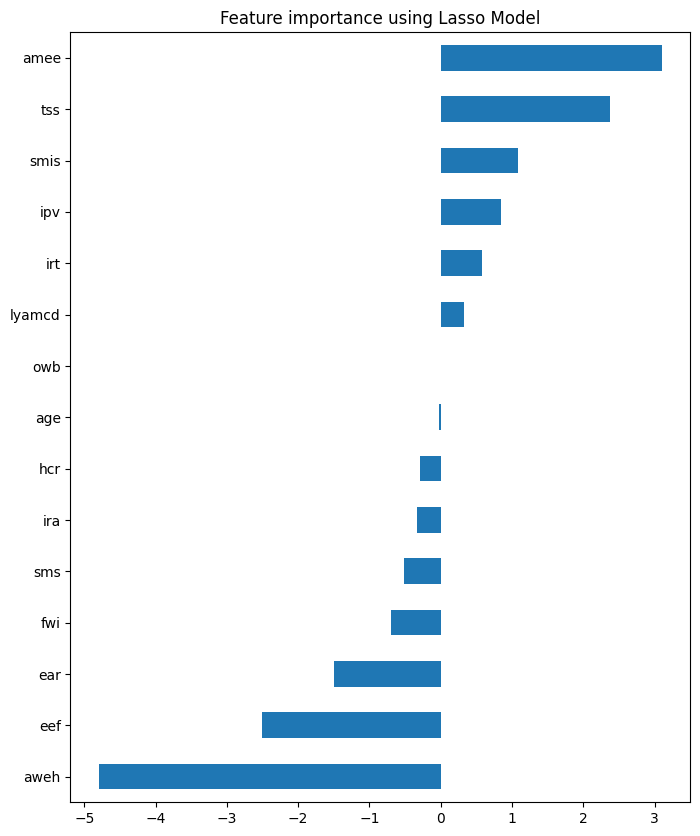

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

plot_importance(coef,'Lasso')

In [ ]:
#Lasso Regression states that:
# owb and age should be removed

## <font color='#BED62F'>3.4. Drop Collumns </font> <a class="anchor" id="colab">

Rememering the Decisions from Spearman Correlation, ANOVA, Chi-Squared, RFE and Lasso Regression

In [ ]:
# - Spearman Correlation states that:
# owb and fwi are higly correlated (0.98)
# sms and eef are also higly correlated (0.82)
#--------------------------------------------------

# - ANOVA states that:
# 1 aweh      # 2 smis    # 3 ear
# 4 lyamcd    # 5 amee    # 6 hcr
# 7 sms       # 8 tss     # 9 ipv
# 10 irt      # 11 eef    # 12 ira
# 13 owb      # 14 fwi    # 15 age
#--->> these is the ranking acording to anova
#------------------------------------------------------

# - CHI-SQUARED states to keep gender_M

#------------------------------------------------------

# - RFE for Random Forest states that:
# 1 fwi       # 2 aweh      # 3 smis
# 4 hcr       # 5 owb       # 6 ear
# 7 amee      # 8 irt       # 9 ipv
# 10 sms      # 11 eef      # 12 tss
# 13 ira      # 14 age      # 15 lyamcd

#--------------------------------------------------------

# - Lasso Regression states that:
# owb and age should be removed

Final decision:

In [ ]:
#Drop the collumns as per the rankings of the feature selection methods (Spearman, ANOVA and Chi-Squared)
# X_train.drop(columns=['fwi', 'ira', 'irt','eef', 'owb', 'cea', 'title_Mr.', 'title_Ms.', 'title_Mrs.'], inplace=True)
X_train.drop(columns=['eef','age','owb'], inplace=True) #- Score: 0.78506

In [ ]:
#Repeat the code for the test dataset
# X_test.drop(columns=['fwi', 'ira', 'irt','eef', 'owb', 'cea', 'title_Mr.', 'title_Ms.', 'title_Mrs.'], inplace=True)
X_test.drop(columns=['eef','age','owb'], inplace=True)

redefine data

In [ ]:
data = X_train.loc[:]

#<b><font size="6" color="#BED62F">5. ML training</font></b>


## <font color='#BED62F'>5.1. Logistics Regression</font> <a class="anchor" id="colab"></a>

In [ ]:
#model_LR = LogisticRegression()

In [ ]:
# Define run_model_LR function to train the LR model
#def run_model_LR(X, y):
#    model = model_LR
#    model.fit(X_train, y_train)
#    return model

In [ ]:
# Define evaluate_model function to make predictions and get the F1 score and the other metrics
#def evaluate_model(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#def avg_score_LR(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
#
#        # Train the model
#        model = run_model_LR(X_train, y_train)
#
#        # Evaluate the model
#        value_train = evaluate_model(X_train, y_train, model)
#        value_val = evaluate_model(X_val, y_val, model)
#
#        score_train.append(value_train)
#        score_val.append(value_val)
#
#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
# Cross validation
#kf = KFold(n_splits=10, shuffle=True, random_state=21)

In [ ]:
#avg_score_LR(kf, X_train, y_train)

Train Score: 0.6366113731738116
Validation Score: 0.6365929192142319


In [ ]:
# Train model
#model_LR = run_model_LR(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, model_LR)
#print('Test Score:', y_pred)

Test Score: 0.6365825766068343


Trying with OneVsRestClassifier from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
#from sklearn.multiclass import OneVsRestClassifier
#model_LR = OneVsRestClassifier(LogisticRegression(solver='liblinear', max_iter=1000))

In [ ]:
#avg_score_LR(kf, X_train, y_train)

Train Score: 0.6336074921602428
Validation Score: 0.6335931873348876


In [ ]:
#model_LR = run_model_LR(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, model_LR)
#print('Test Score:', y_pred)

Test Score: 0.6331068782919549


## <font color='#BED62F'>5.2. Gaussian Naive Bayes</font> <a class="anchor" id="colab"></a>

In [ ]:
#modelNB = GaussianNB()

In [ ]:
# Define run_model_NB function to train the LR model
#def run_model_NB(X, y):
#    model = modelNB
#    model.fit(X_train, y_train)
#    return model

In [ ]:
# Define evaluate_model function to make predictions and get the F1 score and the other metrics
#def evaluate_model(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
# Function to perform cross-validation and average the performance metrics
#def avg_score_NB(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#        # Train the model
#        model = run_model_NB(X_train, y_train)

#        # Evaluate the model
#        value_train = evaluate_model(X_train, y_train, model)
#        value_val = evaluate_model(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
# Cross validation
#kf = KFold(n_splits=10, shuffle=True, random_state=21)

In [ ]:
#avg_score_NB(kf, X_train, y_train)

Train Score: 0.6091234811736536
Validation Score: 0.6091010673211567


In [ ]:
# Run the model
#modelNB = run_model_NB(X_train, y_train)


In [ ]:
#y_pred = evaluate_model(X_test, y_test, model_LR)
#print('Test Score:', y_pred)

Test Score: 0.6331068782919549


The results of Naive Bayes were not so good but it is understandable because we are not seeing a normal distribution in our variables.
In relation to the other Naive Bayes algorithms, we will not use them because:
            - Multinomial NB only works for categorical variables and our variables are continuous
            - Bernoulli works for binary variables

## <font color='#BED62F'>5.3. Instance Based Classifiers

### <font color='#BED62F'>5.3.1. KNN Classifier</font> <a class="anchor" id="colab"></a>


In [ ]:
#Defining the KNN model - by default it is 5 nearest neighbours and metric minkowski to get a starting point
#modelKNN = KNeighborsClassifier()

In [ ]:
# Defining a funtion that runs the model
#def run_model_KNN(X, y):
#    model = modelKNN
#    model.fit(X_train, y_train)
#    return model

In [ ]:
# Defining a funtion that evaluates the model
#def evaluate_model(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#Defining the cross validation
#def avg_score_KNN(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#        # Train the model
#        model = run_model_KNN(X_train, y_train)

#        # Evaluate the model
#        value_train = evaluate_model(X_train, y_train, model)
#        value_val = evaluate_model(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
# Number of folds
#kf = KFold(n_splits=10, shuffle=True, random_state=21)

In [ ]:
#Run the cross valuation and evaluation of train and val scores
#avg_score_KNN(kf, X_train, y_train)

Train Score: 0.7745271390638166
Validation Score: 0.7745293074118473


In [ ]:
# Run model
#modelKNN = run_model_KNN(X_train, y_train)

In [ ]:
#Evaluate the test score
#y_pred = evaluate_model(X_test, y_test, modelKNN)
#print('Test Score:', y_pred)

Test Score: 0.6768945426547694


Suggests overfitting he model

Testing different parameters with different values:
- n_neighbors, weights and metric (change the code accordingly with the parameters to test)

In [ ]:
#modelKNN = KNeighborsClassifier(n_neighbors=1)
# modelKNN = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='manhattan')
# modelKNN = KNeighborsClassifier(n_neighbors=15, metric='manhattan')

# Note: 1) A small number of neighbors generally leads to overfitting;
# 2) A big number of neighbors generally leads to underfitting.
# The Goal is always to find a Balance

In [ ]:
# Number of folds
#kf = KFold(n_splits=10, shuffle=True, random_state=21)

In [ ]:
#avg_score_KNN(kf, X_train, y_train)

Train Score: 1.0
Validation Score: 1.0


In [ ]:
# Train model
#modelKNN = run_model_KNN(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, modelKNN)
#print('Test Score:', y_pred)

Test Score: 0.6302882053976401


Using grid search ro find best hyperparameters

In [ ]:
# from sklearn.model_selection import GridSearchCV

# modelKNN_grid = KNeighborsClassifier()
# parameters = {'n_neighbors': [10, 20, 30, 40],
#               'metric':['manhattan', 'minkowski']
#               }

# # Use GridSearchCV to find the best k
# grid = GridSearchCV(modelKNN_grid, parameters)
# grid.fit(X_train, y_train)

In [ ]:
# grid.cv_results_

In [ ]:
# grid.best_estimator_

In [ ]:
##KNN Grid search best parameters
#KNeighborsClassifier(metric='manhattan', n_neighbors=20

In [ ]:
#modelKNN = KNeighborsClassifier(metric='manhattan', n_neighbors=20)

In [ ]:
# Number of folds
#kf = KFold(n_splits=10, shuffle=True, random_state=21)

In [ ]:
#avg_score_KNN(kf, X_train, y_train)

In [ ]:
# Train model
#modelKNN = run_model_KNN(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, modelKNN)
#print('Test Score:', y_pred)

Test Score: 0.7138172400136494


### <font color='#BED62F'>5.3.2. Ball Tree</font> <a class="anchor" id="colab"></a>

In [ ]:
#from sklearn.neighbors import BallTree
# Step 19: Using BallTree, create an instance called btree, using X_train.
#btree = BallTree(X_train)

In [ ]:
# Step 20: Query the tree for k=5 nearest neighbors.
#btree.query(X_train, k=5, return_distance=False)

array([[    0, 19307, 49157,  2356, 22505],
       [    1, 38515, 32880, 13588, 67215],
       [    2, 20436, 38646, 38779,  2278],
       ...,
       [72129, 37926, 61056, 11066, 36917],
       [72130, 29827,  7566, 24832, 58125],
       [72131, 23955, 59311, 16947, 35948]])

In [ ]:
# Step 20.1: Check if the first datapoints are close.(alterar para os primeiros pontos que aparecem em cima deste codigo)
#X_train.iloc[[0, 9265, 26670, 17983, 55943]]

lyamcd       ear       fwi       ipv       ira       irt  \
citizen_id                                                             
32007          0.0  0.062129  0.196954  0.024145  0.329380  0.000000   
30609          0.0  0.063753  0.041797  0.016197  0.238687  0.088092   
51554          0.0  0.063482  0.210300  0.034352  0.632510  0.000000   
82165          0.0  0.071153  0.198442  0.027954  0.614469  0.029584   
33155          0.0  0.052871  0.194770  0.018410  0.523744  0.090213   

                 tss      smis      amee      aweh      hcr       sms  \
citizen_id                                                              
32007       0.335121  0.208361  0.092255  0.000000  0.06141  0.214447   
30609       0.287553  0.230319  0.065204  0.009418  0.05777  0.240170   
51554       0.366664  0.191204  0.131595  0.000000  0.05984  0.230465   
82165       0.350895  0.274036  0.069360  0.003442  0.06298  0.217738   
33155       0.316949  0.214427  0.127940  0.000000  0.05972  0.175196   

            gender_M  
citizen_id            
32007          False  
30609          False  
51554          False  
82165          False  
33155          False

In [ ]:
# Step 21: Check the neighbors using NearestNeighbors(), an unsupervised learner for implementing neighbor searches.
#nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X_train)
#nbrs.kneighbors(X_train)[1]

array([[    0, 19307, 49157,  2356, 22505],
       [    1, 38515, 32880, 13588, 67215],
       [    2, 20436, 38646, 38779,  2278],
       ...,
       [72129, 37926, 61056, 11066, 36917],
       [72130, 29827,  7566, 24832, 58125],
       [72131, 23955, 59311, 16947, 35948]])

### <font color='#BED62F'>5.3.3. KD Tree </font> <a class="anchor" id="colab"></a>

In [ ]:
# Step 22: Check the 5 nearest neighbors using NearestNeighbors(), with algorithm='kd_tree', and compare with the previous.
#nbrs = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(X_train)
#dist, ind = nbrs.kneighbors(X_train)
#ind

array([[    0, 19307, 49157,  2356, 22505],
       [    1, 38515, 32880, 13588, 67215],
       [    2, 20436, 38646, 38779,  2278],
       ...,
       [72129, 37926, 61056, 11066, 36917],
       [72130, 29827,  7566, 24832, 58125],
       [72131, 23955, 59311, 16947, 35948]])

## <font color='#BED62F'>5.4. Decision Trees </font> <a class="anchor" id="colab"></a>

In [ ]:
# Defining the Decision tree with default parameters to get a starting point
#modelDT = DecisionTreeClassifier()

In [ ]:
# # Process a decision tree graph using Graphviz (time consuming)
# dot_data = tree.export_graphviz(modelDT,
#                                 out_file=None,
#                                 feature_names=X_train.columns,
#                                 class_names=["0", "1", "2", "3", "4"],
#                                 filled=True,
#                                 rounded=True,
#                                 special_characters=True)
# graph = graphviz.Source(dot_data)
# graph

In [ ]:
#def run_model_DT(X_train, y_train):
#    model = modelDT  # Initialize the Decision tree Classifier
#    model.fit(X_train, y_train)  # Train the model
#    return model

In [ ]:
#def evaluate_model(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#def avg_score_DT(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test
#
#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#        # Train the model
#        model = run_model_DT(X_train, y_train)

        # Evaluate the model
#        value_train = evaluate_model(X_train, y_train, model)
#        value_val = evaluate_model(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#avg_score_DT(kf, X_train, y_train)

Train Score: 1.0
Validation Score: 0.6631002692812807


In [ ]:
#modelDT = run_model_DT(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, modelDT)
#print('Test Score:', y_pred)

Test Score: 0.6711486073804198


In [ ]:
#modelDT.feature_importances_

array([0.01193198, 0.0670733 , 0.12779292, 0.07597614, 0.04301505,
       0.07558255, 0.04205303, 0.14768333, 0.06155998, 0.18635563,
       0.09598142, 0.06075401, 0.00424066])

In [ ]:
#def plot_feature_importances(model,DF):
#    n_features = DF.shape[1]
#    plt.figure(figsize=(5,3))
#    plt.barh(range(n_features), model.feature_importances_, color='yellowgreen')
#    plt.yticks(np.arange(n_features), DF.columns)
#    plt.xlabel("Feature importance")
#    plt.ylabel("Feature")
#    plt.title('Feature Importance in Decision Tree Classifier')
#    plt.show()

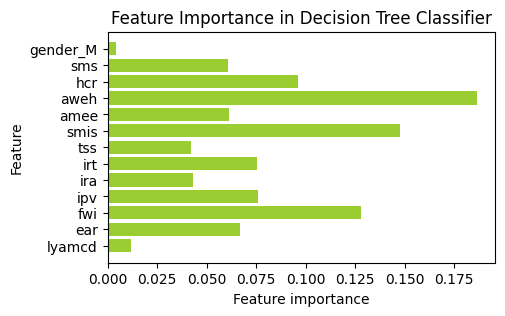

In [ ]:
#plot_feature_importances(modelDT,X_train)

In [ ]:
#scores_train = []
#scores_test = []
#for i in range(5,10):
#    DTC = DecisionTreeClassifier(max_depth=i)
#    DTC.fit(X_train, y_train)
#    scores_train.append(DTC.score(X_train, y_train))
#    scores_test.append(DTC.score(X_test, y_test))

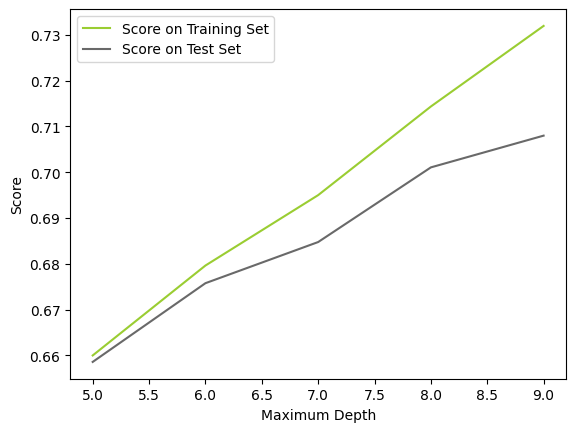

In [ ]:
#plt.plot(list(range(5,10)), scores_train, label="Score on Training Set", color='yellowgreen')
#plt.plot(list(range(5,10)), scores_test, label="Score on Test Set", color='dimgray')
#plt.xlabel("Maximum Depth")
#plt.ylabel("Score")
#plt.legend()
#plt.show()

Conclusion
Increasing the depth leads to increase of score in train and test dataset, up to a certain point, then it overfits
Deciding how to prune



In [ ]:
#def cross_validation(X, y, model, method):
#  score_train = []
#  score_val = []

  # Method: KFold
#  for train_index, val_index in method.split(X,y):

#    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#    # Fit train, predict on train and val
#    model.fit(X_train, y_train)
#    train_pred = model.predict(X_train)
#    val_pred = model.predict(X_val)

#    # Calculate weighted F1 score
#    value_train = f1_score(train_pred, y_train, average = 'weighted')
#    value_val = f1_score(val_pred, y_val, average = 'weighted')

#    # Append it to score lists
#    score_train.append(value_train)
#    score_val.append(value_val)

#  return np.mean(score_train), np.mean(score_val)

In [ ]:
#from sklearn.model_selection import StratifiedKFold
#import random
#from tqdm import tqdm


#Initialize random seed to make results reproducible
#random.seed(21)

# #Set parameters grid

#param_grid = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [15, 20, 25],
#    'min_samples_split': [60, 70, 80],
#    'min_samples_leaf': [60, 70, 80],
#    'class_weight': ['balanced']
#}


# # List to store results
#result = []

# # How many different sets of parameters we will try
#num_iterations = 40

# # Splits in cross-validation
#kf = StratifiedKFold(n_splits=10)

#for i in tqdm(range(num_iterations)):

#    # Choose random parameters from parameters grid
#    random_params = {}
#    for key, values in param_grid.items():
#        random_params[key] = random.choice(values)

#    # Define model and set parameters
#    model = DecisionTreeClassifier()
#    model.set_params(**random_params)

#    train_f1, val_f1 = cross_validation(X_train, y_train, model, kf)

#    result.append([train_f1, val_f1, list(random_params.values())])


100%|██████████| 40/40 [11:37<00:00, 17.45s/it]


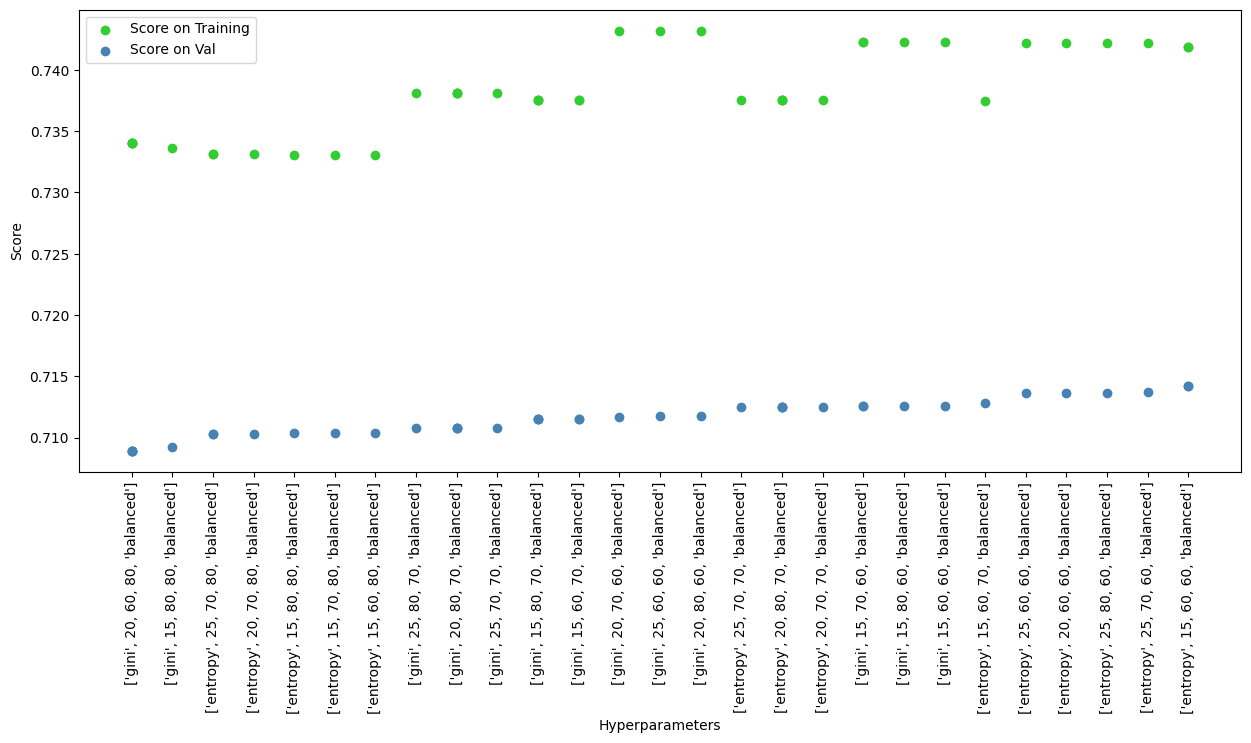

In [ ]:
#scores = pd.DataFrame(result, columns = ['Score_Train', 'Score_Val', 'Parameters']).sort_values('Score_Val')
#plt.figure(figsize=(15,6))
#plt.scatter(scores['Parameters'].astype(str), scores['Score_Train'], label="Score on Training", color='limegreen')
#plt.scatter(scores['Parameters'].astype(str), scores['Score_Val'], label="Score on Val", color='steelblue')
#plt.xlabel("Hyperparameters")
#plt.ylabel("Score")
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()

Make the predictions based on the plot

In [ ]:
##
#modelDT = DecisionTreeClassifier(class_weight = 'balanced',
#                               criterion = 'entropy',
#                               max_depth = 15,
#                               min_samples_split=60,
#                               min_samples_leaf=70)

In [ ]:
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#avg_score_DT(kf, X_train, y_train)

Train Score: 0.7378219468518206
Validation Score: 0.7133305690000513


In [ ]:
#modelDT = run_model_DT(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, modelDT)
#print('Test Score:', y_pred)

Test Score: 0.7182163111663006


Conclusion, balanced model with decent results

## <font color='#BED62F'>5.5. Bagging</font> <a class="anchor" id="colab"></a>

**Create an Instance with the default parameters**

In [ ]:
#modelDT = DecisionTreeClassifier()

**Apply bagging using the same model to get a starting point**

In [ ]:
#Create an Instance using the previous model as base_estimator, and the remaining parameters as default.
#bagging_DT = BaggingClassifier(base_estimator = modelDT)

In [ ]:
#def run_model_bagging_DT(X_train, y_train):
#    model = bagging_DT  # Initialize the Decision tree Classifier
#    model.fit(X_train, y_train)  # Train the model
#    return model

In [ ]:
#def evaluate_model(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#def avg_score_bagging_DT(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#        # Train the model
#        model = run_model_bagging_DT(X_train, y_train)

#        # Evaluate the model
#        value_train = evaluate_model(X_train, y_train, model)
#        value_val = evaluate_model(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#avg_score_bagging_DT(kf, X_train, y_train)

Train Score: 0.987573657320846
Validation Score: 0.7467757514799223


In [ ]:
#bagging_DT = run_model_bagging_DT(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, bagging_DT)
#print('Test Score:', y_pred)

Test Score: 0.745034699220559


**Attributes in Bagging Classifier**

In [ ]:
#Use the .estimators_ attribute to obtain a list of the fitted base estimators.
#bagging_DT.estimators_

[DecisionTreeClassifier(random_state=763855283),
 DecisionTreeClassifier(random_state=1334533819),
 DecisionTreeClassifier(random_state=1744558836),
 DecisionTreeClassifier(random_state=1496690359),
 DecisionTreeClassifier(random_state=1998295190),
 DecisionTreeClassifier(random_state=1919187268),
 DecisionTreeClassifier(random_state=1323284994),
 DecisionTreeClassifier(random_state=117327638),
 DecisionTreeClassifier(random_state=1245831181),
 DecisionTreeClassifier(random_state=311648723)]

In [ ]:
#Use the .estimators_samples_ attribute to obtain the subset of drawn samples for each base estimator.
#bagging_DT.estimators_samples_

[array([27312, 16089, 54213, ..., 20835, 70318, 44687]),
 array([51723, 34054, 23585, ..., 28799, 60438, 52300]),
 array([58592, 19914, 37782, ..., 20320, 22289, 70861]),
 array([11516, 51000, 27907, ..., 10247, 38197, 40542]),
 array([ 4467,  2168, 46982, ..., 67444, 14719, 10885]),
 array([31044, 58806, 31636, ..., 25911, 47908, 16189]),
 array([15890, 52624, 57035, ..., 47824, 29648, 12605]),
 array([18198, 53273, 47402, ..., 24813,  2053, 48265]),
 array([45138, 18622, 68339, ..., 42102, 10703, 58632]),
 array([64274, 11658, 64597, ..., 66403, 26651, 36059])]

**Parameters in Bagging Classifier**

In [ ]:
#Change the number of estimators used in the ensemble to 60 by setting n_estimators = 60. The default parameter is 10.
#bagging_DT_60 = BaggingClassifier(base_estimator = modelDT, n_estimators = 60, random_state = 21)

In [ ]:
#Use the .fit() method to fit the model to the array of points X_train and y_train.
#bagging_DT_60.fit(X = X_train, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=60,
                  random_state=21)

In [ ]:
#Change the number of samples used for each base estimator to half of the dataset by setting max_samples = 0.5. The default parameter is 1.0, so by default you use samples that have the same size as your dataset.
#bagging_DT_s = BaggingClassifier(base_estimator = modelDT, max_samples = 0.5, random_state = 21)

In [ ]:
#Use the .fit() method to fit the model to the array of points X_train and y_train.
#bagging_DT_s.fit(X = X_train, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  random_state=21)

In [ ]:
#Change the way samples are drawn by setting bootstrap = False. The default parameter is True, so samples are drawn with replacement.
#bagging_DT_b = BaggingClassifier(base_estimator = modelDT, bootstrap = False, random_state = 21)

In [ ]:
#Use the .fit() method to fit the model to the array of points X_train and y_train.
#bagging_DT_b.fit(X = X_train, y = y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  random_state=21)

**Visual Comparison of the models using the accuracy**

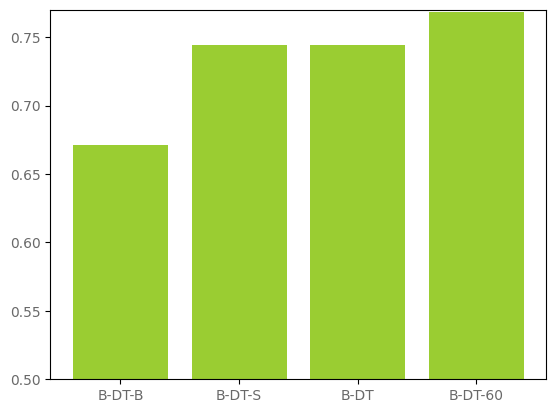

In [ ]:
#Create a bar plot showing the accuracy obtained by the different models built on the test set.
#accuracies = [bagging_DT.score(X_test, y_test), bagging_DT_60.score(X_test, y_test),
#              bagging_DT_s.score(X_test, y_test), bagging_DT_b.score(X_test, y_test)]
#models = ['B-DT', 'B-DT-60', 'B-DT-S', 'B-DT-B']
#data_tuples = list(zip(models,accuracies))
#data = pd.DataFrame(data_tuples)
#data = data.sort_values(1)
#plt.bar(data[0], data[1], color='yellowgreen')
#plt.xticks(color='dimgray')
#plt.yticks(color='dimgray')
#plt.ylim(0.5,0.77)
#plt.show()

In [ ]:
#now with the DT that provided good result
#modelDT = DecisionTreeClassifier(class_weight = 'balanced',
#                               criterion = 'entropy',
#                               max_depth = 15,
#                               min_samples_split=60,
#                               min_samples_leaf=70)

In [ ]:
#bagging_DT_final = BaggingClassifier(base_estimator = modelDT, n_estimators = 60, random_state = 21)

In [ ]:
#Define the number of folds in cross validation, include shuffle and random state
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#avg_score_bagging_DT(kf, X_train, y_train)

Train Score: 0.9874164293808141
Validation Score: 0.7457963104400701


In [ ]:
#bagging_DT_final = run_model_bagging_DT(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, bagging_DT_final)
#print('Test Score:', y_pred)

Test Score: 0.7468753228254325


## <font color='#BED62F'>5.6. Random Forests </font> <a class="anchor" id="colab"></a>

Explore Random Forest model

In [ ]:
#modelRF = RandomForestClassifier()

In [ ]:
#def run_model(X_train, y_train):
#    model = modelRF  # Initialize the Random Forest Classifier
#    model.fit(X_train, y_train)  # Train the model
#    return model

In [ ]:
#def evaluate_model(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#def avg_score(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#        # Train the model
#        model = run_model(X_train, y_train)

#        # Evaluate the model
#        value_train = evaluate_model(X_train, y_train, model)
#        value_val = evaluate_model(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
#Define the number of folds in cross validation, include shuffle and random state
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#Run avg_score
#avg_score(kf, X_train, y_train)

Train Score: 0.9999938384042754
Validation Score: 0.7749158156253892


In [ ]:
#modelRF = run_model(X_train, y_train)

In [ ]:
#evaluate the model with test data
#y_pred = evaluate_model(X_test, y_test, modelRF)
#print('Test Score:', y_pred)

Test Score: 0.7725815607421573


In [ ]:
#Conclusion - with no parameters there is a lot of overfitting
#train score - 0.9999922980940898
#Validation Score: 0.7709039108965471
#test score - 0.7674452496170664

#continue the Exploration

Use Grid Search and Cross Validation

In [ ]:
# from sklearn.model_selection import GridSearchCV
# modelRF_grid = RandomForestClassifier()
# parameters = {'n_estimators':[80, 84, 90],
#               'max_depth':[30, 35, 40]}

# #several combinations were tested, see below some results

In [ ]:
# grid = GridSearchCV(modelRF_grid, parameters)
# grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30, 35, 40],
                         'n_estimators': [80, 84, 90]})

In [ ]:
# grid.cv_results_

{'mean_fit_time': array([25.94318552, 25.23764172, 28.94872918, 29.63124671, 36.26805978,
        37.3136096 , 26.07046189, 23.28338766, 25.22447839]),
 'std_fit_time': array([ 2.11477529,  4.27080162,  5.77645766,  7.17376262, 10.62680202,
         9.40678118,  5.34719245,  0.61670835,  0.86629905]),
 'mean_score_time': array([0.47490463, 0.41676369, 0.50310183, 0.4581562 , 0.53490429,
        0.61514339, 0.40643959, 0.40050316, 0.38817019]),
 'std_score_time': array([0.16231447, 0.08962152, 0.18622046, 0.12978838, 0.1903294 ,
        0.27430388, 0.07812232, 0.03546155, 0.01752167]),
 'param_max_depth': masked_array(data=[30, 30, 30, 35, 35, 35, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[80, 84, 90, 80, 84, 90, 80, 84, 90],
              mask=[False, False, False, False, False, False, False, False,
                    F

In [ ]:
# grid.best_estimator_
### RandomForestClassifier(max_depth=35, n_estimators=90)

RandomForestClassifier(max_depth=35, n_estimators=90)

In [ ]:
##modelRF_best = RandomForestClassifier(max_depth=9, n_estimators=90)
#Train Score: 0.742492468203567
#Validation Score: 0.7210284314066453

# modelRF_best = RandomForestClassifier(max_depth=25, n_estimators=115)
# Train Score: 0.9926489912374707
# Validation Score: 0.778920205979712

# modelRF_best = RandomForestClassifier(max_depth=25, n_estimators=115)
# Train Score: 0.9999953788566204
# Validation Score: 0.779053971696382

In [ ]:
#based on the Best Estimator results from grid search
#+ additional hyperparameters to reduce overfitting based on scikit-learn.org
modelRF = RandomForestClassifier(max_depth=35, n_estimators=90, min_samples_split=10, min_samples_leaf=10)

In [ ]:
## repeat the same process as above to check the results with grid search
#def run_model_RF(X_train, y_train):
#    model = modelRF  # Initialize the Random Forest Classifier
#    model.fit(X_train, y_train)  # Train the model
#    return model

In [ ]:
#def evaluate_model(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#def avg_score_RF(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model
#        model = run_model_RF(X_train, y_train)

        # Evaluate the model
#        value_train = evaluate_model(X_train, y_train, model)
#        value_val = evaluate_model(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#avg_score_RF(kf, X_train, y_train)

Train Score: 0.8375037233625404
Validation Score: 0.7649502106544087


In [ ]:
#modelRF = run_model_RF(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, modelRF)
#print('Test Score:', y_pred)

Test Score: 0.7637984194504736


## <font color='#BED62F'>5.7. Boosting</font> <a class="anchor" id="colab"></a>

### <font color='#BED62F'>5.7.1. AdaBoost</font> <a class="anchor" id="colab"></a>

In [ ]:
# from sklearn.model_selection import GridSearchCV
# modelada_grid = AdaBoostClassifier()
# parameters = {'n_estimators': np.arange(10, 100, 20),  # Test values from 10 to 200 in steps of 20,
#               'learning_rate': np.linspace(0.01, 1.0, 15)}  # Test values from 0.01 to 1.0 in 10 steps

In [ ]:
# grid = GridSearchCV(modelada_grid, parameters)
# grid.fit(X_train, y_train)

In [ ]:
# grid.cv_results_

In [ ]:
# grid.best_estimator_

In [ ]:
# aboost = AdaBoostClassifier(learning_rate=0.5757142857142857, n_estimators=90)##time consuming

The group tried reducing the learning rate and increasing the number of estimators, but it is time consuming and did not improve signifficantly the results

In [ ]:
#since Random Forest provided the best test scores, we will use it as base learners firt by default
#aboost = AdaBoostClassifier(estimator=RandomForestClassifier())

In [ ]:
#def run_model_aboost(X_train, y_train):
#    model = aboost  # Initialize the Random Forest Classifier
#    model.fit(X_train, y_train)  # Train the model
#    return model

In [ ]:
#def evaluate_model(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#def avg_score_aboost(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#        # Train the model
#        model = run_model_aboost(X_train, y_train)

#        # Evaluate the model
#        value_train = evaluate_model(X_train, y_train, model)
#        value_val = evaluate_model(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#avg_score_aboost(kf, X_train, y_train)

Train Score: 1.0
Validation Score: 0.7750684777909693


In [ ]:
#aboost = run_model_aboost(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, aboost)
#print('Test Score:', y_pred)

Test Score: 0.7715131965521049


Now with the base learner RF with good results

In [ ]:
#modelRF_ab = RandomForestClassifier(max_depth=40, n_estimators=90, min_samples_split=10, min_samples_leaf=10)

In [ ]:
#aboost = AdaBoostClassifier(estimator=modelRF_ab)

In [ ]:
#avg_score_aboost(kf, X_train, y_train)

Train Score: 0.9690440556598281
Validation Score: 0.785698852522288


In [ ]:
#aboost_final = run_model_aboost(X_train, y_train)

In [ ]:
#y_pred = evaluate_model(X_test, y_test, aboost_final)
#print('Score:', y_pred)

Score: 0.7826833071639033


### <font color='#BED62F'>5.7.2. Gradient Boosting</font> <a class="anchor" id="colab"></a>

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import f1_score

# Create and fit the GBM model
#gbm_model = GradientBoostingClassifier()
#gbm_model.fit(X_train, y_train)

# Make predictions on the validation set
#y_predicted = gbm_model.predict(X_test)
#gbm_model.score(X_test, y_test)

0.7486829701103532

In [ ]:
# Calculate the F1 score
#f1_score(y_test, y_predicted, average='weighted')

0.7484447311153929

Parameter tuning

In [ ]:
#Took a long time running so we decided to go with other methods

#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import f1_score

# Define the parWameter grid to search
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'learning_rate': [0.1, 0.05, 0.01],
#    'max_depth': [3, 5, 7]
#}

# Create the GBM model
#gbm_model = GradientBoostingClassifier()

# Instantiate the grid search model
#grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=10, scoring='f1_macro')

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)

# Get the best parameters and best score
#best_params = grid_search.best_params_
#best_score = grid_search.best_score_

#print("Best parameters:", best_params)
#print("Best F1 score:", best_score)

# Create a GBM model with the best parameters
#best_gbm_model = GradientBoostingClassifier(**best_params)

# Fit the model to the training data
#best_gbm_model.fit(X_train, y_train)

# Predict on the test data
#test_predicted = best_gbm_model.predict(X_test)

# Calculate the F1 score on the validation data
#f1 = f1_score(y_test, test_predicted)

#print("F1 score:", f1)

## <font color='#BED62F'>5.8. Stacking </font> <a class="anchor" id="colab"></a>

In [ ]:
# group tried this parameters but very time consuming and did not improve results
# aboost = AdaBoostClassifier(n_estimators=90, learning_rate=0.5757142857142857, random_state=21)

#aboost = AdaBoostClassifier(estimator=RandomForestClassifier())
# modelRF = RandomForestClassifier(max_depth=40, n_estimators=90, min_samples_split=10, min_samples_leaf=10)
#modelRF_st = RandomForestClassifier()

In [ ]:
#from sklearn.ensemble import StackingClassifier
#base_learners = [('adb',aboost), ('rdf',modelRF_st)]
#stacked_adb_rdf = StackingClassifier(estimators=base_learners)

In [ ]:
#def run_model_stacked_adb_rdf(X_train, y_train):
#    model = stacked_adb_rdf  # Initialize the Stacking
#    model.fit(X_train, y_train)  # Train the model
#    return model

In [ ]:
#def evaluate_model_adb_rdf(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#def avg_score_stacked_adb_rdf(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#        # Train the model
#        model = run_model_stacked_adb_rdf(X_train, y_train)

#        # Evaluate the model
#        value_train = evaluate_model_adb_rdf(X_train, y_train, model)
#        value_val = evaluate_model_adb_rdf(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#avg_score_stacked_adb_rdf(kf, X_train, y_train)

In [ ]:
#model_stacking_adb_rdf = run_model_stacked_adb_rdf(X_train, y_train)

In [ ]:
#y_pred = evaluate_model_adb_rdf(X_test, y_test, model_stacking_adb_rdf)
#print('Test Score:', y_pred)

Now with final estimator Dt

In [ ]:
#Set DT with the hyperparameters that provided a good score previously - 4h +/- to run
# modelDT_st = DecisionTreeClassifier(class_weight = 'balanced',
#                                criterion = 'entropy',
#                                max_depth = 15,
#                                min_samples_split=60,
#                                min_samples_leaf=70)
#modelDT_st = DecisionTreeClassifier()

In [ ]:
#stacked_meta_dt = StackingClassifier(estimators=base_learners, final_estimator=modelDT_st)

In [ ]:
#def run_model_stacked_meta_dt(X_train, y_train):
#    model = stacked_meta_dt  # Initialize the Stacking meta
#    model.fit(X_train, y_train)  # Train the model
#    return model

In [ ]:
#def evaluate_model_meta_dt(X, y, model):
#    y_pred = model.predict(X)  # Predict the labels
#    return f1_score(y, y_pred, average='weighted')  # Return the weighted F1 score

In [ ]:
#def avg_score_stacked_meta_dt(method, X, y):
#    score_train = []
#    score_val = []  # More accurate term than score_test

#    for train_index, val_index in method.split(X):
#        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model
#        model = run_model_stacked_meta_dt(X_train, y_train)

#        # Evaluate the model
#        value_train = evaluate_model_meta_dt(X_train, y_train, model)
#        value_val = evaluate_model_meta_dt(X_val, y_val, model)

#        score_train.append(value_train)
#        score_val.append(value_val)

#    print('Train Score:', np.mean(score_train))
#    print('Validation Score:', np.mean(score_val))

In [ ]:
#kf = KFold(n_splits=10, shuffle = True, random_state=21)

In [ ]:
#avg_score_stacked_meta_dt(kf, X_train, y_train)

In [ ]:
#model_stacking_meta_dt = run_model_stacked_meta_dt(X_train, y_train)

In [ ]:
#y_pred = evaluate_model_meta_dt(X_test, y_test, model_stacking_meta_dt)
#print('Test Score:', y_pred)

## <font color='#BED62F'>5.9. Neural Networks </font> <a class="anchor" id="colab"></a>

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
def avg_score(model, number_splits):

    # create lists to store the results from the different neural networks
    score_train = []
    score_test = []
    timer = []
    n_iter = []

    # apply kfold with the pre-defined number_splits
    kf = KFold(n_splits=number_splits)

    for train_index, test_index in kf.split(data):

        # get the indexes of the observations assigned for each partition
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        #---> start counting time
        begin = time.perf_counter()

        # fit the model to the data
        model.fit(X_train, y_train)

        #---> finish counting time
        end = time.perf_counter()

        # check the mean accuracy for the train
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_test,y_test)

        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)

    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    ### AVG
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    avg_iter = round(np.mean(n_iter),1)
    ### STD
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    std_iter = round(np.std(n_iter),1)

    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test), str(avg_iter) + '+/-' + str(std_iter)

In [ ]:
def show_results(df, *args, number_splits):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_test, avg_iter = avg_score(arg, number_splits)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_test, avg_iter
        count+=1
    return df

In [ ]:
model = MLPClassifier()
df = pd.DataFrame(columns = ['Time','Train','Test', 'Iterations'], index = ['Raw'])
show_results(df, model, number_splits=10)

Time        Train         Test    Iterations
Raw  62.409+/-14.44  0.237+/-0.0  0.201+/-0.0  149.9+/-33.9

Randomized search

In [ ]:
#parameter_space = {
#    'hidden_layer_sizes': [(50,50,50), (100,)],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]
#}

In [ ]:
#clf = RandomizedSearchCV(model, parameter_space)

In [ ]:
# takes like 2h30 to run
#clf.fit(X_train, y_train)

In [ ]:
#clf.best_params_

In [ ]:
#final_model = clf.best_estimator_.fit(X_train, y_train)
#print('Train:', final_model.score(X_train, y_train))
#print('Test:', final_model.score(X_test, y_test))

In [ ]:
final_model = mlp_classifier = MLPClassifier(
    solver='adam',
    learning_rate_init=0.001,
    hidden_layer_sizes=(50, 50, 50),
    activation='tanh'
)
final_model.fit(X_train, y_train)
print('Train:', final_model.score(X_train, y_train))
print('Test:', final_model.score(X_test, y_test))

Train: 0.807547274441302
Test: 0.785337991460101


## <font color='#BED62F'>5.10. Support Vector Machines </font> <a class="anchor" id="colab"></a>

In [ ]:
#from sklearn.svm import SVC
#svc = SVC()
#svc.fit(X_train, y_train)
#pred_svc = svc.predict(X_test)
#print(classification_report(y_test, pred_svc))


              precision    recall  f1-score   support

           0       0.67      0.68      0.67      3601
           1       0.69      0.64      0.66      3606
           2       0.69      0.64      0.67      3626
           3       0.71      0.78      0.74      3612
           4       0.86      0.88      0.87      3588

    accuracy                           0.72     18033
   macro avg       0.72      0.73      0.72     18033
weighted avg       0.72      0.72      0.72     18033



## <font color='#BED62F'>5.13. Models comparison </font> <a class="anchor" id="colab"></a>

The plot will be displayed and explained in the report

In [ ]:
# f1_test = [evaluate_model(X_test, y_test, model_LR),
#            evaluate_model(X_test, y_test, modelNB),
#            evaluate_model(X_test, y_test, modelKNN),
#            evaluate_model(X_test, y_test, modelDT),
#            evaluate_model(X_test, y_test, bagging_DT_final),
#            evaluate_model(X_test, y_test, modelRF),
#            evaluate_model(X_test, y_test, aboost),
#            evaluate_model(X_test, y_test, gbm_model),
#            evaluate_model(X_test, y_test, model_stacking_adb_rdf),
#            evaluate_model(X_test, y_test, model_stacking_meta_dt),
#            evaluate_model(X_test, y_test, svc),
#            evaluate_model(X_test, y_test, final_model)]
# f1_train = [evaluate_model(X_train, y_train, model_LR),
#            evaluate_model(X_train, y_train, modelNB),
#            evaluate_model(X_train, y_train, modelKNN),
#            evaluate_model(X_train, y_train, modelDT),
#            evaluate_model(X_train, y_train, bagging_DT_final),
#            evaluate_model(X_train, y_train, modelRF),
#            evaluate_model(X_train, y_train, aboost),
#            evaluate_model(X_test, y_test, gbm_model),
#            evaluate_model(X_test, y_test, model_stacking_adb_rdf),
#            evaluate_model(X_test, y_test, model_stacking_meta_dt),
#            evaluate_model(X_test, y_test, svc),
#            evaluate_model(X_test, y_test, final_model)]

# models = ['LR', 'NB', 'KNN', 'DT', 'B-DT', 'RF', 'AB', 'GBM', 'ST-AR', 'ST-MDT', 'SVC', 'FINAL-NN']
# data_tuples = list(zip(models,f1_test))
# data_test = pd.DataFrame(data_tuples)
# data_tuples_train = list(zip(models,f1_train))
# data_train = pd.DataFrame(data_tuples_train)

In [ ]:
# plt.figure(figsize=(10,5))
# ax = plt.subplot(111)
# ax.bar(data_test.index - 0.4/2, data_test[1], width=0.4, color='yellowgreen', label='Test f1')
# ax.bar(data_train.index + 0.4/2, data_train[1],  width=0.4, color='dimgray', label='Train f1')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_title('Comparison of f1 scores for Test and Train Data', fontsize=12)
# plt.xticks(np.arange(len(models)), models)
# plt.show()

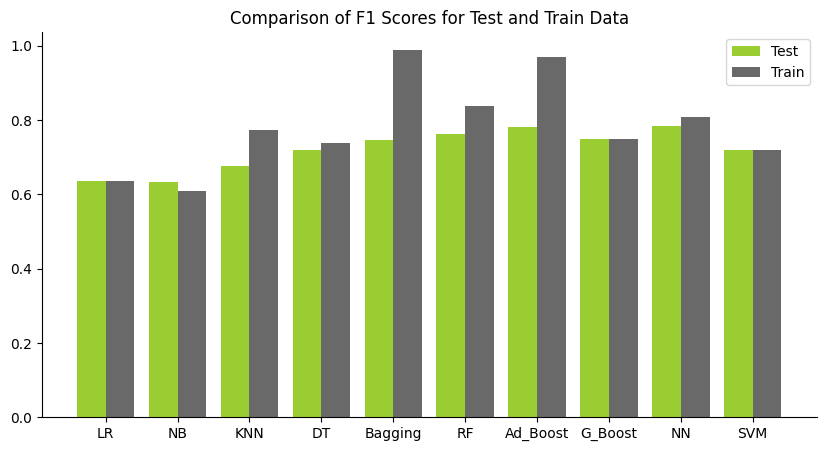

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the model names and F1 scores for both train and test datasets
models = ['LR', 'NB', 'KNN', 'DT', 'Bagging', 'RF', 'Ad_Boost', 'G_Boost', 'NN', 'SVM']
train_scores = [0.6366, 0.6091, 0.7745, 0.7378, 0.9874, 0.8375, 0.9690, 0.7486, 0.8075, 0.72]
test_scores = [0.6365, 0.6331, 0.6768, 0.7182, 0.7468, 0.7637, 0.7826, 0.7484, 0.7853, 0.72]

# Convert the data to a format suitable for plotting
indices = np.arange(len(models))

# Plotting
plt.figure(figsize=(10, 5))
ax = plt.subplot(111)
ax.bar(indices - 0.4 / 2, test_scores, width=0.4, color='yellowgreen', label='Test')
ax.bar(indices + 0.4 / 2, train_scores, width=0.4, color='dimgray', label='Train')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of F1 Scores for Test and Train Data', fontsize=12)
plt.xticks(indices, models)
ax.legend()

# Display the plot
plt.show()


# <font color='#BFD72F'> 6. Prepare DataSet Test Final</font> <a class="anchor" id="ball"></a>

In [ ]:
## Load the csv file into a dataframe
test_final = pd.read_csv(path + 'test.csv')
test_final.head(2)

citizen_id   name title date_of_birth         city    country  \
0       90166  Deniz  Mrs.    1987-03-23  Mining City  Data Land   
1       90167  Saana  Mrs.    1966-10-19  Mining City  Data Land   

   last_year_avg_monthly_charity_donations  environmental_awareness_rating  \
0                                      NaN                          0.6724   
1                                      0.0                          0.5993   

   financial_wellness_index  investment_portfolio_value  \
0                   100.502                     10.1762   
1                   102.870                      7.1811   

   investments_risk_appetite  investments_risk_tolerance  \
0                     1.7516                      8.4129   
1                     0.0034                      6.6384   

   tech_savviness_score  social_media_influence_score  \
0               15.1645                        9.3925   
1               15.3898                        6.6101   

   entertainment_engagement_factor  avg_monthly_entertainment_expenses  \
0                           2.2621                             64.2378   
1                           1.8308                             18.7592   

   avg_weekly_exercise_hours  health_consciousness_rating  \
0                     0.0626                       0.7672   
1                     0.5960                       1.4061   

   stress_management_score  overall_well_being  
0                   4.9523             108.851  
1                   2.5396             111.971

In [ ]:
# Check if there are duplicates on Citizen ID
duplicates_test_final = test_final[test_final.duplicated('citizen_id')]
if duplicates_test_final.empty:
    print("There are no duplicated citizen id")
else:
    print("There are duplicated citizen id")

There are no duplicated citizen id


In [ ]:
test_final.set_index('citizen_id', inplace = True)
test_final.head(10)

name title date_of_birth         city    country  \
citizen_id                                                         
90166          Deniz  Mrs.    1987-03-23  Mining City  Data Land   
90167          Saana  Mrs.    1966-10-19  Mining City  Data Land   
90168         مرسانا  Miss    1989-03-05  Mining City  Data Land   
90169        Ratimir   Mr.    1974-11-11  Mining City  Data Land   
90170          Jamie   Mr.    1995-09-22  Mining City  Data Land   
90171        Wallace   Mr.    1993-04-12  Mining City  Data Land   
90172        Hendrik   Mr.    1980-01-15  Mining City  Data Land   
90173          Kelly   Ms.    1969-02-17  Mining City  Data Land   
90174       Valentín   Mr.    1978-10-10  Mining City  Data Land   
90175         Maelya   Ms.    1979-05-16  Mining City  Data Land   

            last_year_avg_monthly_charity_donations  \
citizen_id                                            
90166                                           NaN   
90167                                           0.0   
90168                                           0.0   
90169                                           0.0   
90170                                           0.0   
90171                                           0.0   
90172                                           0.0   
90173                                           0.0   
90174                                           0.0   
90175                                           2.0   

            environmental_awareness_rating  financial_wellness_index  \
citizen_id                                                             
90166                               0.6724                  100.5020   
90167                               0.5993                  102.8700   
90168                               0.6675                  102.9630   
90169                               2.3741                  101.1080   
90170                               0.6015                  100.7800   
90171                               2.0054                   13.4160   
90172                               0.8738                  102.8030   
90173                               0.5663                   97.2950   
90174                               1.0373                   83.5341   
90175                               0.4989                  105.8710   

            investment_portfolio_value  investments_risk_appetite  \
citizen_id                                                          
90166                          10.1762                     1.7516   
90167                           7.1811                     0.0034   
90168                          16.9708                     2.3346   
90169                          11.3375                     7.2085   
90170                           4.8217                     4.2585   
90171                           0.5000                     0.2457   
90172                          11.2484                     0.0000   
90173                           6.1678                     8.3474   
90174                           4.3653                     7.0731   
90175                          12.7628                     6.9804   

            investments_risk_tolerance  tech_savviness_score  \
citizen_id                                                     
90166                           8.4129               15.1645   
90167                           6.6384               15.3898   
90168                           4.2747               12.7121   
90169                          14.3043               11.5065   
90170                           6.3106               15.8794   
90171                           6.4639               13.7350   
90172                           5.2882               13.7805   
90173                          17.2743               15.2190   
90174                           9.2938               13.7421   
90175                           5.4596               11.8531   

            social_media_influence_score  entertainment_engagement_factor  

In [ ]:
# Define the function to generate acronyms
def generate_acronym(column_name):
    parts = column_name.split('_')
    acronym = ''.join(part[0] for part in parts)
    return acronym.lower()

# List of columns you want to apply the acronym function to
columns_to_apply_acronym = ['last_year_avg_monthly_charity_donations','environmental_awareness_rating','financial_wellness_index','investment_portfolio_value',
                            'investments_risk_appetite','investments_risk_tolerance','tech_savviness_score','social_media_influence_score','entertainment_engagement_factor',
                            'avg_monthly_entertainment_expenses','avg_weekly_exercise_hours','health_consciousness_rating','stress_management_score','overall_well_being']

# Create a dictionary mapping original column names to new column names with acronyms
acronym_columns_mapping = {col: generate_acronym(col) for col in columns_to_apply_acronym}

# Rename the selected columns using the acronym columns mapping
test_final = test_final.rename(columns=acronym_columns_mapping)

# Print the DataFrame with renamed columns
test_final

name title date_of_birth         city    country  lyamcd  \
citizen_id                                                                  
90166           Deniz  Mrs.    1987-03-23  Mining City  Data Land     NaN   
90167           Saana  Mrs.    1966-10-19  Mining City  Data Land     0.0   
90168          مرسانا  Miss    1989-03-05  Mining City  Data Land     0.0   
90169         Ratimir   Mr.    1974-11-11  Mining City  Data Land     0.0   
90170           Jamie   Mr.    1995-09-22  Mining City  Data Land     0.0   
...               ...   ...           ...          ...        ...     ...   
128804         Judith  Miss    1982-04-18  Mining City  Data Land     0.0   
128805      Sebastian   Mr.    1984-08-31  Mining City  Data Land     0.0   
128806           Raul   Mr.    1991-06-09  Mining City  Data Land     0.0   
128807         Warren   Mr.    1990-09-02  Mining City  Data Land     NaN   
128808       Katarina  Mrs.    2002-01-25  Mining City  Data Land     0.0   

               ear      fwi       ipv     ira      irt      tss     smis  \
citizen_id                                                                 
90166       0.6724  100.502   10.1762  1.7516   8.4129  15.1645   9.3925   
90167       0.5993  102.870    7.1811  0.0034   6.6384  15.3898   6.6101   
90168       0.6675  102.963   16.9708  2.3346   4.2747  12.7121  11.9248   
90169       2.3741  101.108   11.3375  7.2085  14.3043  11.5065   3.6422   
90170       0.6015  100.780    4.8217  4.2585   6.3106  15.8794   7.8561   
...            ...      ...       ...     ...      ...      ...      ...   
128804      3.5502   77.196   82.2283  7.9508  12.1804  14.2306   0.3488   
128805      0.4119  103.695    8.1052  0.5497   3.4697  13.0287  13.0047   
128806      1.1734  108.113  112.5690  6.7662  10.8467  10.8360   1.7053   
128807      0.6245  101.124   12.3346  7.4374   8.0149  11.4312      NaN   
128808      1.1190  102.528    8.1061  7.0980   8.0467  12.3680   4.0639   

               eef     amee    aweh     hcr     sms       owb  
citizen_id                                                     
90166       2.2621  64.2378  0.0626  0.7672  4.9523  108.8510  
90167       1.8308  18.7592  0.5960  1.4061  2.5396  111.9710  
90168       1.7735  11.2036  1.3633  2.5570  2.6267  111.8760  
90169       2.1187  48.5756  2.6768  0.8079  3.2889  107.6690  
90170       1.4942  31.5998  0.0000  1.0359  2.1572  109.7560  
...            ...      ...     ...     ...     ...       ...  
128804      0.9117   6.0649  0.7736  0.6914  0.5917   85.0027  
128805      2.5738  47.5229  0.0916  0.5581     NaN  110.7680  
128806      1.6949  15.0828  1.3528  0.9627  2.0481  114.4940  
128807      1.7391  36.5346  0.0000  1.2295  2.9396  108.0690  
128808      1.7220   7.3862  3.2362  0.5310  2.9120  109.2430  

[38643 rows x 19 columns]

## <font color='#BED62F'>6.1. Coherence Check on Test Final dataset </font> <a class="anchor" id="colab"></a>

In [ ]:
## Treat the values outside the ranking range
test_final['ear'] = test_final['ear'].clip(upper=10)
test_final['hcr'] = test_final['hcr'].clip(upper=10)

In [ ]:
# Set lyamcd and aweh to their absolute value when their value is < 0
test_final.loc[test_final['lyamcd'] < 0, 'lyamcd'] = test_final['lyamcd'].abs()
test_final.loc[test_final['aweh'] < 0, 'aweh'] = test_final['aweh'].abs()

In [ ]:
test_final

name title date_of_birth         city    country  lyamcd  \
citizen_id                                                                  
90166           Deniz  Mrs.    1987-03-23  Mining City  Data Land     NaN   
90167           Saana  Mrs.    1966-10-19  Mining City  Data Land     0.0   
90168          مرسانا  Miss    1989-03-05  Mining City  Data Land     0.0   
90169         Ratimir   Mr.    1974-11-11  Mining City  Data Land     0.0   
90170           Jamie   Mr.    1995-09-22  Mining City  Data Land     0.0   
...               ...   ...           ...          ...        ...     ...   
128804         Judith  Miss    1982-04-18  Mining City  Data Land     0.0   
128805      Sebastian   Mr.    1984-08-31  Mining City  Data Land     0.0   
128806           Raul   Mr.    1991-06-09  Mining City  Data Land     0.0   
128807         Warren   Mr.    1990-09-02  Mining City  Data Land     NaN   
128808       Katarina  Mrs.    2002-01-25  Mining City  Data Land     0.0   

               ear      fwi       ipv     ira      irt      tss     smis  \
citizen_id                                                                 
90166       0.6724  100.502   10.1762  1.7516   8.4129  15.1645   9.3925   
90167       0.5993  102.870    7.1811  0.0034   6.6384  15.3898   6.6101   
90168       0.6675  102.963   16.9708  2.3346   4.2747  12.7121  11.9248   
90169       2.3741  101.108   11.3375  7.2085  14.3043  11.5065   3.6422   
90170       0.6015  100.780    4.8217  4.2585   6.3106  15.8794   7.8561   
...            ...      ...       ...     ...      ...      ...      ...   
128804      3.5502   77.196   82.2283  7.9508  12.1804  14.2306   0.3488   
128805      0.4119  103.695    8.1052  0.5497   3.4697  13.0287  13.0047   
128806      1.1734  108.113  112.5690  6.7662  10.8467  10.8360   1.7053   
128807      0.6245  101.124   12.3346  7.4374   8.0149  11.4312      NaN   
128808      1.1190  102.528    8.1061  7.0980   8.0467  12.3680   4.0639   

               eef     amee    aweh     hcr     sms       owb  
citizen_id                                                     
90166       2.2621  64.2378  0.0626  0.7672  4.9523  108.8510  
90167       1.8308  18.7592  0.5960  1.4061  2.5396  111.9710  
90168       1.7735  11.2036  1.3633  2.5570  2.6267  111.8760  
90169       2.1187  48.5756  2.6768  0.8079  3.2889  107.6690  
90170       1.4942  31.5998  0.0000  1.0359  2.1572  109.7560  
...            ...      ...     ...     ...     ...       ...  
128804      0.9117   6.0649  0.7736  0.6914  0.5917   85.0027  
128805      2.5738  47.5229  0.0916  0.5581     NaN  110.7680  
128806      1.6949  15.0828  1.3528  0.9627  2.0481  114.4940  
128807      1.7391  36.5346  0.0000  1.2295  2.9396  108.0690  
128808      1.7220   7.3862  3.2362  0.5310  2.9120  109.2430  

[38643 rows x 19 columns]

In [ ]:
test_final['date_of_birth'] = pd.to_datetime(test_final['date_of_birth'])

In [ ]:
# Get the maximum date_of_birth (to be dynamic, altough we could use the statistic measure)
max_dob = test_final['date_of_birth'].max()

In [ ]:
# Identify dates of birth below 1940
date_adjusted = test_final['date_of_birth'] < '1940-01-01'

# Calculate the number of rows to adjust
num_adjusted = sum(date_adjusted)

# Generate random dates between '1942-06-19' and '1980-03-04'
replacement_dates = pd.to_datetime(np.random.randint(pd.Timestamp('1942-06-19').value, max_dob.value, size=num_adjusted))

# Replace dates below 1940 with random dates in the desired range
test_final.loc[date_adjusted, 'date_of_birth'] = replacement_dates

In [ ]:
columns_to_drop = ['city', 'country', 'name']

# Drop the columns 'a' and 'b' from your DataFrame
test_final = test_final.drop(columns=columns_to_drop, axis=1)

## <font color='#BED62F'>6.2. Threat outliers on Test Final dataset </font> <a class="anchor" id="colab"></a>

In [ ]:
df_outliers_test_final=test_final.copy()

In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['lyamcd'] > 4

# Set them = to 4 since it is the nearest value
replacement_values = 4
# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'lyamcd'] = replacement_values

In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = (df_outliers_test_final['ear'] > 8.5) & (df_outliers_test_final['ear'] < 10)

# Generate random values between 6 and 8.5
replacement_values = np.random.uniform(7, 8.5, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'ear'] = replacement_values

#Replace extreme outliers
df_outliers_test_final.loc[df_outliers_test_final['ear'] >= 10, 'ear'] = 8.5

In [ ]:
# Identify outliers
outliers_mask = df_outliers_test_final['fwi'] > 500

# Generate random values between 400 and 450
replacement_values = np.random.uniform(450, 500, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'fwi'] = replacement_values

In [ ]:
# Identify outliers
outliers_mask = df_outliers_test_final['ipv'] > 400

# Generate random values between 350 and 340
replacement_values = np.random.uniform(350, 400, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'ipv'] = replacement_values

In [ ]:
## Transforming the upper outliers in more appropriate values

# Identify outliers
outliers_mask = (df_outliers_test_final['irt'] > 34) & (df_outliers_test_final['irt'] < 40)

# Generate random values between 6 and 8.5
replacement_values = np.random.uniform(25, 30, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'irt'] = replacement_values

#Replace extreme outliers
outliers_mask = df_outliers_test_final['irt'] > 40

# Generate random values between 30 and 35
replacement_values = np.random.uniform(30, 35, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'irt'] = replacement_values

In [ ]:
## Transform the lower outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['tss'] < 8

# Generate random values between 8 and 10
replacement_values = np.random.uniform(8, 10, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'tss'] = replacement_values


## Transform the upper outliers in more appropriate values

### Identify outliers
outliers_mask = df_outliers_test_final['tss'] >26
##
### Generate random values between 20 and 25
replacement_values = np.random.uniform(20, 25, size=sum(outliers_mask))
##
### Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'tss'] = replacement_values

In [ ]:
## Remove extreme value and ransform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['smis'] > 40

# Generate random values between 30 and 37
replacement_values = np.random.uniform(30, 40, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'smis'] = replacement_values

In [ ]:
#Lower

## Remove extreme value and ransform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['eef'] < 0.5

# Generate random values between 0.5 and 1
replacement_values = np.random.uniform(0.5, 1, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'eef'] = replacement_values


#upper

## Transform the lower outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['eef'] > 3.5

# Generate random values between 3 and 3.5
replacement_values = np.random.uniform(3, 3.5, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'eef'] = replacement_values

In [ ]:
## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['amee'] > 155

# Generate random values between 135 and 155

replacement_values = np.random.uniform(135, 155, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'amee'] = replacement_values

In [ ]:
## Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['aweh'] > 8.5

# Generate random values between 7 and 8.5
replacement_values = np.random.uniform(7, 8, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'aweh'] = replacement_values

In [ ]:
#Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['sms'] > 9

# Generate random values between 8 and 8.5
replacement_values = np.random.uniform(8.5, 9, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'sms'] = replacement_values

In [ ]:
#Transform the upper outliers in more appropriate values

# Identify outliers
outliers_mask = df_outliers_test_final['owb'] > 500

# Generate random values between 400 and 450
replacement_values = np.random.uniform(450,500, size=sum(outliers_mask))

# Replace outliers with random values
df_outliers_test_final.loc[outliers_mask, 'owb'] = replacement_values

In [ ]:
test_final = df_outliers_test_final

## <font color='#BED62F'>6.3. Missing Values </font> <a class="anchor" id="colab"></a>

In [ ]:
# Replace empty strings with NaN values
test_final.replace('', np.nan, inplace=True)

In [ ]:
df_knn_test_final = test_final.copy(deep=True)

# List of columns to impute
columns_to_impute = ['lyamcd', 'ear', 'fwi', 'ipv', 'ira', 'irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']

# Create the KNN imputer
df_knn_test_final[columns_to_impute] = knn_imputer.fit_transform(df_knn_test_final[columns_to_impute])

In [ ]:
test_final = df_knn_test_final

## <font color='#BED62F'>6.4. Feature Engineering </font> <a class="anchor" id="colab"></a>

In [ ]:
test_final['gender'] = test_final['title']
test_final['gender'].replace('Mr.', 'M', inplace = True)
test_final['gender'].replace('Miss', 'F', inplace = True)
test_final['gender'].replace('Mrs.', 'F', inplace = True)
test_final['gender'].replace('Ms.', 'F', inplace = True)

In [ ]:
test_final.drop(columns=['title'], inplace=True)

In [ ]:
test_final

date_of_birth  lyamcd     ear      fwi       ipv     ira      irt  \
citizen_id                                                                     
90166         1987-03-23     0.0  0.6724  100.502   10.1762  1.7516   8.4129   
90167         1966-10-19     0.0  0.5993  102.870    7.1811  0.0034   6.6384   
90168         1989-03-05     0.0  0.6675  102.963   16.9708  2.3346   4.2747   
90169         1974-11-11     0.0  2.3741  101.108   11.3375  7.2085  14.3043   
90170         1995-09-22     0.0  0.6015  100.780    4.8217  4.2585   6.3106   
...                  ...     ...     ...      ...       ...     ...      ...   
128804        1982-04-18     0.0  3.5502   77.196   82.2283  7.9508  12.1804   
128805        1984-08-31     0.0  0.4119  103.695    8.1052  0.5497   3.4697   
128806        1991-06-09     0.0  1.1734  108.113  112.5690  6.7662  10.8467   
128807        1990-09-02     0.2  0.6245  101.124   12.3346  7.4374   8.0149   
128808        2002-01-25     0.0  1.1190  102.528    8.1061  7.0980   8.0467   

                tss      smis     eef     amee    aweh     hcr       sms  \
citizen_id                                                                 
90166       15.1645   9.39250  2.2621  64.2378  0.0626  0.7672  4.952300   
90167       15.3898   6.61010  1.8308  18.7592  0.5960  1.4061  2.539600   
90168       12.7121  11.92480  1.7735  11.2036  1.3633  2.5570  2.626700   
90169       11.5065   3.64220  2.1187  48.5756  2.6768  0.8079  3.288900   
90170       15.8794   7.85610  1.4942  31.5998  0.0000  1.0359  2.157200   
...             ...       ...     ...      ...     ...     ...       ...   
128804      14.2306   0.34880  0.9117   6.0649  0.7736  0.6914  0.591700   
128805      13.0287  13.00470  2.5738  47.5229  0.0916  0.5581  3.425813   
128806      10.8360   1.70530  1.6949  15.0828  1.3528  0.9627  2.048100   
128807      11.4312   8.53132  1.7391  36.5346  0.0000  1.2295  2.939600   
128808      12.3680   4.06390  1.7220   7.3862  3.2362  0.5310  2.912000   

                 owb gender  
citizen_id                   
90166       108.8510      F  
90167       111.9710      F  
90168       111.8760      F  
90169       107.6690      M  
90170       109.7560      M  
...              ...    ...  
128804       85.0027      F  
128805      110.7680      M  
128806      114.4940      M  
128807      108.0690      M  
128808      109.2430      F  

[38643 rows x 16 columns]

In [ ]:
# Assuming df_cleaned is your DataFrame
test_final['age'] = test_final['date_of_birth'].apply(age)

In [ ]:
test_final.drop(columns=['date_of_birth'], inplace=True)

In [ ]:
# #charity engagement awareness
# #this new feature will how engaged are the people in charity events related with environment
# test_final['cea'] = (test_final['lyamcd'] * test_final['ear']) / 10

# test_final.drop(columns=['lyamcd', 'ear', 'date_of_birth'], inplace=True)

In [ ]:
test_final

lyamcd     ear      fwi       ipv     ira      irt      tss  \
citizen_id                                                                
90166          0.0  0.6724  100.502   10.1762  1.7516   8.4129  15.1645   
90167          0.0  0.5993  102.870    7.1811  0.0034   6.6384  15.3898   
90168          0.0  0.6675  102.963   16.9708  2.3346   4.2747  12.7121   
90169          0.0  2.3741  101.108   11.3375  7.2085  14.3043  11.5065   
90170          0.0  0.6015  100.780    4.8217  4.2585   6.3106  15.8794   
...            ...     ...      ...       ...     ...      ...      ...   
128804         0.0  3.5502   77.196   82.2283  7.9508  12.1804  14.2306   
128805         0.0  0.4119  103.695    8.1052  0.5497   3.4697  13.0287   
128806         0.0  1.1734  108.113  112.5690  6.7662  10.8467  10.8360   
128807         0.2  0.6245  101.124   12.3346  7.4374   8.0149  11.4312   
128808         0.0  1.1190  102.528    8.1061  7.0980   8.0467  12.3680   

                smis     eef     amee    aweh     hcr       sms       owb  \
citizen_id                                                                  
90166        9.39250  2.2621  64.2378  0.0626  0.7672  4.952300  108.8510   
90167        6.61010  1.8308  18.7592  0.5960  1.4061  2.539600  111.9710   
90168       11.92480  1.7735  11.2036  1.3633  2.5570  2.626700  111.8760   
90169        3.64220  2.1187  48.5756  2.6768  0.8079  3.288900  107.6690   
90170        7.85610  1.4942  31.5998  0.0000  1.0359  2.157200  109.7560   
...              ...     ...      ...     ...     ...       ...       ...   
128804       0.34880  0.9117   6.0649  0.7736  0.6914  0.591700   85.0027   
128805      13.00470  2.5738  47.5229  0.0916  0.5581  3.425813  110.7680   
128806       1.70530  1.6949  15.0828  1.3528  0.9627  2.048100  114.4940   
128807       8.53132  1.7391  36.5346  0.0000  1.2295  2.939600  108.0690   
128808       4.06390  1.7220   7.3862  3.2362  0.5310  2.912000  109.2430   

           gender  age  
citizen_id              
90166           F   37  
90167           F   57  
90168           F   35  
90169           M   49  
90170           M   28  
...           ...  ...  
128804          F   42  
128805          M   39  
128806          M   33  
128807          M   33  
128808          F   22  

[38643 rows x 16 columns]

<font size="5" color='#7C8489'>One-Hot Encoding</font>

In [ ]:
onehot_data_test = test_final[['gender']].copy()

In [ ]:
dummy_test = pd.get_dummies(onehot_data_test, drop_first = True)
dummy_test.head()

gender_M
citizen_id          
90166          False
90167          False
90168          False
90169           True
90170           True

In [ ]:
test_final = pd.concat([test_final, dummy_test], axis=1)
test_final

lyamcd     ear      fwi       ipv     ira      irt      tss  \
citizen_id                                                                
90166          0.0  0.6724  100.502   10.1762  1.7516   8.4129  15.1645   
90167          0.0  0.5993  102.870    7.1811  0.0034   6.6384  15.3898   
90168          0.0  0.6675  102.963   16.9708  2.3346   4.2747  12.7121   
90169          0.0  2.3741  101.108   11.3375  7.2085  14.3043  11.5065   
90170          0.0  0.6015  100.780    4.8217  4.2585   6.3106  15.8794   
...            ...     ...      ...       ...     ...      ...      ...   
128804         0.0  3.5502   77.196   82.2283  7.9508  12.1804  14.2306   
128805         0.0  0.4119  103.695    8.1052  0.5497   3.4697  13.0287   
128806         0.0  1.1734  108.113  112.5690  6.7662  10.8467  10.8360   
128807         0.2  0.6245  101.124   12.3346  7.4374   8.0149  11.4312   
128808         0.0  1.1190  102.528    8.1061  7.0980   8.0467  12.3680   

                smis     eef     amee    aweh     hcr       sms       owb  \
citizen_id                                                                  
90166        9.39250  2.2621  64.2378  0.0626  0.7672  4.952300  108.8510   
90167        6.61010  1.8308  18.7592  0.5960  1.4061  2.539600  111.9710   
90168       11.92480  1.7735  11.2036  1.3633  2.5570  2.626700  111.8760   
90169        3.64220  2.1187  48.5756  2.6768  0.8079  3.288900  107.6690   
90170        7.85610  1.4942  31.5998  0.0000  1.0359  2.157200  109.7560   
...              ...     ...      ...     ...     ...       ...       ...   
128804       0.34880  0.9117   6.0649  0.7736  0.6914  0.591700   85.0027   
128805      13.00470  2.5738  47.5229  0.0916  0.5581  3.425813  110.7680   
128806       1.70530  1.6949  15.0828  1.3528  0.9627  2.048100  114.4940   
128807       8.53132  1.7391  36.5346  0.0000  1.2295  2.939600  108.0690   
128808       4.06390  1.7220   7.3862  3.2362  0.5310  2.912000  109.2430   

           gender  age  gender_M  
citizen_id                        
90166           F   37     False  
90167           F   57     False  
90168           F   35     False  
90169           M   49      True  
90170           M   28      True  
...           ...  ...       ...  
128804          F   42     False  
128805          M   39      True  
128806          M   33      True  
128807          M   33      True  
128808          F   22     False  

[38643 rows x 17 columns]

In [ ]:
test_final

lyamcd     ear      fwi       ipv     ira      irt      tss  \
citizen_id                                                                
90166          0.0  0.6724  100.502   10.1762  1.7516   8.4129  15.1645   
90167          0.0  0.5993  102.870    7.1811  0.0034   6.6384  15.3898   
90168          0.0  0.6675  102.963   16.9708  2.3346   4.2747  12.7121   
90169          0.0  2.3741  101.108   11.3375  7.2085  14.3043  11.5065   
90170          0.0  0.6015  100.780    4.8217  4.2585   6.3106  15.8794   
...            ...     ...      ...       ...     ...      ...      ...   
128804         0.0  3.5502   77.196   82.2283  7.9508  12.1804  14.2306   
128805         0.0  0.4119  103.695    8.1052  0.5497   3.4697  13.0287   
128806         0.0  1.1734  108.113  112.5690  6.7662  10.8467  10.8360   
128807         0.2  0.6245  101.124   12.3346  7.4374   8.0149  11.4312   
128808         0.0  1.1190  102.528    8.1061  7.0980   8.0467  12.3680   

                smis     eef     amee    aweh     hcr       sms       owb  \
citizen_id                                                                  
90166        9.39250  2.2621  64.2378  0.0626  0.7672  4.952300  108.8510   
90167        6.61010  1.8308  18.7592  0.5960  1.4061  2.539600  111.9710   
90168       11.92480  1.7735  11.2036  1.3633  2.5570  2.626700  111.8760   
90169        3.64220  2.1187  48.5756  2.6768  0.8079  3.288900  107.6690   
90170        7.85610  1.4942  31.5998  0.0000  1.0359  2.157200  109.7560   
...              ...     ...      ...     ...     ...       ...       ...   
128804       0.34880  0.9117   6.0649  0.7736  0.6914  0.591700   85.0027   
128805      13.00470  2.5738  47.5229  0.0916  0.5581  3.425813  110.7680   
128806       1.70530  1.6949  15.0828  1.3528  0.9627  2.048100  114.4940   
128807       8.53132  1.7391  36.5346  0.0000  1.2295  2.939600  108.0690   
128808       4.06390  1.7220   7.3862  3.2362  0.5310  2.912000  109.2430   

           gender  age  gender_M  
citizen_id                        
90166           F   37     False  
90167           F   57     False  
90168           F   35     False  
90169           M   49      True  
90170           M   28      True  
...           ...  ...       ...  
128804          F   42     False  
128805          M   39      True  
128806          M   33      True  
128807          M   33      True  
128808          F   22     False  

[38643 rows x 17 columns]

In [ ]:
test_final = test_final.drop(columns=['gender'])
test_final

lyamcd     ear      fwi       ipv     ira      irt      tss  \
citizen_id                                                                
90166          0.0  0.6724  100.502   10.1762  1.7516   8.4129  15.1645   
90167          0.0  0.5993  102.870    7.1811  0.0034   6.6384  15.3898   
90168          0.0  0.6675  102.963   16.9708  2.3346   4.2747  12.7121   
90169          0.0  2.3741  101.108   11.3375  7.2085  14.3043  11.5065   
90170          0.0  0.6015  100.780    4.8217  4.2585   6.3106  15.8794   
...            ...     ...      ...       ...     ...      ...      ...   
128804         0.0  3.5502   77.196   82.2283  7.9508  12.1804  14.2306   
128805         0.0  0.4119  103.695    8.1052  0.5497   3.4697  13.0287   
128806         0.0  1.1734  108.113  112.5690  6.7662  10.8467  10.8360   
128807         0.2  0.6245  101.124   12.3346  7.4374   8.0149  11.4312   
128808         0.0  1.1190  102.528    8.1061  7.0980   8.0467  12.3680   

                smis     eef     amee    aweh     hcr       sms       owb  \
citizen_id                                                                  
90166        9.39250  2.2621  64.2378  0.0626  0.7672  4.952300  108.8510   
90167        6.61010  1.8308  18.7592  0.5960  1.4061  2.539600  111.9710   
90168       11.92480  1.7735  11.2036  1.3633  2.5570  2.626700  111.8760   
90169        3.64220  2.1187  48.5756  2.6768  0.8079  3.288900  107.6690   
90170        7.85610  1.4942  31.5998  0.0000  1.0359  2.157200  109.7560   
...              ...     ...      ...     ...     ...       ...       ...   
128804       0.34880  0.9117   6.0649  0.7736  0.6914  0.591700   85.0027   
128805      13.00470  2.5738  47.5229  0.0916  0.5581  3.425813  110.7680   
128806       1.70530  1.6949  15.0828  1.3528  0.9627  2.048100  114.4940   
128807       8.53132  1.7391  36.5346  0.0000  1.2295  2.939600  108.0690   
128808       4.06390  1.7220   7.3862  3.2362  0.5310  2.912000  109.2430   

            age  gender_M  
citizen_id                 
90166        37     False  
90167        57     False  
90168        35     False  
90169        49      True  
90170        28      True  
...         ...       ...  
128804       42     False  
128805       39      True  
128806       33      True  
128807       33      True  
128808       22     False  

[38643 rows x 16 columns]

## <font color='#BED62F'>6.5. Scaling </font> <a class="anchor" id="colab"></a>

In [ ]:
final_data_test_final = test_final[['age', 'lyamcd','ear', 'fwi', 'ipv', 'ira','irt', 'tss', 'smis', 'eef', 'amee', 'aweh', 'hcr', 'sms', 'owb']]

In [ ]:
categorical_enc_test_final = test_final[['gender_M']]

In [ ]:
minmax_data_test_final = minmax_scaler.transform(final_data_test_final)

In [ ]:
# robust_data_test_final = robust_scaler.transform(final_data_test_final)

In [ ]:
minmax_data_test_final = pd.DataFrame(minmax_data_test_final, columns = final_data_test_final.columns, index = final_data_test_final.index)
minmax_data_test_final.head()

age  lyamcd       ear       fwi       ipv       ira  \
citizen_id                                                             
90166       0.456790     0.0  0.079106  0.202417  0.024325  0.145088   
90167       0.703704     0.0  0.070506  0.207189  0.016796  0.000282   
90168       0.432099     0.0  0.078529  0.207376  0.041406  0.193378   
90169       0.604938     0.0  0.279306  0.203638  0.027244  0.597091   
90170       0.345679     0.0  0.070765  0.202978  0.010864  0.352738   

                 irt       tss      smis       eef      amee      aweh  \
citizen_id                                                               
90166       0.253119  0.406046  0.236609  0.584312  0.420391  0.007588   
90167       0.199729  0.418844  0.166517  0.439454  0.122766  0.072240   
90168       0.128613  0.266740  0.300401  0.420209  0.073320  0.165242   
90169       0.430373  0.198257  0.091752  0.536149  0.317893  0.324449   
90170       0.189867  0.446655  0.197905  0.326402  0.206798  0.000000   

                hcr       sms       owb  
citizen_id                               
90166       0.07672  0.557895  0.210987  
90167       0.14061  0.285925  0.217326  
90168       0.25570  0.295744  0.217133  
90169       0.08079  0.370390  0.208586  
90170       0.10359  0.242819  0.212826

In [ ]:
# robust_data_test_final = pd.DataFrame(robust_data_test_final, columns = final_data_test_final.columns, index = final_data_test_final.index)
# robust_data_test_final.head()

In [ ]:
data = pd.concat([minmax_data_test_final, categorical_enc_test_final], axis=1)

In [ ]:
# data = pd.concat([robust_data_test_final, categorical_enc_test_final], axis=1)

In [ ]:
data

age  lyamcd       ear       fwi       ipv       ira  \
citizen_id                                                             
90166       0.456790    0.00  0.079106  0.202417  0.024325  0.145088   
90167       0.703704    0.00  0.070506  0.207189  0.016796  0.000282   
90168       0.432099    0.00  0.078529  0.207376  0.041406  0.193378   
90169       0.604938    0.00  0.279306  0.203638  0.027244  0.597091   
90170       0.345679    0.00  0.070765  0.202978  0.010864  0.352738   
...              ...     ...       ...       ...       ...       ...   
128804      0.518519    0.00  0.417671  0.155454  0.205456  0.658577   
128805      0.481481    0.00  0.048459  0.208851  0.019119  0.045532   
128806      0.407407    0.00  0.138047  0.217754  0.281729  0.560455   
128807      0.407407    0.05  0.073471  0.203671  0.029751  0.616051   
128808      0.271605    0.00  0.131647  0.206500  0.019121  0.587938   

                 irt       tss      smis       eef      amee      aweh  \
citizen_id                                                               
90166       0.253119  0.406046  0.236609  0.584312  0.420391  0.007588   
90167       0.199729  0.418844  0.166517  0.439454  0.122766  0.072240   
90168       0.128613  0.266740  0.300401  0.420209  0.073320  0.165242   
90169       0.430373  0.198257  0.091752  0.536149  0.317893  0.324449   
90170       0.189867  0.446655  0.197905  0.326402  0.206798  0.000000   
...              ...       ...       ...       ...       ...       ...   
128804      0.366471  0.352997  0.008787  0.130760  0.039690  0.093766   
128805      0.104393  0.284724  0.327605  0.689002  0.311004  0.011103   
128806      0.326344  0.160170  0.042959  0.393810  0.098706  0.163970   
128807      0.241144  0.193980  0.214915  0.408655  0.239093  0.000000   
128808      0.242101  0.247194  0.102375  0.402912  0.048337  0.392252   

                hcr       sms       owb  gender_M  
citizen_id                                         
90166       0.07672  0.557895  0.210987     False  
90167       0.14061  0.285925  0.217326     False  
90168       0.25570  0.295744  0.217133     False  
90169       0.08079  0.370390  0.208586      True  
90170       0.10359  0.242819  0.212826      True  
...             ...       ...       ...       ...  
128804      0.06914  0.066350  0.162537     False  
128805      0.05581  0.385823  0.214882      True  
128806      0.09627  0.230521  0.222451      True  
128807      0.12295  0.331015  0.209398      True  
128808      0.05310  0.327904  0.211783     False  

[38643 rows x 16 columns]

## <font color='#BED62F'>6.6. Feature Selection </font> <a class="anchor" id="colab"></a>

In [ ]:
data.drop(columns=['eef','age','owb'], inplace=True)

# <font color='#BFD72F'> 7. Submission on Kaggle</font> <a class="anchor" id="ball"></a>

In [ ]:
labels_test = final_model.predict(data)
labels_test

array([4, 1, 1, ..., 0, 4, 1])

In [ ]:
answer = pd.DataFrame([data.index.T, labels_test]).T
answer.columns = ['citizen_id','lifestyle_type']
answer.astype(int)

citizen_id  lifestyle_type
0           90166               4
1           90167               1
2           90168               1
3           90169               0
4           90170               4
...           ...             ...
38638      128804               0
38639      128805               4
38640      128806               0
38641      128807               4
38642      128808               1

[38643 rows x 2 columns]

In [ ]:

# Create a dictionary to map encoded values to descriptive labels
lifestyle_map = {
    0: 'Adventure Seeker',
    1: 'Fitness Enthusiast',
    2: 'Health-Conscious',
    3: 'Investor',
    4: 'Travel Enthusiast'
}

# Assuming your dataframe is named df
answer['lifestyle_type'] = answer['lifestyle_type'].map(lifestyle_map)

# Display the modified dataframe
print(answer)


       citizen_id      lifestyle_type
0           90166   Travel Enthusiast
1           90167  Fitness Enthusiast
2           90168  Fitness Enthusiast
3           90169    Adventure Seeker
4           90170   Travel Enthusiast
...           ...                 ...
38638      128804    Adventure Seeker
38639      128805   Travel Enthusiast
38640      128806    Adventure Seeker
38641      128807   Travel Enthusiast
38642      128808  Fitness Enthusiast

[38643 rows x 2 columns]


In [ ]:
answer.to_csv('BudgetingForTheFuture_Result.csv', index = None)